In [1]:
import sys
sys.path.append('../')
from prs.gwasimulator.GWASSimulator import GWASSimulator
from prs.gwasimulator.GWASDataLoader import GWASDataLoader
from prs.gwasimulator.LDWrapper import LDWrapper
import numpy as np
import pandas as pd
import dask.array as da
import copy
import os
import scipy
from tqdm import tqdm
#from prs_models import *
#from evaluation import *
from prs.plotting import *
from prs.gwasimulator.c_utils import *
from prs.gwasimulator.plotting import *
from prs.src.vem_c import vem_prs
from prs.src.vem_c_sbayes import vem_prs_sbayes
from prs.src.vem_c_opt import vem_prs_opt
from prs.src.gibbs_c import prs_gibbs
from prs.src.gibbs_c_sbayes import prs_gibbs_sbayes
from prs.src.vem_c_sbayes_opt import vem_prs_sbayes_opt
from prs.src.VIPRS import VIPRS
from prs.src.VIPRSSBayes import VIPRSSBayes
from prs.src.HyperparameterSearch import *
from prs.ext.prs_models import *
from prs.ext.snp_heritability_models import *
from prs.eval.evaluation import *
import humanize
import psutil
import zarr
%load_ext autoreload
%autoreload 2
%load_ext Cython

In [2]:
gs_w = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                     keep_snps="../../data/gctb_22_snps.csv",
                     pis=(.9, .1),
                     h2g=0.5,
                     #use_plink=True,
                     compute_ld=True,
                     ld_estimator='windowed',
                     temp_dir='temp_w')
gs_w.simulate(perform_gwas=True)
gs_w.cleanup()

Computing LD matrices:   0%|          | 0/1 [00:00<?, ?it/s]/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/dask/array/routines.py:272: PerformanceWarning: Increasing number of chunks by factor of 15
  axes=(left_axes, right_axes),
Performing GWAS: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

> Cleaning up workspace.


In [3]:
v = VIPRS(gs_w, verbose=False)
v.fit()

Computing SNP-wise correlations: 100%|██████████| 1/1 [00:00<00:00, 1436.90it/s]


OptimizationDivergence: Stopping at iteration 3: The optimization algorithm is not converging!
Previous ELBO: 527822421609627.500000 | Current ELBO: 1325786363379343.000000

In [44]:
import memory_profiler as mp
bma.n_proc = 1
res = mp.memory_usage((bma.fit, {}, {}), include_children=True, timestamps=True, multiprocess=True)

 11%|█         | 11/100 [00:23<03:30,  2.37s/it]

Converged at iteration 59 | ELBO: -455.540712


 12%|█▏        | 12/100 [00:29<04:52,  3.32s/it]

Converged at iteration 70 | ELBO: -226.266866


 13%|█▎        | 13/100 [00:32<04:54,  3.38s/it]

Converged at iteration 39 | ELBO: -79.454794


 20%|██        | 20/100 [00:37<01:18,  1.02it/s]

Converged at iteration 3 | ELBO: -2566.835598


 21%|██        | 21/100 [00:39<01:29,  1.14s/it]

Converged at iteration 15 | ELBO: -755.919726


 22%|██▏       | 22/100 [00:41<02:00,  1.55s/it]

Converged at iteration 28 | ELBO: -694.119376


 23%|██▎       | 23/100 [00:45<02:48,  2.18s/it]

Converged at iteration 44 | ELBO: -593.195223


 24%|██▍       | 24/100 [00:50<03:39,  2.89s/it]

Converged at iteration 54 | ELBO: -485.082909


 25%|██▌       | 25/100 [00:53<03:37,  2.89s/it]

Converged at iteration 34 | ELBO: -339.397327


 26%|██▌       | 26/100 [01:00<05:21,  4.34s/it]

Converged at iteration 100 | ELBO: -209.150992


 27%|██▋       | 27/100 [01:14<08:46,  7.22s/it]

Converged at iteration 182 | ELBO: -81.780569


 28%|██▊       | 28/100 [01:18<07:32,  6.29s/it]

Converged at iteration 50 | ELBO: -302.918223


 29%|██▉       | 29/100 [01:22<06:34,  5.56s/it]

Converged at iteration 47 | ELBO: -342.325492


 30%|███       | 30/100 [01:23<04:46,  4.09s/it]

Converged at iteration 3 | ELBO: -3111.715780


 31%|███       | 31/100 [01:25<03:58,  3.45s/it]

Converged at iteration 18 | ELBO: -765.557998


 32%|███▏      | 32/100 [01:27<03:37,  3.20s/it]

Converged at iteration 30 | ELBO: -736.744746


 33%|███▎      | 33/100 [01:30<03:24,  3.05s/it]

Converged at iteration 31 | ELBO: -697.828641


 34%|███▍      | 34/100 [01:34<03:44,  3.41s/it]

Converged at iteration 49 | ELBO: -639.359203


 35%|███▌      | 35/100 [01:40<04:17,  3.95s/it]

Converged at iteration 66 | ELBO: -577.462042


 36%|███▌      | 36/100 [01:43<04:08,  3.88s/it]

Converged at iteration 45 | ELBO: -525.033286


 37%|███▋      | 37/100 [01:51<05:16,  5.03s/it]

Converged at iteration 100 | ELBO: -523.270734


 38%|███▊      | 38/100 [01:54<04:35,  4.44s/it]

Converged at iteration 33 | ELBO: -533.849147


 39%|███▉      | 39/100 [01:59<04:34,  4.50s/it]

Converged at iteration 58 | ELBO: -542.373084


 40%|████      | 40/100 [01:59<03:21,  3.35s/it]

Converged at iteration 3 | ELBO: -3229.452193


 41%|████      | 41/100 [02:01<02:45,  2.81s/it]

Converged at iteration 15 | ELBO: -743.744125


 42%|████▏     | 42/100 [02:03<02:28,  2.57s/it]

Converged at iteration 16 | ELBO: -731.206962


 43%|████▎     | 43/100 [02:05<02:14,  2.35s/it]

Converged at iteration 19 | ELBO: -708.184386


 44%|████▍     | 44/100 [02:08<02:31,  2.70s/it]

Converged at iteration 42 | ELBO: -681.906426


 45%|████▌     | 45/100 [02:12<02:43,  2.98s/it]

Converged at iteration 41 | ELBO: -650.257888


 46%|████▌     | 46/100 [02:15<02:42,  3.01s/it]

Converged at iteration 37 | ELBO: -627.608488


 47%|████▋     | 47/100 [02:17<02:30,  2.85s/it]

Converged at iteration 28 | ELBO: -618.800694


 48%|████▊     | 48/100 [02:21<02:38,  3.04s/it]

Converged at iteration 43 | ELBO: -617.019180


 49%|████▉     | 49/100 [02:27<03:25,  4.02s/it]

Converged at iteration 78 | ELBO: -619.655755


 50%|█████     | 50/100 [02:28<02:29,  2.99s/it]

Converged at iteration 3 | ELBO: -3135.389477


 51%|█████     | 51/100 [02:29<01:57,  2.40s/it]

Converged at iteration 9 | ELBO: -722.214590


 52%|█████▏    | 52/100 [02:30<01:34,  1.96s/it]

Converged at iteration 8 | ELBO: -715.488064


 53%|█████▎    | 53/100 [02:31<01:25,  1.83s/it]

Converged at iteration 13 | ELBO: -705.092175


 54%|█████▍    | 54/100 [02:33<01:19,  1.72s/it]

Converged at iteration 15 | ELBO: -690.244856


 55%|█████▌    | 55/100 [02:35<01:18,  1.75s/it]

Converged at iteration 20 | ELBO: -673.735070


 56%|█████▌    | 56/100 [02:37<01:26,  1.96s/it]

Converged at iteration 26 | ELBO: -661.694628


 57%|█████▋    | 57/100 [02:40<01:31,  2.13s/it]

Converged at iteration 30 | ELBO: -654.563016


 58%|█████▊    | 58/100 [02:44<02:02,  2.91s/it]

Converged at iteration 60 | ELBO: -653.397343


 59%|█████▉    | 59/100 [02:52<03:00,  4.41s/it]

Converged at iteration 104 | ELBO: -654.232561


 60%|██████    | 60/100 [02:53<02:13,  3.33s/it]

Converged at iteration 3 | ELBO: -3195.900244


 61%|██████    | 61/100 [02:54<01:41,  2.61s/it]

Converged at iteration 8 | ELBO: -707.733597


 62%|██████▏   | 62/100 [02:55<01:19,  2.09s/it]

Converged at iteration 7 | ELBO: -704.241932


 63%|██████▎   | 63/100 [02:56<01:04,  1.75s/it]

Converged at iteration 8 | ELBO: -698.788913


 64%|██████▍   | 64/100 [02:57<01:00,  1.68s/it]

Converged at iteration 13 | ELBO: -691.218086


 65%|██████▌   | 65/100 [02:59<00:58,  1.67s/it]

Converged at iteration 18 | ELBO: -682.678127


 66%|██████▌   | 66/100 [03:01<01:01,  1.82s/it]

Converged at iteration 25 | ELBO: -675.475034


 67%|██████▋   | 67/100 [03:05<01:16,  2.32s/it]

Converged at iteration 40 | ELBO: -671.709780


 68%|██████▊   | 68/100 [03:11<01:51,  3.49s/it]

Converged at iteration 80 | ELBO: -671.203955


 69%|██████▉   | 69/100 [03:21<02:48,  5.42s/it]

Converged at iteration 131 | ELBO: -671.447660


 70%|███████   | 70/100 [03:21<01:59,  3.97s/it]

Converged at iteration 3 | ELBO: -3193.169072


 71%|███████   | 71/100 [03:23<01:32,  3.17s/it]

Converged at iteration 10 | ELBO: -698.927929


 72%|███████▏  | 72/100 [03:23<01:08,  2.46s/it]

Converged at iteration 6 | ELBO: -697.446478


 73%|███████▎  | 73/100 [03:25<00:55,  2.05s/it]

Converged at iteration 10 | ELBO: -694.740306


 74%|███████▍  | 74/100 [03:26<00:49,  1.92s/it]

Converged at iteration 14 | ELBO: -690.870195


 75%|███████▌  | 75/100 [03:28<00:48,  1.94s/it]

Converged at iteration 22 | ELBO: -686.289783


 76%|███████▌  | 76/100 [03:31<00:51,  2.13s/it]

Converged at iteration 30 | ELBO: -682.573107


 77%|███████▋  | 77/100 [03:35<01:06,  2.91s/it]

Converged at iteration 60 | ELBO: -681.081674


 78%|███████▊  | 78/100 [03:44<01:37,  4.45s/it]

Converged at iteration 103 | ELBO: -680.854913


 79%|███████▉  | 79/100 [03:55<02:17,  6.54s/it]

Converged at iteration 152 | ELBO: -681.072958


 80%|████████  | 80/100 [03:56<01:35,  4.76s/it]

Converged at iteration 3 | ELBO: -3148.253442


 81%|████████  | 81/100 [03:57<01:09,  3.64s/it]

Converged at iteration 9 | ELBO: -694.614434


 82%|████████▏ | 82/100 [03:58<00:52,  2.92s/it]

Converged at iteration 9 | ELBO: -693.913783


 83%|████████▎ | 83/100 [03:59<00:41,  2.42s/it]

Converged at iteration 12 | ELBO: -692.681481


 84%|████████▍ | 84/100 [04:01<00:34,  2.15s/it]

Converged at iteration 16 | ELBO: -690.843174


 85%|████████▌ | 85/100 [04:03<00:33,  2.21s/it]

Converged at iteration 24 | ELBO: -688.783645


 86%|████████▌ | 86/100 [04:07<00:36,  2.64s/it]

Converged at iteration 45 | ELBO: -687.373431


 87%|████████▋ | 87/100 [04:13<00:48,  3.70s/it]

Converged at iteration 80 | ELBO: -686.877470


 88%|████████▊ | 88/100 [04:22<01:05,  5.48s/it]

Converged at iteration 128 | ELBO: -686.815148


 89%|████████▉ | 89/100 [04:36<01:25,  7.78s/it]

Converged at iteration 169 | ELBO: -687.422197


 90%|█████████ | 90/100 [04:36<00:56,  5.63s/it]

Converged at iteration 3 | ELBO: -3030.964326


 91%|█████████ | 91/100 [04:37<00:38,  4.25s/it]

Converged at iteration 9 | ELBO: -693.623620


 92%|█████████▏| 92/100 [04:39<00:27,  3.39s/it]

Converged at iteration 11 | ELBO: -693.349843


 93%|█████████▎| 93/100 [04:40<00:19,  2.81s/it]

Converged at iteration 15 | ELBO: -692.870376


 94%|█████████▍| 94/100 [04:42<00:15,  2.58s/it]

Converged at iteration 23 | ELBO: -692.194472


 95%|█████████▌| 95/100 [04:45<00:13,  2.80s/it]

Converged at iteration 40 | ELBO: -691.534377


 96%|█████████▌| 96/100 [04:51<00:14,  3.68s/it]

Converged at iteration 67 | ELBO: -691.158631


 97%|█████████▋| 97/100 [04:59<00:15,  5.05s/it]

Converged at iteration 105 | ELBO: -691.051117


 98%|█████████▊| 98/100 [05:10<00:13,  6.85s/it]

Converged at iteration 145 | ELBO: -691.262726


 99%|█████████▉| 99/100 [05:24<00:08,  8.75s/it]

Converged at iteration 172 | ELBO: -692.746690


100%|██████████| 100/100 [05:24<00:00,  3.25s/it]

Converged at iteration 3 | ELBO: -3073.846898


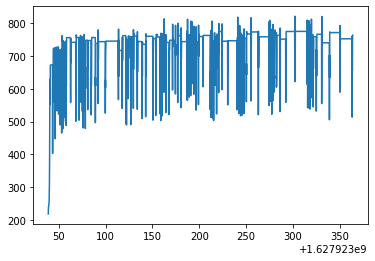

In [45]:
mem, time = list(zip(*res))
plt.plot(time, mem)

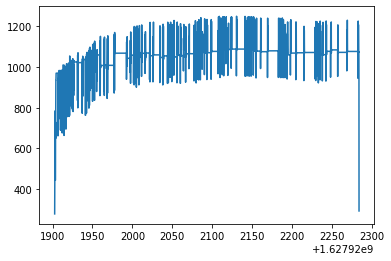

In [43]:
mem, time = list(zip(*res))
plt.plot(time, mem)

In [8]:
%timeit v.e_step()

70 ms ± 845 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%timeit v.e_step()

71.6 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
from threadpoolctl import threadpool_limits

with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof, CacheProfiler() as cprof:
    for _ in range(100):
        with threadpool_limits(limits=8, user_api='blas'):
            v.e_step()
        
rprof.visualize()

Figure(id='1314', ...)

In [4]:
from prs.src.HyperparameterSearch import BMA, GridSearch, BayesOpt

bma = BMA(gs_w, n_proc=5)
bma.fit()

Computing SNP-wise correlations: 100%|██████████| 1/1 [00:00<00:00, 1465.52it/s]

> Performing Bayesian Model Averaging with the following grid:
{'pi': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 9.99932778e-01]),
 'sigma_epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}



100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


In [5]:
bma.pip, bma.inf_beta

({22: array([0.40454876, 0.4017788 , 0.42440317, ..., 0.40236495, 0.40225318,
         0.40340027])},
 {22: array([-0.0085402 ,  0.0042944 ,  0.01708534, ..., -0.00542119,
         -0.0054271 , -0.00641863])})

In [6]:
hgs = GridSearch(gs_w, n_proc=5)
hgs.fit(n_steps=4)

Computing SNP-wise correlations: 100%|██████████| 1/1 [00:00<00:00, 1344.33it/s]

> Performing Grid Search over the following grid:
{'pi': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 9.99932778e-01]),
 'sigma_epsilon': array([0.25, 0.5 , 0.75, 1.  ])}



100%|██████████| 16/16 [00:26<00:00,  1.64s/it]


> Grid search identified the best hyperparameters as:
{'pi': 0.9999327776283947, 'sigma_epsilon': 0.25}
> Refitting the model with the best hyperparameters...
Converged at iteration 3 | ELBO: -2889.095855


In [5]:
gs_w.use_plink=True
hgs = GridSearch(gs_w, n_proc=3, validation_gdl=gs_w, objective='validation')
hgs.fit(n_steps=3)

Computing SNP-wise correlations: 100%|██████████| 1/1 [00:00<00:00, 1104.64it/s]

> Performing Grid Search over the following grid:
{'pi': array([1.00000000e-04, 1.00000000e-02, 9.99932778e-01]),
 'sigma_epsilon': array([0.33333333, 0.66666667, 1.        ])}



  0%|          | 0/9 [00:00<?, ?it/s]

Converged at iteration 3 | ELBO: -2878.096275
Converged at iteration 7 | ELBO: -707.282582
Converged at iteration 27 | ELBO: -722.083674



 11%|█         | 1/9 [00:04<00:34,  4.26s/it]

Converged at iteration 3 | ELBO: -3187.297495
Converged at iteration 16 | ELBO: -665.144878
Converged at iteration 42 | ELBO: -342.983307



Generating polygenic scores:   0%|          | 0/1 [00:00<?, ?it/s]

Converged at iteration 3 | ELBO: -3166.277895
Converged at iteration 10 | ELBO: -693.361248



 78%|███████▊  | 7/9 [00:10<00:02,  1.24s/it]

Converged at iteration 43 | ELBO: -689.126609



100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


> Grid search identified the best hyperparameters as:
{'pi': 0.9999327776283947, 'sigma_epsilon': 0.3333333333333333}
> Refitting the model with the best hyperparameters...
Converged at iteration 3 | ELBO: -2878.096275


In [10]:
bopt = BayesOpt(gs_w)
bopt.fit()

Computing SNP-wise correlations: 100%|██████████| 1/1 [00:00<00:00, 972.71it/s]


Converged at iteration 57 | ELBO: -115.301171
Converged at iteration 26 | ELBO: -742.137052
Converged at iteration 3 | ELBO: -3202.647776
Converged at iteration 3 | ELBO: -2996.497805
Converged at iteration 3 | ELBO: -2787.734115
Converged at iteration 6 | ELBO: -700.651398
Converged at iteration 12 | ELBO: -726.138336
Converged at iteration 29 | ELBO: -696.588295
Converged at iteration 5 | ELBO: -693.386982
Converged at iteration 5 | ELBO: -694.600200
Converged at iteration 3 | ELBO: -3214.996860
Converged at iteration 3 | ELBO: -3072.708793
Converged at iteration 6 | ELBO: -693.324087
Converged at iteration 3 | ELBO: -2963.801419
> Bayesian Optimization identified the best hyperparameters as:
{'pi': 0.46309381367569985, 'sigma_epsilon': 0.26189034471464323}
> Refitting the model with the best hyperparameters...
Converged at iteration 55 | ELBO: -115.301219


In [48]:
gs_w.betas

{22: array([0., 0., 0., ..., 0., 0., 0.])}

In [13]:
prs = gs_w.predict({22: res2[0][22]*res2[1][22]})
eval_prs(prs, gs_w.phenotypes)

> Generating polygenic scores...


0.7366607177171508

In [23]:
gs_w.ld[22].store.path, gs_w.ld[22].store.dir_path()

('/Users/szabad/PycharmProjects/vemPRS/notebooks/output/ld/chr_22',
 '/Users/szabad/PycharmProjects/vemPRS/notebooks/output/ld/chr_22')

In [3]:
import ray

ray.put(gs_w)

2021-07-29 14:49:19,952	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265


ObjectRef(ffffffffffffffffffffffffffffffffffffffff0100000001000000)

In [17]:
from ray import tune

def objective(step, alpha, beta):
    return (0.1 + alpha * step / 100)**(-1) + beta * 0.1


def training_function(config):
    # Hyperparameters
    alpha, beta = config["alpha"], config["beta"]
    for step in range(10):
        # Iterative training function - can be any arbitrary training procedure.
        intermediate_score = objective(step, alpha, beta)
        # Feed the score back back to Tune.
        tune.report(mean_loss=intermediate_score)


analysis = tune.run(
    training_function,
    config={
        "alpha": tune.grid_search([0.001, 0.01, 0.1]),
        "beta": tune.choice([1, 2, 3])
    })

print("Best config: ", analysis.get_best_config(
    metric="mean_loss", mode="min"))

# Get a dataframe for analyzing trial results.
df = analysis.results_df

2021-07-29 01:34:30,012	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265
2021-07-29 01:34:31,776	WARNING function_runner.py:545 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Result for training_function_a6850_00000:
  date: 2021-07-29_01-34-33
  done: false
  experiment_id: e7552b1dc8f1496fb84ee7abe0f37486
  hostname: Shadis-MacBook-Pro.local
  iterations_since_restore: 1
  mean_loss: 10.2
  neg_mean_loss: -10.2
  node_ip: 192.168.0.12
  pid: 66030
  time_since_restore: 0.00012636184692382812
  time_this_iter_s: 0.00012636184692382812
  time_total_s: 0.00012636184692382812
  timestamp: 1627536873
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a6850_00000
  
Result for training_function_a6850_00001:
  date: 2021-07-29_01-34-33
  done: false
  experiment_id: 45036ece121942f981c7e90a261227a3
  hostname: Shadis-MacBook-Pro.local
  iterations_since_restore: 1
  mean_loss: 10.2
  neg_mean_loss: -10.2
  node_ip: 192.168.0.12
  pid: 66035
  time_since_restore: 9.083747863769531e-05
  time_this_iter_s: 9.083747863769531e-05
  time_total_s: 9.083747863769531e-05
  timestamp: 1627536873
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id

2021-07-29 01:34:33,280	INFO tune.py:550 -- Total run time: 1.51 seconds (1.14 seconds for the tuning loop).


Best config:  {'alpha': 0.1, 'beta': 3}


## Step 1: Create GWAS Data Loader objects with windowed and sample LD:

In [14]:
# Heritability = 0.5
# Proportion of causal variants: 0.1

# (1) Windowed LD:
gs_w = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                   keep_snps="../../data/gctb_22_snps.csv", 
                   pis=(.9, .1),
                   h2g=0.5,
                   ld_estimator='windowed',
                   sparse_ld=True,
                   temp_dir='temp_w')
gs_w.simulate()

# Save the simulated phenotype from this object:
#gs_w.to_phenotype_table().to_csv("~/test_phenotypes.txt", sep="\t", index=False)


# (2) Sample LD:
#gs_sa = GWASDataLoader("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
#                       keep_snps="../../data/gctb_22_snps.csv",
#                       phenotype_file="~/test_phenotypes.txt",
#                       phenotype_header=0,
#                       ld_estimator='sample',
#                       temp_dir='temp_s')

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:02,  2.61s/it]
  0%|          | 0/1 [00:00<?, ?it/s]/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/dask/array/routines.py:272: PerformanceWarning: Increasing number of chunks by factor of 15
  axes=(left_axes, right_axes),


> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:12<00:00, 12.75s/it]


## Step 2: Create the variational models based on the two different LD matrices:

In [26]:
v_w = vem_prs(gs_w)    # Windowed LD
v_sa = vem_prs(gs_sa)  # Sample LD

## Step 3: Create a helper function to align the parameters of both models:

In [28]:
import copy

def align_models(v_w, v_sa):
    v_sa.var_mu_beta = copy.deepcopy(v_w.var_mu_beta)  # Copy mu_beta
    v_sa.var_gamma = copy.deepcopy(v_w.var_gamma)      # Copy gamma
    v_sa.var_sigma_beta = copy.deepcopy(v_w.var_sigma_beta) # Copy variational sigma_beta
    
    # I'm calling this to estimate the X'X:
    v_sa.m_step()
    
    v_sa.sigma_epsilon = v_w.sigma_epsilon # Copy sigma epsilon
    v_sa.sigma_beta = v_w.sigma_beta # Copy sigma beta
    v_sa.pi = v_w.pi # Copy pi
    
    return v_w, v_sa

## Step 4: Create a function to extract the ELBO terms from each model:

In [30]:
def track_elbo_terms(v):
    
    beta_hat = v.beta_hat[22]
    gamma_mu = v.var_gamma[22] * v.var_mu_beta[22]
    gamma_mu_sig = v.var_gamma[22] * (v.var_mu_beta[22] ** 2 + v.var_sigma_beta[22])
    
    ELBO_terms = {
        "Y'Y": -.5 * v.N / v.sigma_epsilon,
        "(gamma*beta)'XY": (v.N / v.sigma_epsilon)*np.dot(gamma_mu, beta_hat),
        "(gamma*beta)'X'X(gamma*beta)": (-.5* v.N / v.sigma_epsilon)*(2.*v.ld_prod + np.sum(gamma_mu_sig)),
        "ELBO": v.objective()
    }
    
    return ELBO_terms

## Step 5: Fit model with truncated LD and track the terms using full and truncated matrices

In [42]:
# First, align the models:

track_w = []
track_sa = []

v_w.fit(max_iter=1)

for i in range(30):
    # Fit model with truncated LD
    v_w.fit(max_iter=1, continued=True)
    # Align the models:
    v_w, v_sa = align_models(v_w, v_sa)
    # Track:
    track_w.append(track_elbo_terms(v_w))
    track_sa.append(track_elbo_terms(v_sa))
    
track_w_df = pd.DataFrame(track_w)
track_sa_df = pd.DataFrame(track_sa)


Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You ma

Text(0, 0.5, 'ELBO')

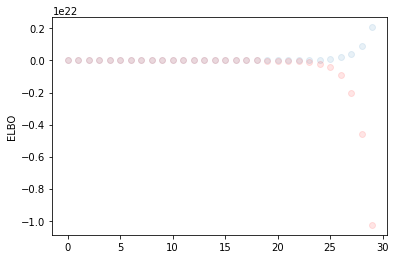

In [44]:
plt.scatter(np.arange(30), track_w_df["ELBO"], alpha=0.1)
plt.scatter(np.arange(30), track_sa_df["ELBO"], c='red', alpha=0.1)
plt.ylabel("ELBO")

Text(0, 0.5, "Y'Y")

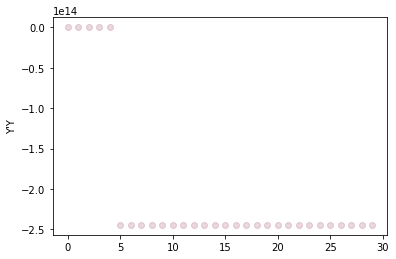

In [45]:
plt.scatter(np.arange(30), track_w_df["Y'Y"], alpha=0.1)
plt.scatter(np.arange(30), track_sa_df["Y'Y"], c='red', alpha=0.1)
plt.ylabel("Y'Y")

Text(0, 0.5, "(gamma*beta)'XY")

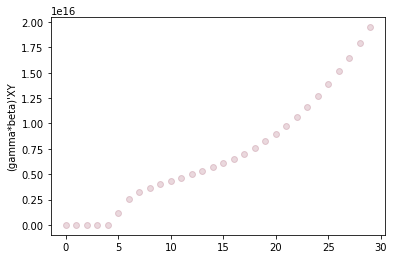

In [48]:
plt.scatter(np.arange(30), track_w_df["(gamma*beta)'XY"], alpha=0.1)
plt.scatter(np.arange(30), track_sa_df["(gamma*beta)'XY"], c='red', alpha=0.1)
plt.ylabel("(gamma*beta)'XY")

Text(0, 0.5, "B'X'XB")

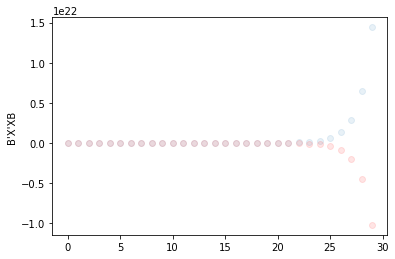

In [46]:
plt.scatter(np.arange(30), track_w_df["(gamma*beta)'X'X(gamma*beta)"], alpha=0.1)
plt.scatter(np.arange(30), track_sa_df["(gamma*beta)'X'X(gamma*beta)"], c='red', alpha=0.1)
plt.ylabel("B'X'XB")

# Simple Example (real genotypes)

In [2]:
gs_w = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                       keep_snps="../../data/gctb_22_snps.csv", 
                   pis=(.9, .1),
                   h2g=0.5,
                   ld_estimator='windowed',
                   sparse_ld=True,
                   temp_dir='temp_w')
gs_w.simulate()

"""
gs_sa = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                   keep_snps="../../data/w_snplist_no_MHC.snplist.bz2", 
                   pis=(0.99, 0.01),
                   h2g=0.5,
                   ld_estimator='sample',
                   temp_dir='temp_s')
gs_sa.simulate()

gs_sh = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                   keep_snps="../../data/w_snplist_no_MHC.snplist.bz2", 
                   pis=(0.99, 0.01),
                   h2g=0.5,
                   ld_estimator='shrinkage',
                   temp_dir='temp_sh',
                   sparse_ld=True,
                   genmap_Ne=11400,
                   genmap_sample_size=183,
                   shrinkage_cutoff=1e-5)
gs_sh.simulate()
"""

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:01,  1.91s/it]
  0%|          | 0/1 [00:00<?, ?it/s]/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/dask/array/routines.py:272: PerformanceWarning: Increasing number of chunks by factor of 15
  axes=(left_axes, right_axes),


> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:14<00:00, 14.28s/it]


'\ngs_sa = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",\n                   keep_snps="../../data/w_snplist_no_MHC.snplist.bz2", \n                   pis=(0.99, 0.01),\n                   h2g=0.5,\n                   ld_estimator=\'sample\',\n                   temp_dir=\'temp_s\')\ngs_sa.simulate()\n\ngs_sh = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",\n                   keep_snps="../../data/w_snplist_no_MHC.snplist.bz2", \n                   pis=(0.99, 0.01),\n                   h2g=0.5,\n                   ld_estimator=\'shrinkage\',\n                   temp_dir=\'temp_sh\',\n                   sparse_ld=True,\n                   genmap_Ne=11400,\n                   genmap_sample_size=183,\n                   shrinkage_cutoff=1e-5)\ngs_sh.simulate()\n'

In [9]:
gs_w.genotypes[22]

[autoreload of prs.gwasimulator.GWASDataLoader failed: Traceback (most recent call last):
  File "/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/szabad/opt/miniconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/szabad/opt/miniconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_fr

<xarray.DataArray 'genotype' (sample: 489, variant: 14885)>
dask.array<getitem, shape=(489, 14885), dtype=float32, chunksize=(489, 197), chunktype=numpy.ndarray>
Coordinates:
  * sample   (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
  * variant  (variant) object 'rs9605903' 'rs5746647' ... 'rs28729663'
    fid      (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
    iid      (sample) object 'HG00096' 'HG00097' ... 'NA20828' 'NA20832'
    father   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    gender   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    trait    (sample) object '-9' '-9' '-9' '-9' '-9' ... '-9' '-9' '-9' '-9'
    chrom    (variant) object '22' '22' '22' '22' '22' ... '22' '22' '22' '22'
    cm       (variant) float64 2.336 2.34 2.344 2.381 ... 75.08 75.09 75.12
    pos      (variant) int32 17054720 17057138 17058616 ... 51178090 51219006
    a0       (variant) object 'C' 'G' 'T' 'C' 'A' 'A' ... 'A' 'A' 'G' 'A' 'A'
    a1       (variant) object 'T' 'T' 'C' 'T' 'C' 'G' ... 'G' 'G' 'A' 'G' 'G'

In [10]:
pd.DataFrame({'SNP': gs_w.genotypes[22].variant.values}).reset_index().merge(
                pd.DataFrame({'SNP': ['rs9605903', 'rs28729663']})
            )

index         SNP
0      0   rs9605903
1  14884  rs28729663

In [3]:
v = VIPRS(gs_w)
v.fit()

> Initializing model parameters
> Initializing model parameters


  0%|          | 2/1000 [00:00<01:26, 11.60it/s]

> Performing model fit...


  1%|          | 9/1000 [00:00<01:47,  9.19it/s]


OptimizationDivergence: Stopping at iteration 10: The optimization algorithm is not converging!
Previous ELBO: -685.911218 | Current ELBO: 88095056257024.328125

In [ ]:
gs_w10 = GWASDataLoader("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                       keep_snps="../../data/gctb_22_snps.csv", 
                      phenotype_file="~/test_phenotypes.txt",
                        phenotype_header=0,
                      ld_estimator='windowed',
                      sparse_ld=True,
                      cm_window_cutoff=10.,
                      temp_dir='temp_w10')

In [54]:
gs_w.to_phenotype_table().to_csv("~/test_phenotypes.txt", sep="\t", index=False)

In [55]:
gs_sa = GWASDataLoader("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                   keep_snps="../../data/gctb_22_snps.csv", 
                       phenotype_file="~/test_phenotypes.txt",
                       phenotype_header=0,
                   ld_estimator='sample',
                   temp_dir='temp_s')

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:02,  2.46s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:13<00:00, 13.04s/it]


> Reading phenotype files...


In [116]:
gs_sh = GWASSimulator("../../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                   keep_snps="../../data/gctb_22_snps.csv", 
                   pis=(0., 1.),
                   h2g=0.5,
                   ld_estimator='shrinkage',
                   temp_dir='temp_sh',
                   sparse_ld=True,
                   genmap_Ne=11400,
                   genmap_sample_size=183,
                   shrinkage_cutoff=1e-5)

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:02,  2.97s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:21<00:00, 21.75s/it]


In [21]:
v = VIPRS(gs_w)
v.fit()

> Initializing model parameters
> Initializing model parameters


  0%|          | 2/1000 [00:00<01:14, 13.41it/s]

> Performing model fit...


  0%|          | 3/1000 [00:00<01:42,  9.73it/s]


Exception: Stopping at iteration 4: The optimization algorithm is not converging!
Previous ELBO: -587.681712 | Current ELBO: 496213733914724.125000

In [23]:
v.sigma_epsilon

1e-12

In [24]:
np.corrcoef(v.predict(), gs_w.phenotypes)**2

array([[1.        , 0.83705685],
       [0.83705685, 1.        ]])

In [100]:
v_w = VIPRS(gs_w, fix_params={'sigma_epsilon': .1})
#v_w10 = VIPRS(gs_w10)
v_sa = VIPRS(gs_sa, fix_params={'sigma_epsilon': .1})

> Initializing model parameters
> Initializing model parameters


In [101]:
import copy
v_sa.sigma_epsilon = v_w.sigma_epsilon
v_sa.sigma_beta = v_w.sigma_beta
v_sa.pi = v_w.pi
v_sa.var_mu_beta = copy.deepcopy(v_w.var_mu_beta)
v_sa.var_gamma = copy.deepcopy(v_w.var_gamma)
v_sa.var_sigma_beta = copy.deepcopy(v_w.var_sigma_beta)

"""
v_w10.sigma_epsilon = v_w.sigma_epsilon
v_w10.sigma_beta = v_w.sigma_beta
v_w10.pi = v_w.pi
v_w10.var_mu_beta = copy.deepcopy(v_w.var_mu_beta)
v_w10.var_gamma = copy.deepcopy(v_w.var_gamma)
v_w10.var_sigma_beta = copy.deepcopy(v_w.var_sigma_beta)
"""

'\nv_w10.sigma_epsilon = v_w.sigma_epsilon\nv_w10.sigma_beta = v_w.sigma_beta\nv_w10.pi = v_w.pi\nv_w10.var_mu_beta = copy.deepcopy(v_w.var_mu_beta)\nv_w10.var_gamma = copy.deepcopy(v_w.var_gamma)\nv_w10.var_sigma_beta = copy.deepcopy(v_w.var_sigma_beta)\n'

In [78]:

def print_elbo(v):
    # Add the fixed quantities:
    print("Line 1:", .5 * v.N * (np.log(2 * np.pi * v.sigma_epsilon) + 1. / v.sigma_epsilon))
    print("Line 2:", .5 * v.M * np.log(2. * np.pi * v.sigma_beta))
    print("Line 3:", v.M * np.log(1. - v.pi))

    print("Line 4:", .5 * v.M * np.log(2. * np.pi * np.e * v.sigma_beta))

    for c in v.shapes:
        beta_hat = v.beta_hat[c]
        gamma_mu = v.var_gamma[c] * v.var_mu_beta[c]
        gamma_mu_sig = v.var_gamma[c] * (v.var_mu_beta[c] ** 2 + v.var_sigma_beta[c])

        print("Line 4.5:", v.q[c])
        print("Line 4.6:", np.abs(v.q[c]).max())
        print("Line 4.7:", np.abs(gamma_mu).max())
        print("Line 4.8:", np.abs(gamma_mu_sig).max())
        
        print("Line 5:", (-.5 * v.N / v.sigma_epsilon) * (
                - 2. * np.dot(gamma_mu, beta_hat)
                + np.dot(gamma_mu, v.q[c])
                + np.sum(gamma_mu_sig)
        ))
        
        print("Line 5.5:", np.dot(gamma_mu, v.q[c])
                + np.sum(gamma_mu_sig))

        print("Line 6:", (-.5 / v.sigma_beta) * (
                np.sum(gamma_mu_sig) +
                v.sigma_beta * np.sum(1 - v.var_gamma[c])
        ))

        print("Line 7:", np.log(v.pi / (1. - v.pi)) * np.sum(v.var_gamma[c]))

        print("Line 8:", .5 * np.dot(v.var_gamma[c], np.log(v.var_sigma_beta[c] / v.sigma_beta)))

        print("Line 9:", np.dot(v.var_gamma[c], np.log(v.var_gamma[c] / (1. - v.var_gamma[c]))))
        print("Line 10:", np.sum(np.log(1. - v.var_gamma[c])))

In [96]:
sig_g1 = np.sum(v_w.var_gamma[22] * (v_w.var_mu_beta[22] ** 2 + v_w.var_sigma_beta[22]))

sig_g2 = np.dot(v_w.q[22], v_w.var_gamma[22] * v_w.var_mu_beta[22])

sig_g = sig_g1 + sig_g2

sig_g1, sig_g2, sig_g, sig_g / (sig_g + v_w.sigma_epsilon)

(3450154291.530579, -4189928025.072766, -739773733.5421867, 1.0000000001351765)

In [99]:
stats.describe(v_w.q[22])

DescribeResult(nobs=14885, minmax=(-6355.621690571304, 10881.246554060186), mean=-7.436350980629477, variance=428968.97224970395, skewness=0.15077613192859377, kurtosis=18.240626616700734)

In [102]:
v = v_w
prev = None
print("Initial params:")
print("pi:", v.pi, "| sigma_epsilon: ", v.sigma_epsilon, "| sigma_beta: ", v.sigma_beta)
for i in range(30):
    print(f"--------------- Iteration {i} ---------------")
    v.fit(max_iter=1, continued=True)
    print('ELBO:', v.objective())
    print("corrcoef:", np.corrcoef(v.predict(), gs_w.phenotypes))
    print("pi:", v.pi, "| sigma_epsilon: ", v.sigma_epsilon, "| sigma_beta: ", v.sigma_beta)
    print_elbo(v)
    if prev is None:
        prev = v.pip[22].copy()
        prev_beta = v.var_mu_beta[22].copy()
    else:
        cond = np.abs(prev - v.pip[22]) > 0.1
        #print("Where:", np.where(cond))
        #print("Number:", len(prev[cond]))
        #print("var_sigma_beta:", np.log(v.var_sigma_beta[22] / v.sigma_beta)[cond])
        #print("Difference > 0.5:", prev[cond] - v.pip[22][cond])
        #print("Mu beta:", v.var_mu_beta[22][cond])
        #print("Max difference:", np.max(np.abs(prev - v.pip[22])))
        #print("Max difference:", np.max(np.abs(prev_beta - v.var_mu_beta[22])))
        
    prev  = v.pip[22].copy()
    prev_beta = v.var_mu_beta[22].copy()

Initial params:
pi: 0.3457121146078113 | sigma_epsilon:  0.1 | sigma_beta:  0.05820732970536816
--------------- Iteration 0 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 791.2158708344577


corrcoef: [[1.         0.92779193]
 [0.92779193 1.        ]]
pi: 0.14489006723120615 | sigma_epsilon:  0.1 | sigma_beta:  0.002186301591623303
Line 1: 2331.3788875000405
Line 2: -31910.96065968502
Line 3: -2329.87822676565
Line 4: -24468.46065968502
Line 4.5: [ 0.02809889 -0.03252868  0.02340342 ...  0.03931234  0.03893107
  0.07157394]
Line 4.6: 0.20673265140978503
Line 4.7: 0.13513982564555682
Line 4.8: 0.01846657356402639
Line 5: 8210.243620611205
Line 5.5: 5.464339576839981
Line 6: -7442.500000000001
Line 7: -3828.6717481153164
Line 8: -2558.814871293181
Line 9: 2598.155943479454
Line 10: -6227.871927376894
--------------- Iteration 1 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 3839.3645316610236


corrcoef: [[1.         0.95234214]
 [0.95234214 1.        ]]
pi: 0.17064385291542064 | sigma_epsilon:  0.1 | sigma_beta:  0.002419006384141978
Line 1: 2331.3788875000405
Line 2: -31158.185086217167
Line 3: -2785.066939758348
Line 4: -23715.685086217167
Line 4.5: [ 0.02266146 -0.02068747  0.01595702 ...  0.03921573  0.04167387
  0.05855841]
Line 4.6: 0.17647756605841647
Line 4.7: 0.1676330634376223
Line 4.8: 0.02828787887049945
Line 5: 12195.770451886112
Line 5.5: 5.140826240169256
Line 6: -7442.5
Line 7: -4015.9737535846284
Line 8: -3251.2001535988707
Line 9: 5870.783164669187
Line 10: -9897.996978885985
--------------- Iteration 2 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 5325.581030215813


corrcoef: [[1.         0.95762452]
 [0.95762452 1.        ]]
pi: 0.18152820161965377 | sigma_epsilon:  0.1 | sigma_beta:  0.0029729625718406785
Line 1: 2331.3788875000405
Line 2: -29623.526077615883
Line 3: -2981.7086913015332
Line 4: -22181.026077615883
Line 4.5: [ 0.02571536 -0.01183635  0.02348938 ...  0.04435207  0.04169652
  0.04532974]
Line 4.6: 0.18579081701920572
Line 4.7: 0.19215589269109687
Line 4.8: 0.037112482368023024
Line 5: 14341.574391334158
Line 5.5: 5.248963280268796
Line 6: -7442.5
Line 7: -4069.358642487614
Line 8: -3725.995846565436
Line 9: 8511.932771678716
Line 10: -12604.381478414989
--------------- Iteration 3 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 6529.625046969755


corrcoef: [[1.         0.96002603]
 [0.96002603 1.        ]]
pi: 0.18527956418697433 | sigma_epsilon:  0.1 | sigma_beta:  0.0037951453066137177
Line 1: 2331.3788875000405
Line 2: -27806.33740918974
Line 3: -3050.0890434091984
Line 4: -20363.837409189742
Line 4.5: [ 0.02839545 -0.01190662  0.02741498 ...  0.05272551  0.03554261
  0.03303228]
Line 4.6: 0.23842080145892935
Line 4.7: 0.20753122880767103
Line 4.8: 0.043260591389190424
Line 5: 16184.66344959307
Line 5.5: 5.385711761148314
Line 6: -7442.5
Line 7: -4084.37223412025
Line 8: -4119.508110833013
Line 9: 10965.752318584331
Line 10: -14896.062191823517
--------------- Iteration 4 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.49it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 7938.638066057374


corrcoef: [[1.         0.96107859]
 [0.96107859 1.        ]]
pi: 0.1879930865322831 | sigma_epsilon:  0.1 | sigma_beta:  0.004943046408769923
Line 1: 2331.3788875000405
Line 2: -25839.588878897637
Line 3: -3099.748032164101
Line 4: -18397.08887889764
Line 4.5: [ 0.03320871 -0.01350043  0.02798422 ...  0.06027317  0.02836234
  0.02006376]
Line 4.6: 0.28967113463032357
Line 4.7: 0.23884941488561576
Line 4.8: 0.05724314293598159
Line 5: 18299.34271993154
Line 5.5: 5.399162817745919
Line 6: -7442.5
Line 7: -4094.1694729056485
Line 8: -4529.9305071634535
Line 9: 13585.373823919996
Line 10: -17279.89606977907
--------------- Iteration 5 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 10008.318355424348


corrcoef: [[1.         0.96041206]
 [0.96041206 1.        ]]
pi: 0.19316197930313372 | sigma_epsilon:  0.1 | sigma_beta:  0.0065793921315501925
Line 1: 2331.3788875000405
Line 2: -23711.327583915852
Line 3: -3194.8025104956673
Line 4: -16268.82758391585
Line 4.5: [ 0.03604517 -0.01517803  0.02874839 ...  0.06620372  0.02320493
  0.00980012]
Line 4.6: 0.35675137112386945
Line 4.7: 0.31363795806614714
Line 4.8: 0.09856524166200809
Line 5: 21220.651024285165
Line 5.5: 5.119987250870057
Line 6: -7442.500000000001
Line 7: -4110.391120084382
Line 8: -5048.409044261742
Line 9: 16510.67228448458
Line 10: -19983.32117796559
--------------- Iteration 6 ---------------


100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 13570.304003560741


corrcoef: [[1.         0.95700015]
 [0.95700015 1.        ]]
pi: 0.20519809981563575 | sigma_epsilon:  0.1 | sigma_beta:  0.008938682914186346
Line 1: 2331.3788875000405
Line 2: -21430.604021910527
Line 3: -3418.5244896363074
Line 4: -13988.10402191053
Line 4.5: [ 0.03854782 -0.01793589  0.02840025 ...  0.07103141  0.01989827
  0.00340497]
Line 4.6: 0.4570657579097289
Line 4.7: 0.4081141726670281
Line 4.8: 0.16675567868933608
Line 5: 25993.637156442765
Line 5.5: 4.176610589214139
Line 6: -7442.500000000001
Line 7: -4135.979520534687
Line 8: -5815.816260550209
Line 9: 19905.95405829241
Line 10: -23184.32006363164
--------------- Iteration 7 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 20642.402158111283


corrcoef: [[1.        0.9494448]
 [0.9494448 1.       ]]
pi: 0.22948606965206467 | sigma_epsilon:  0.1 | sigma_beta:  0.012446127493264233
Line 1: 2331.3788875000405
Line 2: -18966.97817147292
Line 3: -3880.4829538189806
Line 4: -11524.478171472923
Line 4.5: [ 0.04209652 -0.01848384  0.02767192 ...  0.0745779   0.01780433
 -0.00010307]
Line 4.6: 0.591982930482001
Line 4.7: 0.5340933055174927
Line 4.8: 0.2854558691504844
Line 5: 34893.25005883409
Line 5.5: 1.5643667161832937
Line 6: -7442.5
Line 7: -4137.3908805412875
Line 8: -7055.920974563393
Line 9: 24504.02842180212
Line 10: -27658.35421750301
--------------- Iteration 8 ---------------


100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 36464.5445300259


corrcoef: [[1.        0.9337155]
 [0.9337155 1.       ]]
pi: 0.26656865595529283 | sigma_epsilon:  0.1 | sigma_beta:  0.018464627142832705
Line 1: 2331.3788875000405
Line 2: -16031.303950335187
Line 3: -4614.666846043801
Line 4: -8588.803950335188
Line 4.5: [ 0.04486439 -0.01756365  0.02788396 ...  0.07758926  0.01611325
 -0.0013401 ]
Line 4.6: 0.8666548050439962
Line 4.7: 0.7397259681857428
Line 4.8: 0.5473962482278563
Line 5: 53295.22605499119
Line 5.5: -4.922931804001649
Line 6: -7442.500000000001
Line 7: -4015.8943010085654
Line 8: -8966.09947529883
Line 9: 31506.83588358811
Line 10: -34604.19386847407
--------------- Iteration 9 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 72675.65057866121


corrcoef: [[1.         0.90236057]
 [0.90236057 1.        ]]
pi: 0.31572751215115036 | sigma_epsilon:  0.1 | sigma_beta:  0.02980263056548134
Line 1: 2331.3788875000405
Line 2: -12468.282928044844
Line 3: -5647.355106957743
Line 4: -5025.782928044843
Line 4.5: [ 0.04714129 -0.01710973  0.02883721 ...  0.08058043  0.01492573
 -0.00128477]
Line 4.6: 1.251058544009022
Line 4.7: 1.0964738335876916
Line 4.8: 1.2024583287208144
Line 5: 93024.47175708746
Line 5.5: -20.041217852479974
Line 6: -7442.499999999999
Line 7: -3635.0340855761824
Line 8: -11732.099135312828
Line 9: 40919.99466535784
Line 10: -43917.04070227836
--------------- Iteration 10 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 157063.71565768588


corrcoef: [[1.         0.84666043]
 [0.84666043 1.        ]]
pi: 0.3717747815300163 | sigma_epsilon:  0.1 | sigma_beta:  0.05283992218395886
Line 1: 2331.3788875000405
Line 2: -8206.183897624027
Line 3: -6919.389726933916
Line 4: -763.6838976240281
Line 4.5: [ 0.04893944 -0.01716563  0.03072926 ...  0.08300578  0.01486054
 -0.00140447]
Line 4.6: 1.843592264576425
Line 4.7: 1.6152566361331586
Line 4.8: 2.609259714740029
Line 5: 181761.23900757058
Line 5.5: -54.97090012694878
Line 6: -7442.499999999999
Line 7: -2903.124979765085
Line 8: -15387.742508517378
Line 9: 52499.21230750985
Line 10: -55343.32506034161
--------------- Iteration 11 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 353507.5486591196


corrcoef: [[1.         0.76070706]
 [0.76070706 1.        ]]
pi: 0.43041791917947997 | sigma_epsilon:  0.1 | sigma_beta:  0.10103672879136155
Line 1: 2331.3788875000405
Line 2: -3381.8281669277994
Line 3: -8378.05765565243
Line 4: 4060.6718330721997
Line 4.5: [ 0.04989931 -0.01734253  0.03419033 ...  0.08552468  0.01574518
 -0.00357492]
Line 4.6: 2.723778110137008
Line 4.7: 2.3968170391160672
Line 4.8: 5.744941374115919
Line 5: 383287.2028435715
Line 5.5: -135.8588905934314
Line 6: -7442.499999999999
Line 7: -1794.8328489184153
Line 8: -19881.93649896398
Line 9: 65168.989517052156
Line 10: -67775.54122363513
--------------- Iteration 12 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 809718.1728330748


corrcoef: [[1.         0.64649593]
 [0.64649593 1.        ]]
pi: 0.48474638849383445 | sigma_epsilon:  0.1 | sigma_beta:  0.20508267104519187
Line 1: 2331.3788875000405
Line 2: 1886.9339298563527
Line 3: -9870.184704329504
Line 4: 9329.433929856352
Line 4.5: [ 0.04933285 -0.01687289  0.03767738 ...  0.08814085  0.01682831
 -0.00791208]
Line 4.6: 4.025050183621607
Line 4.7: 3.581229057041368
Line 4.8: 12.825418469914046
Line 5: 845018.7277774714
Line 5.5: -322.95483211015994
Line 6: -7442.5
Line 7: -440.3833382679512
Line 8: -24938.858789618615
Line 9: 78594.99678474155
Line 10: -80875.24756006098
--------------- Iteration 13 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 1867822.349584471


corrcoef: [[1.         0.52125389]
 [0.52125389 1.        ]]
pi: 0.5338273069875064 | sigma_epsilon:  0.1 | sigma_beta:  0.4321494542607358
Line 1: 2331.3788875000405
Line 2: 7434.26319753685
Line 3: -11360.219014962366
Line 4: 14876.76319753685
Line 4.5: [ 0.04816242 -0.01609253  0.0384584  ...  0.09212932  0.01870251
 -0.01557991]
Line 4.6: 6.027341698169553
Line 4.7: 5.349876193282354
Line 4.8: 28.62140819971259
Line 5: 1908926.8580555632
Line 5.5: -755.9455569871348
Line 6: -7442.499999999999
Line 7: 1076.814682090989
Line 8: -30421.17837888465
Line 9: 91765.78701321007
Line 10: -93697.24014137383
--------------- Iteration 14 ---------------


100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 4323330.486804774


corrcoef: [[1.         0.40323126]
 [0.40323126 1.        ]]
pi: 0.5785073441227768 | sigma_epsilon:  0.1 | sigma_beta:  0.9309026327036629
Line 1: 2331.3788875000405
Line 2: 13145.512670195632
Line 3: -12859.939295633641
Line 4: 20588.01267019563
Line 4.5: [ 0.04626192 -0.0171532   0.03804381 ...  0.09700723  0.02119213
 -0.02698038]
Line 4.6: 9.331021009994888
Line 4.7: 7.964550676045413
Line 4.8: 63.43433530747353
Line 5: 4370445.767491872
Line 5.5: -1760.1830844450287
Line 6: -7442.5
Line 7: 2726.6894832469416
Line 8: -36269.1020189005
Line 9: 103323.29484600591
Line 10: -104941.74487769499
--------------- Iteration 15 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 10017447.868198995


corrcoef: [[1.         0.30544735]
 [0.30544735 1.        ]]
pi: 0.614706304806332 | sigma_epsilon:  0.1 | sigma_beta:  2.0474875107516435
Line 1: 2331.3788875000405
Line 2: 19011.795571411843
Line 3: -14196.559682855417
Line 4: 26454.295571411843
Line 4.5: [ 0.04465477 -0.01844752  0.03841442 ...  0.10168937  0.0226915
 -0.03982174]
Line 4.6: 14.491625796044024
Line 4.7: 11.873410254159644
Line 4.8: 140.9782164954544
Line 5: 10070549.05584305
Line 5.5: -4088.4311811697444
Line 6: -7442.500000000001
Line 7: 4274.27406860388
Line 8: -42143.4514082227
Line 9: 113893.03085941257
Line 10: -115188.95912533214
--------------- Iteration 16 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.85it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 23220470.188358136


corrcoef: [[1.         0.22862062]
 [0.22862062 1.        ]]
pi: 0.642987086401779 | sigma_epsilon:  0.1 | sigma_beta:  4.571640342886999
Line 1: 2331.3788875000405
Line 2: 24990.048004869877
Line 3: -15331.30179727913
Line 4: 32432.548004869877
Line 4.5: [ 0.04394124 -0.01837564  0.0392984  ...  0.10919772  0.02421389
 -0.05406988]
Line 4.6: 22.379733011476173
Line 4.7: 18.412366325522534
Line 4.8: 339.01577719915895
Line 5: 23279378.553883027
Line 5.5: -9487.155677124458
Line 6: -7442.500000000001
Line 7: 5631.042834258536
Line 8: -47925.710307812304
Line 9: 122164.36737827069
Line 10: -123213.35001171044
--------------- Iteration 17 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 53833271.91887441


corrcoef: [[1.         0.17080849]
 [0.17080849 1.        ]]
pi: 0.6703305180895073 | sigma_epsilon:  0.1 | sigma_beta:  10.229067745369107
Line 1: 2331.3788875000405
Line 2: 30983.949991033223
Line 3: -16517.359005857037
Line 4: 38426.44999103322
Line 4.5: [ 0.04439466 -0.01715815  0.04015791 ...  0.11634234  0.02610015
 -0.06963939]
Line 4.6: 35.125185546913926
Line 4.7: 29.479467285766976
Line 4.8: 869.0400649820917
Line 5: 53898187.07921583
Line 5.5: -22005.746518492917
Line 6: -7442.500000000002
Line 7: 7081.097792901017
Line 8: -53981.40171244237
Line 9: 129412.64875332765
Line 10: -130246.5302248071
--------------- Iteration 18 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.65it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 124833109.88131095


corrcoef: [[1.         0.12766815]
 [0.12766815 1.        ]]
pi: 0.6936122520546888 | sigma_epsilon:  0.1 | sigma_beta:  23.0330738150541
Line 1: 2331.3788875000405
Line 2: 37025.01033644858
Line 3: -17607.52349524351
Line 4: 44467.51033644858
Line 4.5: [ 0.04538158 -0.01589237  0.04173049 ...  0.1253063   0.02878262
 -0.08756828]
Line 4.6: 57.013883884554005
Line 4.7: 47.65773662887711
Line 4.8: 2271.2623363442312
Line 5: 124903982.15214439
Line 5.5: -51041.68302262243
Line 6: -7442.500000000002
Line 7: 8435.686204931388
Line 8: -60046.29457269187
Line 9: 135658.97912936917
Line 10: -136336.21904644024
--------------- Iteration 19 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 289543822.76322585


corrcoef: [[1.         0.09577872]
 [0.09577872 1.        ]]
pi: 0.7145649380019333 | sigma_epsilon:  0.1 | sigma_beta:  52.04284414471119
Line 1: 2331.3788875000405
Line 2: 43091.66098570756
Line 3: -18661.930756442165
Line 4: 50534.16098570756
Line 4.5: [ 0.04568478 -0.01754209  0.04380927 ...  0.14039645  0.03295393
 -0.11161063]
Line 4.6: 91.95736520604171
Line 4.7: 76.55600776497582
Line 4.8: 5860.82839023618
Line 5: 289620688.5986186
Line 5.5: -118404.13868323632
Line 6: -7442.500000000001
Line 7: 9760.499102973516
Line 8: -66195.13385408086
Line 9: 141037.29877868918
Line 10: -141599.4077809824
--------------- Iteration 20 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.13it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 671851230.180353


corrcoef: [[1.         0.07221865]
 [0.07221865 1.        ]]
pi: 0.7358871146468823 | sigma_epsilon:  0.1 | sigma_beta:  117.56165322187805
Line 1: 2331.3788875000405
Line 2: 49156.52148158951
Line 3: -19817.57152072889
Line 4: 56599.02148158951
Line 4.5: [ 0.0440364  -0.0214262   0.04578598 ...  0.16391246  0.03869987
 -0.14775405]
Line 4.6: 147.50510560376915
Line 4.7: 122.31999162336012
Line 4.8: 14962.195517432174
Line 5: 671934343.5572783
Line 5.5: -274762.00096452027
Line 6: -7442.500000000001
Line 7: 11224.236930211322
Line 8: -72633.38137167935
Line 9: 146194.9554126916
Line 10: -146639.67333710523
--------------- Iteration 21 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.95it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 1559874680.113584


corrcoef: [[1.         0.05485316]
 [0.05485316 1.        ]]
pi: 0.7561292111077802 | sigma_epsilon:  0.1 | sigma_beta:  266.10338326421885
Line 1: 2331.3788875000405
Line 2: 55236.46337666306
Line 3: -21004.47278910423
Line 4: 62678.96337666306
Line 4.5: [ 0.04149486 -0.02226679  0.04587322 ...  0.20672052  0.05187416
 -0.20340487]
Line 4.6: 235.5313385345469
Line 4.7: 194.55711280376093
Line 4.8: 37852.50819954177
Line 5: 1559964139.563829
Line 5.5: -637955.0234025675
Line 6: -7442.500000000001
Line 7: 12735.843604576354
Line 8: -79228.52203343183
Line 9: 151032.36121936928
Line 10: -151401.4410798676
--------------- Iteration 22 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 3624618258.471846


corrcoef: [[1.         0.04208996]
 [0.04208996 1.        ]]
pi: 0.7730034211172463 | sigma_epsilon:  0.1 | sigma_beta:  605.4606007096365
Line 1: 2331.3788875000405
Line 2: 61354.97685990565
Line 3: -22071.780650980054
Line 4: 68797.47685990564
Line 4.5: [ 0.04057393 -0.02393088  0.04614049 ...  0.24869619  0.06745224
 -0.2853071 ]
Line 4.6: 374.61404688746063
Line 4.7: 308.2590253654784
Line 4.8: 95023.72194749501
Line 5: 3624713992.5436726
Line 5.5: -1482421.7879359536
Line 6: -7442.500000000004
Line 7: 14099.051223327035
Line 8: -85726.2571116763
Line 9: 155258.67751096553
Line 10: -155554.97111113323
--------------- Iteration 23 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 8431218748.694109


corrcoef: [[1.         0.03275096]
 [0.03275096 1.        ]]
pi: 0.7873055127987488 | sigma_epsilon:  0.1 | sigma_beta:  1383.389841370577
Line 1: 2331.3788875000405
Line 2: 67504.73456360355
Line 3: -23040.468804849217
Line 4: 74947.23456360355
Line 4.5: [ 0.03882561 -0.02579702  0.0458728  ...  0.27454523  0.08036822
 -0.40268729]
Line 4.6: 593.8424472304227
Line 4.7: 486.80306816877464
Line 4.8: 236977.4643604955
Line 5: 8431320686.62015
Line 5.5: -3448299.014828738
Line 6: -7442.500000000002
Line 7: 15337.409083118113
Line 8: -92154.09798572525
Line 9: 158717.57745553745
Line 10: -158968.18801035313
--------------- Iteration 24 ---------------


100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 19636645250.664307


corrcoef: [[1.         0.02610331]
 [0.02610331 1.        ]]
pi: 0.8012630164875856 | sigma_epsilon:  0.1 | sigma_beta:  3165.6905334704193
Line 1: 2331.3788875000405
Line 2: 73665.89145973962
Line 3: -24050.78139308149
Line 4: 81108.39145973962
Line 4.5: [ 0.03742866 -0.02789069  0.04561523 ...  0.31563192  0.10844324
 -0.58939884]
Line 4.6: 938.6657897032236
Line 4.7: 766.6083657873239
Line 4.8: 587688.9743885844
Line 5: 19636753530.772663
Line 5.5: -8031277.4115795195
Line 6: -7442.500000000002
Line 7: 16628.427973054484
Line 8: -98724.52960167493
Line 9: 162058.96898965526
Line 10: -162257.1225406489
--------------- Iteration 25 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.96it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 45800879629.82903


corrcoef: [[1.         0.02154513]
 [0.02154513 1.        ]]
pi: 0.8117164445227901 | sigma_epsilon:  0.1 | sigma_beta:  7285.336319574698
Line 1: 2331.3788875000405
Line 2: 79869.1586079447
Line 3: -24855.064969052906
Line 4: 87311.6586079447
Line 4.5: [ 0.03725877 -0.03099067  0.04386709 ...  0.38402549  0.15776484
 -0.88947726]
Line 4.6: 1480.0321042094429
Line 4.7: 1204.356095389474
Line 4.8: 1450475.0551813329
Line 5: 45800994051.63798
Line 5.5: -18732367.964487657
Line 6: -7442.500000000002
Line 7: 17654.825656643545
Line 8: -105047.80183668241
Line 9: 164782.10144457375
Line 10: -164939.71253817488
--------------- Iteration 26 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 106997059006.97012


corrcoef: [[1.         0.01865978]
 [0.01865978 1.        ]]
pi: 0.8212874223335473 | sigma_epsilon:  0.1 | sigma_beta:  16808.285590407548
Line 1: 2331.3788875000405
Line 2: 86091.15075370068
Line 3: -25631.6198309427
Line 4: 93533.65075370068
Line 4.5: [ 0.03589937 -0.03281823  0.04201696 ...  0.51598059  0.20125898
 -1.31951841]
Line 4.6: 2328.557947438582
Line 4.7: 1888.1887144802984
Line 4.8: 3565260.1869554473
Line 5: 106997179589.36276
Line 5.5: -43761435.27721515
Line 6: -7442.500000000002
Line 7: 18644.06970422209
Line 8: -111396.46791666109
Line 9: 167089.05058042117
Line 10: -167222.05487335048
--------------- Iteration 27 ---------------


100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 250379704009.62515


corrcoef: [[1.         0.01711368]
 [0.01711368 1.        ]]
pi: 0.8301890274390576 | sigma_epsilon:  0.1 | sigma_beta:  38871.920295165
Line 1: 2331.3788875000405
Line 2: 92330.94418207918
Line 3: -26392.137820917196
Line 4: 99773.44418207918
Line 4.5: [ 0.03344745 -0.03169711  0.04100872 ...  0.75154617  0.21732672
 -1.93112606]
Line 4.6: 3656.5344856900683
Line 4.7: 2955.0637720770387
Line 4.8: 8732410.629657306
Line 5: 250379830797.5947
Line 5.5: -102404568.3274194
Line 6: -7442.499999999998
Line 7: 19610.734862560188
Line 8: -117784.05751153312
Line 9: 169139.64067795797
Line 10: -169248.51047094841
--------------- Iteration 28 ---------------


100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 586903598262.3289


corrcoef: [[1.         0.01666118]
 [0.01666118 1.        ]]
pi: 0.8372896699919927 | sigma_epsilon:  0.1 | sigma_beta:  90242.28741954833
Line 1: 2331.3788875000405
Line 2: 98599.21110482456
Line 3: -27027.94150033464
Line 4: 106041.71110482456
Line 4.5: [ 0.0327608  -0.03289479  0.04247074 ...  1.12673268  0.18964138
 -2.82893581]
Line 4.6: 5732.037272489153
Line 4.7: 4617.638108295964
Line 4.8: 21322603.02199465
Line 5: 586903731164.7219
Line 5.5: -240042022.1176622
Line 6: -7442.500000000002
Line 7: 20416.96195635376
Line 8: -124039.82473490803
Line 9: 170891.94553103944
Line 10: -170971.73567096677
--------------- Iteration 29 ---------------


100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: 1378030507717.6958


corrcoef: [[1.         0.01710444]
 [0.01710444 1.        ]]
pi: 0.8429112435080126 | sigma_epsilon:  0.1 | sigma_beta:  210220.85976795238
Line 1: 2331.3788875000405
Line 2: 104893.0397900952
Line 3: -27551.305985835035
Line 4: 112335.5397900952
Line 4.5: [ 0.03273595 -0.03508917  0.04582439 ...  1.71557107  0.1059376
 -4.13598184]
Line 4.6: 8971.74396134446
Line 4.7: 7205.863926329278
Line 4.8: 51924526.84950494
Line 5: 1378030646618.368
Line 5.5: -563611080.7352176
Line 6: -7442.500000000002
Line 7: 21079.14890828788
Line 8: -130177.76864387137
Line 9: 172130.5938826867
Line 10: -172211.22625310053


In [90]:
v = v_sa
prev = None
print("Initial params:")
print("pi:", v.pi, "| sigma_epsilon: ", v.sigma_epsilon, "| sigma_beta: ", v.sigma_beta)
for i in range(30):
    print(f"--------------- Iteration {i} ---------------")
    v.fit(max_iter=1, continued=True)
    print('ELBO:', v.objective())
    print("pi:", v.pi, "| sigma_epsilon: ", v.sigma_epsilon, "| sigma_beta: ", v.sigma_beta)
    print_elbo(v)
    if prev is None:
        prev = v.pip[22].copy()
        prev_beta = v.var_mu_beta[22].copy()
    else:
        cond = np.abs(prev - v.pip[22]) > 0.1
        #print("Where:", np.where(cond))
        #print("Number:", len(prev[cond]))
        #print("var_sigma_beta:", np.log(v.var_sigma_beta[22] / v.sigma_beta)[cond])
        #print("Difference > 0.5:", prev[cond] - v.pip[22][cond])
        #print("Mu beta:", v.var_mu_beta[22][cond])
        #print("Max difference:", np.max(np.abs(prev - v.pip[22])))
        #print("Max difference:", np.max(np.abs(prev_beta - v.var_mu_beta[22])))
        
    prev  = v.pip[22].copy()
    prev_beta = v.var_mu_beta[22].copy()

Initial params:
pi: 0.25563853296957095 | sigma_epsilon:  0.1 | sigma_beta:  0.05701959539002426
--------------- Iteration 0 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -3123.1652690870724
pi: 0.06015746240603754 | sigma_epsilon:  0.1 | sigma_beta:  0.0014569325297864996
Line 1: 2331.3788875000405
Line 2: -34931.708618288685
Line 3: -923.5090271595299
Line 4: -27489.208618288685
Line 4.5: [-0.01288182 -0.00154562  0.00570529 ... -0.01386385 -0.01082251
  0.08268856]
Line 4.6: 0.17700549462393594
Line 4.7: 0.14765366524066667
Line 4.8: 0.022005394626264333
Line 5: 983.5556204502451
Line 5.5: 1.4879878289697304
Line 6: -7442.5
Line 7: -2461.348401359728
Line 8: -880.7162727105958
Line 9: -797.104229141707
Line 10: -1693.127470050866
--------------- Iteration 1 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -2040.0180860926812
pi: 0.04817471492917024 | sigma_epsilon:  0.1 | sigma_beta:  0.0011541846716694032
Line 1: 2331.3788875000405
Line 2: -36665.35739213445
Line 3: -734.9287914909602
Line 4: -29222.857392134454
Line 4.5: [ 0.01704246 -0.01332858  0.01413741 ... -0.00639765  0.00283906
  0.08537373]
Line 4.6: 0.1640217202257571
Line 4.7: 0.12097720682305813
Line 4.8: 0.014814827040901628
Line 5: 1570.5512430063754
Line 5.5: 1.112911560457063
Line 6: -7442.5
Line 7: -2139.4439087806127
Line 8: -667.5779929546189
Line 9: -845.3663595879959
Line 10: -1417.3938920391795
--------------- Iteration 2 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1611.596808620241
pi: 0.039332775300508466 | sigma_epsilon:  0.1 | sigma_beta:  0.0010412043988552058
Line 1: 2331.3788875000405
Line 2: -37432.05444698817
Line 3: -597.2935239780078
Line 4: -29989.55444698817
Line 4.5: [ 0.01564505 -0.01754975  0.02599468 ...  0.0067688   0.01814503
  0.0928167 ]
Line 4.6: 0.15931533218383082
Line 4.7: 0.09861418876097376
Line 4.8: 0.009898487085419471
Line 5: 1708.344083939903
Line 5.5: 0.9407409788234703
Line 6: -7442.500000000001
Line 7: -1870.9050816450895
Line 8: -524.1969201611398
Line 9: -888.1078745386233
Line 10: -1115.7256461855063
--------------- Iteration 3 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1412.1533960668858
pi: 0.033238810179871375 | sigma_epsilon:  0.1 | sigma_beta:  0.0010206056376952017
Line 1: 2331.3788875000405
Line 2: -37580.76977783667
Line 3: -503.1691742564728
Line 4: -30138.26977783667
Line 4.5: [ 0.00964352 -0.01363554  0.03243129 ...  0.00420857  0.01393568
  0.08735643]
Line 4.6: 0.15223388004547847
Line 4.7: 0.10358225627777762
Line 4.8: 0.010900222091571527
Line 5: 1774.633550810196
Line 5.5: 0.8392060457386701
Line 6: -7442.5
Line 7: -1667.4555962732907
Line 8: -442.0456988498328
Line 9: -827.0429880003654
Line 10: -930.2194220021879
--------------- Iteration 4 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1302.3947372487673
pi: 0.028935626945545957 | sigma_epsilon:  0.1 | sigma_beta:  0.001076103435275344
Line 1: 2331.3788875000405
Line 2: -37186.68662661876
Line 3: -437.06106942424066
Line 4: -29744.18662661876
Line 4.5: [ 0.00647934 -0.01020824  0.03161597 ...  0.00169897  0.01080152
  0.08386357]
Line 4.6: 0.1499024500339527
Line 4.7: 0.10754419562667301
Line 4.8: 0.011736128662887277
Line 5: 1813.8369733526488
Line 5.5: 0.7944365044055699
Line 6: -7442.5
Line 7: -1513.2104774800098
Line 8: -396.9326995841051
Line 9: -720.5293602948086
Line 10: -841.8220630921735
--------------- Iteration 5 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1233.5231193384789
pi: 0.025461765757803855 | sigma_epsilon:  0.1 | sigma_beta:  0.0011958280150172825
Line 1: 2331.3788875000405
Line 2: -36401.560492896795
Line 3: -383.90686564765355
Line 4: -28959.060492896795
Line 4.5: [ 0.00630532 -0.01082009  0.03068279 ...  0.00084518  0.01021268
  0.07981195]
Line 4.6: 0.15562485192801012
Line 4.7: 0.09422190700099196
Line 4.8: 0.009049619067980727
Line 5: 1843.3421650871364
Line 5.5: 0.7675165977963074
Line 6: -7442.500000000001
Line 7: -1381.3679287195162
Line 8: -367.6313054031622
Line 9: -571.2472315562015
Line 10: -816.1724712885502
--------------- Iteration 6 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1189.2340827106855
pi: 0.022486294684721485 | sigma_epsilon:  0.1 | sigma_beta:  0.0013823038852713672
Line 1: 2331.3788875000405
Line 2: -35323.04739434997
Line 3: -338.5290554298218
Line 4: -27880.54739434997
Line 4.5: [ 0.00622406 -0.01251402  0.03167519 ...  0.00090333  0.01059807
  0.07855643]
Line 4.6: 0.16269838641503465
Line 4.7: 0.09040858523561006
Line 4.8: 0.008348354927761911
Line 5: 1867.6108818626456
Line 5.5: 0.7536071970699774
Line 6: -7442.500000000001
Line 7: -1262.5560325687945
Line 8: -346.2242799496179
Line 9: -402.92668210145536
Line 10: -818.9166087734839
--------------- Iteration 7 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1156.7577987798904
pi: 0.01991083165242784 | sigma_epsilon:  0.1 | sigma_beta:  0.0016333232342445518
Line 1: 2331.3788875000405
Line 2: -34081.15355938523
Line 3: -299.36300201888747
Line 4: -26638.65355938523
Line 4.5: [ 0.0097156  -0.01190601  0.03360179 ...  0.00066096  0.0100186
  0.08047981]
Line 4.6: 0.16124327366979158
Line 4.7: 0.10203616429424936
Line 4.8: 0.010589533260022148
Line 5: 1890.906399934826
Line 5.5: 0.746713594483585
Line 6: -7442.5
Line 7: -1154.7806759489615
Line 8: -328.3481845261737
Line 9: -240.94849151778894
Line 10: -825.2580597615512
--------------- Iteration 8 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1126.2783206572858
pi: 0.017693473144849172 | sigma_epsilon:  0.1 | sigma_beta:  0.001962873537751635
Line 1: 2331.3788875000405
Line 2: -32713.27596573598
Line 3: -265.7251424248093
Line 4: -25270.77596573598
Line 4.5: [ 0.0126226  -0.01146855  0.03379891 ... -0.00246407  0.00672222
  0.0847936 ]
Line 4.6: 0.15980804772881807
Line 4.7: 0.10975990977836432
Line 4.8: 0.012228993535612328
Line 5: 1915.8944279506213
Line 5.5: 0.7492221115950638
Line 6: -7442.5
Line 7: -1057.8696227148969
Line 8: -313.3500392775015
Line 9: -76.8308158312217
Line 10: -849.3201274781206
--------------- Iteration 9 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1096.586704655845
pi: 0.01580009305615206 | sigma_epsilon:  0.1 | sigma_beta:  0.002382152919682166
Line 1: 2331.3788875000405
Line 2: -31272.443863730146
Line 3: -237.06215831806082
Line 4: -23829.943863730146
Line 4.5: [ 0.01341121 -0.01115516  0.03334845 ... -0.0054015   0.00440543
  0.08937873]
Line 4.6: 0.1589607447590499
Line 4.7: 0.11388594449847006
Line 4.8: 0.013155224941710335
Line 5: 1940.4058486601127
Line 5.5: 0.7596035660257712
Line 6: -7442.500000000001
Line 7: -971.7379479550675
Line 8: -300.3661010259898
Line 9: 91.12731193184408
Line 10: -894.6798534150439
--------------- Iteration 10 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1070.9863676343593
pi: 0.014196535195365437 | sigma_epsilon:  0.1 | sigma_beta:  0.0028714225859984566
Line 1: 2331.3788875000405
Line 2: -29882.16317154048
Line 3: -212.82974900163677
Line 4: -22439.66317154048
Line 4.5: [ 0.01187796 -0.00948185  0.03269769 ... -0.00304116  0.00704875
  0.09334602]
Line 4.6: 0.16345186458603697
Line 4.7: 0.11659914089208386
Line 4.8: 0.013783704488256988
Line 5: 1964.378179594197
Line 5.5: 0.7734938063612775
Line 6: -7442.5
Line 7: -896.0744173815104
Line 8: -287.8496003643295
Line 9: 234.76590894842178
Line 10: -927.534015967382
--------------- Iteration 11 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1052.534437365488
pi: 0.012903717546893949 | sigma_epsilon:  0.1 | sigma_beta:  0.0033705780093932066
Line 1: 2331.3788875000405
Line 2: -28689.304097725282
Line 3: -193.32182065539146
Line 4: -21246.804097725282
Line 4.5: [ 0.01156895 -0.00986893  0.0309379  ... -0.00031305  0.01024082
  0.09772607]
Line 4.6: 0.16470441593810797
Line 4.7: 0.1256990484719479
Line 4.8: 0.015991169502941244
Line 5: 1982.9157266770246
Line 5.5: 0.7842339219548902
Line 6: -7442.499999999999
Line 7: -833.0639791133866
Line 8: -275.7261806451699
Line 9: 347.82381010619235
Line 10: -945.8645139776681
--------------- Iteration 12 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1037.2971601704012
pi: 0.01198171211863312 | sigma_epsilon:  0.1 | sigma_beta:  0.0038408730269008226
Line 1: 2331.3788875000405
Line 2: -27717.198642974166
Line 3: -179.42485285142288
Line 4: -20274.698642974166
Line 4.5: [ 0.01279782 -0.01151074  0.02816051 ...  0.0006162   0.01151989
  0.10190972]
Line 4.6: 0.16313457155952474
Line 4.7: 0.13039715687611886
Line 4.8: 0.017196236706370792
Line 5: 1996.956514870272
Line 5.5: 0.7957456707802185
Line 6: -7442.500000000001
Line 7: -786.9274465505384
Line 8: -266.78995737979875
Line 9: 429.95403472524856
Line 10: -960.2215039663729
--------------- Iteration 13 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1023.7073501002378
pi: 0.011346491612709687 | sigma_epsilon:  0.1 | sigma_beta:  0.004275215457279374
Line 1: 2331.3788875000405
Line 2: -26919.847827233374
Line 3: -169.85800662636578
Line 4: -19477.347827233374
Line 4.5: [ 0.01207741 -0.01121141  0.02771626 ...  0.00054224  0.01165121
  0.10575328]
Line 4.6: 0.16373201677804006
Line 4.7: 0.1327127677230898
Line 4.8: 0.0178068574153262
Line 5: 2015.7083173509484
Line 5.5: 0.8120985517344164
Line 6: -7442.5
Line 7: -754.5164463192566
Line 8: -261.0994559255768
Line 9: 500.3104307825114
Line 10: -977.7475597025652
--------------- Iteration 14 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1015.7968638730672
pi: 0.010889030607031967 | sigma_epsilon:  0.1 | sigma_beta:  0.004606260560890764
Line 1: 2331.3788875000405
Line 2: -26364.772265702984
Line 3: -162.97214406037375
Line 4: -18922.272265702984
Line 4.5: [ 0.01053956 -0.01062863  0.02874229 ... -0.00053359  0.01057846
  0.10706744]
Line 4.6: 0.16443825449446925
Line 4.7: 0.13885997327260763
Line 4.8: 0.019477274862780284
Line 5: 2025.1785196101337
Line 5.5: 0.8201573266454212
Line 6: -7442.5
Line 7: -730.8414451031944
Line 8: -256.19955547430317
Line 9: 547.6401555098188
Line 10: -988.0568041645301
--------------- Iteration 15 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1012.553379717021
pi: 0.010575589796343833 | sigma_epsilon:  0.1 | sigma_beta:  0.004830515665936932
Line 1: 2331.3788875000405
Line 2: -26010.979219268902
Line 3: -158.2559620256872
Line 4: -18568.479219268902
Line 4.5: [ 0.00957243 -0.01020243  0.02902386 ... -0.00089918  0.010044
  0.10731045]
Line 4.6: 0.1646687433129703
Line 4.7: 0.142161559458275
Line 4.8: 0.020405735000203856
Line 5: 2026.2785894678277
Line 5.5: 0.8222234239974507
Line 6: -7442.500000000001
Line 7: -714.4518097274088
Line 8: -252.30776760045978
Line 9: 574.2807029497643
Line 10: -991.8431606185096
--------------- Iteration 16 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1010.6754454971597
pi: 0.010380702013450472 | sigma_epsilon:  0.1 | sigma_beta:  0.004984916278351666
Line 1: 2331.3788875000405
Line 2: -25776.812987872938
Line 3: -155.32433939831336
Line 4: -18334.312987872938
Line 4.5: [ 0.00963538 -0.0097628   0.02942098 ... -0.00102852  0.00975218
  0.10748739]
Line 4.6: 0.16530884997136008
Line 4.7: 0.1444171793657311
Line 4.8: 0.021052535532183187
Line 5: 2025.7501715476883
Line 5.5: 0.8229259161458524
Line 6: -7442.5
Line 7: -704.1902789621788
Line 8: -249.93641425349557
Line 9: 586.1880147536315
Line 10: -990.5923178228073
--------------- Iteration 17 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1009.0115139850896
pi: 0.010258596665335058 | sigma_epsilon:  0.1 | sigma_beta:  0.005102861595908185
Line 1: 2331.3788875000405
Line 2: -25602.77108506826
Line 3: -153.48784935605855
Line 4: -18160.27108506826
Line 4.5: [ 0.01150239 -0.0085473   0.03006478 ... -0.00222104  0.00828456
  0.10771311]
Line 4.6: 0.16626996583751927
Line 4.7: 0.14677318470684866
Line 4.8: 0.021738829393434037
Line 5: 2026.1663933681546
Line 5.5: 0.8240249530070581
Line 6: -7442.499999999999
Line 7: -697.7327281774586
Line 8: -248.68579803731018
Line 9: 595.399189706645
Line 10: -991.5065454242639
--------------- Iteration 18 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1007.2195702424324
pi: 0.01018170149382066 | sigma_epsilon:  0.1 | sigma_beta:  0.0052031526202617456
Line 1: 2331.3788875000405
Line 2: -25457.91595564579
Line 3: -152.33144611396182
Line 4: -18015.41595564579
Line 4.5: [ 0.0134441  -0.0071187   0.02993837 ... -0.00359282  0.00661676
  0.10755187]
Line 4.6: 0.16725487733220723
Line 4.7: 0.14853556715794616
Line 4.8: 0.022259455963430527
Line 5: 2029.8855325610853
Line 5.5: 0.826218036503607
Line 6: -7442.500000000002
Line 7: -693.6548042936184
Line 8: -248.22754816217773
Line 9: 606.987452120523
Line 10: -995.4750353868071
--------------- Iteration 19 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1005.7081550512048
pi: 0.010133268396513937 | sigma_epsilon:  0.1 | sigma_beta:  0.005283583944294088
Line 1: 2331.3788875000405
Line 2: -25343.748528286997
Line 3: -151.6031215142505
Line 4: -17901.248528286997
Line 4.5: [ 0.01394994 -0.00647433  0.02931839 ... -0.00444653  0.00556818
  0.10683806]
Line 4.6: 0.16778839688304226
Line 4.7: 0.1495785407675086
Line 4.8: 0.02257052755735915
Line 5: 2035.7518581335146
Line 5.5: 0.8291403439302104
Line 6: -7442.500000000002
Line 7: -691.0817635626765
Line 8: -248.14761732595994
Line 9: 620.8143331053572
Line 10: -1001.5657098235729
--------------- Iteration 20 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1004.2536117190975
pi: 0.010086901764560079 | sigma_epsilon:  0.1 | sigma_beta:  0.0053490529499739346
Line 1: 2331.3788875000405
Line 2: -25252.095020785684
Line 3: -150.9059052820636
Line 4: -17809.595020785688
Line 4.5: [ 0.01386095 -0.0064008   0.02887134 ... -0.00485067  0.00516143
  0.10666537]
Line 4.6: 0.16746803375549363
Line 4.7: 0.14965442747540122
Line 4.8: 0.022593348723481694
Line 5: 2039.7243929922004
Line 5.5: 0.830690427276994
Line 6: -7442.499999999999
Line 7: -688.6152105994692
Line 8: -247.89344267204126
Line 9: 635.7652338301873
Line 10: -1010.5806751725054
--------------- Iteration 21 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1002.8774744777511
pi: 0.01003750055657741 | sigma_epsilon:  0.1 | sigma_beta:  0.005408948983860139
Line 1: 2331.3788875000405
Line 2: -25169.22073965534
Line 3: -150.16309398438707
Line 4: -17726.72073965534
Line 4.5: [ 0.0132922  -0.00664833  0.028668   ... -0.00501748  0.00513806
  0.10662503]
Line 4.6: 0.16689568035308766
Line 4.7: 0.15017153566473404
Line 4.8: 0.02274848117040899
Line 5: 2042.2300868835325
Line 5.5: 0.832064621811461
Line 6: -7442.500000000001
Line 7: -685.9836655188958
Line 8: -247.47714237377835
Line 9: 649.3485108319712
Line 10: -1019.2437388477848
--------------- Iteration 22 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1001.7078291016733
pi: 0.010004281250288892 | sigma_epsilon:  0.1 | sigma_beta:  0.005458464739118061
Line 1: 2331.3788875000405
Line 2: -25101.3989803776
Line 3: -149.66361943021965
Line 4: -17658.8989803776
Line 4.5: [ 0.01321675 -0.00632472  0.02837215 ... -0.00555923  0.0047344
  0.10641404]
Line 4.6: 0.16671362046617974
Line 4.7: 0.1513093529781311
Line 4.8: 0.023091592036992053
Line 5: 2045.6907786885201
Line 5.5: 0.8350755771064646
Line 6: -7442.500000000001
Line 7: -684.2120361584974
Line 8: -247.30625305666896
Line 9: 659.9460354254647
Line 10: -1025.108223780695
--------------- Iteration 23 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -1000.2462397566669
pi: 0.009990361432149453 | sigma_epsilon:  0.1 | sigma_beta:  0.005488047712560417
Line 1: 2331.3788875000405
Line 2: -25061.172137933067
Line 3: -149.45433060961915
Line 4: -17618.672137933067
Line 4.5: [ 0.01321673 -0.00503297  0.02813205 ... -0.00555478  0.00493258
  0.10629448]
Line 4.6: 0.16666061228603818
Line 4.7: 0.15174248563846657
Line 4.8: 0.023222918957936496
Line 5: 2051.329533579936
Line 5.5: 0.8378834086971967
Line 6: -7442.5
Line 7: -683.4691761755565
Line 8: -247.3394595479093
Line 9: 668.1235043012664
Line 10: -1028.1895847977858
--------------- Iteration 24 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -998.2003701537033
pi: 0.009978376463487638 | sigma_epsilon:  0.1 | sigma_beta:  0.005516567869958978
Line 1: 2331.3788875000405
Line 2: -25022.59527987224
Line 3: -149.27413521377068
Line 4: -17580.09527987224
Line 4.5: [ 0.01338848 -0.00427649  0.02788213 ... -0.00563487  0.00521621
  0.10625575]
Line 4.6: 0.16657109037733217
Line 4.7: 0.15206027226444588
Line 4.8: 0.023319501885078683
Line 5: 2057.1838508296782
Line 5.5: 0.8393723505506231
Line 6: -7442.500000000001
Line 7: -682.8293374849758
Line 8: -247.41321492589873
Line 9: 678.8491815615068
Line 10: -1034.3605357028075
--------------- Iteration 25 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -996.9716248938275
pi: 0.0099587685173148 | sigma_epsilon:  0.1 | sigma_beta:  0.005552977229795683
Line 1: 2331.3788875000405
Line 2: -24973.636151862025
Line 3: -148.9793321694608
Line 4: -17531.136151862025
Line 4.5: [ 0.01393056 -0.00408366  0.02795448 ... -0.00613634  0.00517868
  0.10635238]
Line 4.6: 0.16635701908557987
Line 4.7: 0.15293384873247692
Line 4.8: 0.02358597446118701
Line 5: 2060.645253518922
Line 5.5: 0.839598801328915
Line 6: -7442.5
Line 7: -681.7820611750633
Line 8: -247.40084298229294
Line 9: 690.1568216325784
Line 10: -1042.081067046685
--------------- Iteration 26 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -995.6622402512967
pi: 0.009933716672897988 | sigma_epsilon:  0.1 | sigma_beta:  0.005601633868915343
Line 1: 2331.3788875000405
Line 2: -24908.707069130825
Line 3: -148.602689283784
Line 4: -17466.207069130825
Line 4.5: [ 0.0146092  -0.00403043  0.02843733 ... -0.00685534  0.00499467
  0.10690599]
Line 4.6: 0.1660832556213265
Line 4.7: 0.1530450814755182
Line 4.8: 0.023620055596878072
Line 5: 2063.735375489075
Line 5.5: 0.8393279305851972
Line 6: -7442.499999999999
Line 7: -680.4431686636319
Line 8: -247.4061499365247
Line 9: 702.2294478542581
Line 10: -1050.662727497863
--------------- Iteration 27 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -993.7694904839882
pi: 0.009913610291007803 | sigma_epsilon:  0.1 | sigma_beta:  0.005665426440646987
Line 1: 2331.3788875000405
Line 2: -24824.42931159326
Line 3: -148.30040603207178
Line 4: -17381.92931159326
Line 4.5: [ 0.01533174 -0.00419115  0.02822947 ... -0.00728792  0.00499633
  0.1073122 ]
Line 4.6: 0.16653225357853013
Line 4.7: 0.15378516534769326
Line 4.8: 0.023847196811342605
Line 5: 2068.7225422217757
Line 5.5: 0.842260905218591
Line 6: -7442.500000000001
Line 7: -679.3678918712798
Line 8: -247.71811639201496
Line 9: 717.6970566263224
Line 10: -1061.9703257159622
--------------- Iteration 28 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -991.3453886039551
pi: 0.009917744578325305 | sigma_epsilon:  0.1 | sigma_beta:  0.005723118042581362
Line 1: 2331.3788875000405
Line 2: -24749.024869717567
Line 3: -148.36256120948283
Line 4: -17306.524869717567
Line 4.5: [ 0.01610364 -0.00442653  0.02685592 ... -0.00695261  0.00557328
  0.10748099]
Line 4.6: 0.16729436425351804
Line 4.7: 0.1552782534486163
Line 4.8: 0.024308734462518973
Line 5: 2077.43332861205
Line 5.5: 0.8472688632767964
Line 6: -7442.499999999999
Line 7: -679.5890415153314
Line 8: -248.53998540821505
Line 9: 732.8196656465525
Line 10: -1071.9114240636172
--------------- Iteration 29 ---------------


  0%|          | 0/1 [00:00<?, ?it/s]

> Performing model fit...


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Max iterations reached without convergence. You may need to run the model for more iterations.
ELBO: -988.5894989044136
pi: 0.00989681569237593 | sigma_epsilon:  0.1 | sigma_beta:  0.005780195324976704
Line 1: 2331.3788875000405
Line 2: -24675.16768669227
Line 3: -148.04791747852903
Line 4: -17232.66768669227
Line 4.5: [ 0.01688207 -0.00450334  0.02501071 ... -0.0067482   0.00584627
  0.10679673]
Line 4.6: 0.16692213190481786
Line 4.7: 0.1553841238746328
Line 4.8: 0.024341693793306408
Line 5: 2082.8052726220367
Line 5.5: 0.8496406322818579
Line 6: -7442.500000000001
Line 7: -678.4692526158174
Line 8: -248.72058375454935
Line 9: 749.1835352579467
Line 10: -1084.4054050804284


In [21]:
1./v.M

6.718172657037286e-05

In [4]:
ov.history['ELBO']

[-1690.384755253559,
 -1069.7077318527408,
 -978.0693757710687,
 -915.6864050844451,
 -853.8300953373364,
 -788.9456745044627,
 -698.6868896334126,
 84734597126494.53,
 1219495028518375.0,
 1667550886829534.5,
 2068469833008485.5,
 2575745496050980.0,
 3368304673260491.0,
 4779443789231136.0,
 7508549649877254.0,
 1.3069676682866516e+16,
 2.4791316342378924e+16,
 5.006190829724774e+16,
 1.053966139963654e+17,
 2.279086323077155e+17,
 5.0135485289938554e+17,
 1.115419038201758e+18,
 2.5009546088094264e+18,
 5.639173887555305e+18,
 1.2769967463992197e+19,
 2.901786431051862e+19,
 6.613190478931678e+19,
 1.5110478282619483e+20,
 3.460761823708633e+20,
 7.943833283087942e+20,
 1.8273139305161792e+21,
 4.212045662206184e+21,
 9.728562001768679e+21,
 2.251444686224009e+22,
 5.220501687029246e+22,
 1.2127772806289714e+23,
 2.822569046699325e+23,
 6.580768573732404e+23,
 1.5369082935396503e+24,
 3.595229093941833e+24,
 8.42321872737887e+24,
 1.976360686774481e+25,
 4.643583889056289e+25,
 1.09

Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 0
Objective: -634.3021791417123
Sigma beta: 0.004024811153030765
Sigma epsilon: 0.5
pi: 0.02669968533897674


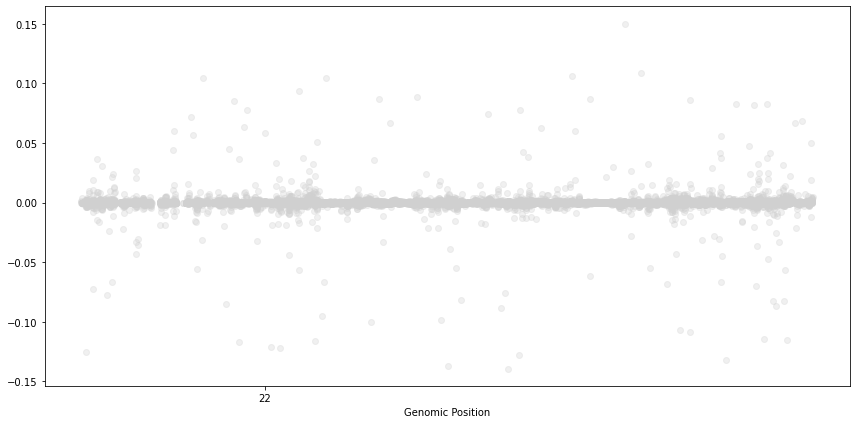

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 1
Objective: -599.5165657006619
Sigma beta: 0.0036451144578103114
Sigma epsilon: 0.5
pi: 0.025585421781739125


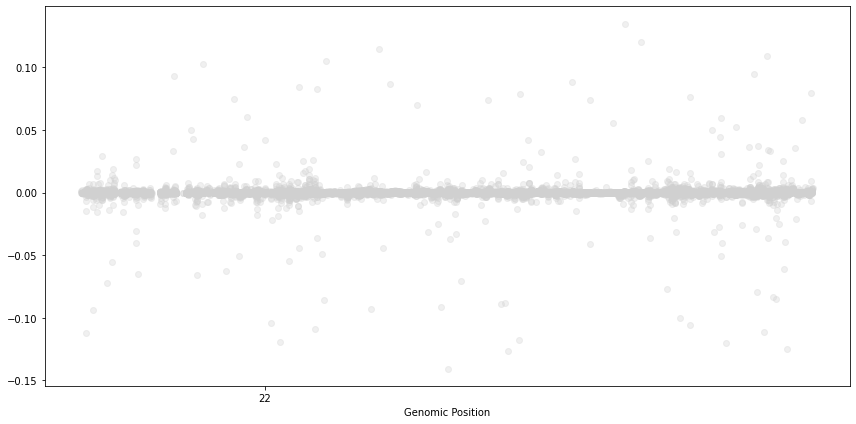

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 2
Objective: -591.1321387835414
Sigma beta: 0.0035149216525043503
Sigma epsilon: 0.5
pi: 0.025212679349828626


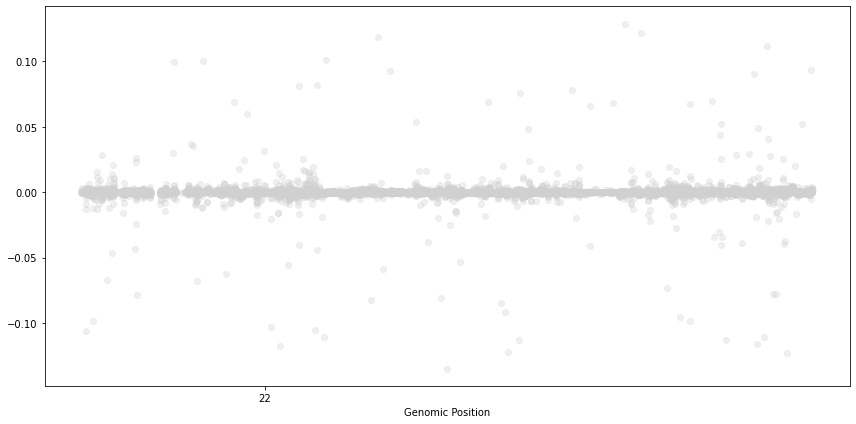

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 3
Objective: -588.8639153987897
Sigma beta: 0.0034561395166461525
Sigma epsilon: 0.5
pi: 0.025080912804928888


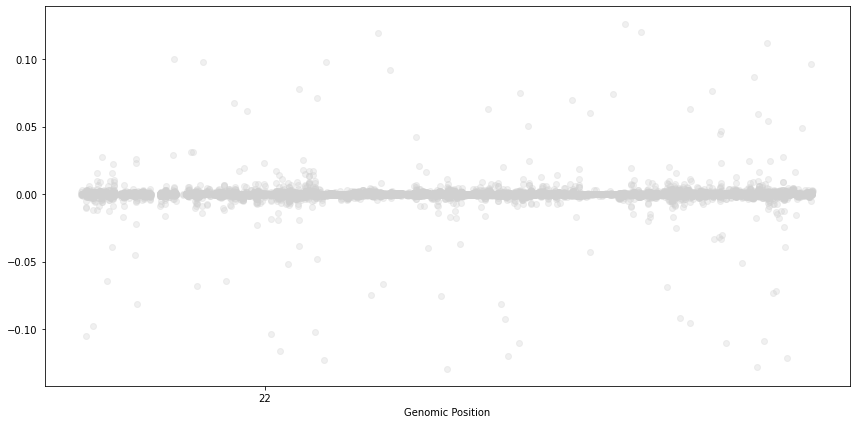

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 4
Objective: -588.1330289203252
Sigma beta: 0.0034229917795433255
Sigma epsilon: 0.5
pi: 0.02504302450137899


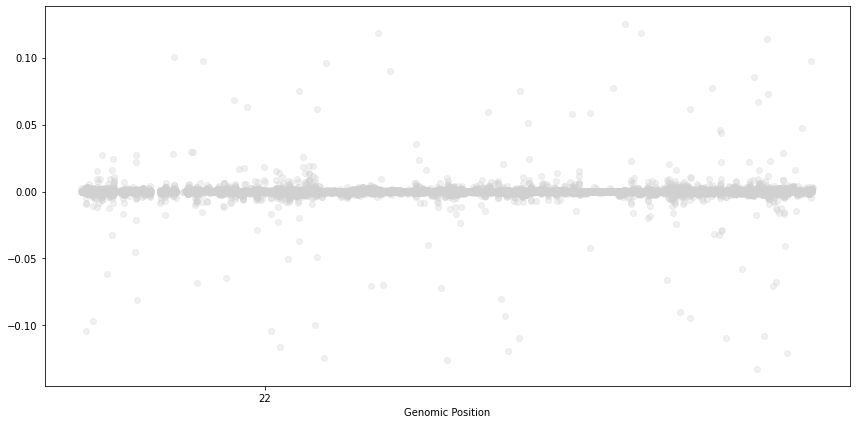

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 5
Objective: -587.7604242948437
Sigma beta: 0.003403514072600971
Sigma epsilon: 0.5
pi: 0.025050123196378043


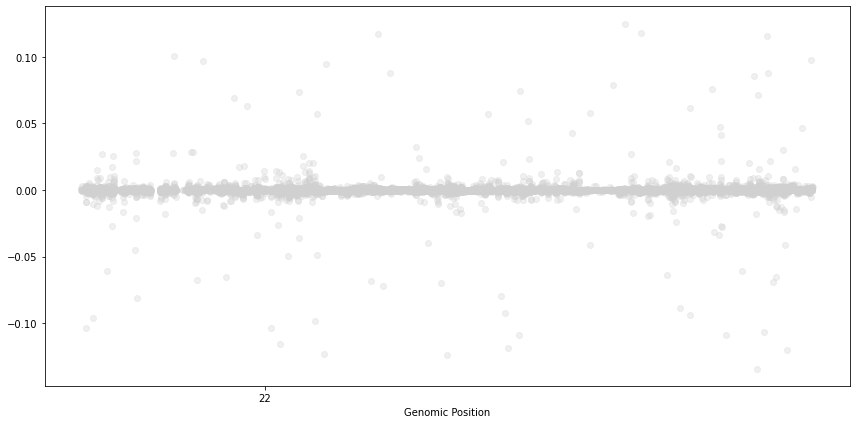

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 6
Objective: -587.5179429922355
Sigma beta: 0.0033915002714070847
Sigma epsilon: 0.5
pi: 0.025079056388236393


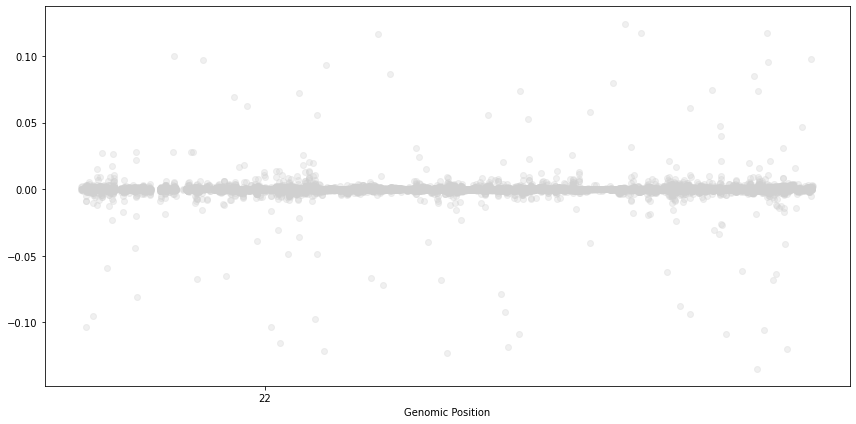

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 7
Objective: -587.3578973344229
Sigma beta: 0.0033836726086164076
Sigma epsilon: 0.5
pi: 0.02511513877030611


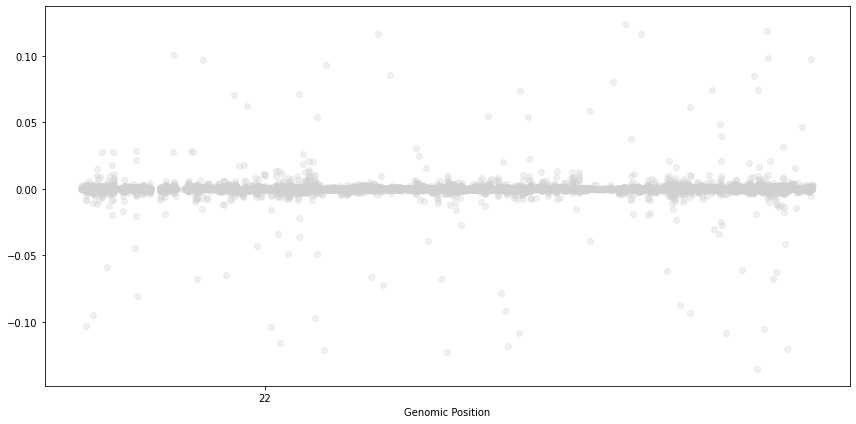

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 8
Objective: -587.2834075558749
Sigma beta: 0.0033787150613258125
Sigma epsilon: 0.5
pi: 0.025150391984196722


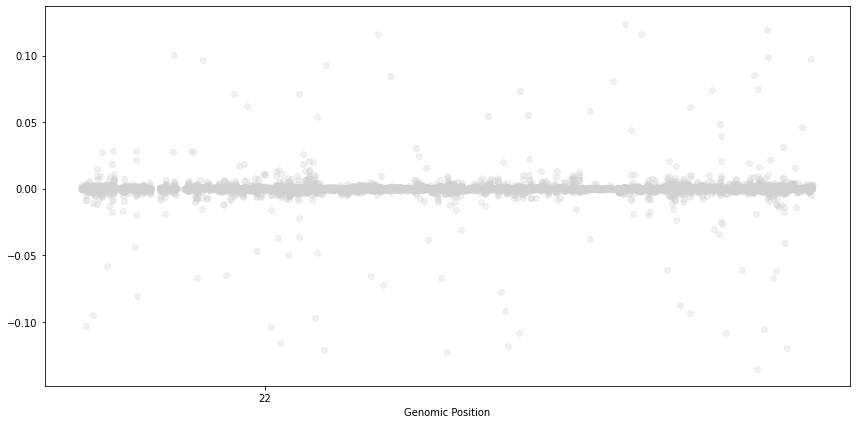

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 9
Objective: -587.2428648162313
Sigma beta: 0.003375927560862408
Sigma epsilon: 0.5
pi: 0.02518165281289307


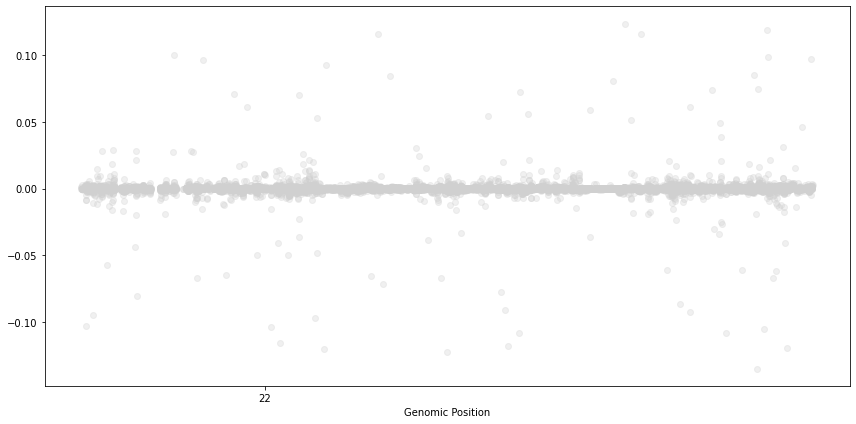

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 10
Objective: -587.2094201806685
Sigma beta: 0.0033750289112953586
Sigma epsilon: 0.5
pi: 0.02520765862996671


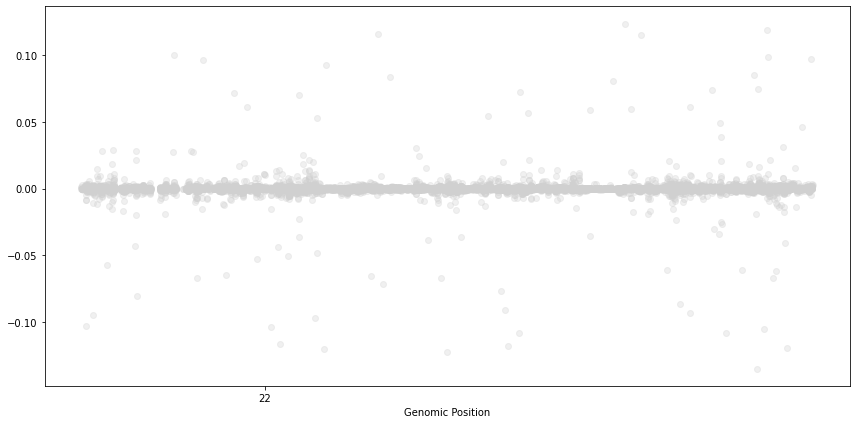

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 11
Objective: -587.1796267671161
Sigma beta: 0.0033758344574446194
Sigma epsilon: 0.5
pi: 0.025227881854506442


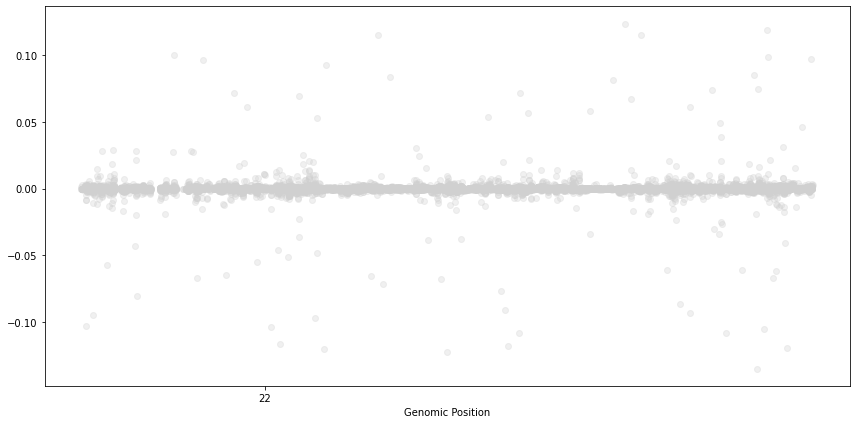

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 12
Objective: -587.154570804305
Sigma beta: 0.003378070731333256
Sigma epsilon: 0.5
pi: 0.025242091147108736


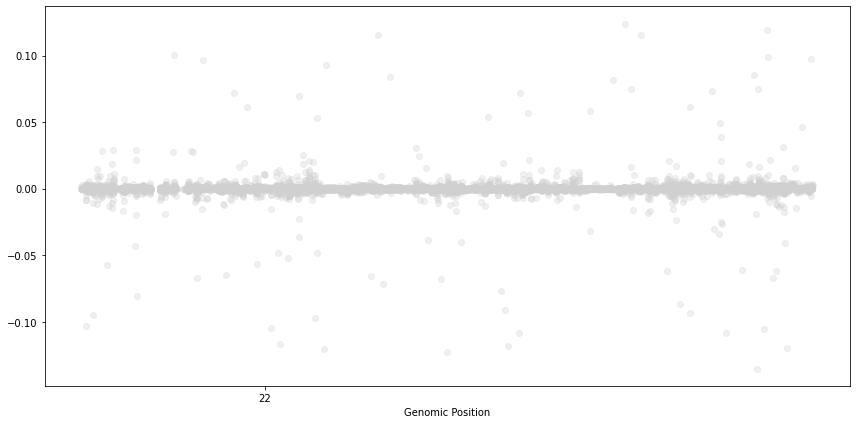

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 13
Objective: -587.135694583314
Sigma beta: 0.0033813799591413257
Sigma epsilon: 0.5
pi: 0.025250275191746874


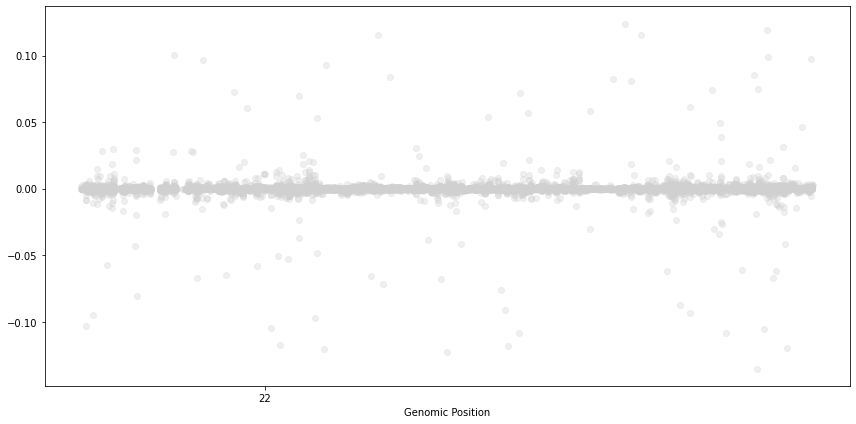

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 14
Objective: -587.1229808332973
Sigma beta: 0.003385398694840399
Sigma epsilon: 0.5
pi: 0.025252743593347456


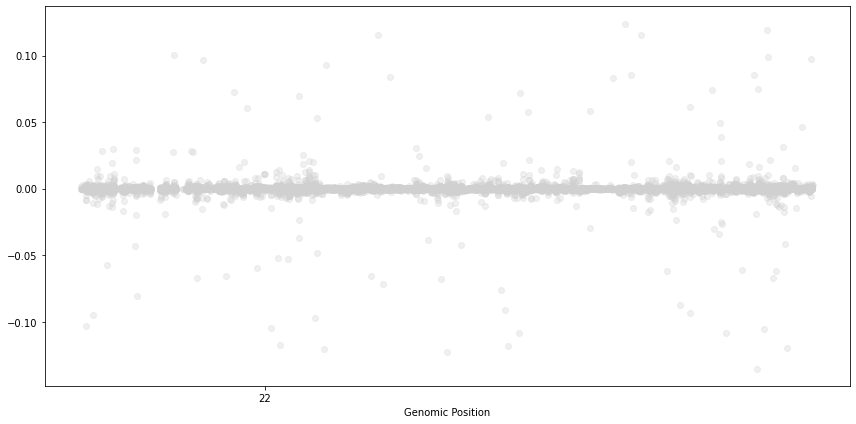

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 15
Objective: -587.1150325068666
Sigma beta: 0.003389830149623481
Sigma epsilon: 0.5
pi: 0.025250145901710735


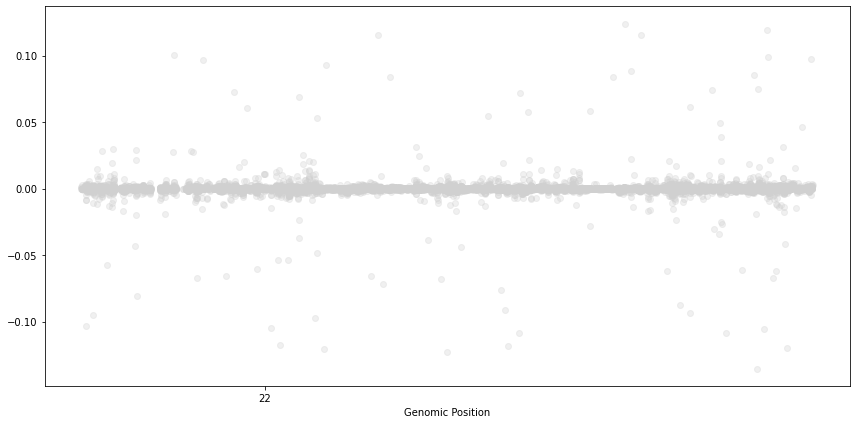

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 16
Objective: -587.1101677027982
Sigma beta: 0.0033944692174247733
Sigma epsilon: 0.5
pi: 0.02524334794352886


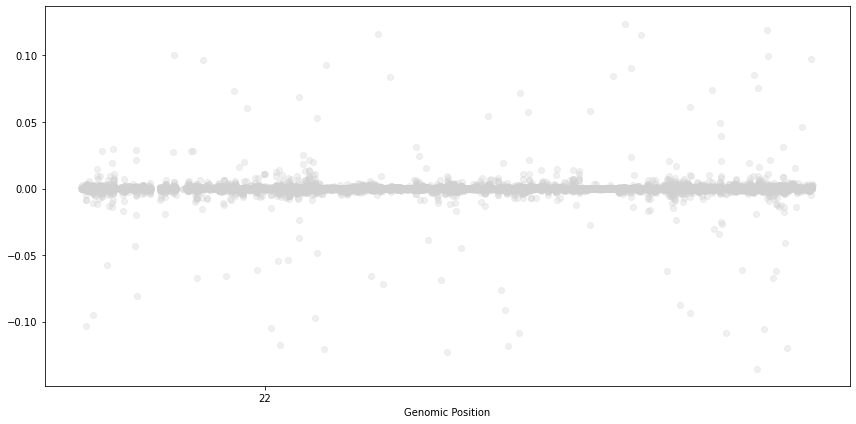

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 17
Objective: -587.1071064678617
Sigma beta: 0.003399187635478935
Sigma epsilon: 0.5
pi: 0.0252332591369341


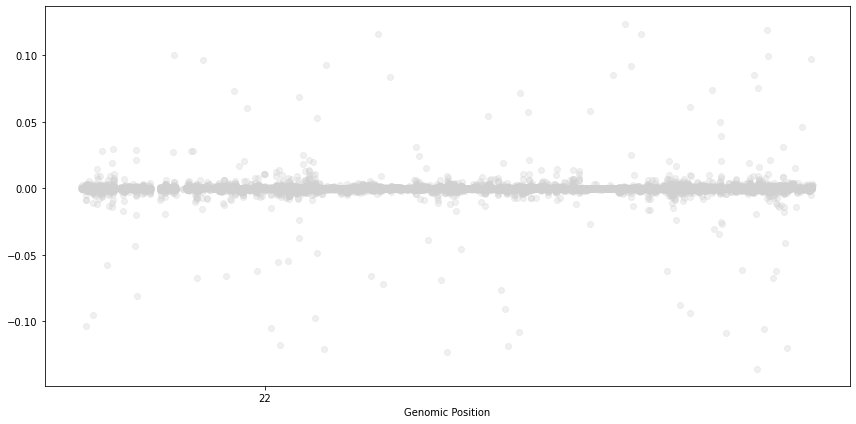

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 18
Objective: -587.1050552896704
Sigma beta: 0.003403907660269577
Sigma epsilon: 0.5
pi: 0.025220705189587404


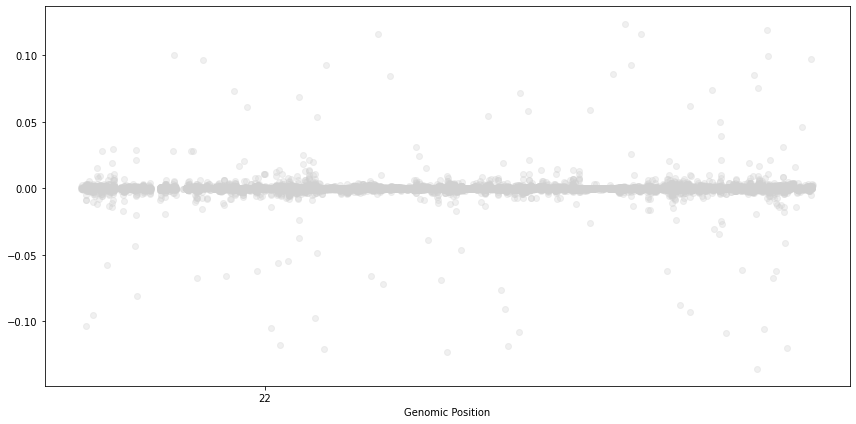

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 19
Objective: -587.1035669490047
Sigma beta: 0.0034085816360434657
Sigma epsilon: 0.5
pi: 0.025206373136259477


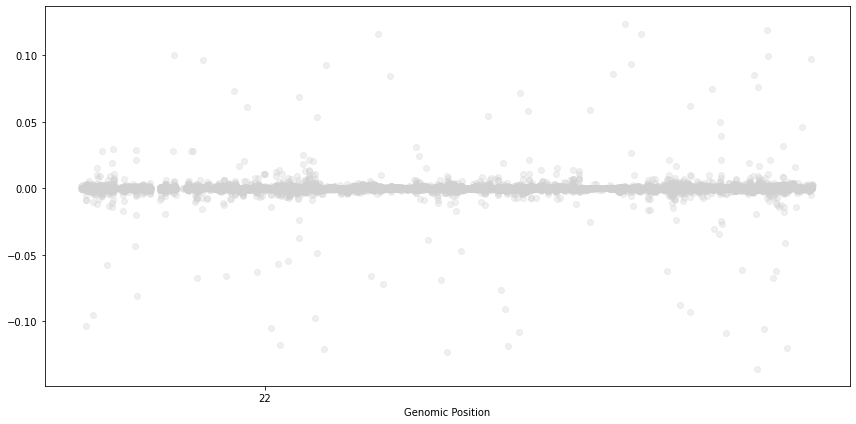

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 20
Objective: -587.1024002019694
Sigma beta: 0.0034131799106628755
Sigma epsilon: 0.5
pi: 0.02519080815580938


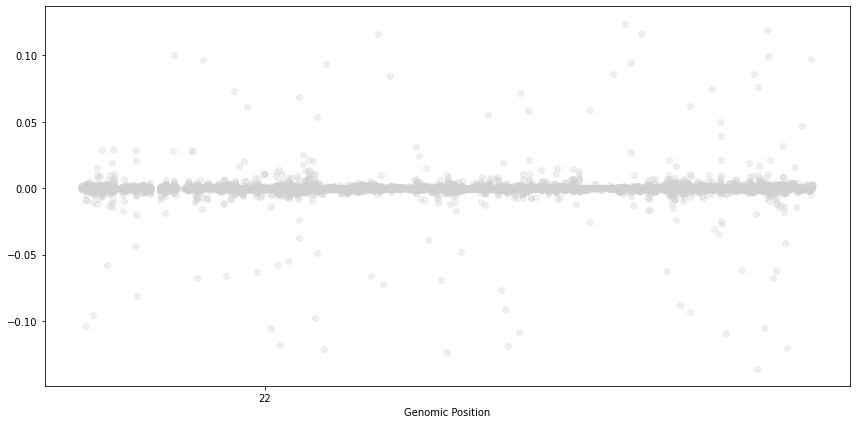

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 21
Objective: -587.1014271775275
Sigma beta: 0.003417684056459276
Sigma epsilon: 0.5
pi: 0.025174433252137553


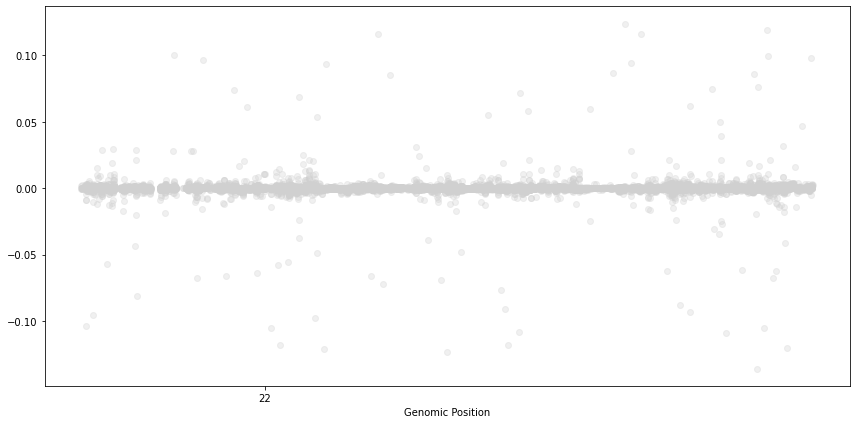

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 22
Objective: -587.1005799753002
Sigma beta: 0.0034220828006599
Sigma epsilon: 0.5
pi: 0.025157573416472945


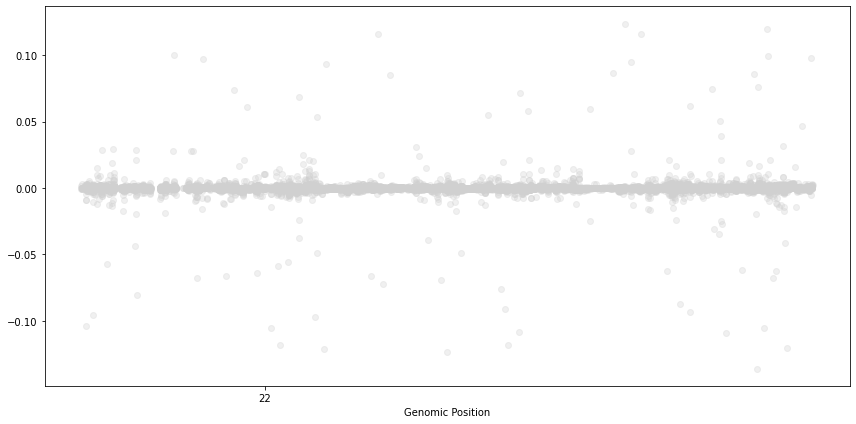

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 23
Objective: -587.0998217855413
Sigma beta: 0.0034263694382619366
Sigma epsilon: 0.5
pi: 0.025140476900915927


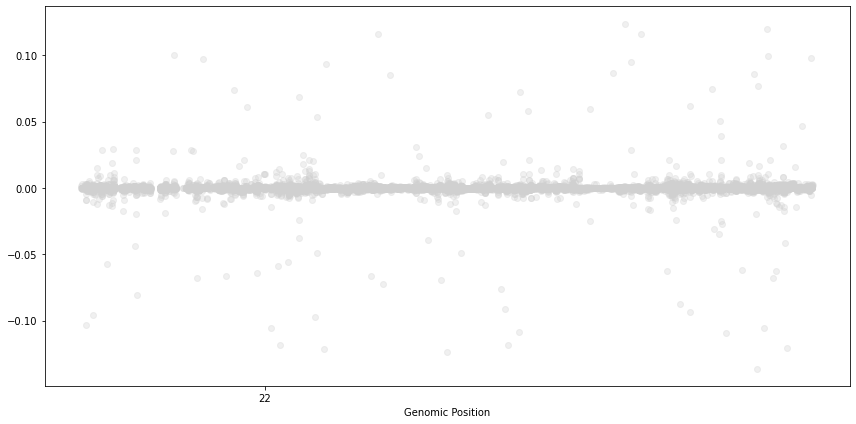

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 24
Objective: -587.0991318456145
Sigma beta: 0.0034305401960512826
Sigma epsilon: 0.5
pi: 0.02512333219363952


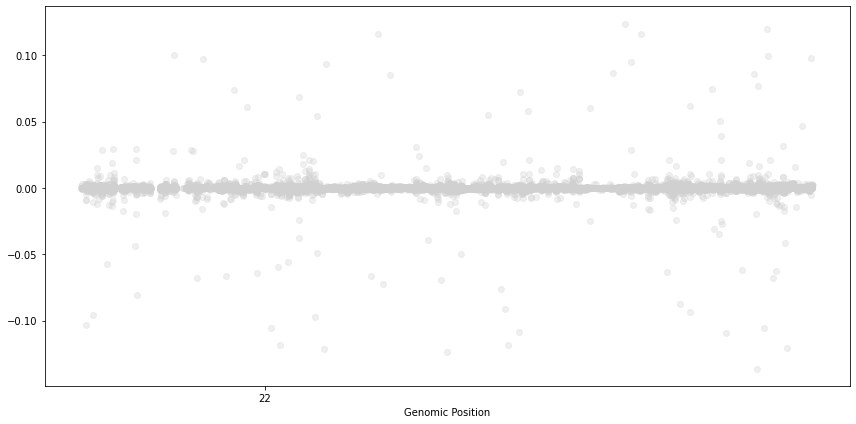

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 25
Objective: -587.0984977556727
Sigma beta: 0.0034345932276642764
Sigma epsilon: 0.5
pi: 0.025106281315086944


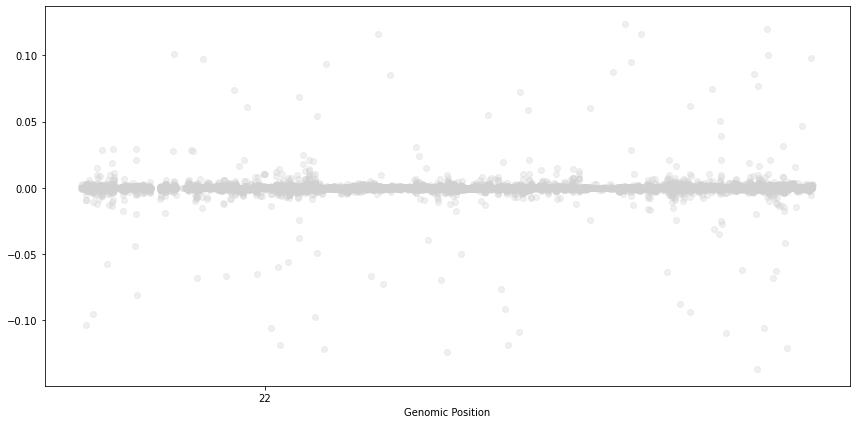

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 26
Objective: -587.0979115707196
Sigma beta: 0.003438527998450902
Sigma epsilon: 0.5
pi: 0.02508943028490006


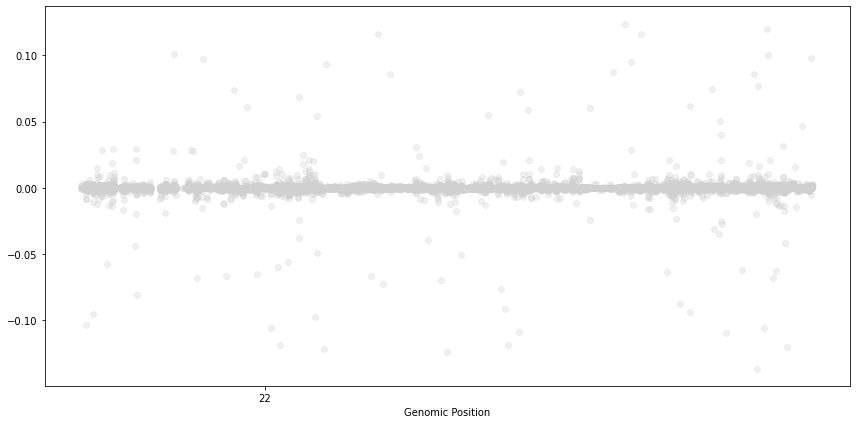

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 27
Objective: -587.0973677979637
Sigma beta: 0.003442344892800157
Sigma epsilon: 0.5
pi: 0.0250728573700788


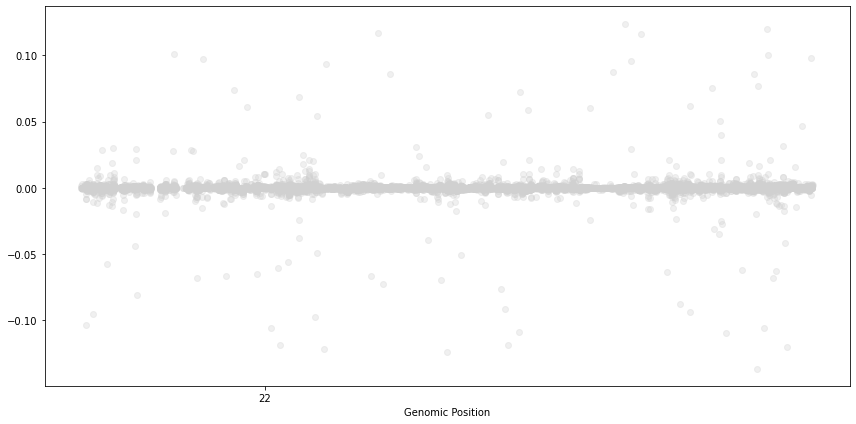

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 28
Objective: -587.0968623524423
Sigma beta: 0.0034460449470211318
Sigma epsilon: 0.5
pi: 0.02505661953040059


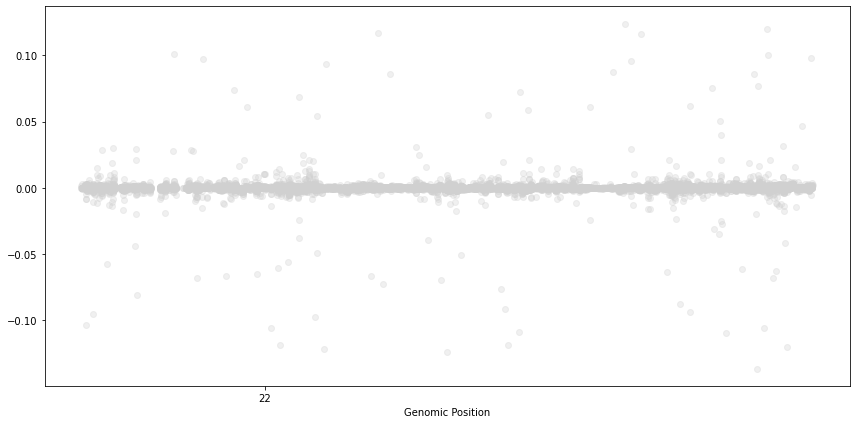

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 29
Objective: -587.0963919982096
Sigma beta: 0.0034496296599645974
Sigma epsilon: 0.5
pi: 0.025040757397905008


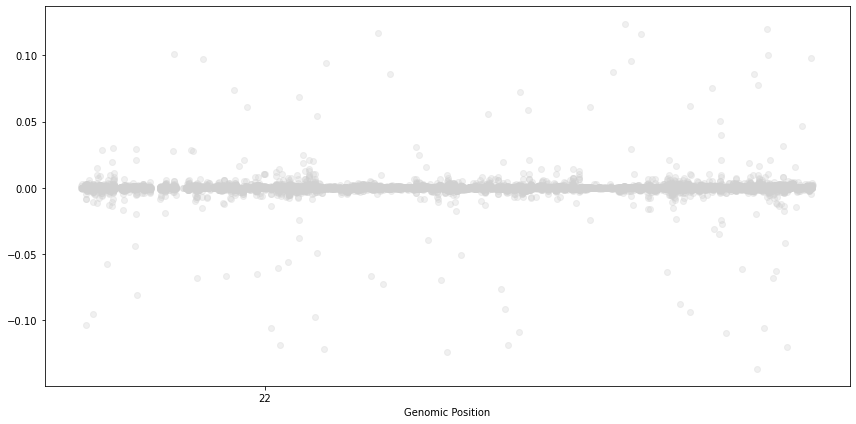

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 30
Objective: -587.0959540396361
Sigma beta: 0.0034531008582360137
Sigma epsilon: 0.5
pi: 0.025025299095355835


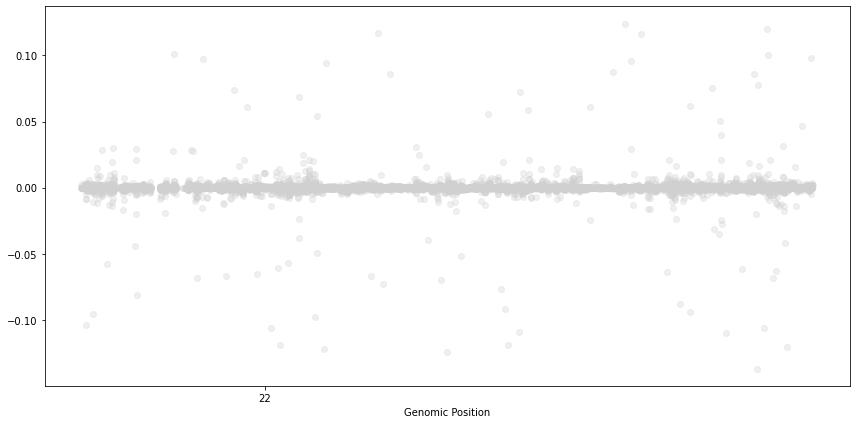

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 31
Objective: -587.0955461443955
Sigma beta: 0.0034564606016465015
Sigma epsilon: 0.5
pi: 0.025010263160799788


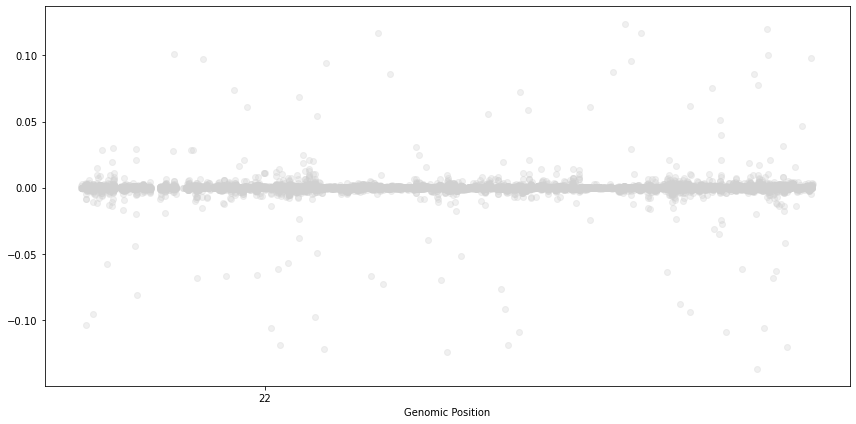

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 32
Objective: -587.0951662386797
Sigma beta: 0.0034597111172807284
Sigma epsilon: 0.5
pi: 0.02499566079331907


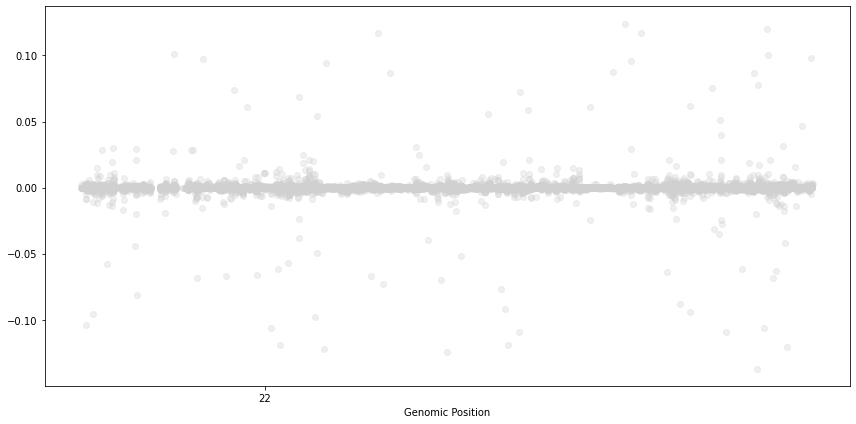

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 33
Objective: -587.0948124430506
Sigma beta: 0.0034628547526913546
Sigma epsilon: 0.5
pi: 0.024981497582189843


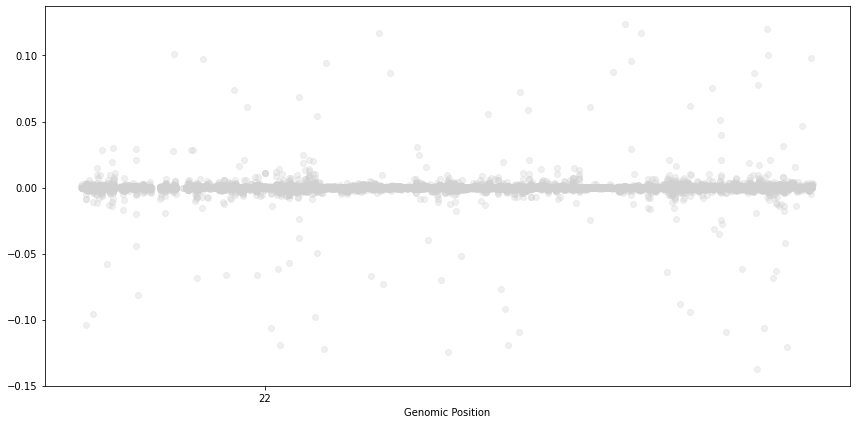

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 34
Objective: -587.0944830317458
Sigma beta: 0.0034658939414365987
Sigma epsilon: 0.5
pi: 0.02496777483931608


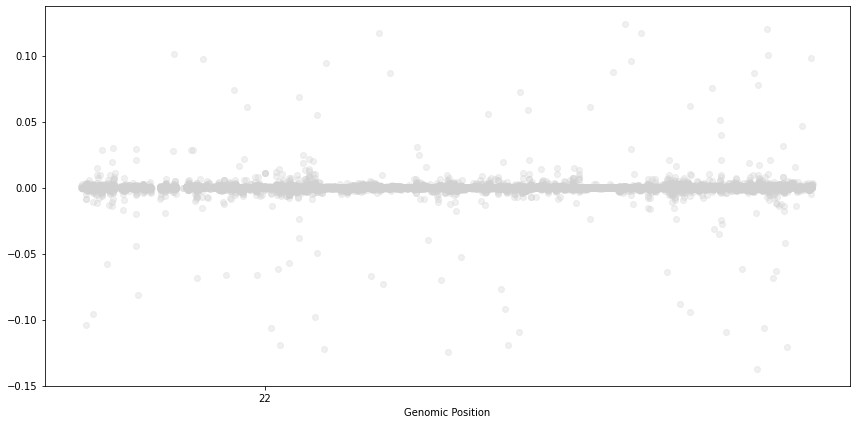

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 35
Objective: -587.0941764064773
Sigma beta: 0.0034688311767617
Sigma epsilon: 0.5
pi: 0.02495449062521061


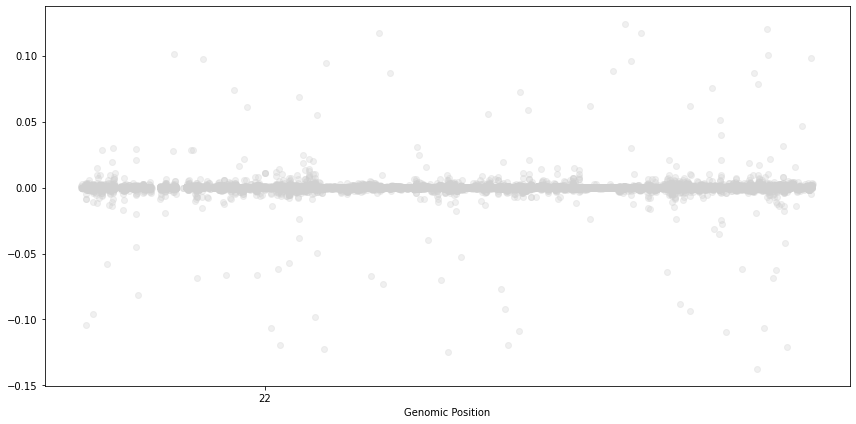

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 36
Objective: -587.0938910783734
Sigma beta: 0.003471668991019163
Sigma epsilon: 0.5
pi: 0.024941640538484244


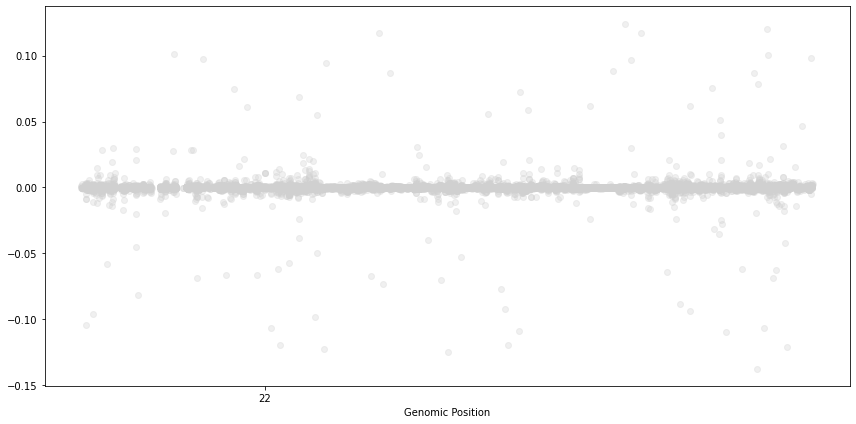

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 37
Objective: -587.0936256553468
Sigma beta: 0.0034744099393746414
Sigma epsilon: 0.5
pi: 0.024929218323728707


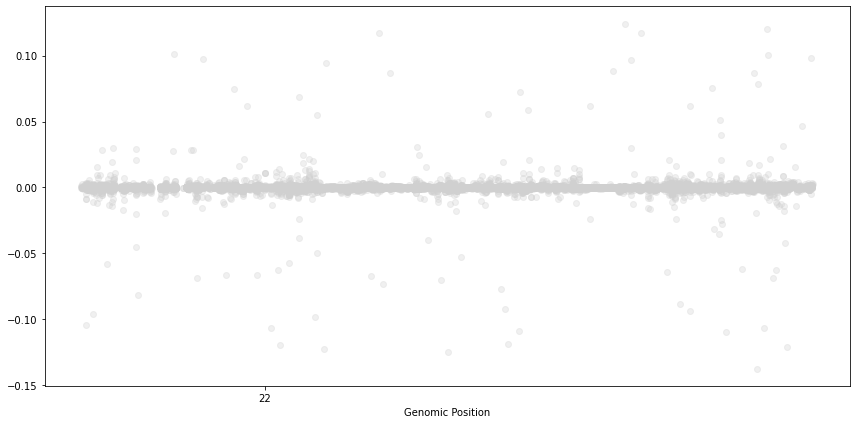

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 38
Objective: -587.0933788329203
Sigma beta: 0.0034770565867740244
Sigma epsilon: 0.5
pi: 0.02491721634052129


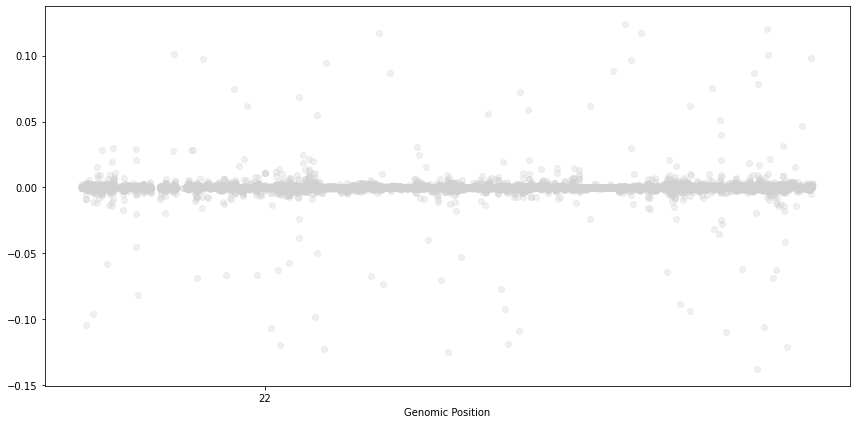

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 39
Objective: -587.093149386932
Sigma beta: 0.0034796114973745245
Sigma epsilon: 0.5
pi: 0.024905625926296686


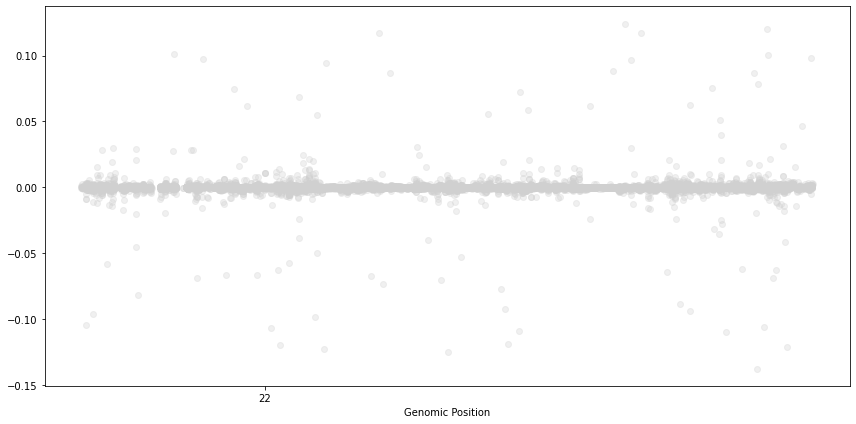

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 40
Objective: -587.0929361678318
Sigma beta: 0.0034820772258299187
Sigma epsilon: 0.5
pi: 0.024894437677895353


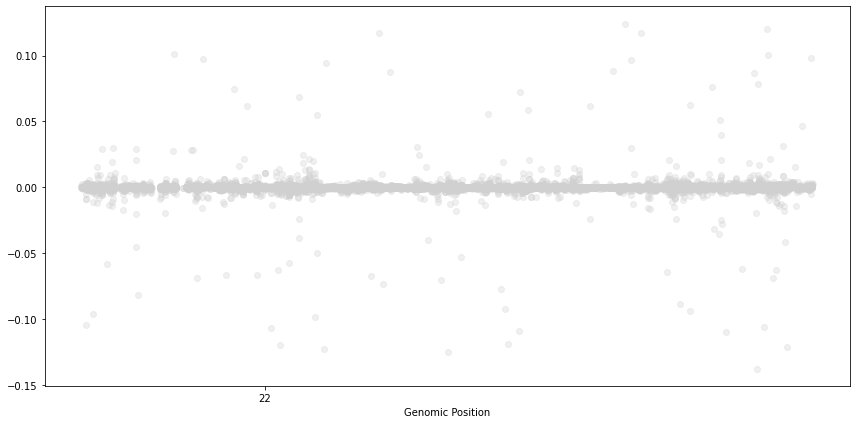

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 41
Objective: -587.0927380959183
Sigma beta: 0.0034844563099952004
Sigma epsilon: 0.5
pi: 0.024883641670550752


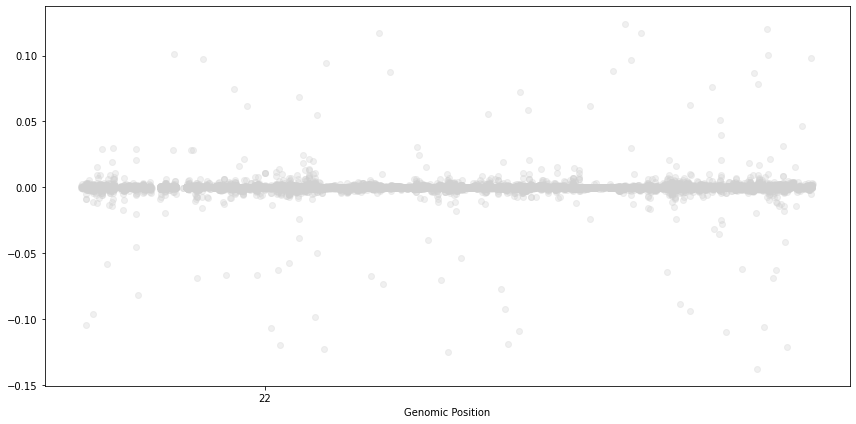

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 42
Objective: -587.0925541571014
Sigma beta: 0.0034867512647577675
Sigma epsilon: 0.5
pi: 0.02487322762857907


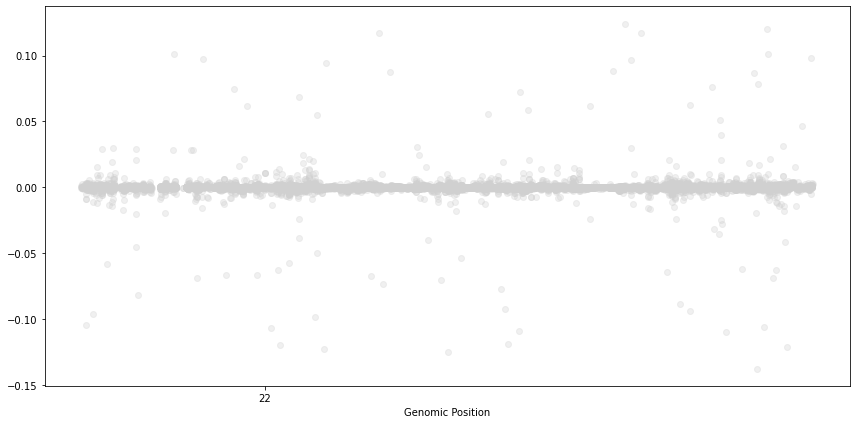

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 43
Objective: -587.0923833992529
Sigma beta: 0.0034889645767977634
Sigma epsilon: 0.5
pi: 0.024863185058686864


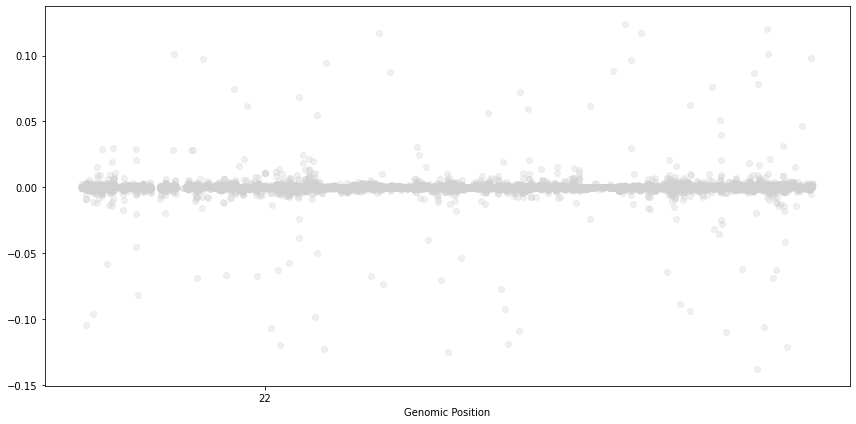

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 44
Objective: -587.0922249287505
Sigma beta: 0.003491098700135488
Sigma epsilon: 0.5
pi: 0.024853503354280125


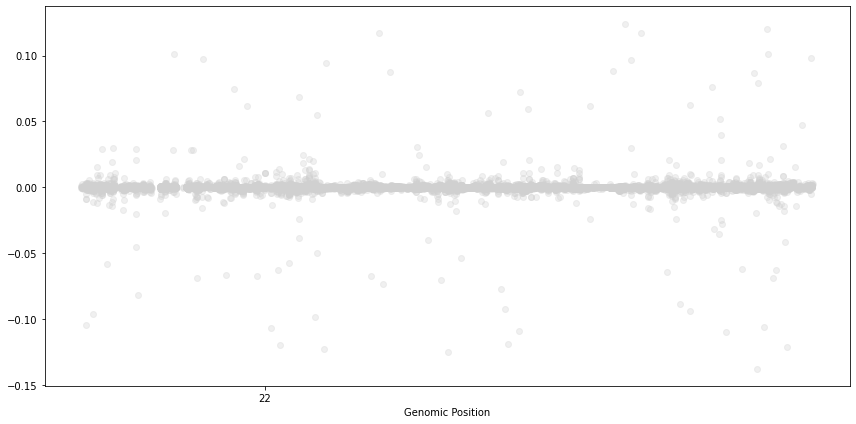

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 45
Objective: -587.0920779073131
Sigma beta: 0.00349315605235477
Sigma epsilon: 0.5
pi: 0.024844171877215108


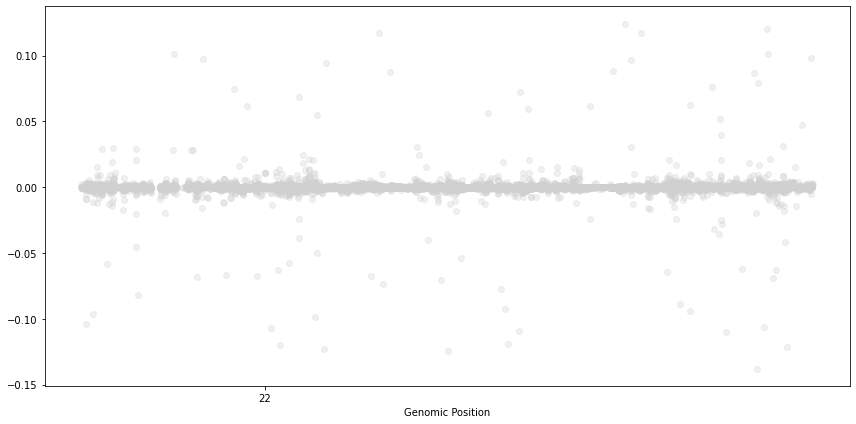

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 46
Objective: -587.0919415490862
Sigma beta: 0.0034951390114109446
Sigma epsilon: 0.5
pi: 0.024835180021935962


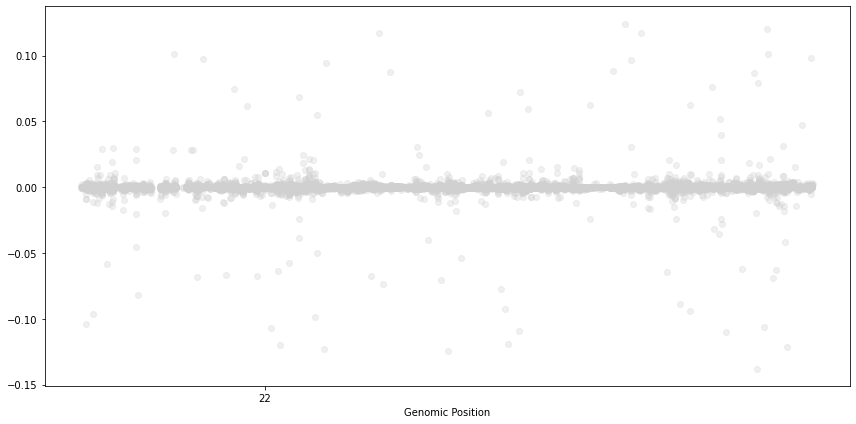

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 47
Objective: -587.0918151177684
Sigma beta: 0.0034970499129475686
Sigma epsilon: 0.5
pi: 0.024826517265798154


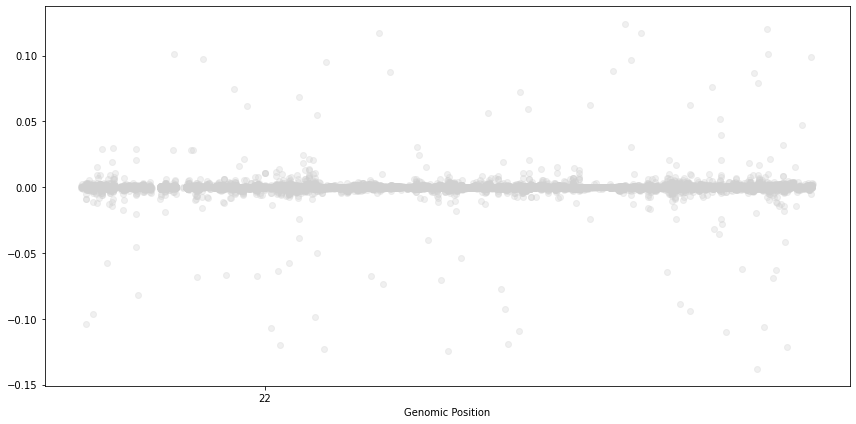

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 48
Objective: -587.0916979238536
Sigma beta: 0.0034988910480589575
Sigma epsilon: 0.5
pi: 0.02481817320850489


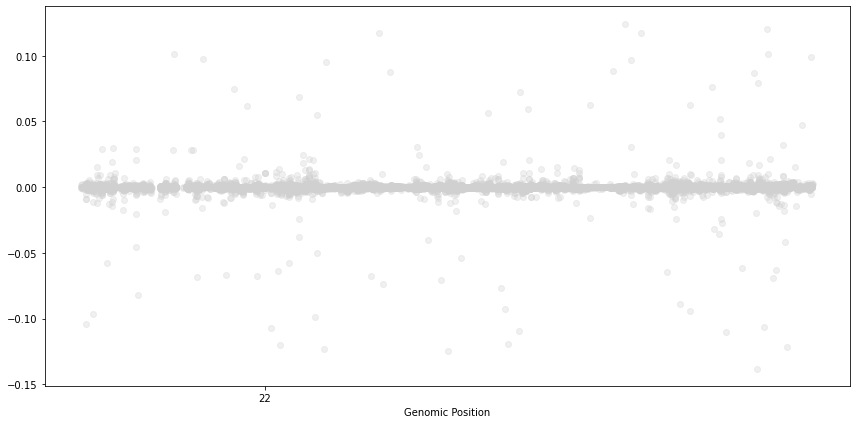

Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 49
Objective: -587.0915893221827
Sigma beta: 0.003500664661446213
Sigma epsilon: 0.5
pi: 0.024810137602922066


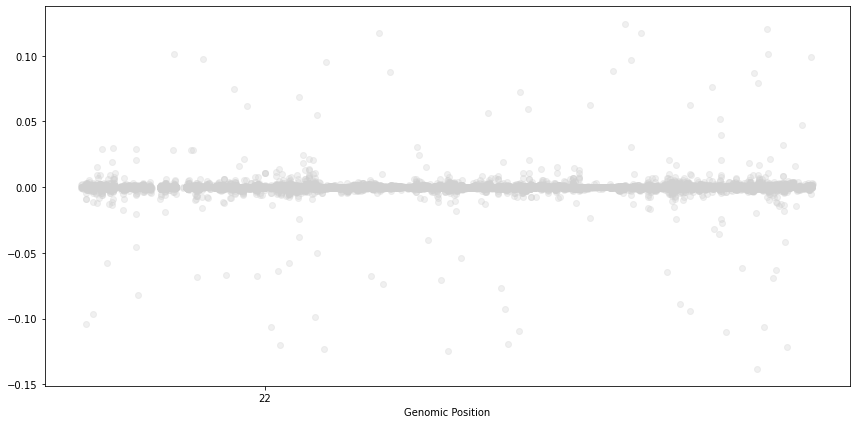

In [10]:
ov.fix_params={'sigma_epsilon':[0.5]}
ov.fit(max_iter=1)

for i in range(50):
    ov.fit(max_iter=1, continued=True)
    print("Iteration:", i)
    print("Objective:", ov.objective())
    print("Sigma beta:", ov.sigma_beta)
    print("Sigma epsilon:", ov.sigma_epsilon)
    print("pi:", ov.pi)
    plot_manhattan(gs_w, ov.inf_beta)

In [5]:
elbo = np.array(ov.history['ELBO'])
(elbo[1:] - elbo[:-1]) / elbo[:-1]

array([-3.67180916e-01, -8.56667231e-02, -6.37817442e-02, -6.75518490e-02,
       -7.59921923e-02, -1.14404309e-01, -1.21276924e+11,  1.33919375e+01,
        3.67410976e-01,  2.40423815e-01,  2.45241992e-01,  3.07700888e-01,
        4.18946400e-01,  5.71009092e-01,  7.40639310e-01,  8.96857661e-01,
        1.01933240e+00,  1.10532554e+00,  1.16239046e+00,  1.19980633e+00,
        1.22480950e+00,  1.24216597e+00,  1.25480857e+00,  1.26451032e+00,
        1.27235225e+00,  1.27900662e+00,  1.28489990e+00,  1.29030594e+00,
        1.29540017e+00,  1.30029240e+00,  1.30504764e+00,  1.30970003e+00,
        1.31426257e+00,  1.31873415e+00,  1.32310485e+00,  1.32735976e+00,
        1.33148188e+00,  1.33545410e+00,  1.33926065e+00,  1.34288790e+00,
        1.34632478e+00,  1.34956297e+00,  1.35259672e+00,  1.35542265e+00,
        1.35803943e+00,  1.36044739e+00,  1.36264821e+00,  1.36464456e+00,
        1.36643986e+00,  1.36803805e+00,  1.36944343e+00,  1.37066054e+00,
        1.37169410e+00,  

In [110]:
ov.fit(max_iter=5)
ov.get_heritability(), ov.pi, ov.sigma_epsilon

Max iterations reached without convergence. You may need to run the model for more iterations.


(0.9999999999998104, 0.9999989999042819, 1e-12)

In [104]:
np.log(6.73151141e+10)

24.932650626392142

In [99]:
elbo = np.array(ov.history['ELBO'])
elbo[1:] / elbo[:-1]

array([-4.53855939e+11,  3.16691262e+00,  1.30831820e+00,  1.23701758e+00,
        1.26041898e+00,  1.33726993e+00,  1.46369030e+00,  1.62717098e+00,
        1.79896062e+00,  1.94788568e+00,  2.05872823e+00,  2.13360860e+00,
        2.18207673e+00,  2.21346699e+00,  2.23444906e+00,  2.24920898e+00,
        2.26023070e+00,  2.26895648e+00,  2.27621712e+00,  2.28248768e+00,
        2.28803572e+00,  2.29300772e+00,  2.29748080e+00,  2.30149431e+00,
        2.30506957e+00,  2.30822195e+00,  2.31096803e+00,  2.31332930e+00,
        2.31533350e+00,  2.31701445e+00,  2.31841081e+00,  2.31956433e+00,
        2.32051792e+00,  2.32131360e+00,  2.32199081e+00,  2.32258484e+00,
        2.32312569e+00,  2.32363723e+00,  2.32413673e+00,  2.32463480e+00,
        2.32513551e+00,  2.32563695e+00,  2.32613190e+00,  2.32660875e+00,
        2.32705250e+00,  2.32744591e+00,  2.32777058e+00,  2.32800801e+00,
        2.32814059e+00,  2.32815242e+00,  2.32802998e+00,  2.32776269e+00,
        2.32734315e+00,  

In [5]:
from prs.src.HyperparameterSearch import HyperparameterSearch, fit_model_averaging

In [71]:
hv = HyperparameterSearch(v)

In [72]:
m_bo = hv.fit_bayes_opt()

> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.27it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 14.13it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.55it/s]

> Performing model fit...


 84%|████████▍ | 84/100 [00:06<00:01, 13.45it/s]


Converged at iteration 85 | ELBO: 35.462063
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.97it/s]

> Performing model fit...


100%|██████████| 100/100 [00:06<00:00, 14.68it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 15.29it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.65it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.98it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 15.21it/s]

> Performing model fit...


 11%|█         | 11/100 [00:01<00:09,  9.66it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.98it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.73it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.50it/s]

> Performing model fit...


 16%|█▌        | 16/100 [00:01<00:07, 10.92it/s]


Converged at iteration 17 | ELBO: -761.544506
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.37it/s]

> Performing model fit...


 10%|█         | 10/100 [00:00<00:08, 10.20it/s]


Converged at iteration 11 | ELBO: -730.164629
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.60it/s]

> Performing model fit...


  6%|▌         | 6/100 [00:00<00:08, 10.73it/s]


Converged at iteration 7 | ELBO: -693.398782
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.96it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.05it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.79it/s]

> Performing model fit...


 91%|█████████ | 91/100 [00:07<00:00, 12.79it/s]


Converged at iteration 92 | ELBO: -206.333779
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.32it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.13it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 15.20it/s]

> Performing model fit...


 32%|███▏      | 32/100 [00:02<00:05, 13.17it/s]


Converged at iteration 33 | ELBO: -680.934045
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.29it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.38it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:07, 12.04it/s]


Converged at iteration 14 | ELBO: -712.522757
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.09it/s]

> Performing model fit...


  5%|▌         | 5/100 [00:00<00:08, 10.92it/s]


Converged at iteration 6 | ELBO: -693.433796
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.99it/s]

> Performing model fit...


 23%|██▎       | 23/100 [00:01<00:06, 12.23it/s]


Converged at iteration 24 | ELBO: -756.221140
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.50it/s]

> Performing model fit...


100%|██████████| 100/100 [00:09<00:00, 10.20it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Bayesian optimization identified best hyperparameters as: {'sigma_epsilon': 0.23520322088262358, 'pi': 0.9948769331021258}
> Initializing model parameters


  0%|          | 0/1000 [00:00<?, ?it/s]

> Performing model fit...


 11%|█▏        | 113/1000 [00:10<01:21, 10.84it/s]

Converged at iteration 114 | ELBO: 35.462583


In [77]:
m_bo.var_mu_beta

{22: array([ 2.38766065e-03,  1.16940082e-02,  5.80677009e-03, ...,
         2.35167695e-03, -2.05081894e-05,  2.84156120e-03])}

In [29]:
m_bo.history['ELBO']

[-7973.755979367561,
 -4533.665002766167,
 -3199.547788058393,
 -2471.2760504349426,
 -2011.535084437768,
 -1695.04775447461,
 -1469.1605387268355,
 -1305.2769378806115,
 -1183.8449098560523,
 -1092.0081138029054,
 -1021.6994019642007,
 -967.1819768109854,
 -924.1804937974666,
 -889.6719768657931,
 -861.4739647349197,
 -837.9634531377233,
 -818.0431570574292,
 -800.9939270146133,
 -786.2845091623021,
 -773.5010023677023,
 -762.3184472877474,
 -752.4734171595192,
 -743.7535004051751,
 -735.9893052149273,
 -729.0433866798849,
 -722.8029085069284,
 -717.1751632517698,
 -712.0831752203812,
 -707.4617325064464,
 -703.254768251747,
 -699.4139702519897,
 -695.8978743140178,
 -692.6709449472692,
 -689.7026141268725,
 -686.9663933605771,
 -684.4391299966373,
 -682.1004431347683,
 -679.932328458046,
 -677.9188673196913,
 -676.0459739912476,
 -674.301156325484,
 -672.673295607412,
 -671.1524563825515,
 -669.7297304614767,
 -668.3971110574348,
 -667.1473882880236,
 -665.9740583045204,
 -664.871242

In [66]:
m_gs = hv.fit_grid_search(opt_params=('sigma_epsilon', 'pi'))

> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.18it/s]

> Performing model fit...


 35%|███▌      | 35/100 [00:02<00:04, 13.57it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.86it/s]

> Performing model fit...


 30%|███       | 30/100 [00:02<00:05, 13.56it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.39it/s]

> Performing model fit...


 18%|█▊        | 18/100 [00:01<00:06, 13.02it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.55it/s]

> Performing model fit...


 18%|█▊        | 18/100 [00:01<00:06, 12.91it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.13it/s]

> Performing model fit...


 19%|█▉        | 19/100 [00:01<00:06, 13.23it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.21it/s]

> Performing model fit...


 16%|█▌        | 16/100 [00:01<00:06, 12.54it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.54it/s]

> Performing model fit...


 14%|█▍        | 14/100 [00:01<00:06, 12.50it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.31it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:00<00:07, 12.27it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.64it/s]

> Performing model fit...


 11%|█         | 11/100 [00:00<00:07, 11.82it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.07it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:13,  7.48it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.15it/s]

> Performing model fit...


 64%|██████▍   | 64/100 [00:04<00:02, 13.75it/s]


Converged at iteration 65 | ELBO: -400.010910
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.68it/s]

> Performing model fit...


 91%|█████████ | 91/100 [00:06<00:00, 13.44it/s]


Converged at iteration 92 | ELBO: -213.926602
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.69it/s]

> Performing model fit...


 73%|███████▎  | 73/100 [00:05<00:02, 13.02it/s]


Converged at iteration 74 | ELBO: 22.756812
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.51it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:13,  7.34it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.25it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:13,  7.47it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.81it/s]

> Performing model fit...


 36%|███▌      | 36/100 [00:03<00:05, 11.84it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.52it/s]

> Performing model fit...


 26%|██▌       | 26/100 [00:02<00:06, 11.49it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.90it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:10,  8.98it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.50it/s]

> Performing model fit...


  4%|▍         | 4/100 [00:00<00:09,  9.83it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.42it/s]

> Performing model fit...


 29%|██▉       | 29/100 [00:02<00:05, 12.71it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.99it/s]

> Performing model fit...


 21%|██        | 21/100 [00:01<00:06, 12.59it/s]


Converged at iteration 22 | ELBO: -730.504297
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.85it/s]

> Performing model fit...


 37%|███▋      | 37/100 [00:02<00:05, 12.54it/s]


Converged at iteration 38 | ELBO: -654.305241
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.70it/s]

> Performing model fit...


 69%|██████▉   | 69/100 [00:05<00:02, 12.96it/s]


Converged at iteration 70 | ELBO: -556.994714
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.86it/s]

> Performing model fit...


 53%|█████▎    | 53/100 [00:04<00:03, 12.79it/s]


Converged at iteration 54 | ELBO: -455.532716
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.50it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.28it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.66it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.70it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 15.02it/s]

> Performing model fit...


 47%|████▋     | 47/100 [00:03<00:04, 12.50it/s]


Converged at iteration 48 | ELBO: -223.356355
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 15.19it/s]

> Performing model fit...


 43%|████▎     | 43/100 [00:03<00:04, 12.98it/s]


Converged at iteration 44 | ELBO: -260.454060
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.05it/s]

> Performing model fit...


 98%|█████████▊| 98/100 [00:07<00:00, 12.83it/s]


Converged at iteration 99 | ELBO: -279.948657
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.89it/s]

> Performing model fit...


 22%|██▏       | 22/100 [00:01<00:06, 12.86it/s]


Converged at iteration 23 | ELBO: -757.656317
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 15.07it/s]

> Performing model fit...


 15%|█▌        | 15/100 [00:01<00:06, 12.22it/s]


Converged at iteration 16 | ELBO: -722.380986
> Initializing model parameters


  1%|          | 1/100 [00:00<00:12,  7.63it/s]

> Performing model fit...


 31%|███       | 31/100 [00:02<00:05, 12.62it/s]


Converged at iteration 32 | ELBO: -675.352599
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.45it/s]

> Performing model fit...


 23%|██▎       | 23/100 [00:01<00:06, 12.68it/s]


Converged at iteration 24 | ELBO: -616.393816
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.72it/s]

> Performing model fit...


 29%|██▉       | 29/100 [00:02<00:05, 12.90it/s]


Converged at iteration 30 | ELBO: -541.077244
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.31it/s]

> Performing model fit...


 87%|████████▋ | 87/100 [00:06<00:01, 12.93it/s]


Converged at iteration 88 | ELBO: -482.605933
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.92it/s]

> Performing model fit...


 48%|████▊     | 48/100 [00:03<00:04, 12.56it/s]


Converged at iteration 49 | ELBO: -475.222472
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.30it/s]

> Performing model fit...


 31%|███       | 31/100 [00:02<00:05, 12.68it/s]


Converged at iteration 32 | ELBO: -479.689512
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.70it/s]

> Performing model fit...


 60%|██████    | 60/100 [00:04<00:03, 13.02it/s]


Converged at iteration 61 | ELBO: -484.726705
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.12it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.07it/s]

> Performing model fit...


 19%|█▉        | 19/100 [00:01<00:06, 12.63it/s]


Converged at iteration 20 | ELBO: -740.676891
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.33it/s]

> Performing model fit...


 17%|█▋        | 17/100 [00:01<00:06, 12.42it/s]


Converged at iteration 18 | ELBO: -725.964741
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.27it/s]

> Performing model fit...


 21%|██        | 21/100 [00:01<00:06, 12.64it/s]


Converged at iteration 22 | ELBO: -701.198536
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.38it/s]

> Performing model fit...


 16%|█▌        | 16/100 [00:01<00:06, 12.58it/s]


Converged at iteration 17 | ELBO: -671.186335
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.88it/s]

> Performing model fit...


 35%|███▌      | 35/100 [00:02<00:05, 12.85it/s]


Converged at iteration 36 | ELBO: -625.311020
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.08it/s]

> Performing model fit...


 63%|██████▎   | 63/100 [00:04<00:02, 12.88it/s]


Converged at iteration 64 | ELBO: -599.010158
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.36it/s]

> Performing model fit...


 20%|██        | 20/100 [00:01<00:06, 12.80it/s]


Converged at iteration 21 | ELBO: -583.418379
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.33it/s]

> Performing model fit...


 38%|███▊      | 38/100 [00:02<00:04, 12.79it/s]


Converged at iteration 39 | ELBO: -577.465478
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.97it/s]

> Performing model fit...


 85%|████████▌ | 85/100 [00:06<00:01, 12.74it/s]


Converged at iteration 86 | ELBO: -577.539984
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.82it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.70it/s]

> Performing model fit...


 16%|█▌        | 16/100 [00:01<00:06, 12.42it/s]


Converged at iteration 17 | ELBO: -720.355637
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.27it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:00<00:07, 12.54it/s]


Converged at iteration 13 | ELBO: -711.285680
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 14.00it/s]

> Performing model fit...


 14%|█▍        | 14/100 [00:01<00:06, 12.33it/s]


Converged at iteration 15 | ELBO: -697.552251
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.06it/s]

> Performing model fit...


 17%|█▋        | 17/100 [00:01<00:06, 12.37it/s]


Converged at iteration 18 | ELBO: -679.659170
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.79it/s]

> Performing model fit...


 28%|██▊       | 28/100 [00:02<00:05, 12.88it/s]


Converged at iteration 29 | ELBO: -657.883847
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.70it/s]

> Performing model fit...


 18%|█▊        | 18/100 [00:01<00:07, 11.50it/s]


Converged at iteration 19 | ELBO: -640.542942
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.32it/s]

> Performing model fit...


 26%|██▌       | 26/100 [00:02<00:05, 12.75it/s]


Converged at iteration 27 | ELBO: -628.206869
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.14it/s]

> Performing model fit...


 51%|█████     | 51/100 [00:04<00:04, 12.22it/s]


Converged at iteration 52 | ELBO: -623.866428
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.96it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.88it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.87it/s]

> Performing model fit...


 10%|█         | 10/100 [00:00<00:07, 12.28it/s]


Converged at iteration 11 | ELBO: -706.572253
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.21it/s]

> Performing model fit...


 15%|█▌        | 15/100 [00:01<00:06, 12.17it/s]


Converged at iteration 16 | ELBO: -702.044950
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.55it/s]

> Performing model fit...


 10%|█         | 10/100 [00:00<00:07, 12.14it/s]


Converged at iteration 11 | ELBO: -694.597597
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.86it/s]

> Performing model fit...


 18%|█▊        | 18/100 [00:01<00:06, 12.77it/s]


Converged at iteration 19 | ELBO: -683.915727
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.96it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:00<00:07, 12.10it/s]


Converged at iteration 13 | ELBO: -671.333132
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.95it/s]

> Performing model fit...


 19%|█▉        | 19/100 [00:01<00:06, 12.89it/s]


Converged at iteration 20 | ELBO: -659.189415
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.11it/s]

> Performing model fit...


 33%|███▎      | 33/100 [00:02<00:05, 12.83it/s]


Converged at iteration 34 | ELBO: -651.808406
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.36it/s]

> Performing model fit...


 70%|███████   | 70/100 [00:05<00:02, 13.06it/s]


Converged at iteration 71 | ELBO: -649.231134
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.80it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.34it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.53it/s]

> Performing model fit...


 10%|█         | 10/100 [00:00<00:07, 11.43it/s]


Converged at iteration 11 | ELBO: -697.944199
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.24it/s]

> Performing model fit...


 10%|█         | 10/100 [00:00<00:07, 12.15it/s]


Converged at iteration 11 | ELBO: -695.432696
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.53it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:00<00:07, 12.51it/s]


Converged at iteration 13 | ELBO: -691.207221
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.23it/s]

> Performing model fit...


 14%|█▍        | 14/100 [00:01<00:06, 12.35it/s]


Converged at iteration 15 | ELBO: -684.979388
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.97it/s]

> Performing model fit...


 14%|█▍        | 14/100 [00:01<00:06, 12.39it/s]


Converged at iteration 15 | ELBO: -677.301502
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.74it/s]

> Performing model fit...


 22%|██▏       | 22/100 [00:01<00:06, 12.50it/s]


Converged at iteration 23 | ELBO: -670.239505
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.52it/s]

> Performing model fit...


 44%|████▍     | 44/100 [00:03<00:04, 12.73it/s]


Converged at iteration 45 | ELBO: -666.258753
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.01it/s]

> Performing model fit...


 98%|█████████▊| 98/100 [00:07<00:00, 12.91it/s]


Converged at iteration 99 | ELBO: -664.827888
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.03it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.63it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.61it/s]

> Performing model fit...


  5%|▌         | 5/100 [00:00<00:08, 10.70it/s]


Converged at iteration 6 | ELBO: -694.005038
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.90it/s]

> Performing model fit...


  6%|▌         | 6/100 [00:00<00:08, 11.61it/s]


Converged at iteration 7 | ELBO: -692.630960
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.71it/s]

> Performing model fit...


  8%|▊         | 8/100 [00:00<00:08, 11.37it/s]


Converged at iteration 9 | ELBO: -690.212822
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.59it/s]

> Performing model fit...


 11%|█         | 11/100 [00:00<00:07, 11.82it/s]


Converged at iteration 12 | ELBO: -686.525462
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.42it/s]

> Performing model fit...


 28%|██▊       | 28/100 [00:02<00:05, 12.95it/s]


Converged at iteration 29 | ELBO: -682.049499
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.14it/s]

> Performing model fit...


 30%|███       | 30/100 [00:02<00:05, 12.74it/s]


Converged at iteration 31 | ELBO: -678.261492
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.95it/s]

> Performing model fit...


 62%|██████▏   | 62/100 [00:04<00:02, 12.88it/s]


Converged at iteration 63 | ELBO: -676.248952
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.59it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.54it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.92it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.52it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.08it/s]

> Performing model fit...


  6%|▌         | 6/100 [00:00<00:08, 11.29it/s]


Converged at iteration 7 | ELBO: -693.219292
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.00it/s]

> Performing model fit...


  8%|▊         | 8/100 [00:00<00:07, 11.52it/s]


Converged at iteration 9 | ELBO: -692.461226
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.62it/s]

> Performing model fit...


 10%|█         | 10/100 [00:00<00:07, 12.17it/s]


Converged at iteration 11 | ELBO: -691.105026
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.31it/s]

> Performing model fit...


 14%|█▍        | 14/100 [00:01<00:06, 12.38it/s]


Converged at iteration 15 | ELBO: -689.061050
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.41it/s]

> Performing model fit...


 22%|██▏       | 22/100 [00:01<00:06, 12.88it/s]


Converged at iteration 23 | ELBO: -686.693875
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.24it/s]

> Performing model fit...


 42%|████▏     | 42/100 [00:03<00:04, 12.69it/s]


Converged at iteration 43 | ELBO: -684.841973
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.08it/s]

> Performing model fit...


 90%|█████████ | 90/100 [00:06<00:00, 13.08it/s]


Converged at iteration 91 | ELBO: -683.919128
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.90it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.03it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.74it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Grid search identified best hyperparameters as: {'sigma_epsilon': 0.2, 'pi': 0.000774263682681127}
> Initializing model parameters


  0%|          | 2/1000 [00:00<01:13, 13.58it/s]

> Performing model fit...


  7%|▋         | 68/1000 [00:05<01:12, 12.94it/s]

Converged at iteration 69 | ELBO: 19.928356


In [68]:
m_gs.get_heritability(), m_gs.fix_params, m_gs.objective()

(0.9327594042444921,
 {'sigma_epsilon': 0.2, 'pi': 0.000774263682681127},
 19.92835642870341)

In [65]:
m_gs.history['ELBO']

[-1607.9948091494007,
 -608.7316599024816,
 -355.77678033286793,
 -263.1150643620458,
 -222.08346439554225,
 -201.4084271068059,
 -188.58454176947998,
 -178.96242089806765,
 -170.87610173684152,
 -163.52226319300826,
 -155.33621928066714,
 -146.6626324376557,
 -138.94169569637234,
 -131.5363478770778,
 -124.53471453782186,
 -117.78686887434742,
 -111.54688103619628,
 -106.3395888625455,
 -102.13683727958778,
 -98.66816411701438,
 -95.57421938776315,
 -92.76248632966599,
 -90.37638547793176,
 -88.59518339104034,
 -87.17755831931208,
 -85.79103071866302,
 -84.33316789070886,
 -83.3291483611847,
 -82.73405882071165,
 -82.29244563053908,
 -81.77142365636428,
 -81.10374816947478,
 -80.72270890678737,
 -80.5131538359783,
 -80.18616065323477,
 -79.36013828783507,
 -78.37918075562447,
 -77.75099599832356,
 -77.27565922915164,
 -76.83237494089008,
 -76.44615177834567,
 -76.05534614925091,
 -75.35521597347542,
 -74.80435774923353,
 -74.55886827382346,
 -74.27846114193198,
 -74.00733647729976,
 -

> Initializing model parameters


100%|██████████| 1/1 [00:00<00:00, 13.31it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.



100%|██████████| 1/1 [00:00<00:00, 13.79it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 0
Objective: -737.9155669232568
Sigma beta: 0.001592083838953762
Sigma epsilon: 0.3
pi: 0.14659337092811495


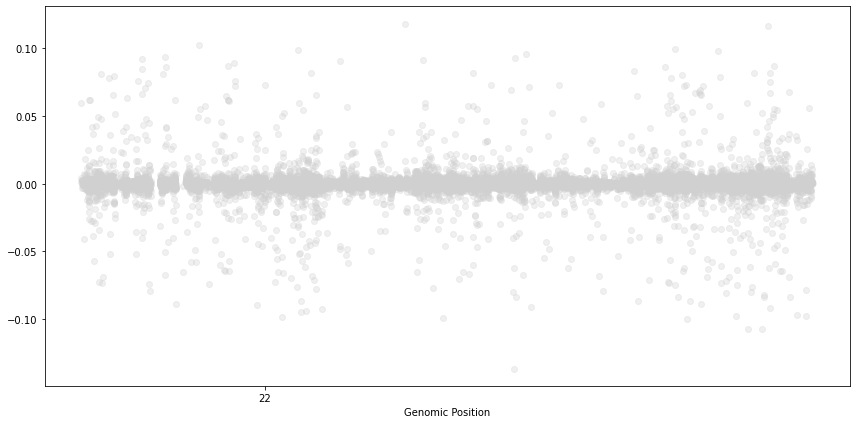

100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 1
Objective: -438.6055552916587
Sigma beta: 0.0014602036408302693
Sigma epsilon: 0.3
pi: 0.13260566157156783


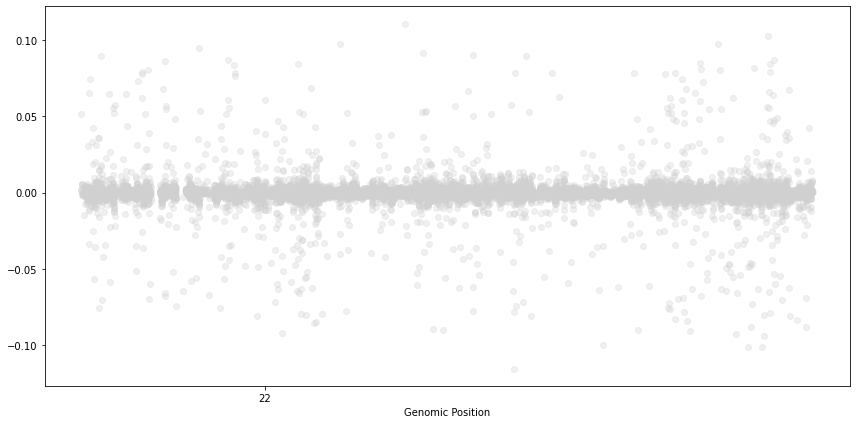

100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 2
Objective: -316.65019395634226
Sigma beta: 0.001387720945327742
Sigma epsilon: 0.3
pi: 0.12089739002606543


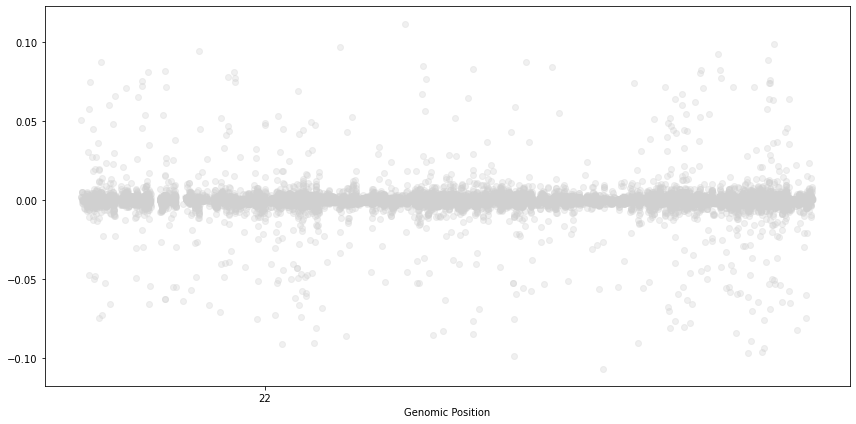

100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 3
Objective: -258.9131976970493
Sigma beta: 0.0013562470455704642
Sigma epsilon: 0.3
pi: 0.11149196873070746


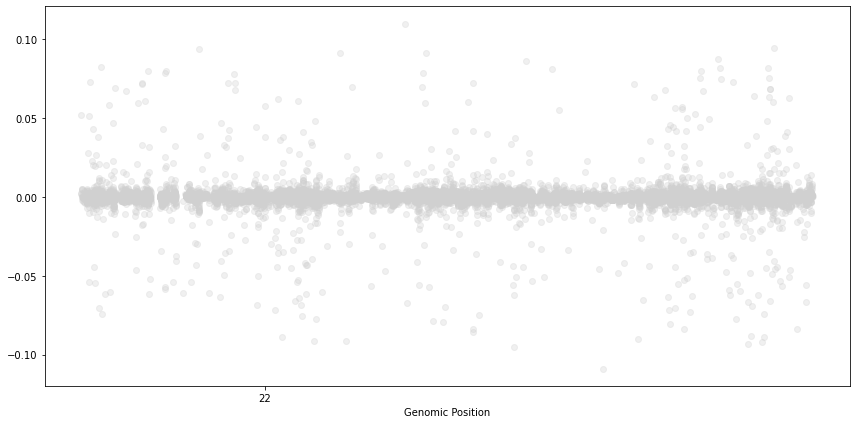

100%|██████████| 1/1 [00:00<00:00, 14.11it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 4
Objective: -229.61376172699966
Sigma beta: 0.001353820532376727
Sigma epsilon: 0.3
pi: 0.1040932229342269


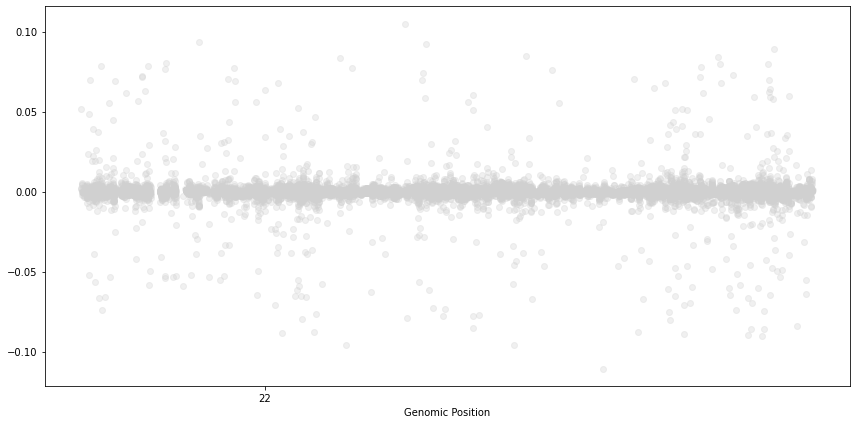

100%|██████████| 1/1 [00:00<00:00, 14.84it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 5
Objective: -213.55056722607696
Sigma beta: 0.0013711876516659853
Sigma epsilon: 0.3
pi: 0.09816467000439684


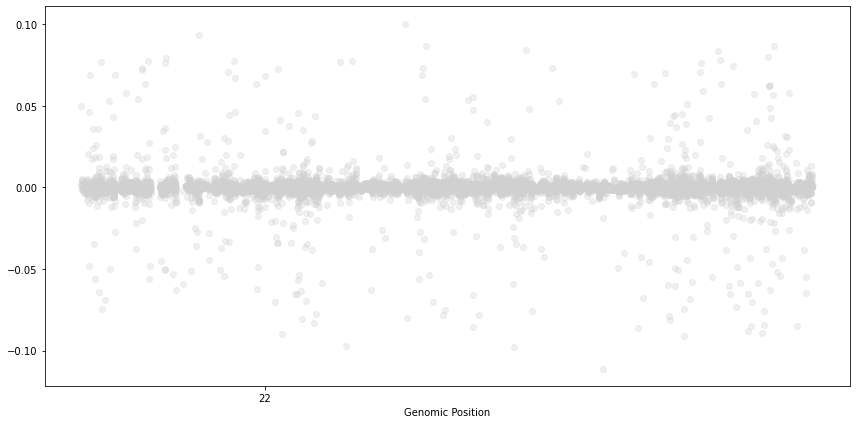

100%|██████████| 1/1 [00:00<00:00, 14.53it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 6
Objective: -203.7424211519501
Sigma beta: 0.001405201545378055
Sigma epsilon: 0.3
pi: 0.09329417636200493


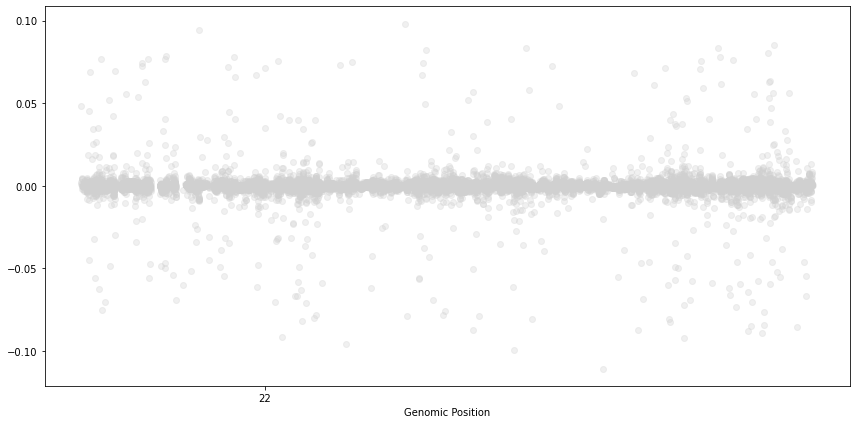

100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 7
Objective: -196.11511188177974
Sigma beta: 0.0014557114735423706
Sigma epsilon: 0.3
pi: 0.08912757783902026


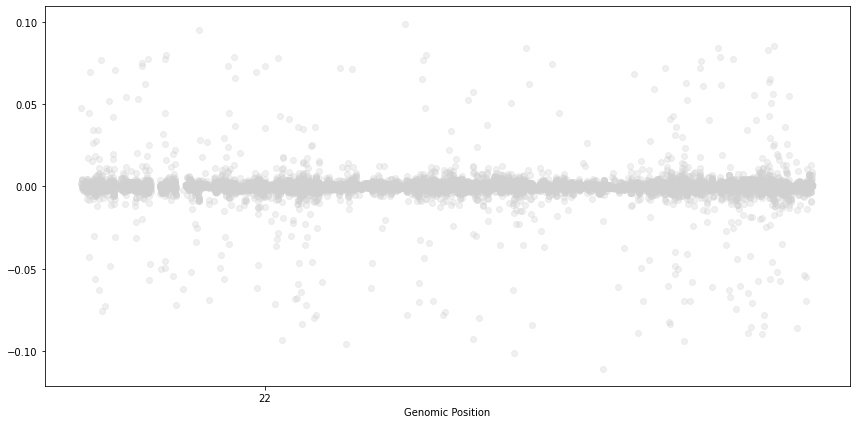

100%|██████████| 1/1 [00:00<00:00, 13.46it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 8
Objective: -190.0145984632327
Sigma beta: 0.0015218296121019296
Sigma epsilon: 0.3
pi: 0.08539616063715383


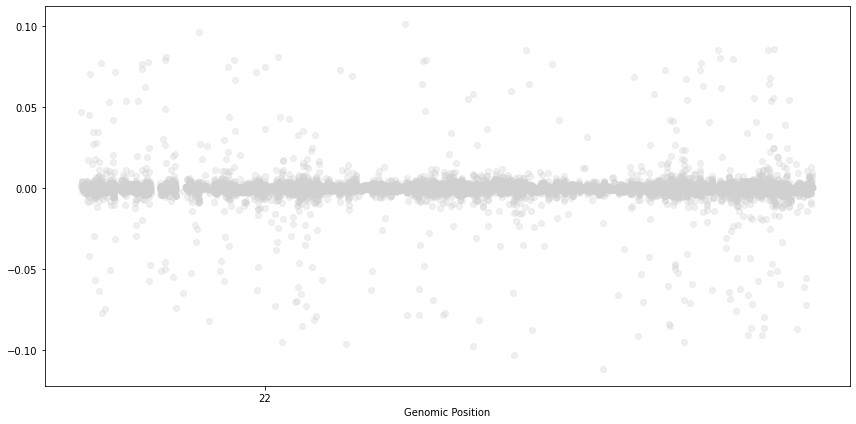

100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 9
Objective: -185.05317295602072
Sigma beta: 0.0016016195681978697
Sigma epsilon: 0.3
pi: 0.08195875616683326


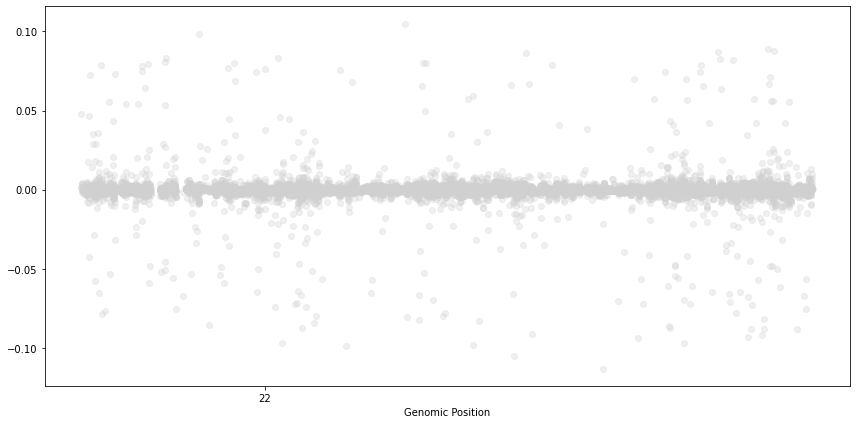

100%|██████████| 1/1 [00:00<00:00, 12.14it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 10
Objective: -180.17329130731378
Sigma beta: 0.0016949070069805488
Sigma epsilon: 0.3
pi: 0.07871326654536907


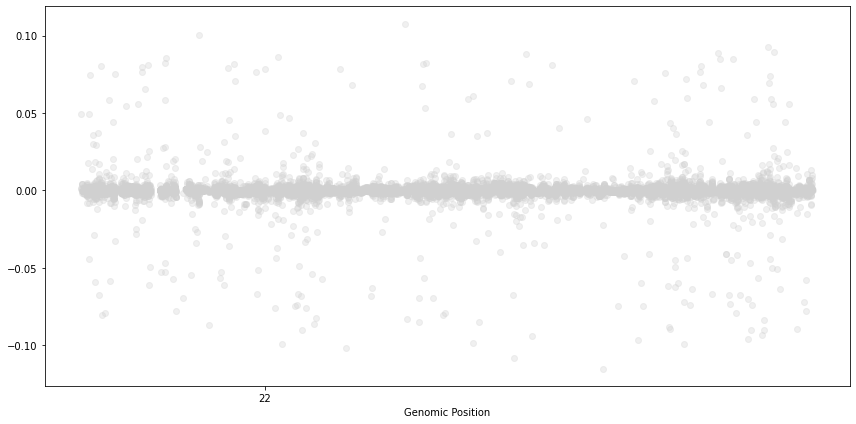

100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 11
Objective: -174.98486203740686
Sigma beta: 0.0018025657207412827
Sigma epsilon: 0.3
pi: 0.07558573823461193


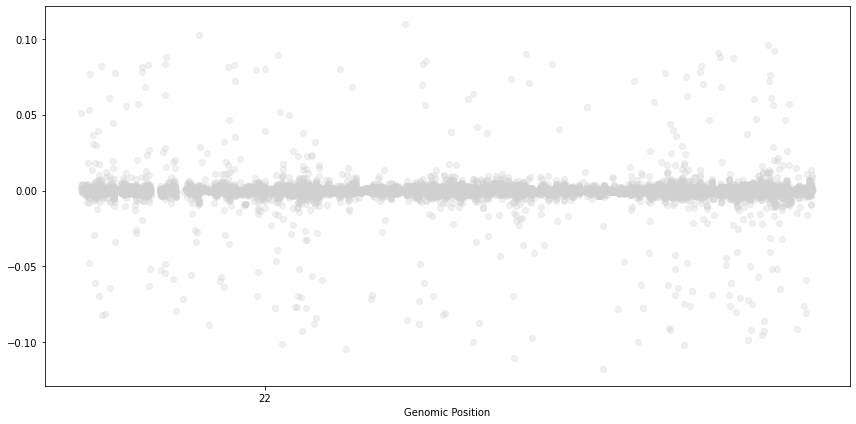

100%|██████████| 1/1 [00:00<00:00, 14.84it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 12
Objective: -169.36861303716796
Sigma beta: 0.0019258926989417853
Sigma epsilon: 0.3
pi: 0.07252957056881251


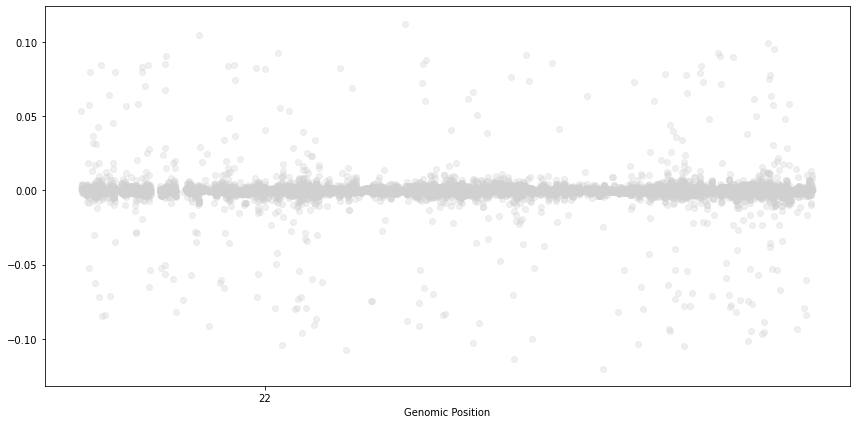

100%|██████████| 1/1 [00:00<00:00, 14.77it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 13
Objective: -163.40715410678968
Sigma beta: 0.0020658798015373322
Sigma epsilon: 0.3
pi: 0.06952308303093693


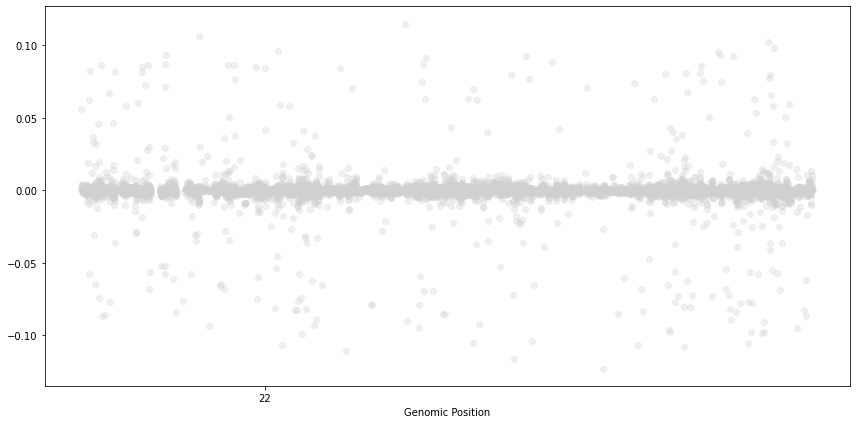

100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 14
Objective: -157.20745093978258
Sigma beta: 0.0022230029141779317
Sigma epsilon: 0.3
pi: 0.06657235734521279


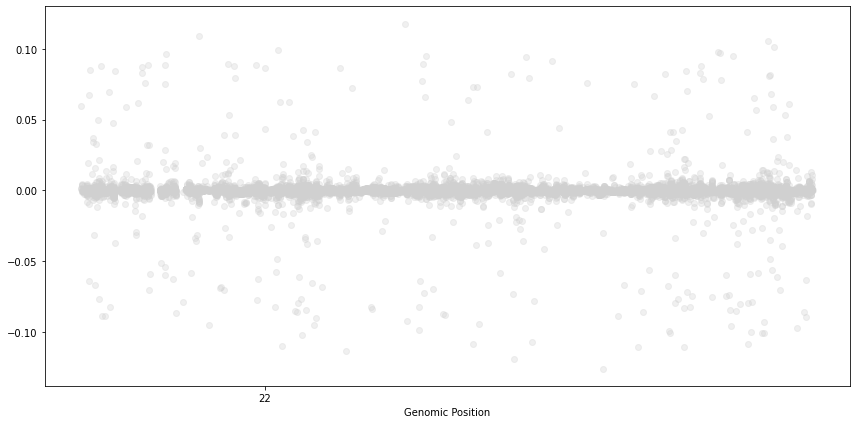

100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 15
Objective: -150.76368107764574
Sigma beta: 0.0023978884959402276
Sigma epsilon: 0.3
pi: 0.06369927574259876


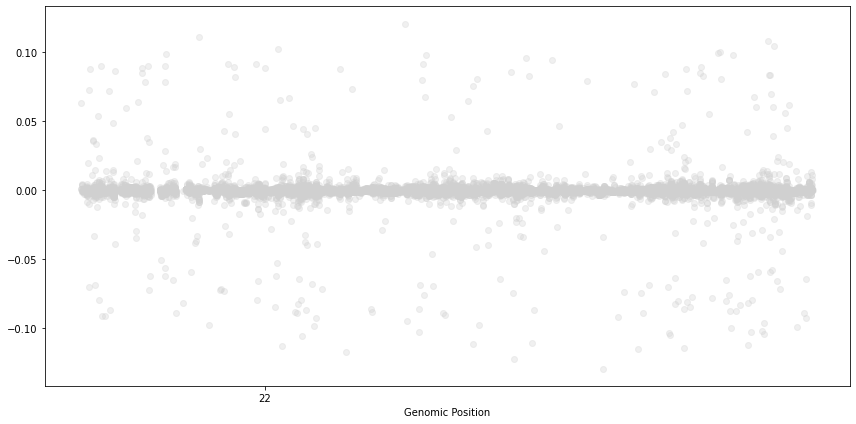

100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 16
Objective: -143.98358363694933
Sigma beta: 0.0025916203078353607
Sigma epsilon: 0.3
pi: 0.060926607982461696


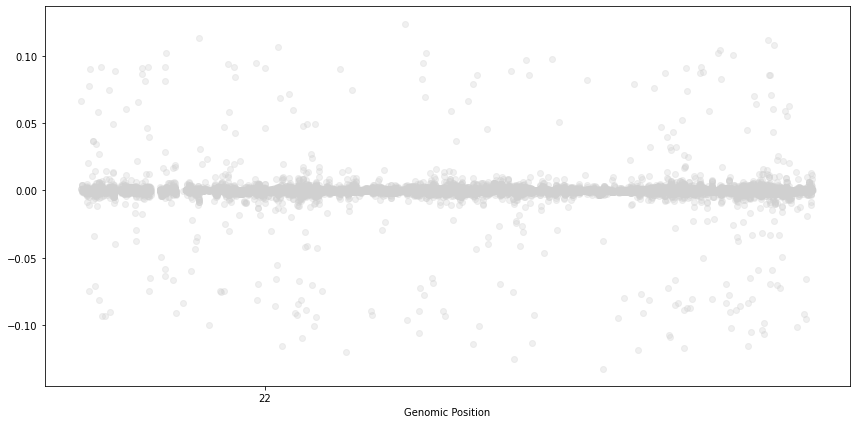

100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 17
Objective: -136.85676672666523
Sigma beta: 0.0028049132251830775
Sigma epsilon: 0.3
pi: 0.05826736051552574


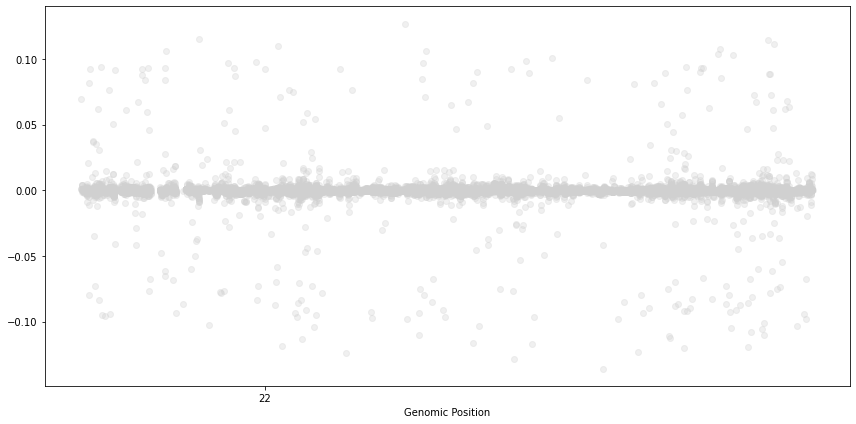

100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 18
Objective: -129.87592582025536
Sigma beta: 0.003035515093634242
Sigma epsilon: 0.3
pi: 0.055735354809184304


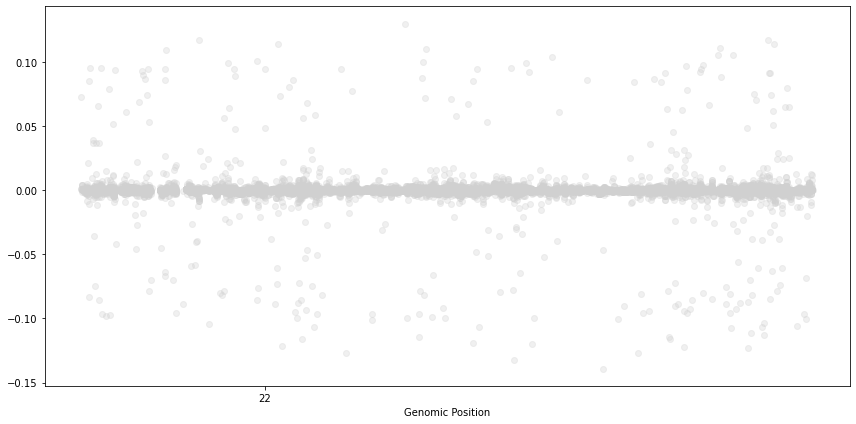

100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 19
Objective: -123.59635412105854
Sigma beta: 0.0032771897424111835
Sigma epsilon: 0.3
pi: 0.05336110535768734


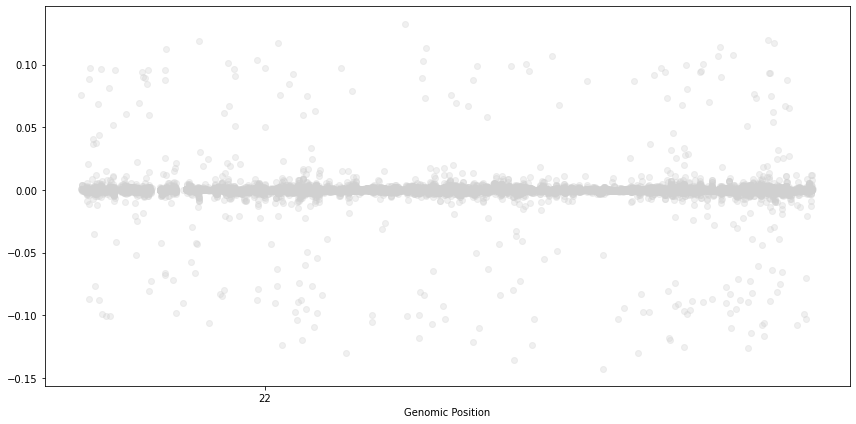

100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 20
Objective: -117.97495094684928
Sigma beta: 0.0035239979452731038
Sigma epsilon: 0.3
pi: 0.05118247536741703


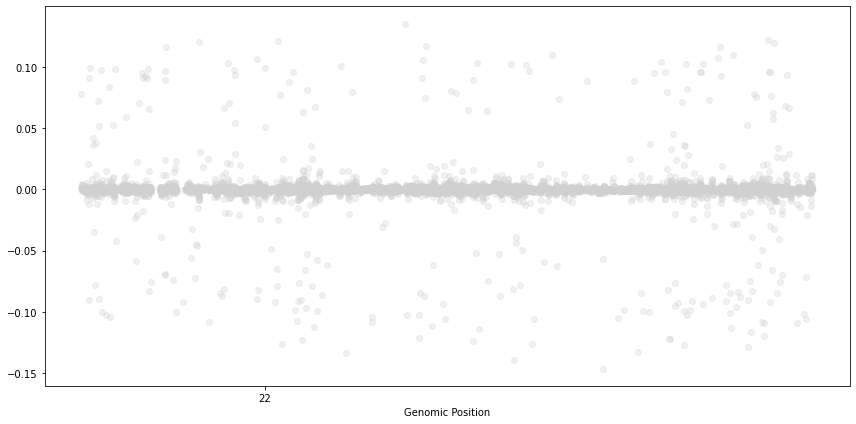

100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 21
Objective: -112.82909468055368
Sigma beta: 0.0037721670923344846
Sigma epsilon: 0.3
pi: 0.04922403618188253


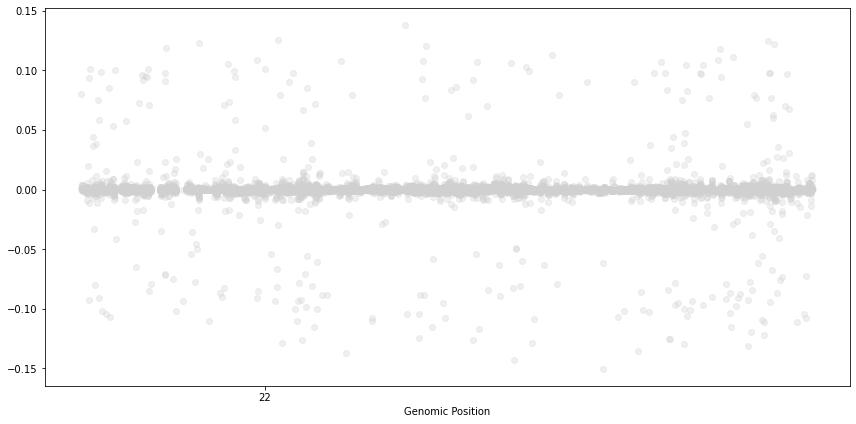

100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 22
Objective: -108.54701341656983
Sigma beta: 0.004015692675566712
Sigma epsilon: 0.3
pi: 0.04749030197286779


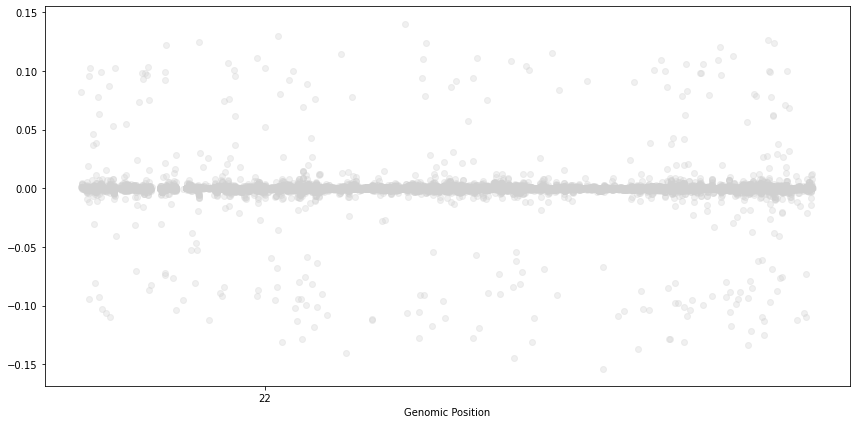

100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 23
Objective: -105.22381596184277
Sigma beta: 0.004246387305758567
Sigma epsilon: 0.3
pi: 0.04598567798939917


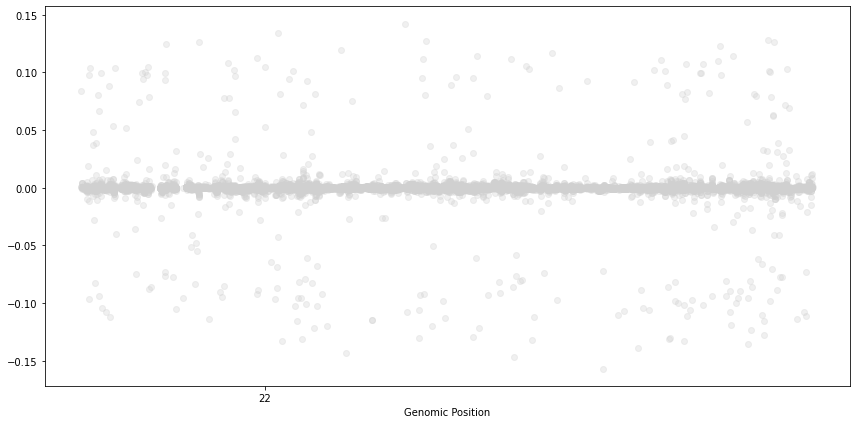

100%|██████████| 1/1 [00:00<00:00, 12.58it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 24
Objective: -102.56843948948517
Sigma beta: 0.004459395946306858
Sigma epsilon: 0.3
pi: 0.04471358501747653


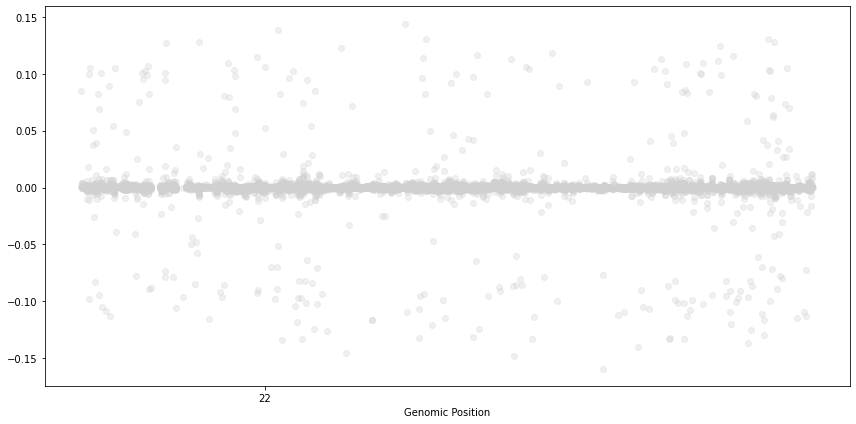

100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 25
Objective: -99.9617610317182
Sigma beta: 0.0046564378034578725
Sigma epsilon: 0.3
pi: 0.043667246950892594


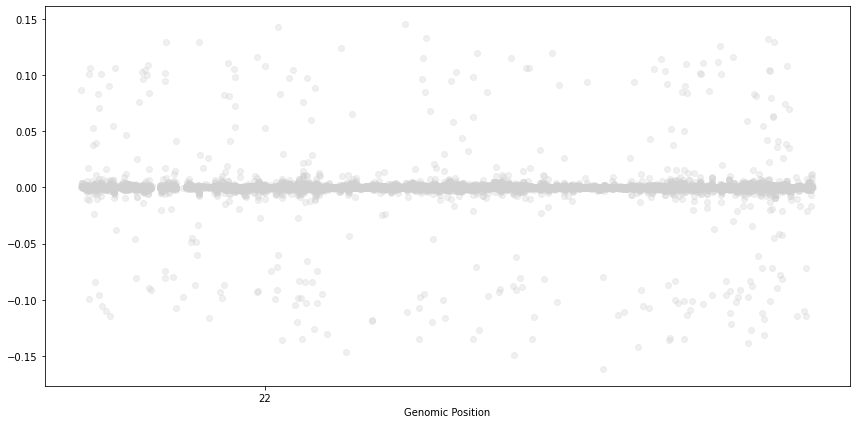

100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 26
Objective: -96.46755695214961
Sigma beta: 0.004847910728974517
Sigma epsilon: 0.3
pi: 0.04281789796300153


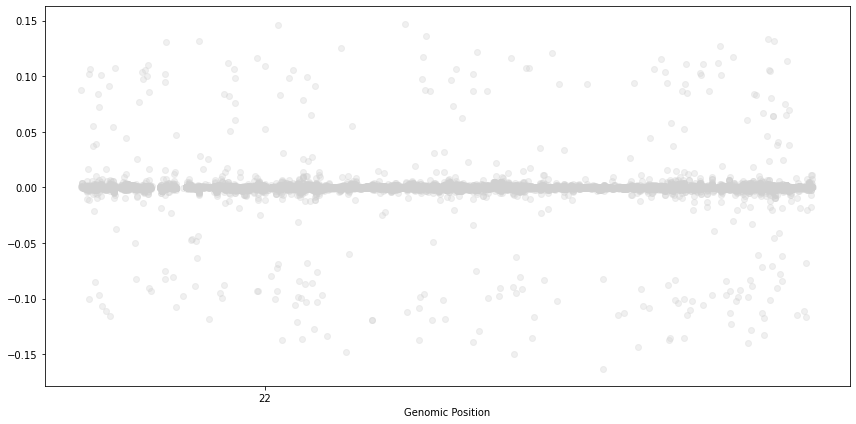

100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 27
Objective: -91.82526833335214
Sigma beta: 0.005046263754785306
Sigma epsilon: 0.3
pi: 0.04210736493031258


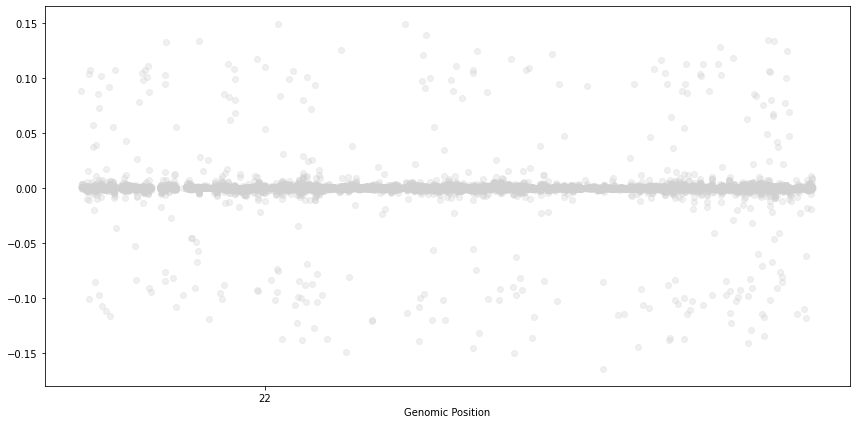

100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 28
Objective: -87.31474240408352
Sigma beta: 0.005250593249473935
Sigma epsilon: 0.3
pi: 0.04145196089534562


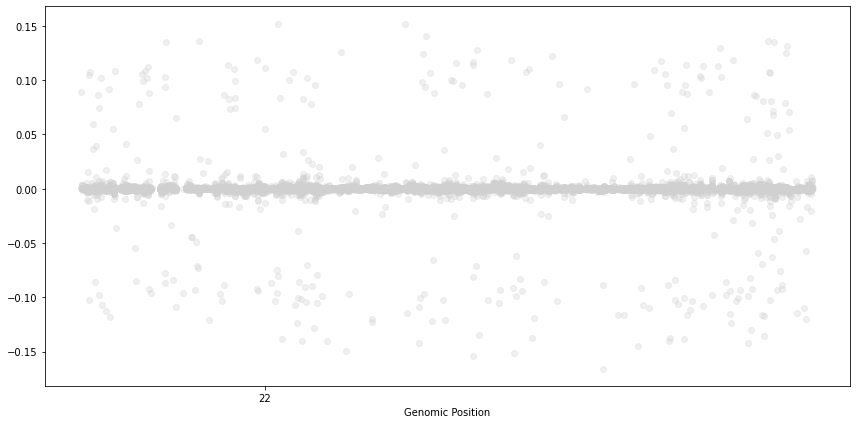

100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 29
Objective: -84.34683073544511
Sigma beta: 0.005446574530622237
Sigma epsilon: 0.3
pi: 0.040835732023197596


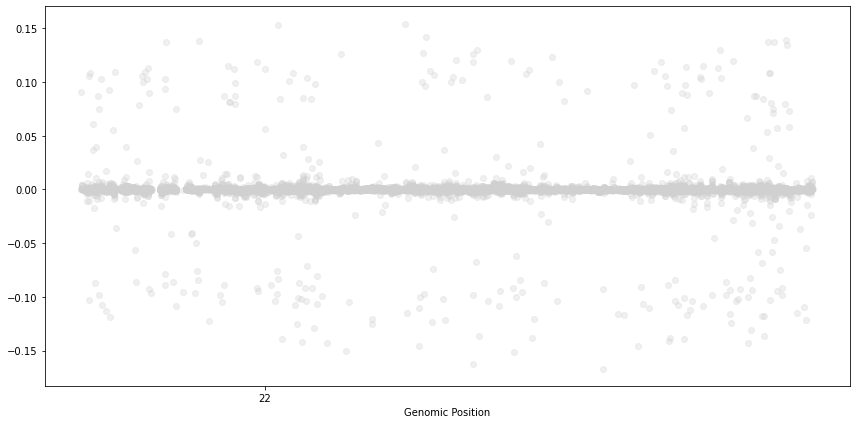

100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 30
Objective: -82.51248323996697
Sigma beta: 0.00562136744493701
Sigma epsilon: 0.3
pi: 0.040300677979372215


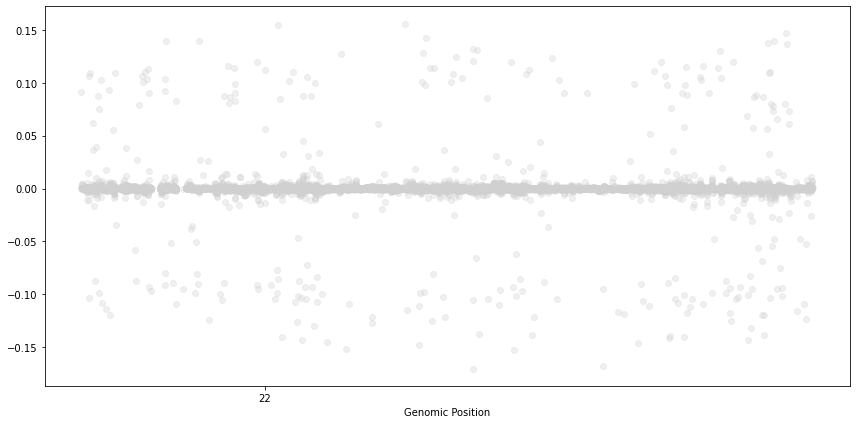

100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 31
Objective: -81.13593545022923
Sigma beta: 0.005772919228011981
Sigma epsilon: 0.3
pi: 0.03985991720308462


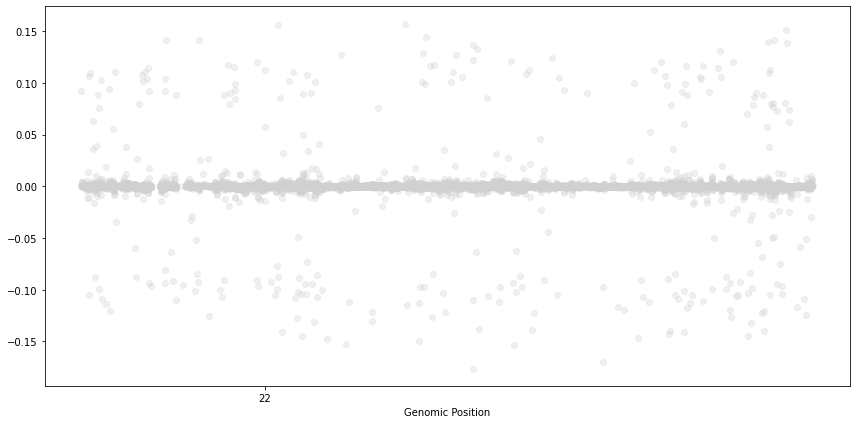

100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 32
Objective: -80.16775625373884
Sigma beta: 0.0059012197482201
Sigma epsilon: 0.3
pi: 0.0394976643012188


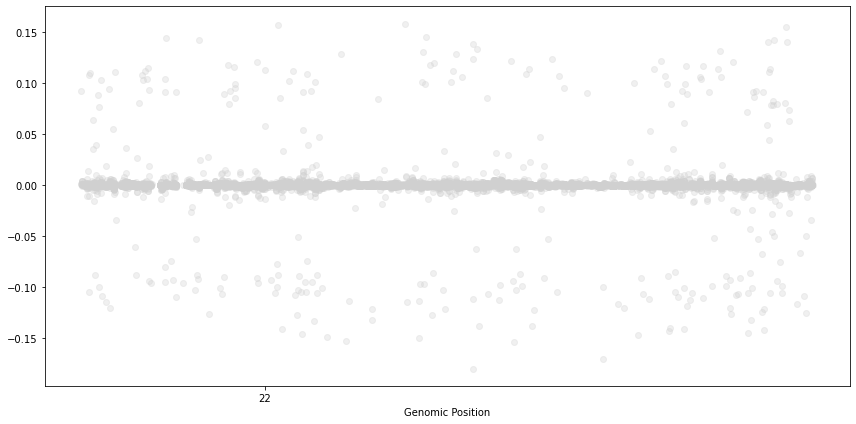

100%|██████████| 1/1 [00:00<00:00, 13.81it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 33
Objective: -79.54188643802263
Sigma beta: 0.006006204106138446
Sigma epsilon: 0.3
pi: 0.03920180216148461


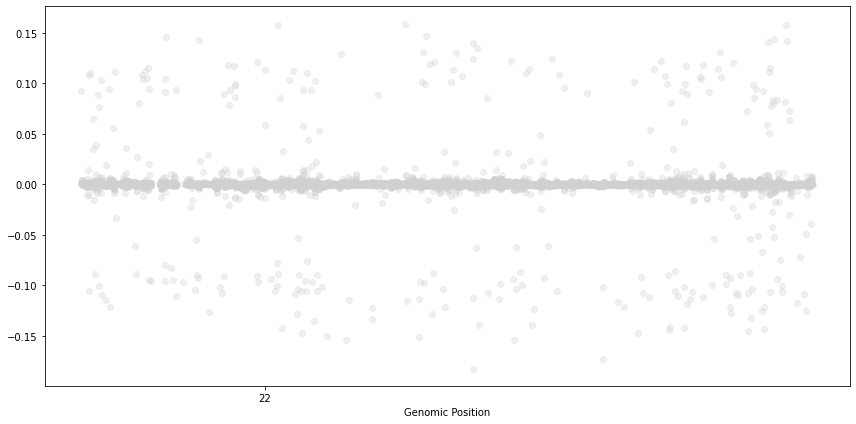

100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 34
Objective: -79.13777093709905
Sigma beta: 0.006090554204564663
Sigma epsilon: 0.3
pi: 0.03896569179445844


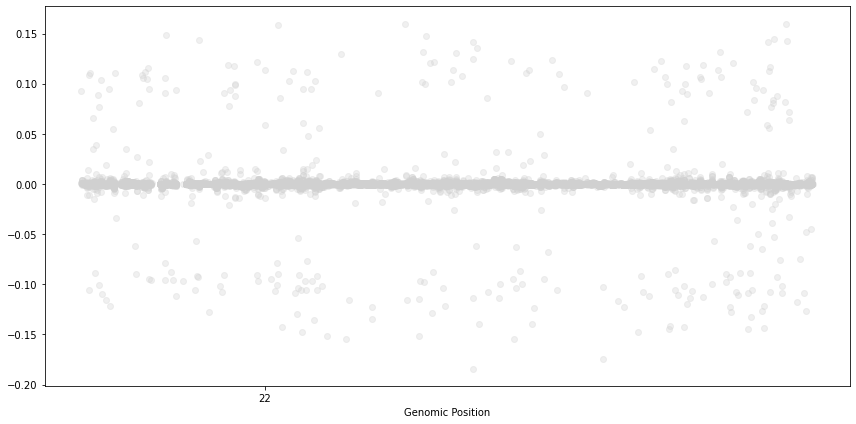

100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 35
Objective: -78.80408804848776
Sigma beta: 0.006159207312779933
Sigma epsilon: 0.3
pi: 0.038783932104367425


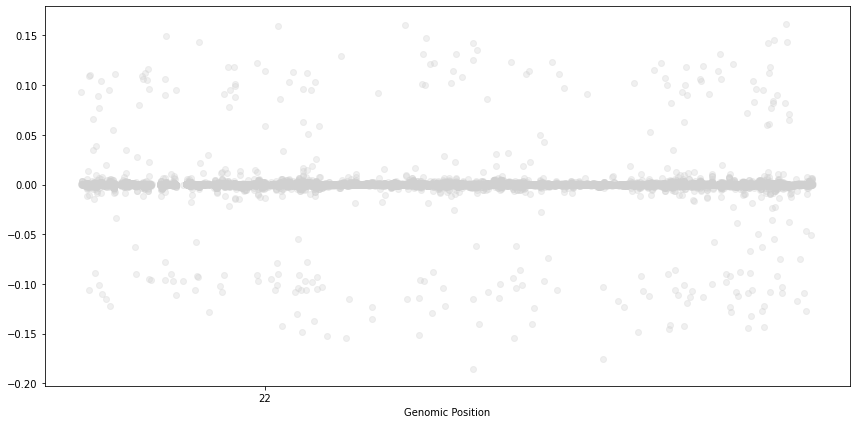

100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 36
Objective: -78.29993029463367
Sigma beta: 0.006218655139891265
Sigma epsilon: 0.3
pi: 0.03864997725347156


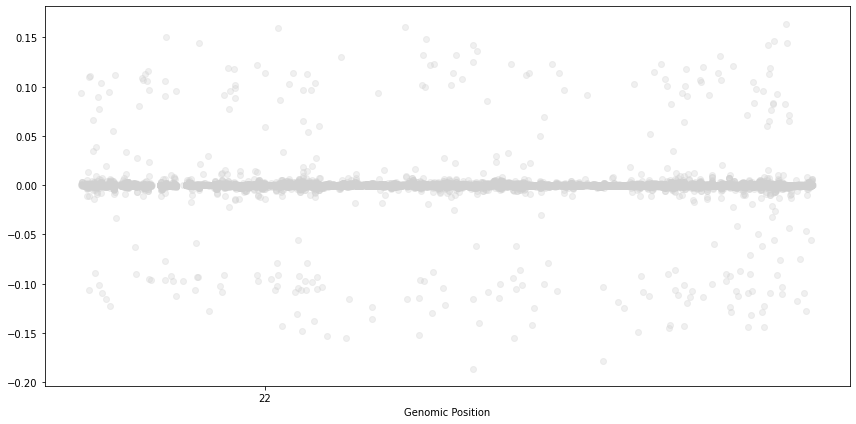

100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 37
Objective: -77.65937457989094
Sigma beta: 0.006272247674717349
Sigma epsilon: 0.3
pi: 0.038541353445489014


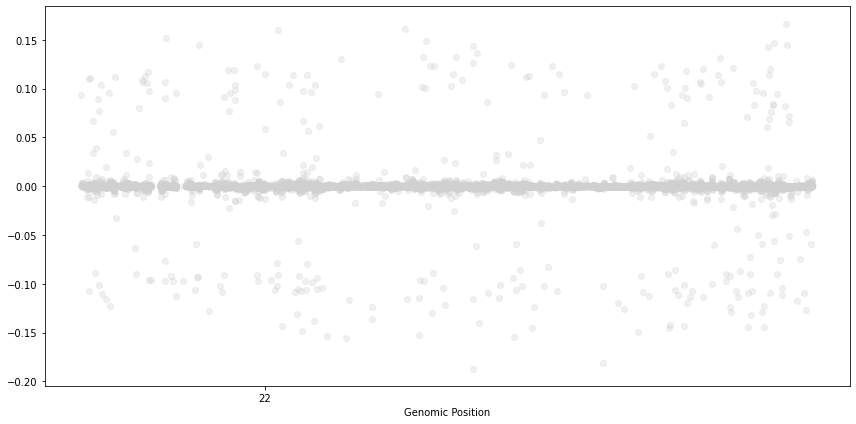

100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 38
Objective: -77.11896073715252
Sigma beta: 0.006319239012667498
Sigma epsilon: 0.3
pi: 0.03844977427603672


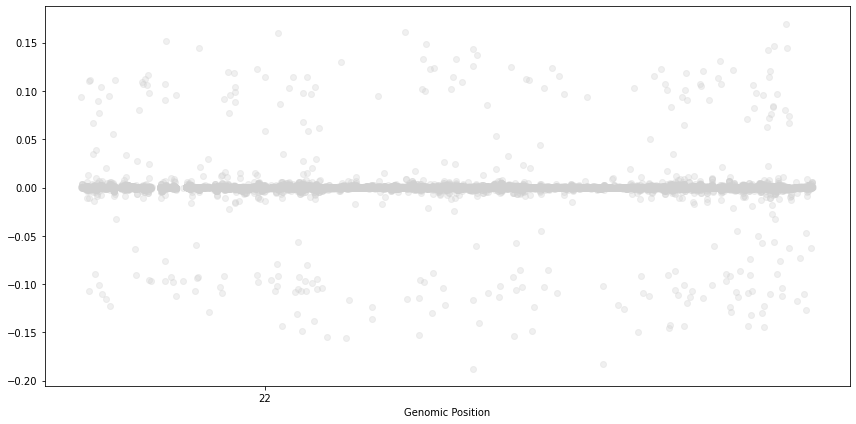

100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 39
Objective: -75.97573642688803
Sigma beta: 0.006365737575171199
Sigma epsilon: 0.3
pi: 0.03837386937610739


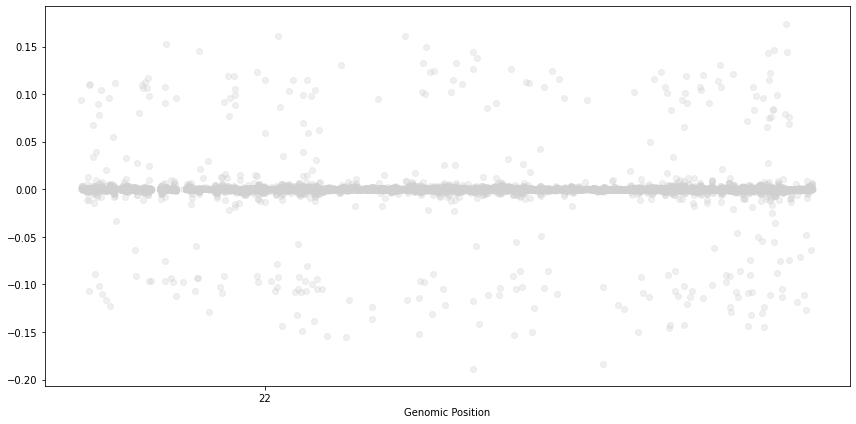

100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 40
Objective: -74.45799223026006
Sigma beta: 0.006420460357076616
Sigma epsilon: 0.3
pi: 0.03829162761498101


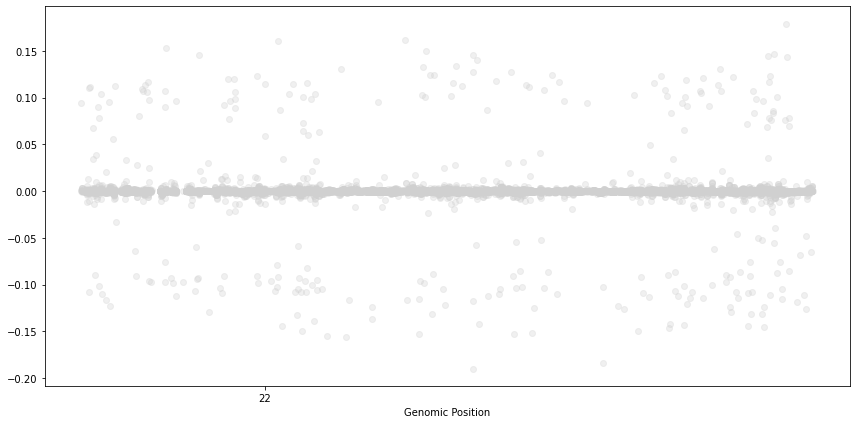

100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 41
Objective: -73.62264591417443
Sigma beta: 0.006475089159987141
Sigma epsilon: 0.3
pi: 0.03820411398753253


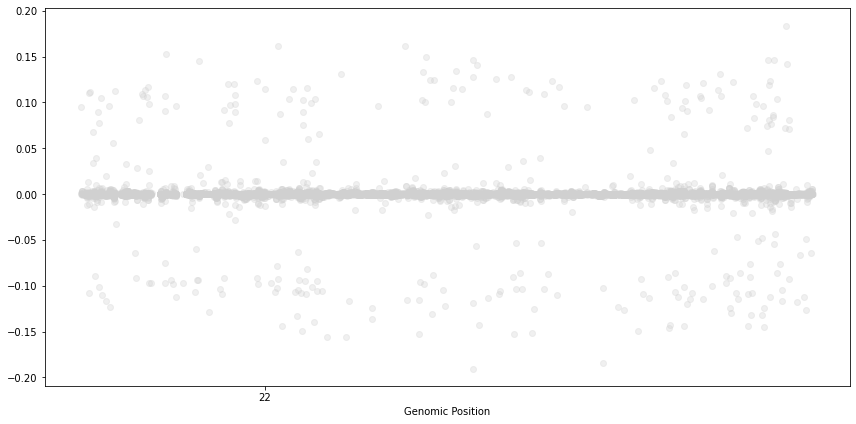

100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 42
Objective: -73.10080196459785
Sigma beta: 0.006525945456114162
Sigma epsilon: 0.3
pi: 0.038124077432692575


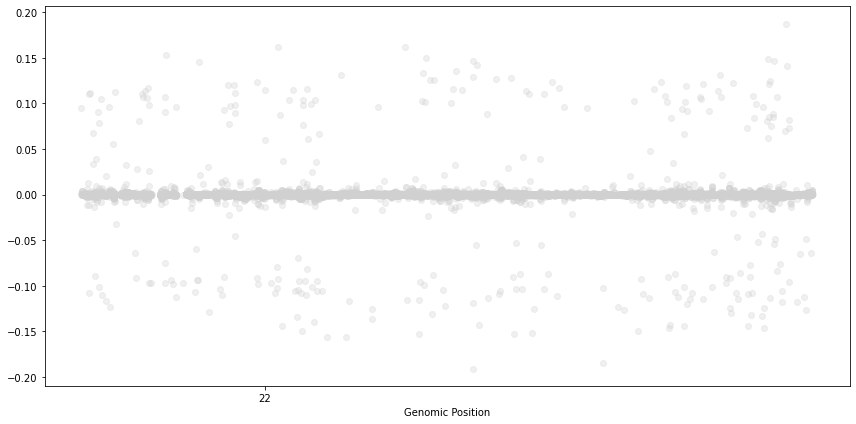

100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 43
Objective: -72.26219333517292
Sigma beta: 0.006577100165691736
Sigma epsilon: 0.3
pi: 0.03806411238811785


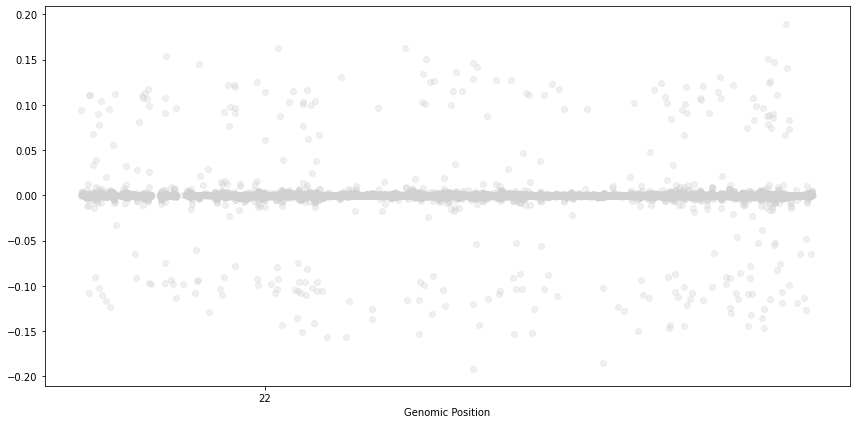

100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 44
Objective: -71.05962868002462
Sigma beta: 0.0066325698182324285
Sigma epsilon: 0.3
pi: 0.03800194598107044


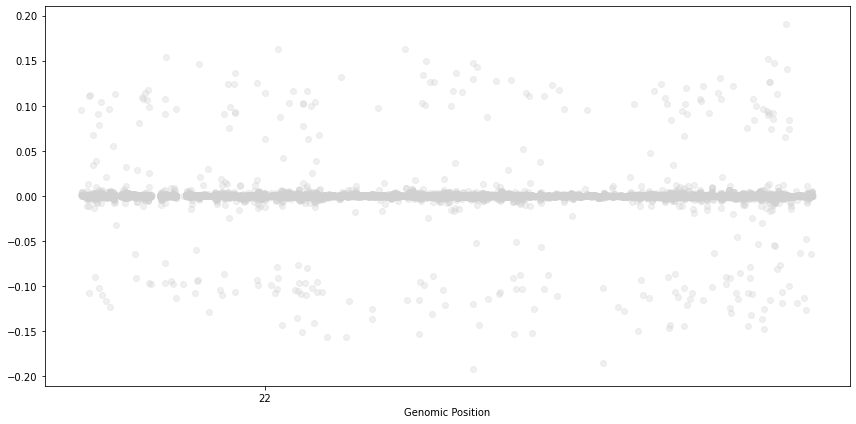

100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 45
Objective: -70.32128720277979
Sigma beta: 0.00668654291356958
Sigma epsilon: 0.3
pi: 0.037927500298843855


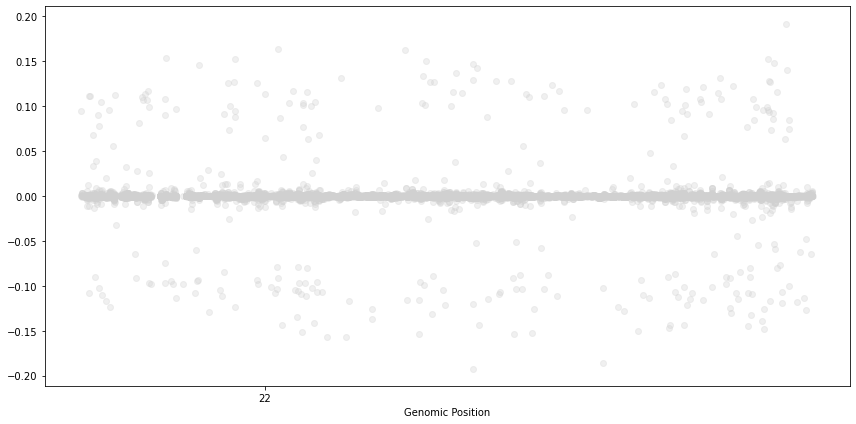

100%|██████████| 1/1 [00:00<00:00, 14.25it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 46
Objective: -69.92409196240988
Sigma beta: 0.006734398447728499
Sigma epsilon: 0.3
pi: 0.03784880200914944


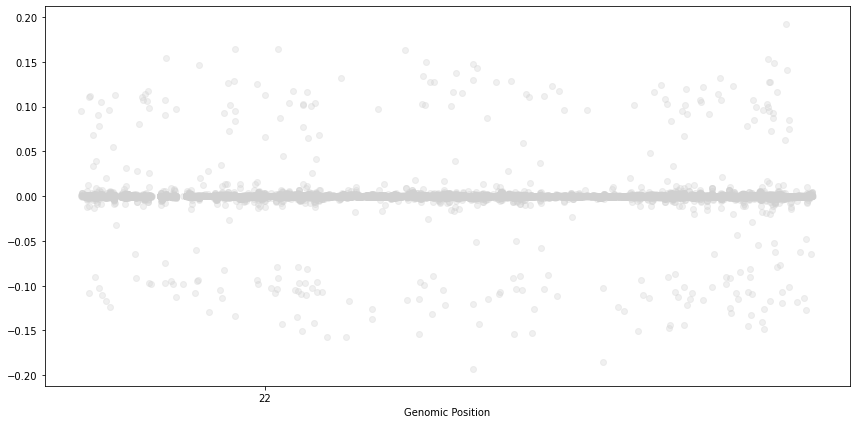

100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 47
Objective: -69.62560550956005
Sigma beta: 0.0067762308475756315
Sigma epsilon: 0.3
pi: 0.03777669003502


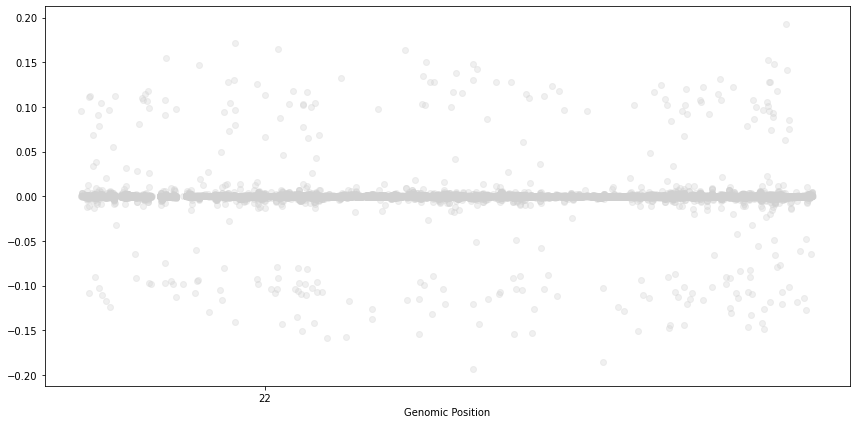

100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 48
Objective: -69.2860080562823
Sigma beta: 0.006814244672666595
Sigma epsilon: 0.3
pi: 0.037718805038651014


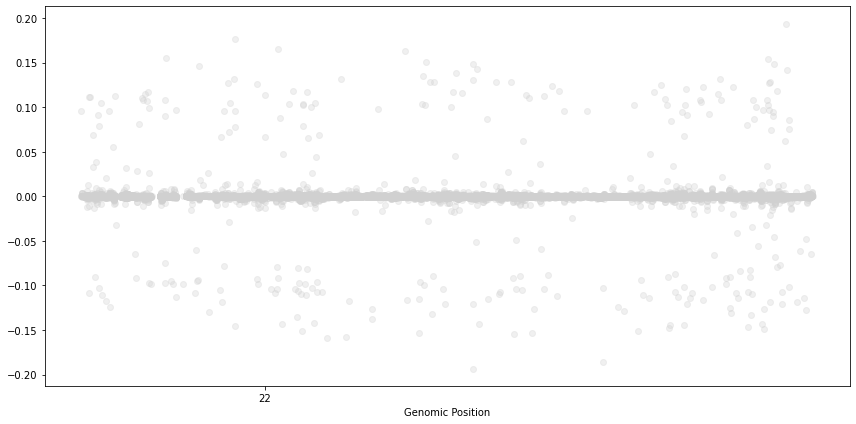

100%|██████████| 1/1 [00:00<00:00, 14.57it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 49
Objective: -68.56175381699359
Sigma beta: 0.006853223847301185
Sigma epsilon: 0.3
pi: 0.0376862046007551


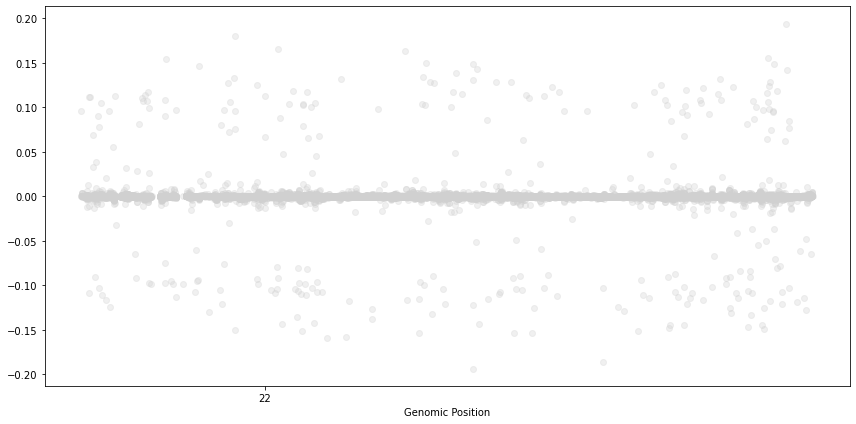

In [48]:
m_gs.fit(max_iter=1)

for i in range(50):
    m_gs.fit(max_iter=1, continued=True)
    print("Iteration:", i)
    print("Objective:", m_gs.objective())
    print("Sigma beta:", m_gs.sigma_beta)
    print("Sigma epsilon:", m_gs.sigma_epsilon)
    print("pi:", m_gs.pi)
    plot_manhattan(gs_w, m_gs.inf_beta)

100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 0
Objective: -59.56558579982084
Sigma beta: 0.007418823204479117
Sigma epsilon: 0.3
pi: 0.037055568963028696


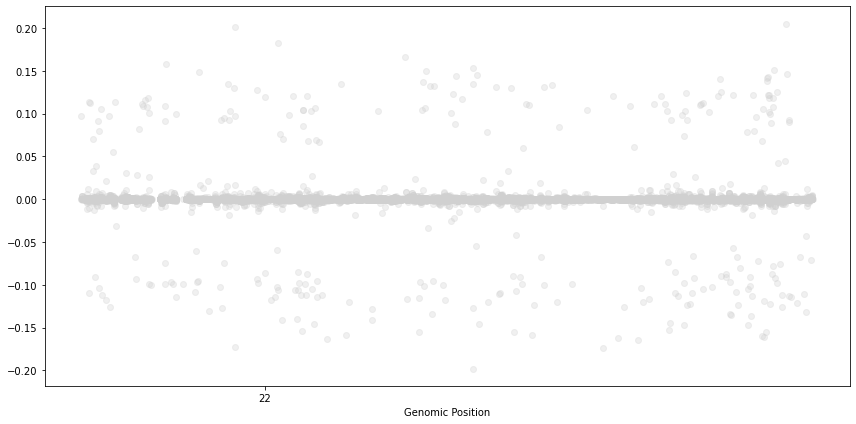

100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 1
Objective: -59.5655857976908
Sigma beta: 0.00741882357358613
Sigma epsilon: 0.3
pi: 0.03705556363263475


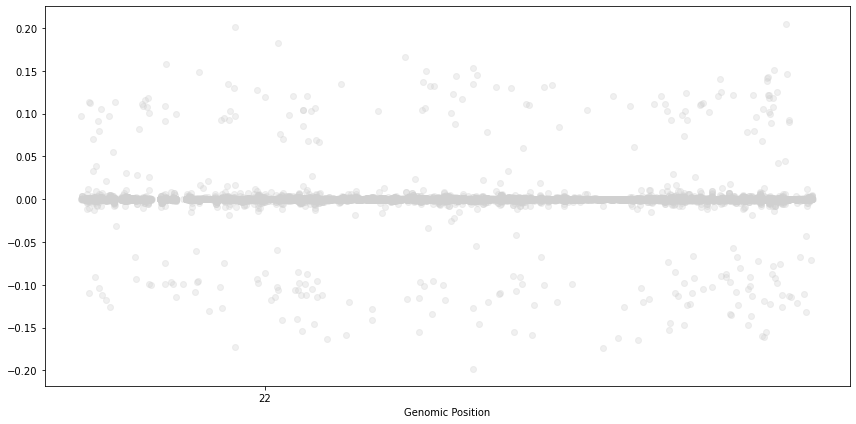

100%|██████████| 1/1 [00:00<00:00, 14.88it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 2
Objective: -59.56558579581906
Sigma beta: 0.007418823912472099
Sigma epsilon: 0.3
pi: 0.03705555864015109


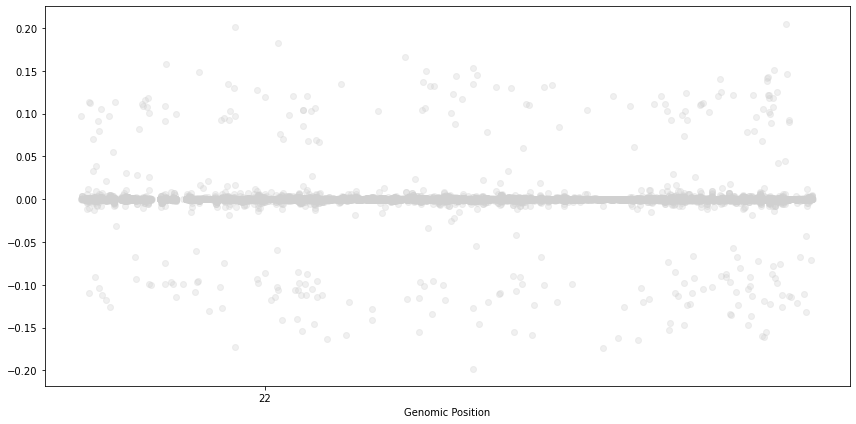

100%|██████████| 1/1 [00:00<00:00, 14.40it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 3
Objective: -59.56558579418197
Sigma beta: 0.0074188242237067815
Sigma epsilon: 0.3
pi: 0.037055553964059615


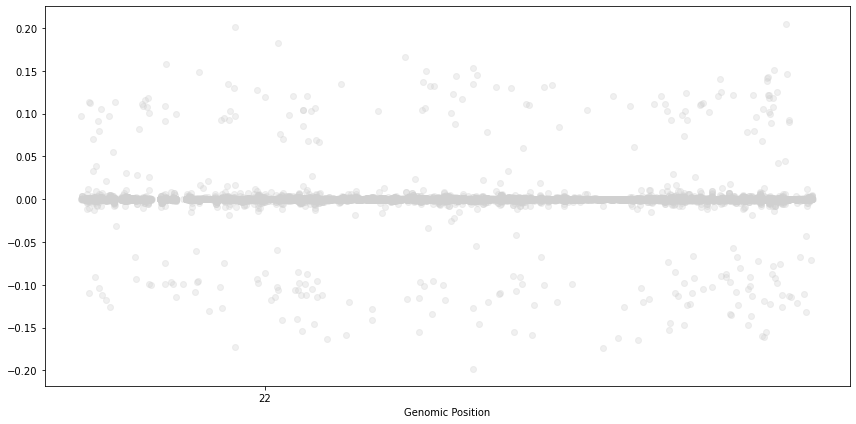

100%|██████████| 1/1 [00:00<00:00, 14.46it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 4
Objective: -59.56558579273042
Sigma beta: 0.007418824509632523
Sigma epsilon: 0.3
pi: 0.037055549584219916


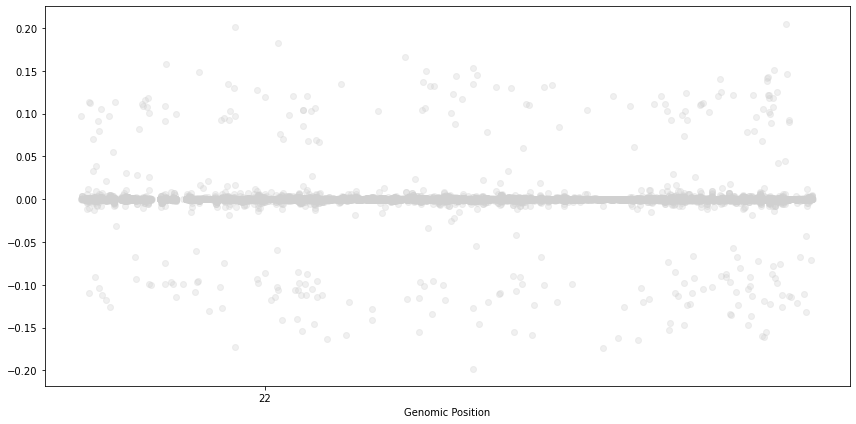

100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 5
Objective: -59.56558579146076
Sigma beta: 0.007418824772385393
Sigma epsilon: 0.3
pi: 0.037055545481780236


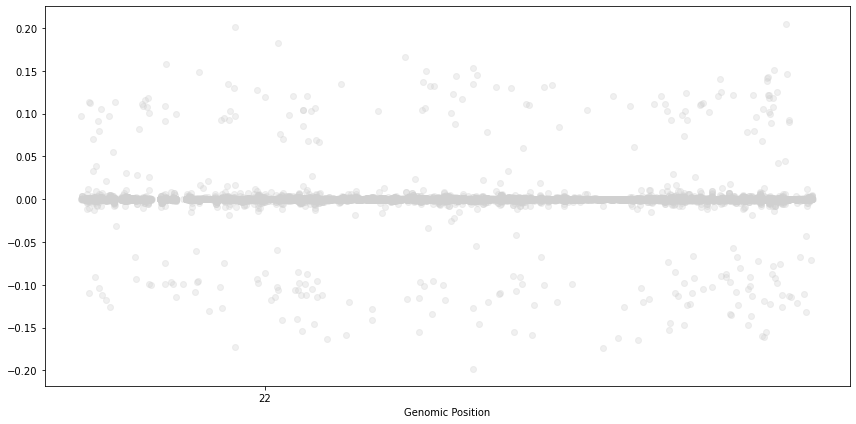

100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 6
Objective: -59.56558579034572
Sigma beta: 0.007418825013914163
Sigma epsilon: 0.3
pi: 0.037055541639094365


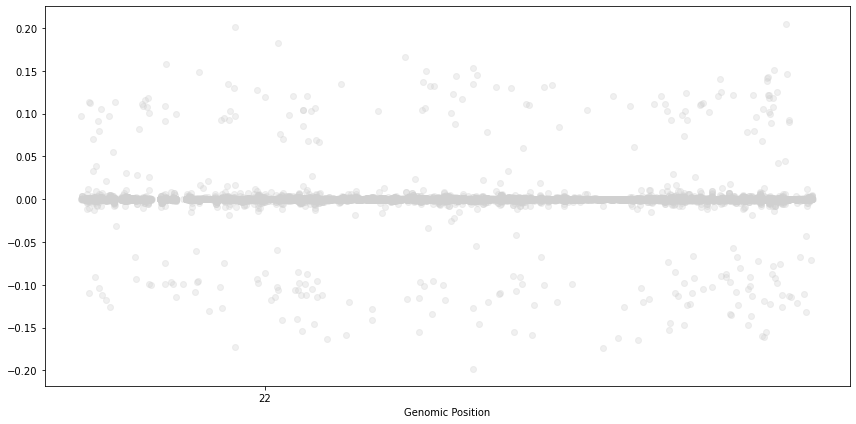

100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 7
Objective: -59.56558578936347
Sigma beta: 0.007418825235997497
Sigma epsilon: 0.3
pi: 0.03705553803964406


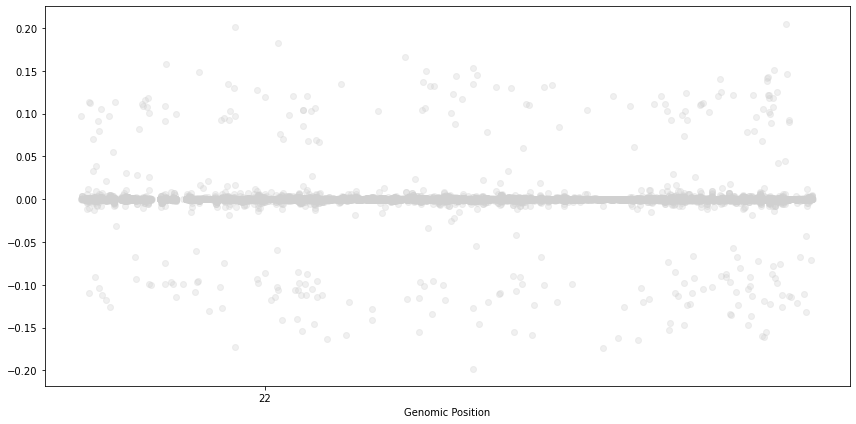

100%|██████████| 1/1 [00:00<00:00, 14.25it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 8
Objective: -59.56558578849945
Sigma beta: 0.007418825440259408
Sigma epsilon: 0.3
pi: 0.03705553466796642


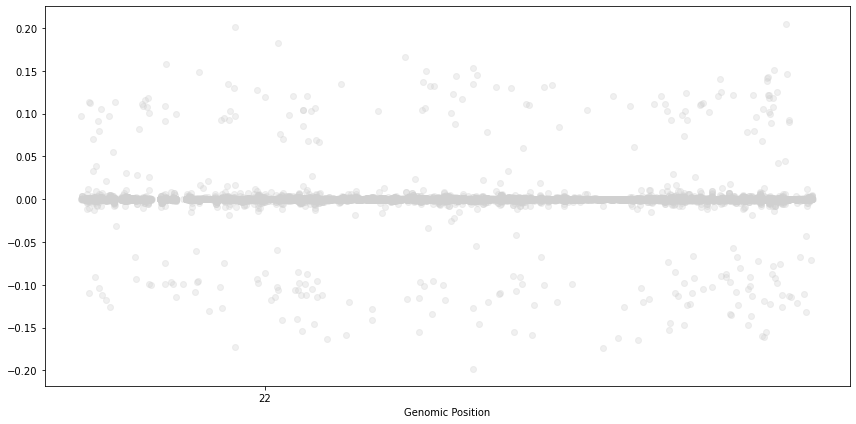

100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 9
Objective: -59.56558578773911
Sigma beta: 0.00741882562818328
Sigma epsilon: 0.3
pi: 0.03705553150958619


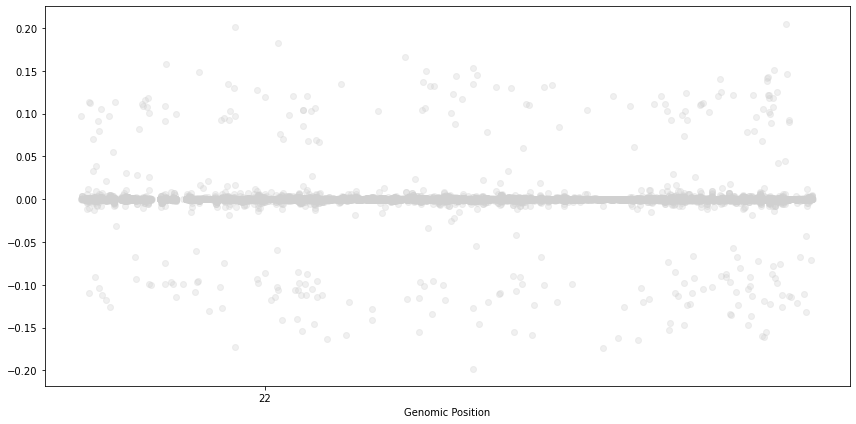

100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 10
Objective: -59.565585787066084
Sigma beta: 0.00741882580112451
Sigma epsilon: 0.3
pi: 0.037055528550952226


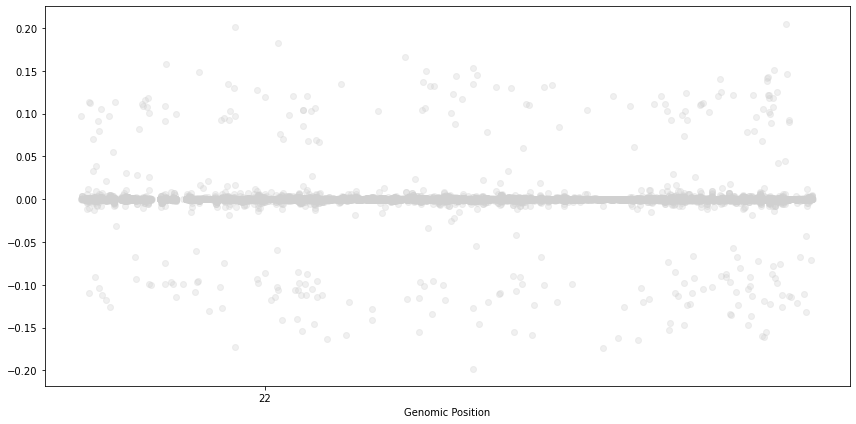

100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 11
Objective: -59.56558578648037
Sigma beta: 0.007418825960322003
Sigma epsilon: 0.3
pi: 0.0370555257793783


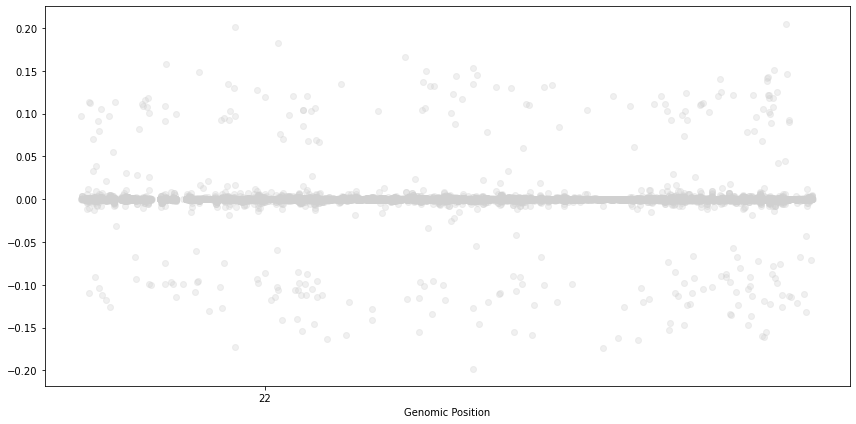

100%|██████████| 1/1 [00:00<00:00, 14.53it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 12
Objective: -59.565585785963776
Sigma beta: 0.007418826106908549
Sigma epsilon: 0.3
pi: 0.03705552318298759


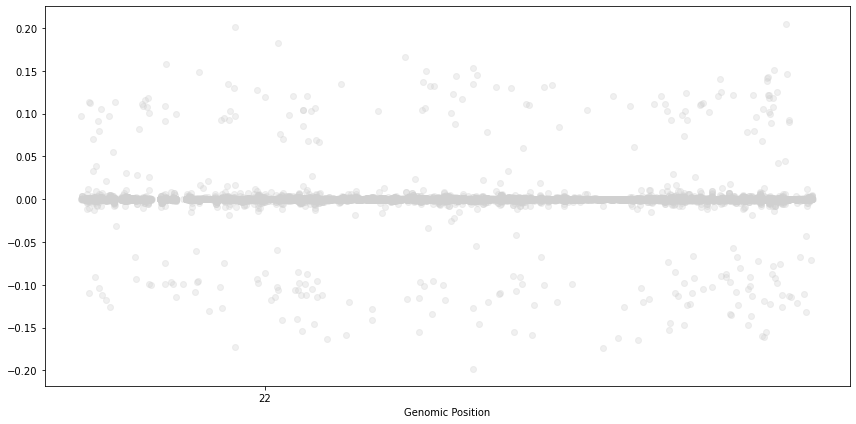

100%|██████████| 1/1 [00:00<00:00, 14.46it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 13
Objective: -59.56558578550903
Sigma beta: 0.007418826241920241
Sigma epsilon: 0.3
pi: 0.037055520750660806


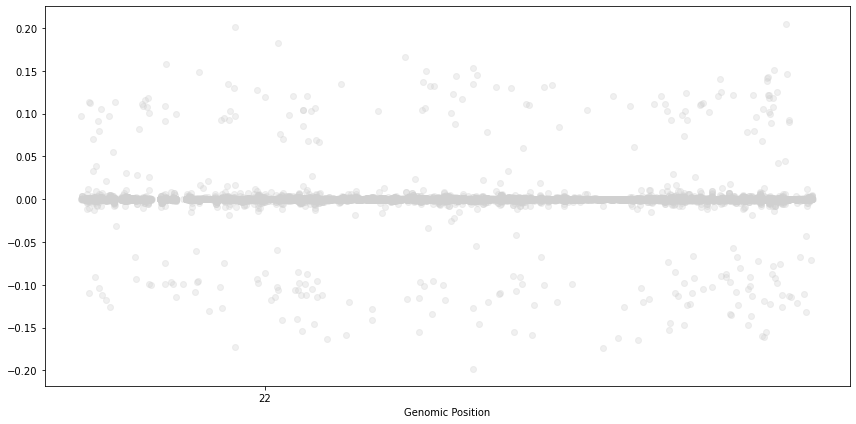

100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 14
Objective: -59.56558578511249
Sigma beta: 0.007418826366305042
Sigma epsilon: 0.3
pi: 0.037055518471987695


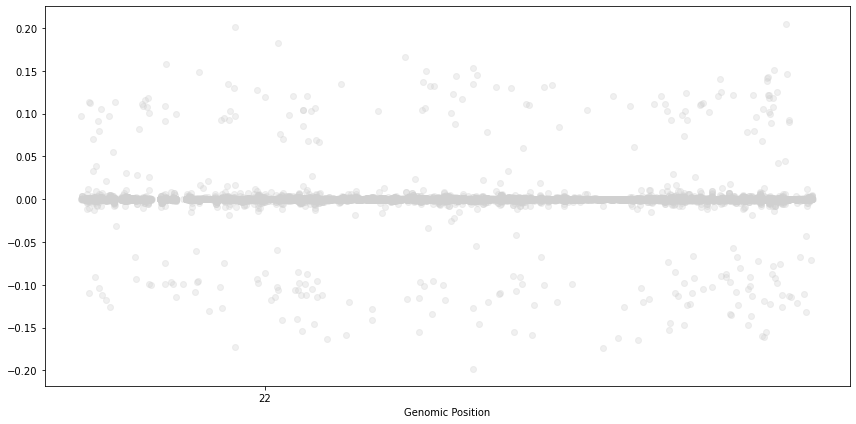

100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 15
Objective: -59.565585784761424
Sigma beta: 0.00741882648093053
Sigma epsilon: 0.3
pi: 0.037055516337221574


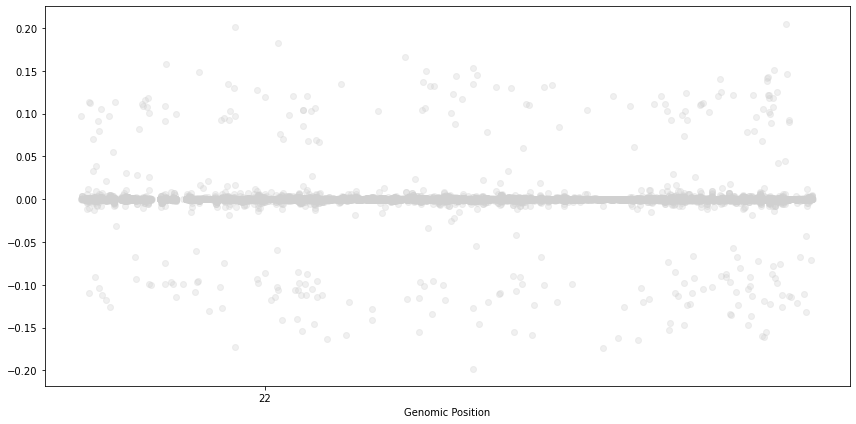

100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 16
Objective: -59.565585784454015
Sigma beta: 0.007418826586590963
Sigma epsilon: 0.3
pi: 0.03705551433723685


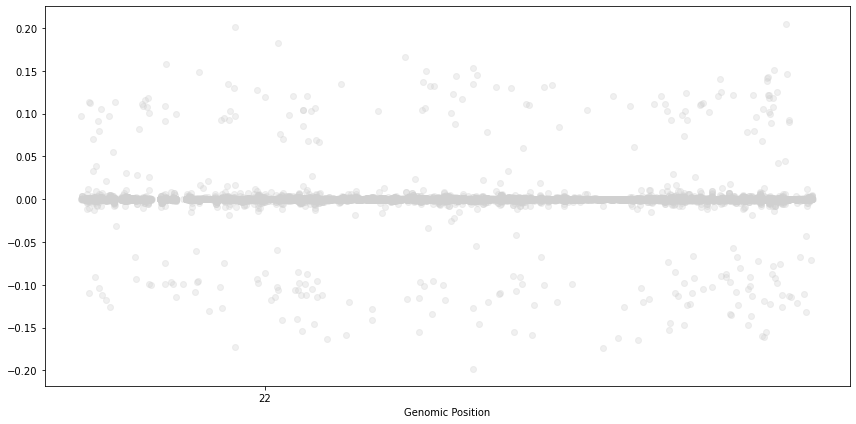

100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 17
Objective: -59.56558578417025
Sigma beta: 0.007418826684013691
Sigma epsilon: 0.3
pi: 0.037055512463489294


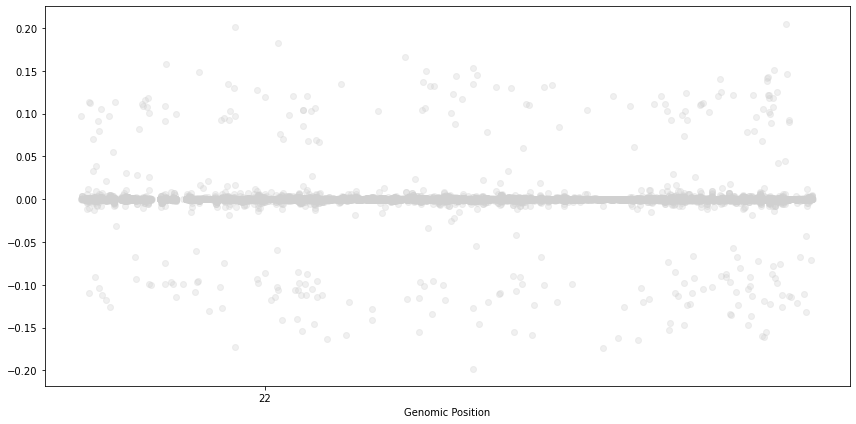

100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 18
Objective: -59.56558578393742
Sigma beta: 0.007418826773864972
Sigma epsilon: 0.3
pi: 0.03705551070797882


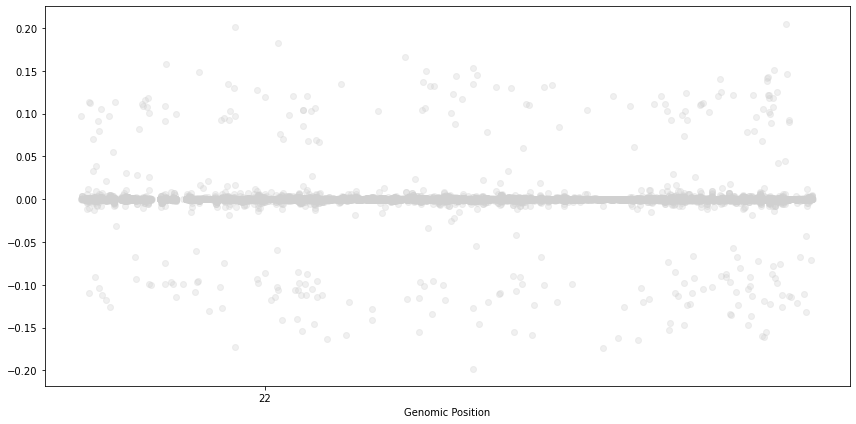

100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 19
Objective: -59.5655857837246
Sigma beta: 0.0074188268567552855
Sigma epsilon: 0.3
pi: 0.037055509063214656


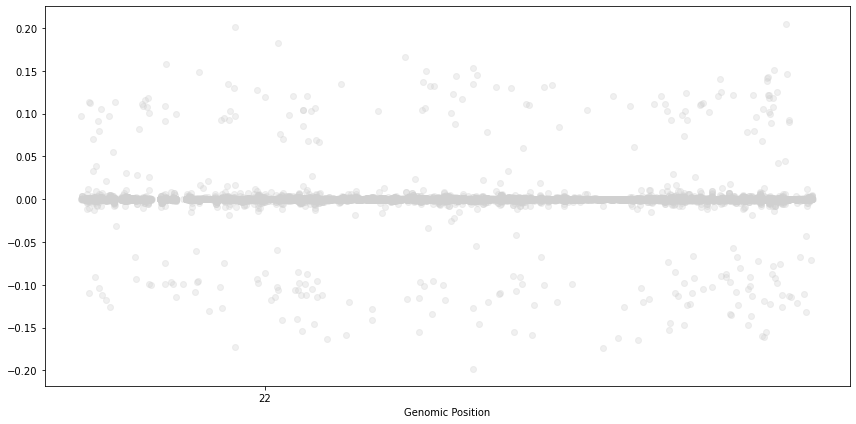

100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 20
Objective: -59.56558578354816
Sigma beta: 0.007418826933244154
Sigma epsilon: 0.3
pi: 0.037055507522182785


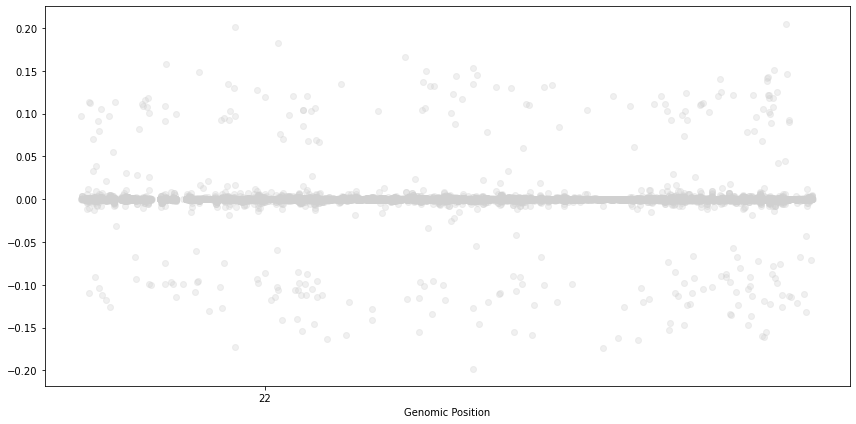

100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 21
Objective: -59.56558578337899
Sigma beta: 0.00741882700384454
Sigma epsilon: 0.3
pi: 0.037055506078315446


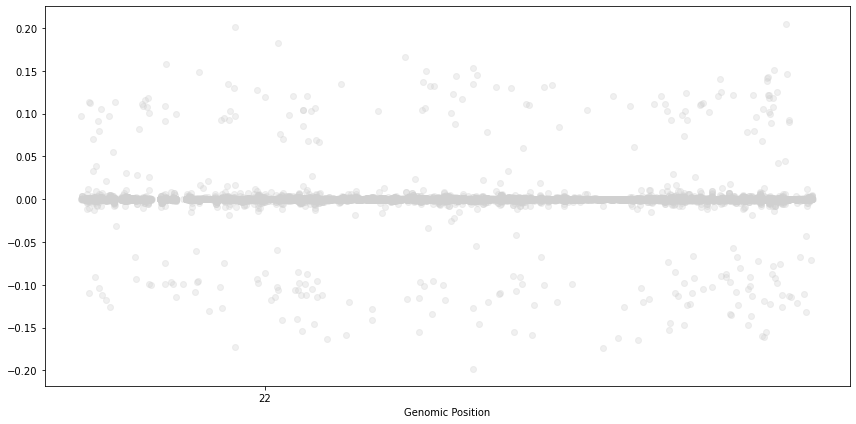

100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 22
Objective: -59.56558578324075
Sigma beta: 0.0074188270690268504
Sigma epsilon: 0.3
pi: 0.037055504725462644


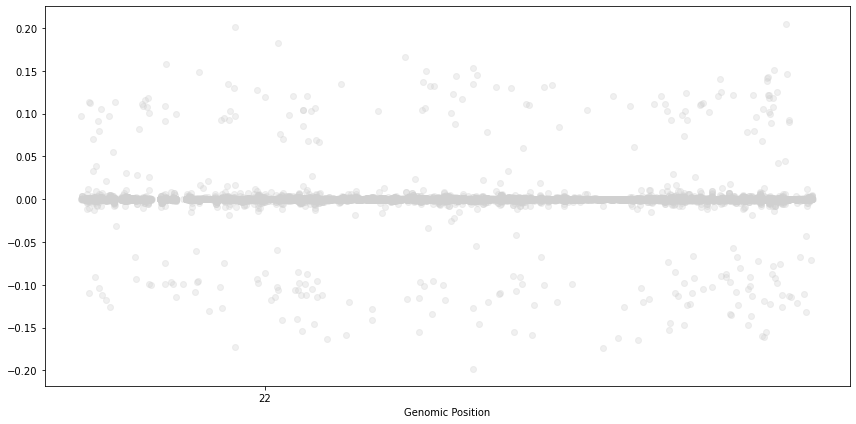

100%|██████████| 1/1 [00:00<00:00, 14.09it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 23
Objective: -59.56558578310978
Sigma beta: 0.007418827129222578
Sigma epsilon: 0.3
pi: 0.03705550345786538


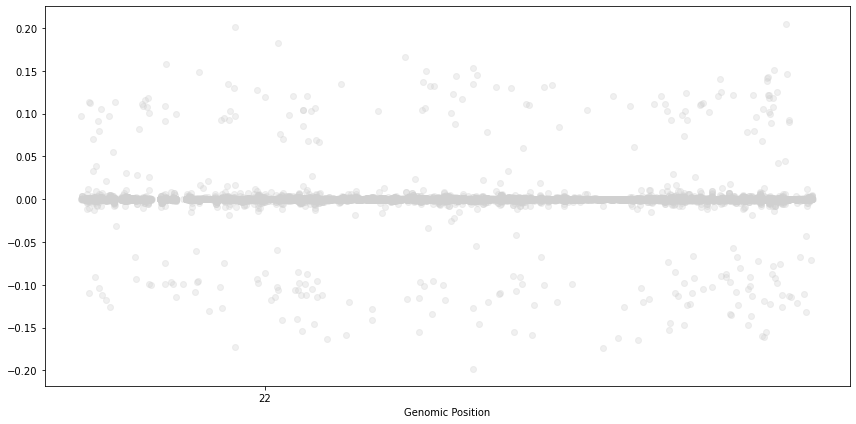

100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 24
Objective: -59.56558578300246
Sigma beta: 0.007418827184827626
Sigma epsilon: 0.3
pi: 0.03705550227013076


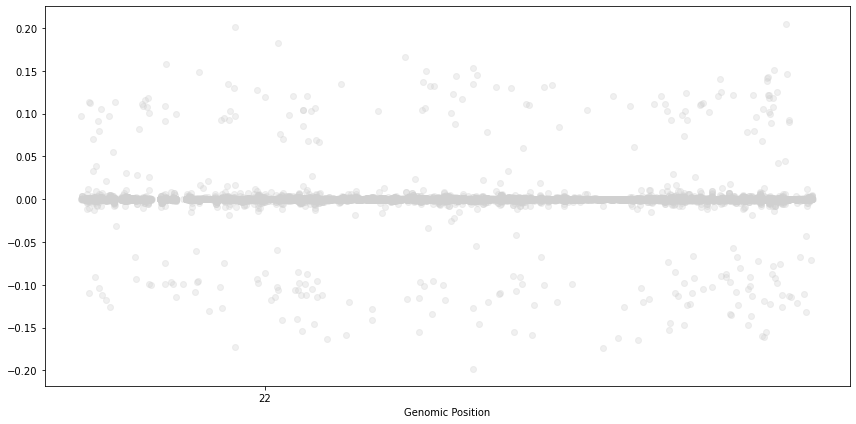

100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 25
Objective: -59.565585782906055
Sigma beta: 0.007418827236205347
Sigma epsilon: 0.3
pi: 0.03705550115720853


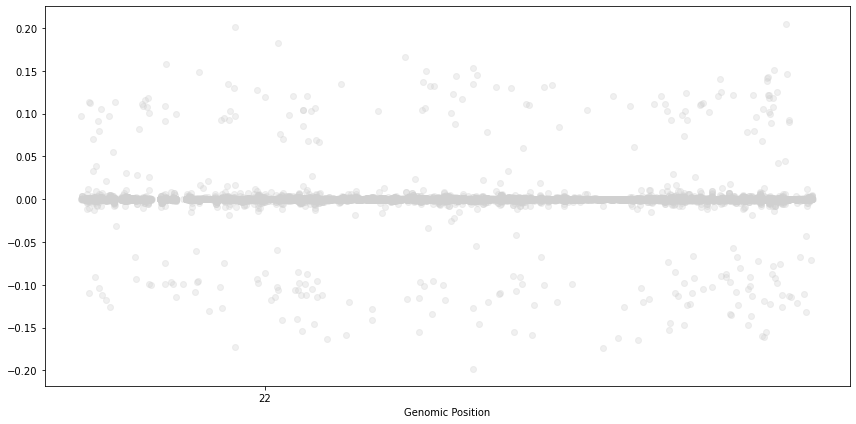

100%|██████████| 1/1 [00:00<00:00, 14.31it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 26
Objective: -59.565585782816925
Sigma beta: 0.007418827283689304
Sigma epsilon: 0.3
pi: 0.03705550011436924


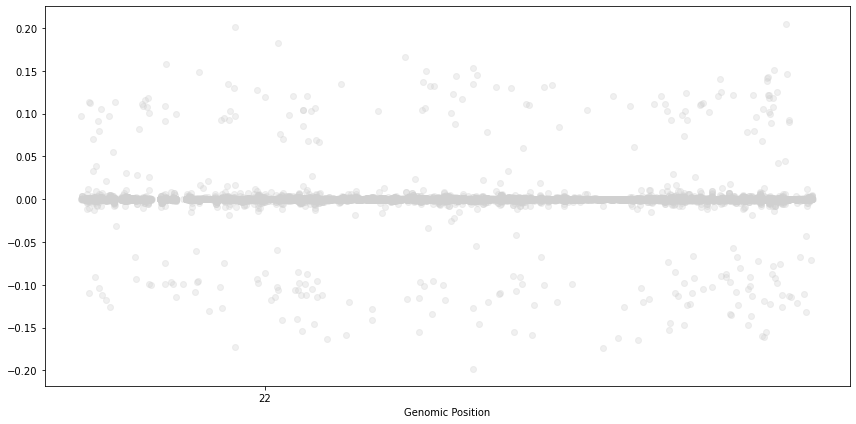

100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 27
Objective: -59.5655857827478
Sigma beta: 0.007418827327585795
Sigma epsilon: 0.3
pi: 0.037055499137183756


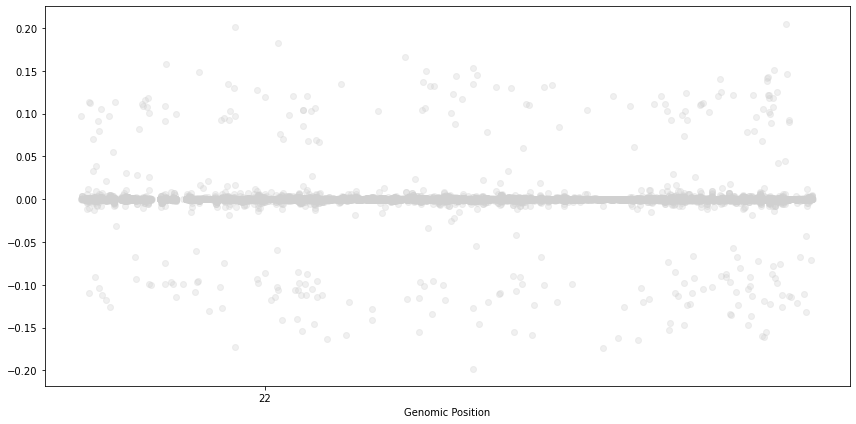

100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 28
Objective: -59.56558578267686
Sigma beta: 0.007418827368176147
Sigma epsilon: 0.3
pi: 0.03705549822150409


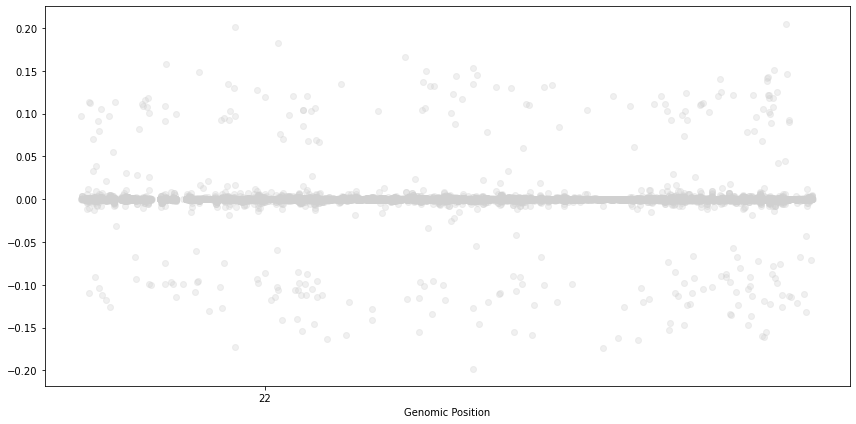

100%|██████████| 1/1 [00:00<00:00, 12.63it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 29
Objective: -59.56558578262229
Sigma beta: 0.007418827405718834
Sigma epsilon: 0.3
pi: 0.03705549736344549


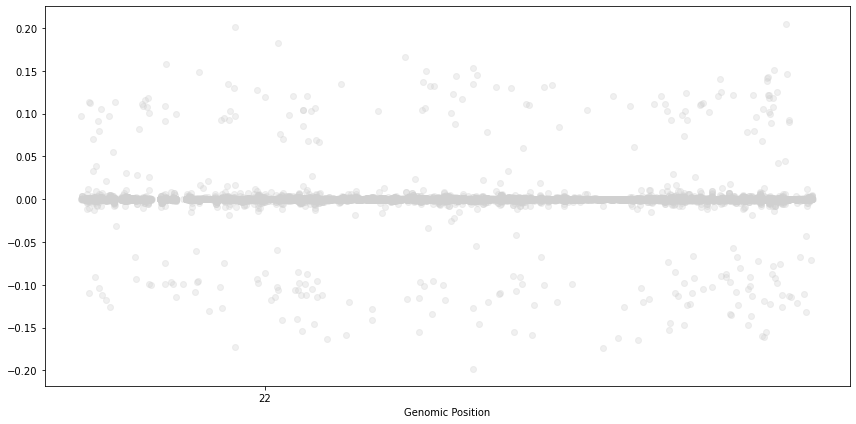

100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 30
Objective: -59.56558578257318
Sigma beta: 0.007418827440451384
Sigma epsilon: 0.3
pi: 0.037055496559369586


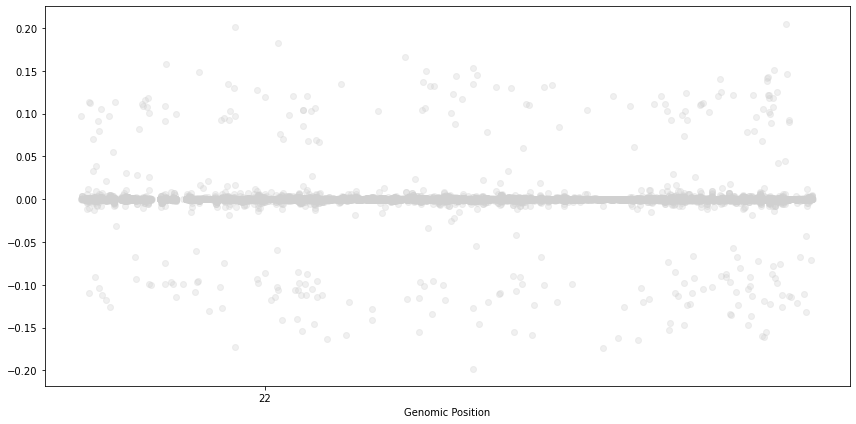

100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 31
Objective: -59.565585782529524
Sigma beta: 0.007418827472592132
Sigma epsilon: 0.3
pi: 0.03705549580586879


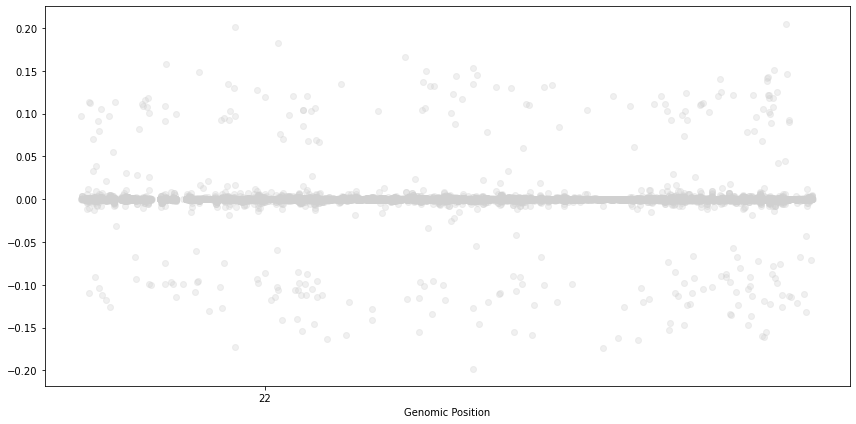

100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 32
Objective: -59.56558578248951
Sigma beta: 0.007418827502341836
Sigma epsilon: 0.3
pi: 0.037055495099751486


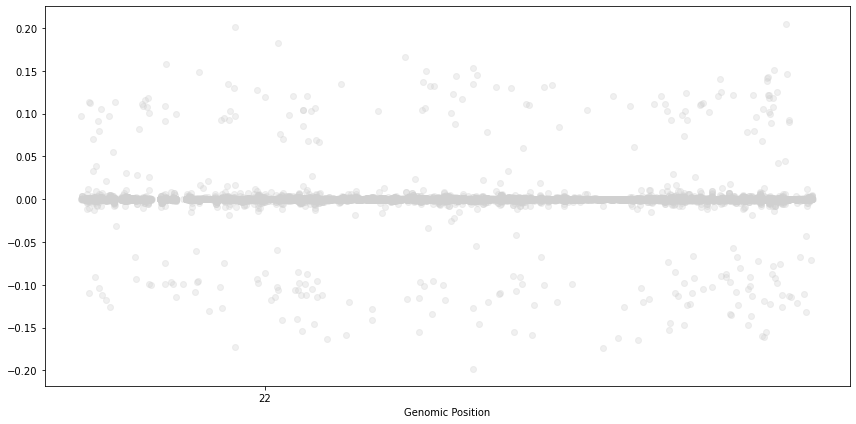

100%|██████████| 1/1 [00:00<00:00, 14.22it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 33
Objective: -59.56558578244767
Sigma beta: 0.007418827529885119
Sigma epsilon: 0.3
pi: 0.03705549443802831


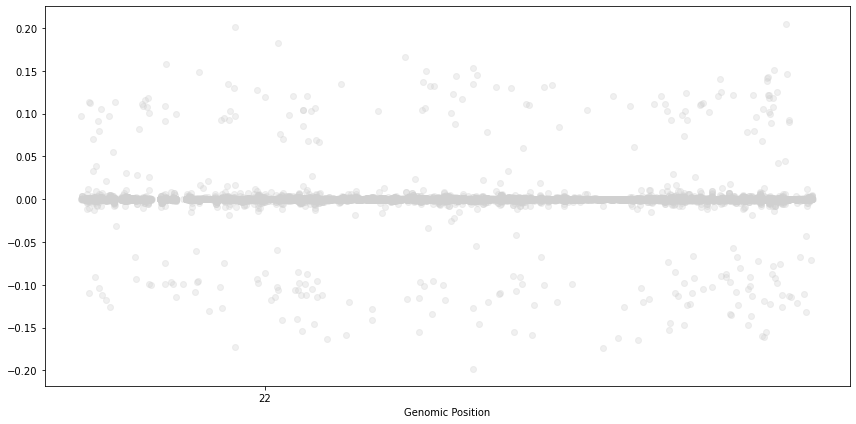

100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 34
Objective: -59.565585782422204
Sigma beta: 0.007418827555391829
Sigma epsilon: 0.3
pi: 0.03705549381789931


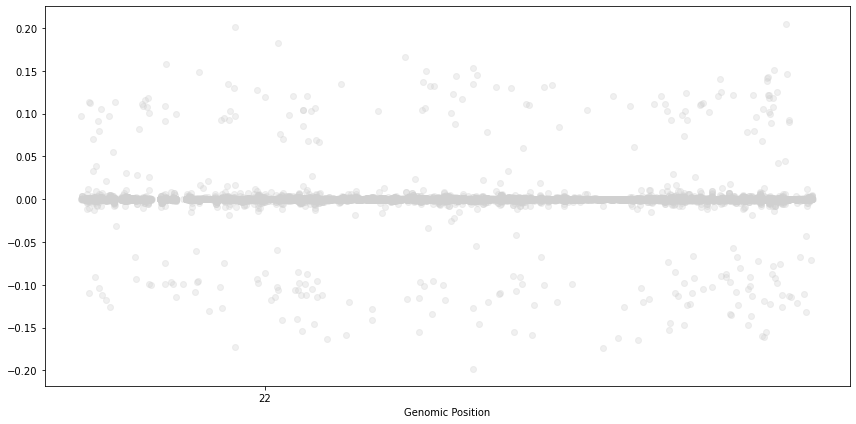

100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 35
Objective: -59.565585782400376
Sigma beta: 0.007418827579018251
Sigma epsilon: 0.3
pi: 0.03705549323674181


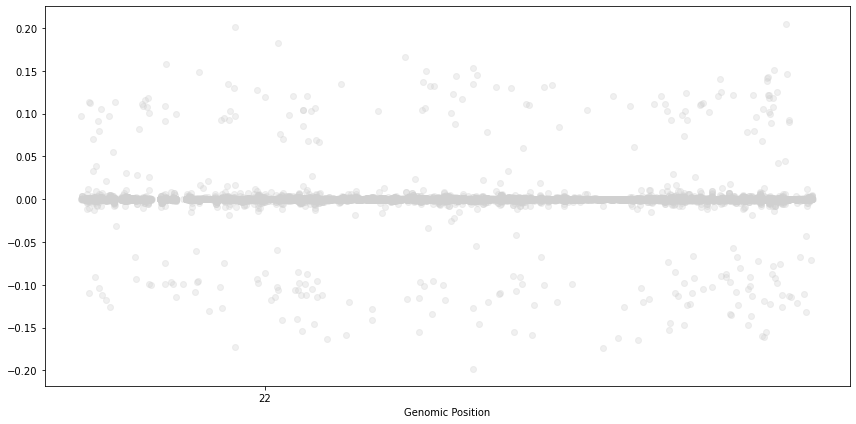

100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 36
Objective: -59.565585782367634
Sigma beta: 0.007418827600908236
Sigma epsilon: 0.3
pi: 0.037055492692099186


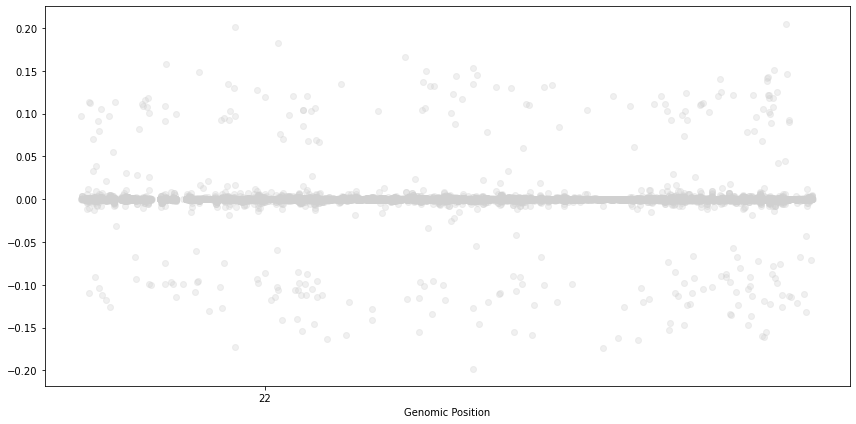

100%|██████████| 1/1 [00:00<00:00, 14.32it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 37
Objective: -59.56558578235308
Sigma beta: 0.007418827621194215
Sigma epsilon: 0.3
pi: 0.0370554921816703


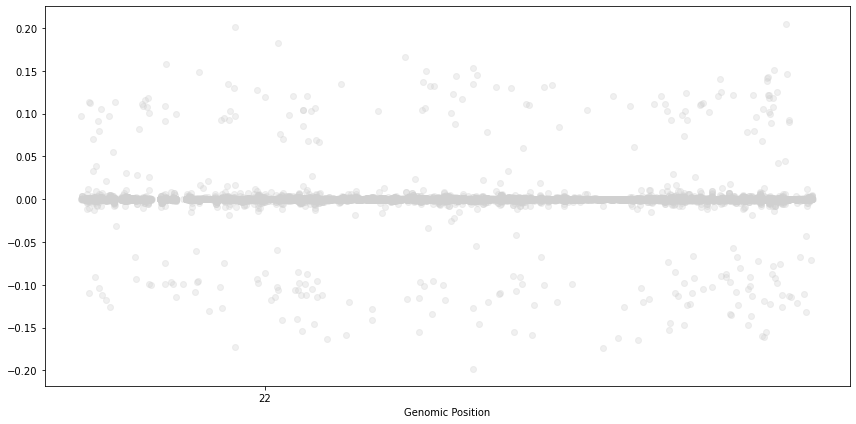

100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 38
Objective: -59.565585782329435
Sigma beta: 0.007418827639998146
Sigma epsilon: 0.3
pi: 0.03705549170329957


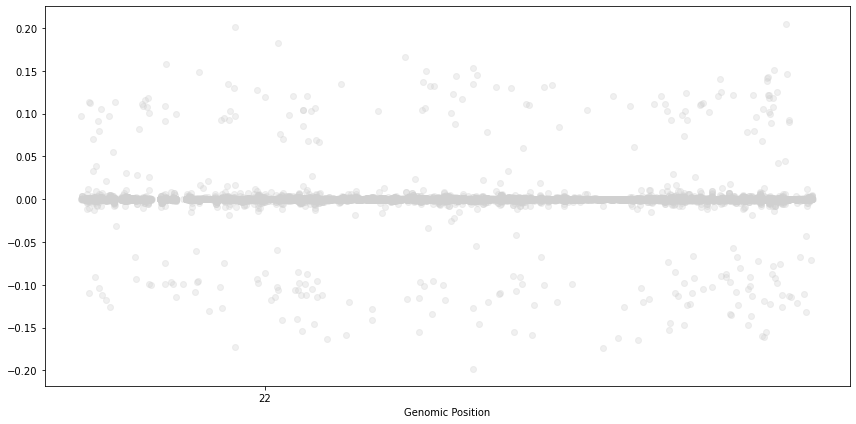

100%|██████████| 1/1 [00:00<00:00, 12.02it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 39
Objective: -59.56558578231488
Sigma beta: 0.007418827657432359
Sigma epsilon: 0.3
pi: 0.03705549125496772


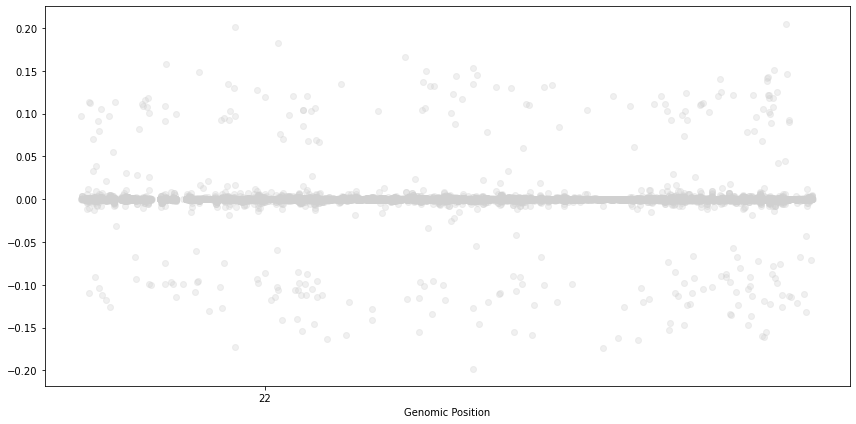

100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 40
Objective: -59.56558578230215
Sigma beta: 0.007418827673600353
Sigma epsilon: 0.3
pi: 0.03705549083478321


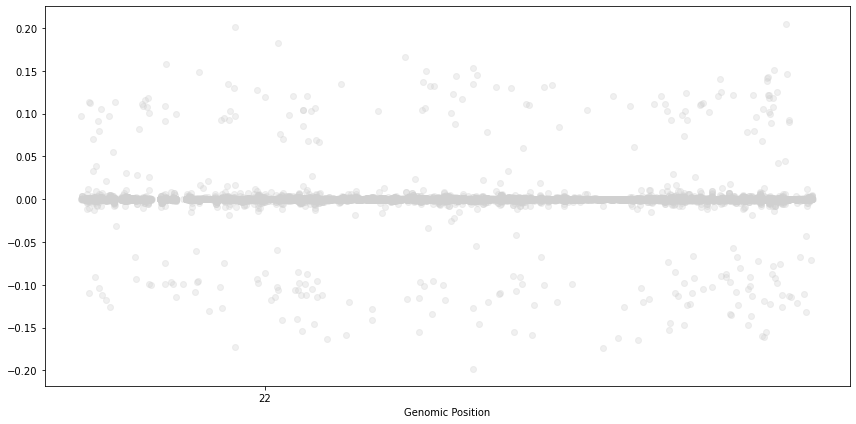

100%|██████████| 1/1 [00:00<00:00, 12.26it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 41
Objective: -59.565585782293056
Sigma beta: 0.0074188276885975134
Sigma epsilon: 0.3
pi: 0.03705549044097402


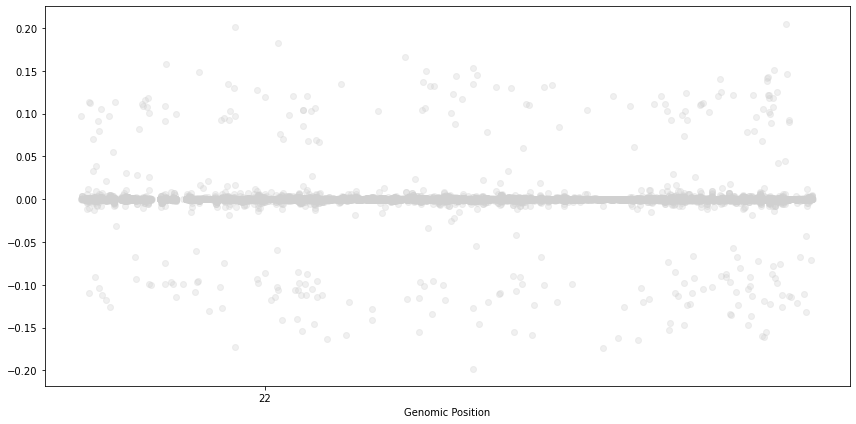

100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 42
Objective: -59.56558578228214
Sigma beta: 0.0074188277025117695
Sigma epsilon: 0.3
pi: 0.03705549007188006


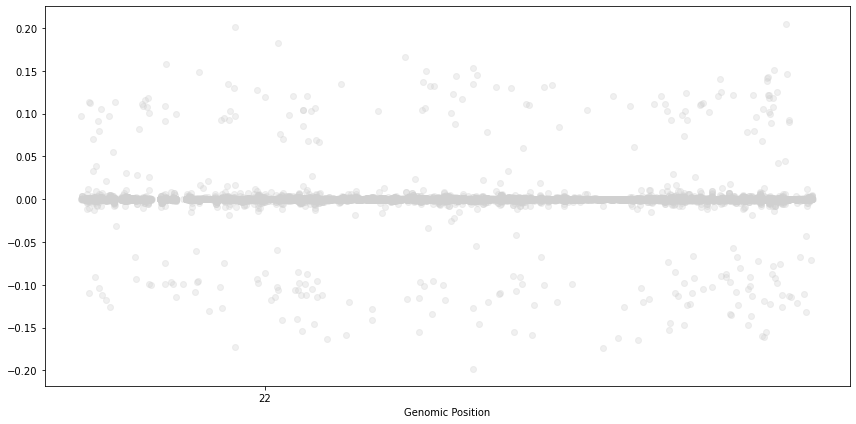

100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 43
Objective: -59.56558578227123
Sigma beta: 0.0074188277154241975
Sigma epsilon: 0.3
pi: 0.03705548972594617


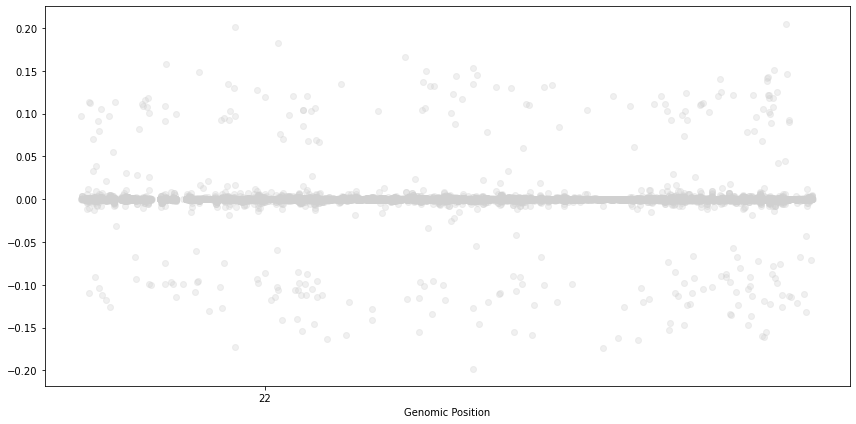

100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 44
Objective: -59.56558578226213
Sigma beta: 0.007418827727409574
Sigma epsilon: 0.3
pi: 0.037055489401715325


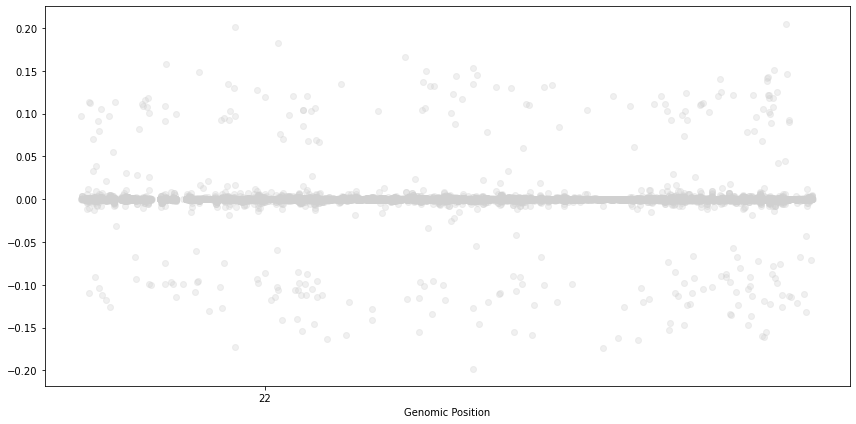

100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 45
Objective: -59.56558578225486
Sigma beta: 0.007418827738536879
Sigma epsilon: 0.3
pi: 0.037055489097822525


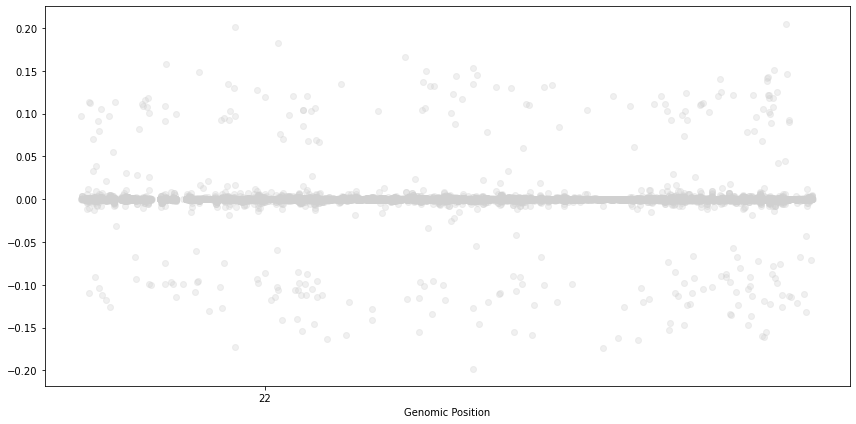

100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 46
Objective: -59.5655857822494
Sigma beta: 0.007418827748869775
Sigma epsilon: 0.3
pi: 0.037055488812988875


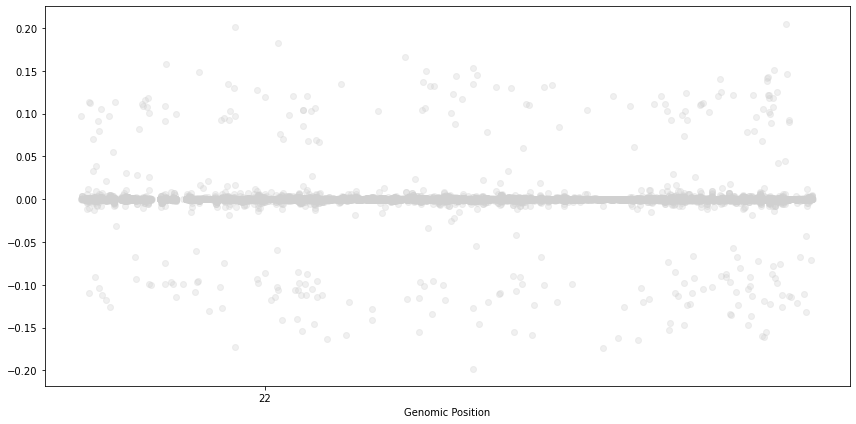

100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 47
Objective: -59.565585782238486
Sigma beta: 0.007418827758467016
Sigma epsilon: 0.3
pi: 0.03705548854601619


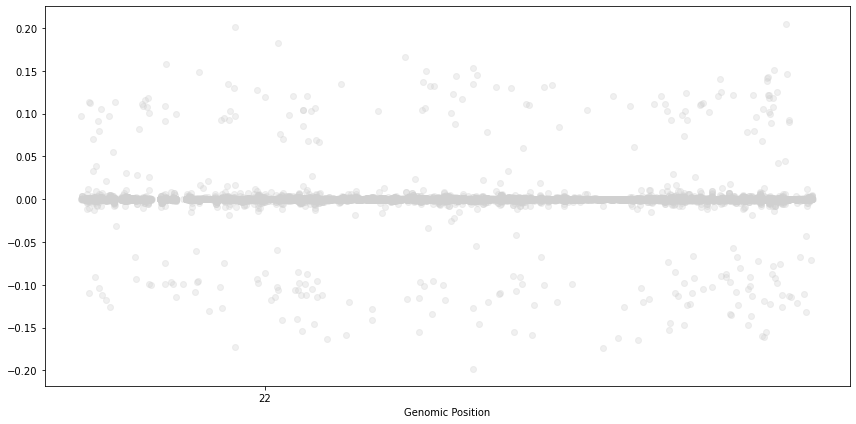

100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 48
Objective: -59.565585782240305
Sigma beta: 0.00741882776738285
Sigma epsilon: 0.3
pi: 0.03705548829578184


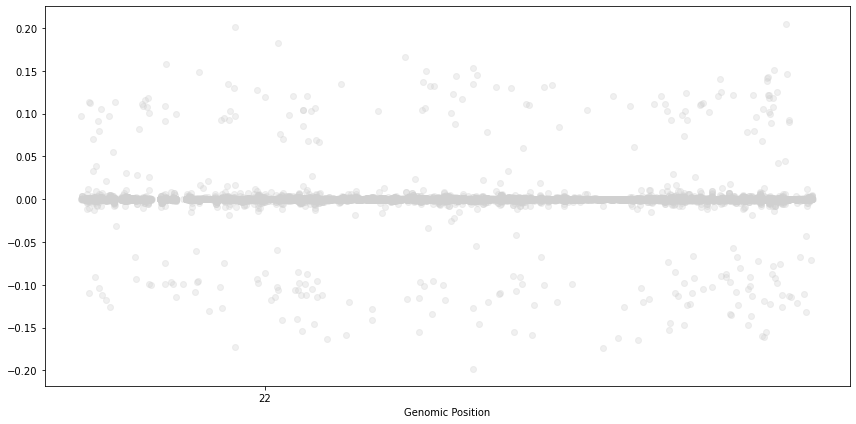

100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

> Performing model fit...
Max iterations reached without convergence. You may need to run the model for more iterations.
Iteration: 49
Objective: -59.56558578222939
Sigma beta: 0.0074188277756673734
Sigma epsilon: 0.3
pi: 0.03705548806123399


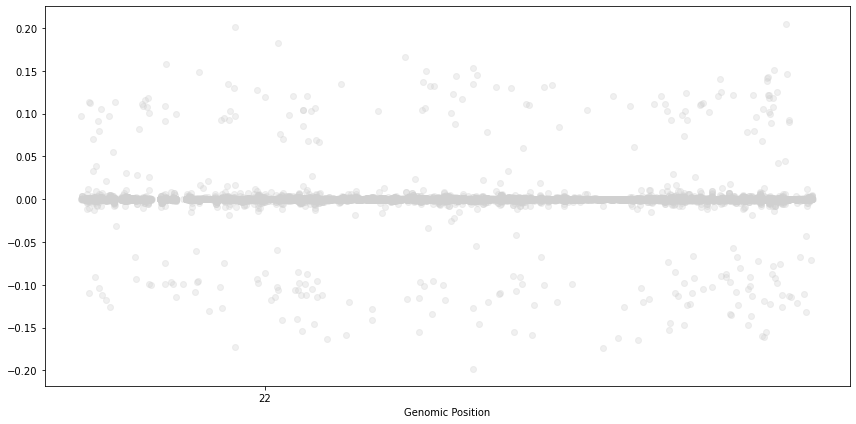

In [54]:
for i in range(50):
    m_gs.fit(max_iter=1, continued=True)
    print("Iteration:", i)
    print("Objective:", m_gs.objective())
    print("Sigma beta:", m_gs.sigma_beta)
    print("Sigma epsilon:", m_gs.sigma_epsilon)
    print("pi:", m_gs.pi)
    plot_manhattan(gs_w, m_gs.inf_beta)

In [62]:
m_gs.fit()

> Initializing model parameters


  0%|          | 2/1000 [00:00<01:18, 12.75it/s]

> Performing model fit...


 20%|██        | 200/1000 [00:15<01:03, 12.56it/s]

Converged at iteration 201 | ELBO: -58.801453


In [59]:
m_gs.get_heritability(), m_gs.get_proportion_causal()

(0.9139384073260846, 0.0375059714133879)

In [37]:
m_gs.get_proportion_causal()

0.000774263682681127

In [39]:
m_bo.get_proportion_causal()

0.000774263682681127

In [10]:
best_m_grid = fit_grid_search(v)
best_m_grid.var_gamma, best_m_grid.var_mu_beta

> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.56it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:12,  7.65it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.08it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:12,  8.00it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.87it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:11,  8.36it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.71it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:15,  6.53it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.64it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:12,  7.84it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.78it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:11,  8.17it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.19it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:14,  6.96it/s]


> Initializing model parameters


  0%|          | 0/100 [00:00<?, ?it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:17,  5.63it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.93it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:12,  7.83it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.15it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:12,  8.05it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.51it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:08, 10.15it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.21it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:08,  9.90it/s]


> Initializing model parameters


  1%|          | 1/100 [00:00<00:10,  9.26it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:09,  9.63it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.33it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:01<00:08, 10.57it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.67it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:08,  9.83it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.92it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:01<00:09,  9.02it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.82it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:07, 11.83it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.73it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:01<00:09,  9.60it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.97it/s]

> Performing model fit...


 12%|█▏        | 12/100 [00:01<00:08,  9.93it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.06it/s]

> Performing model fit...


 13%|█▎        | 13/100 [00:01<00:10,  8.67it/s]


> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.57it/s]

> Performing model fit...


100%|██████████| 100/100 [00:09<00:00, 10.62it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.0260345359129
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.35it/s]

> Performing model fit...


100%|██████████| 100/100 [00:10<00:00,  9.92it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.02599280891445
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.33it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.33it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.0260368156305
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.28it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.81it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.0259924469574
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.46it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.42it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.02599786822975
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.85it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.02604382536083
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.75it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.33it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.0260279809954
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.55it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.36it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.02601204909297
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.69it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-349.02604840927233
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.31it/s]

> Performing model fit...


 98%|█████████▊| 98/100 [00:08<00:00, 12.07it/s]


Converged at iteration 99 | ELBO: -349.025857
-349.02585695778544
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.06it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.21it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9822902845044
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.05it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.982650706108
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.32it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.50it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9817244880687
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.19it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9833311544353
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.80it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.49it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9826659527753
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.75it/s]

> Performing model fit...


100%|██████████| 100/100 [00:09<00:00, 10.91it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9832416328136
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.20it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.70it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9826324614114
> Initializing model parameters


  1%|          | 1/100 [00:00<00:13,  7.25it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.37it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.982394439372
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.66it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.21it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9832765128231
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.49it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.49it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-540.9833459549554
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.04it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.15it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8928307989408
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.53it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.44it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8923509939486
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.35it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8917320588589
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.72it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.51it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8943868812494
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 10.89it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.36it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8928597560443
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.60it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8850874422933
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.64it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.06it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8942263686331
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.63it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.99it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8926581724008
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.57it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.30it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8936418896919
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.48it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.43it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-617.8921319067231
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.28it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.79it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6914642260526
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.20it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.48it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6942216209791
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.48it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6872555316222
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09,  9.99it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.36it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6606885312212
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.47it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6951467175822
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.91it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6921819438576
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.65it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.20it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.7003177418082
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.11it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.15it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6931805808417
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.56it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.54it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6911890725169
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.12it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.50it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-654.6982751260803
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.56it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.41it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.8133063967398
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.63it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.06it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.8179769562121
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.58it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.7646184801415
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.57it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.8141655126092
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.17it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.76it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.7530408143502
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.72it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.42it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.8008095080295
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.87it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.66it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.8175786535212
> Initializing model parameters


  1%|          | 1/100 [00:00<00:10,  9.45it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.23it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.7685966057252
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.74it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.10it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.814544070694
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.49it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.30it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-675.8165018777072
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.45it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3858038296821
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.33it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.19it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-689.9047312438488
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.21it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.38it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3614534009394
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.10it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.61it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3823263577797
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.44it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.48it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3330262111558
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.60it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.87it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3812843031046
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.71it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.71it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3820854961814
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.29it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3383567233614
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.02it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.66it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3808732830585
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.17it/s]

> Performing model fit...


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-690.3575006091851
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.28it/s]

> Performing model fit...


100%|██████████| 100/100 [00:10<00:00,  9.51it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-701.9774484172449
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.78it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.98it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-702.0009948615116
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.06it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.20it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-702.0339127558982
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.58it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-702.0342946069868
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.12it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.83it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-701.940594560816
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.31it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.45it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-701.8914481184038
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.39it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.17it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-702.045986602323
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.00it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.37it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-701.9079135179782
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.09it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.95it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-701.9886336658165
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.05it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-702.0137957741317
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.83it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.33it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.3155789432203
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.20it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.97it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.3147753165103
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.41it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.05it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.2961172900395
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.34it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.63it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.3074382121849
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.36it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.31it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.3073872469249
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.79it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.04it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-711.9004210903659
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.55it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.31it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.2880416486223
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.45it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.36it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.2980086930038
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.16it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.21it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.2829643828154
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.23it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.46it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
-712.0184000969166
> Initializing model parameters


  0%|          | 2/1000 [00:00<01:15, 13.22it/s]

> Performing model fit...


 14%|█▎        | 136/1000 [00:10<01:09, 12.37it/s]

Converged at iteration 137 | ELBO: -349.025210


({22: array([0.98957696, 0.98953671, 0.98939395, ..., 0.98942516, 0.98942235,
         0.98947193])},
 {22: array([-1.55693830e-03, -1.37411723e-03, -5.85102964e-05, ...,
          6.42954814e-04,  6.13455160e-04, -1.01479359e-03])})

In [11]:
best_m_bo = fit_bayes_opt(v)
best_m_bo.var_gamma, best_m_bo.var_mu_beta

Testing parameters: {'sigma_epsilon': 0.7280619874937135, 'pi': 0.23229600164313685}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.02it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.17it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 673.1428525842348
Testing parameters: {'sigma_epsilon': 0.4953968569674821, 'pi': 0.1771162755169328}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.15it/s]

> Performing model fit...


 52%|█████▏    | 52/100 [00:04<00:04, 11.22it/s]


Converged at iteration 53 | ELBO: -611.611635
Objective: 611.611634988767
Testing parameters: {'sigma_epsilon': 0.6404231619489019, 'pi': 0.15014760513641384}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.95it/s]

> Performing model fit...


 78%|███████▊  | 78/100 [00:06<00:01, 12.25it/s]


Converged at iteration 79 | ELBO: -660.133932
Objective: 660.133932384284
Testing parameters: {'sigma_epsilon': 0.46206436004961915, 'pi': 0.7428921864493963}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:09, 10.72it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.11it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 594.9635731173184
Testing parameters: {'sigma_epsilon': 0.0644281856085476, 'pi': 0.9443092289743671}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.24it/s]

> Performing model fit...


  8%|▊         | 8/100 [00:00<00:09,  9.24it/s]


Testing parameters: {'sigma_epsilon': 0.999999, 'pi': 0.999999}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.34it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.79it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 712.6216540271707
Testing parameters: {'sigma_epsilon': 0.878329834023702, 'pi': 0.999999}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.03it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 11.97it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 699.8526583424537
Testing parameters: {'sigma_epsilon': 0.5523306781647631, 'pi': 0.999999}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 12.18it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.22it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 640.115005370084
Testing parameters: {'sigma_epsilon': 0.6886235006345587, 'pi': 0.6967617864220289}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.73it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.26it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 670.4005298761913
Testing parameters: {'sigma_epsilon': 0.9469203292536984, 'pi': 1e-06}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 12.57it/s]

> Performing model fit...


  2%|▏         | 2/100 [00:00<00:12,  8.03it/s]


Converged at iteration 3 | ELBO: -694.211428
Objective: 694.2114278909594
Testing parameters: {'sigma_epsilon': 0.8191395961209502, 'pi': 1e-06}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:07, 13.57it/s]

> Performing model fit...


  3%|▎         | 3/100 [00:00<00:10,  9.29it/s]


Converged at iteration 4 | ELBO: -698.975869
Objective: 698.9758693150161
Testing parameters: {'sigma_epsilon': 0.7793790178234328, 'pi': 0.999999}
> Initializing model parameters


  1%|          | 1/100 [00:00<00:13,  7.23it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.18it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 687.8271702156635
Testing parameters: {'sigma_epsilon': 0.999999, 'pi': 1e-06}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.91it/s]

> Performing model fit...


  3%|▎         | 3/100 [00:00<00:12,  7.90it/s]


Converged at iteration 4 | ELBO: -693.850819
Objective: 693.850819096162
Testing parameters: {'sigma_epsilon': 0.4926396233887314, 'pi': 0.999999}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.02it/s]

> Performing model fit...


100%|██████████| 100/100 [00:08<00:00, 12.46it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 614.1084198425233
Testing parameters: {'sigma_epsilon': 0.6059080656211504, 'pi': 0.999999}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.32it/s]

> Performing model fit...


100%|██████████| 100/100 [00:07<00:00, 12.54it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 656.3383857976587
Testing parameters: {'sigma_epsilon': 0.5806403902966436, 'pi': 1e-06}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.31it/s]

> Performing model fit...


  4%|▍         | 4/100 [00:00<00:08, 10.71it/s]


Converged at iteration 5 | ELBO: -734.450942
Objective: 734.4509421075863
Testing parameters: {'sigma_epsilon': 0.8565210813655704, 'pi': 0.058999436353747735}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.25it/s]

> Performing model fit...


 91%|█████████ | 91/100 [00:07<00:00, 12.22it/s]


Converged at iteration 92 | ELBO: -683.555604
Objective: 683.5556041414748
Testing parameters: {'sigma_epsilon': 0.9694188336274981, 'pi': 0.999999}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:06, 14.22it/s]

> Performing model fit...


100%|██████████| 100/100 [00:09<00:00, 10.62it/s]


Max iterations reached without convergence. You may need to run the model for more iterations.
Objective: 708.8064654117043
Testing parameters: {'sigma_epsilon': 0.9063020561395164, 'pi': 1e-06}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.79it/s]

> Performing model fit...


  3%|▎         | 3/100 [00:00<00:12,  7.74it/s]


Converged at iteration 4 | ELBO: -695.051654
Objective: 695.0516542252999
Testing parameters: {'sigma_epsilon': 0.47049309481195245, 'pi': 1e-06}
> Initializing model parameters


  2%|▏         | 2/100 [00:00<00:08, 11.31it/s]

> Performing model fit...


  9%|▉         | 9/100 [00:01<00:10,  8.82it/s]


Converged at iteration 10 | ELBO: -771.556576
Objective: 771.5565755789312
> Initializing model parameters


  0%|          | 2/1000 [00:00<01:12, 13.83it/s]

> Performing model fit...


 22%|██▏       | 216/1000 [00:17<01:04, 12.10it/s]

Converged at iteration 217 | ELBO: -594.911678


({22: array([0.73709033, 0.73728367, 0.73600724, ..., 0.73763872, 0.73767296,
         0.73597364])},
 {22: array([-8.71235360e-04, -9.43333102e-04, -1.65333004e-04, ...,
          1.06314678e-03,  1.07399788e-03,  6.82943513e-05])})

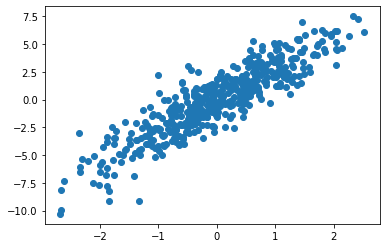

In [69]:
plt.scatter(gs_w.phenotypes, m_gs.predict())

In [ ]:
np.corrcoef(gs_w.betas[22], best_m_bo.var_mu_beta[22])

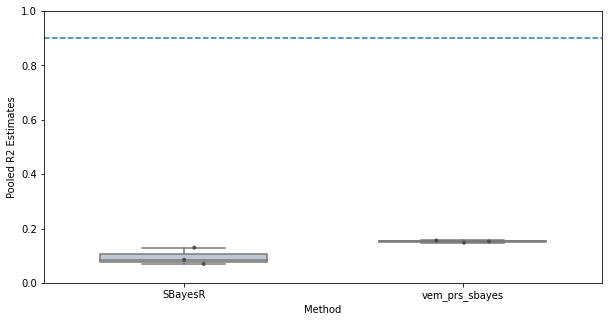

In [83]:
plot_prediction_results(res, true_h2g=gs_w.h2g)

In [7]:
def evaluate_heritability_w_simulations_2(h2, n_traits=10, max_iter=300):

    results = []
    
    gs_w.h2g = h2

    print("Evaluating Heritability with Simulations...")
    for _ in tqdm(range(n_traits)):
        gs_w.simulate(reset_beta=True)
        
        res = {}

        vw = vem_prs_sbayes(gs_w)
        vw.fit(max_iter=max_iter)
        res['Sparse'] = vw.get_heritability()
        
        vw_i = vem_prs_sbayes_inf(gs_w)
        vw_i.fit(max_iter=max_iter)
        res['Infinitesimal'] = vw_i.get_heritability()
        
        """
        sb = SBayesR(gs_w, ldm="../external/gctb_2.0_tutorial/ldm/sparse/chr22/1000G_eur_chr22.ldm.sparse")
        sb.fit()
        res['SBayesR'] = sb.get_heritability()
        
        he = HERegression(gs_w)
        he.fit()
        res['HEReg'] = he.get_heritability()
        """
        
        results.append(res)

    return pd.DataFrame(results)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -731.179187 to -754.887591!


 10%|█         | 1/10 [00:47<07:03, 47.11s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 85): ELBO dropped from -693.549330 to -693.549331!
Converged at iteration 85 | ELBO: -693.549331
Warning (Iteration 2): ELBO dropped from -733.470238 to -754.918132!


 20%|██        | 2/10 [01:17<05:37, 42.15s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 4): ELBO dropped from -693.474488 to -693.474565!
Warning (Iteration 65): ELBO dropped from -693.449660 to -693.449666!
Warning (Iteration 66): ELBO dropped from -693.449666 to -693.449680!
Warning (Iteration 67): ELBO dropped from -693.449680 to -693.449700!
Warning (Iteration 68): ELBO dropped from -693.449700 to -693.449728!
Warning (Iteration 69): ELBO dropped from -693.449728 to -693.449763!
Warning (Iteration 70): ELBO dropped from -693.449763 to -693.449804!
Warning (Iteration 71): ELBO dropped from -693.449804 to -693.449852!
Warning (Iteration 72): ELBO dropped from -693.449852 to -693.449906!
Warning (Iteration 73): ELBO dropped from -693.449906 to -693.449966!
Warning (Iteration 74): ELBO dropped from -693.449966 to -693.450033!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -739.047635 to -757.130406!


 30%|███       | 3/10 [01:47<04:28, 38.41s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 4): ELBO dropped from -692.064500 to -692.068279!
Warning (Iteration 5): ELBO dropped from -692.068279 to -692.070986!
Warning (Iteration 6): ELBO dropped from -692.070986 to -692.073688!
Warning (Iteration 7): ELBO dropped from -692.073688 to -692.076375!
Warning (Iteration 8): ELBO dropped from -692.076375 to -692.079044!
Warning (Iteration 9): ELBO dropped from -692.079044 to -692.081696!
Warning (Iteration 10): ELBO dropped from -692.081696 to -692.084332!
Warning (Iteration 11): ELBO dropped from -692.084332 to -692.086950!
Warning (Iteration 12): ELBO dropped from -692.086950 to -692.089553!
Warning (Iteration 13): ELBO dropped from -692.089553 to -692.092138!
Warning (Iteration 14): ELBO dropped from -692.092138 to -692.094708!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -706.337629 to -741.242055!


 40%|████      | 4/10 [02:12<03:26, 34.39s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -690.356734 to -690.485341!
Warning (Iteration 4): ELBO dropped from -690.429296 to -690.430411!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -687.368689 to -733.458942!


 50%|█████     | 5/10 [02:59<03:11, 38.20s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -689.393055 to -689.668222!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -658.958265 to -723.593690!
Warning (Iteration 214): ELBO dropped from -684.127588 to -684.127632!
Warning (Iteration 215): ELBO dropped from -684.127632 to -684.127778!
Warning (Iteration 216): ELBO dropped from -684.127778 to -684.128023!
Warning (Iteration 217): ELBO dropped from -684.128023 to -684.128366!
Warning (Iteration 218): ELBO dropped from -684.128366 to -684.128804!
Warning (Iteration 219): ELBO dropped from -684.128804 to -684.129336!
Warning (Iteration 220): ELBO dropped from -684.129336 to -684.129960!
Warning (Iteration 221): ELBO dropped from -684.129960 to -684.130673!
Warning (Iteration 222): ELBO dropped from -684.130673 to -684.131475!


 60%|██████    | 6/10 [03:42<02:38, 39.61s/it]

Warning (Iteration 223): ELBO dropped from -684.131475 to -684.132363!
The optimization is halted due to numerical instabilities!
Warning (Iteration 4): ELBO dropped from -692.777658 to -692.780264!
Warning (Iteration 5): ELBO dropped from -692.780264 to -692.781785!
Warning (Iteration 6): ELBO dropped from -692.781785 to -692.783335!
Warning (Iteration 7): ELBO dropped from -692.783335 to -692.784882!
Warning (Iteration 8): ELBO dropped from -692.784882 to -692.786425!
Warning (Iteration 9): ELBO dropped from -692.786425 to -692.787966!
Warning (Iteration 10): ELBO dropped from -692.787966 to -692.789503!
Warning (Iteration 11): ELBO dropped from -692.789503 to -692.791037!
Warning (Iteration 12): ELBO dropped from -692.791037 to -692.792568!
Warning (Iteration 13): ELBO dropped from -692.792568 to -692.794095!
Warning (Iteration 14): ELBO dropped from -692.794095 to -692.795619!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -726.2

 70%|███████   | 7/10 [04:07<01:45, 35.28s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 4): ELBO dropped from -692.533349 to -692.536288!
Warning (Iteration 5): ELBO dropped from -692.536288 to -692.538416!
Warning (Iteration 6): ELBO dropped from -692.538416 to -692.540534!
Warning (Iteration 7): ELBO dropped from -692.540534 to -692.542643!
Warning (Iteration 8): ELBO dropped from -692.542643 to -692.544742!
Warning (Iteration 9): ELBO dropped from -692.544742 to -692.546829!
Warning (Iteration 10): ELBO dropped from -692.546829 to -692.548907!
Warning (Iteration 11): ELBO dropped from -692.548907 to -692.550974!
Warning (Iteration 12): ELBO dropped from -692.550974 to -692.553030!
Warning (Iteration 13): ELBO dropped from -692.553030 to -692.555076!
Warning (Iteration 14): ELBO dropped from -692.555076 to -692.557112!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -719.476604 to -748.105661!


 80%|████████  | 8/10 [04:33<01:04, 32.37s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -738.568773 to -757.546361!


 90%|█████████ | 9/10 [05:20<00:36, 36.94s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 4): ELBO dropped from -691.897533 to -691.901599!
Warning (Iteration 5): ELBO dropped from -691.901599 to -691.904221!
Warning (Iteration 6): ELBO dropped from -691.904221 to -691.906843!
Warning (Iteration 7): ELBO dropped from -691.906843 to -691.909452!
Warning (Iteration 8): ELBO dropped from -691.909452 to -691.912044!
Warning (Iteration 9): ELBO dropped from -691.912044 to -691.914621!
Warning (Iteration 10): ELBO dropped from -691.914621 to -691.917181!
Warning (Iteration 11): ELBO dropped from -691.917181 to -691.919725!
Warning (Iteration 12): ELBO dropped from -691.919725 to -691.922254!
Warning (Iteration 13): ELBO dropped from -691.922254 to -691.924767!
Warning (Iteration 14): ELBO dropped from -691.924767 to -691.927264!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -712.698105 to -744.923851!


100%|██████████| 10/10 [05:46<00:00, 34.67s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.


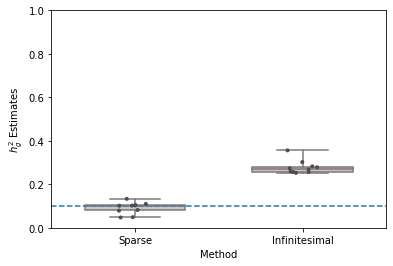

In [11]:
res_p1 = evaluate_heritability_w_simulations_2(0.1)
plot_heritability_boxplot(res_p1, true_h2=0.1)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Warning (Iteration 2): ELBO dropped from -691.278180 to -691.313976!
Warning (Iteration 4): ELBO dropped from -691.263027 to -691.266841!
Warning (Iteration 5): ELBO dropped from -691.266841 to -691.269029!
Warning (Iteration 6): ELBO dropped from -691.269029 to -691.271252!
Warning (Iteration 7): ELBO dropped from -691.271252 to -691.273458!
Warning (Iteration 8): ELBO dropped from -691.273458 to -691.275651!
Warning (Iteration 9): ELBO dropped from -691.275651 to -691.277830!
Warning (Iteration 10): ELBO dropped from -691.277830 to -691.279995!
Warning (Iteration 11): ELBO dropped from -691.279995 to -691.282147!
Warning (Iteration 12): ELBO dropped from -691.282147 to -691.284285!
Warning (Iteration 13): ELBO dropped from -691.284285 to -691.286409!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -709.552246 to -743.030078!


 10%|█         | 1/10 [00:25<03:46, 25.16s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -687.348252 to -687.816682!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -675.326544 to -724.875034!
Warning (Iteration 206): ELBO dropped from -680.357829 to -680.357911!
Warning (Iteration 207): ELBO dropped from -680.357911 to -680.358124!
Warning (Iteration 208): ELBO dropped from -680.358124 to -680.358466!
Warning (Iteration 209): ELBO dropped from -680.358466 to -680.358932!
Warning (Iteration 210): ELBO dropped from -680.358932 to -680.359521!
Warning (Iteration 211): ELBO dropped from -680.359521 to -680.360230!
Warning (Iteration 212): ELBO dropped from -680.360230 to -680.361057!
Warning (Iteration 213): ELBO dropped from -680.361057 to -680.361999!
Warning (Iteration 214): ELBO dropped from -680.361999 to -680.363053!


 20%|██        | 2/10 [01:06<04:01, 30.13s/it]

Warning (Iteration 215): ELBO dropped from -680.363053 to -680.364218!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -690.909314 to -691.015445!
Warning (Iteration 4): ELBO dropped from -690.969584 to -690.971619!
Warning (Iteration 5): ELBO dropped from -690.971619 to -690.972854!
Warning (Iteration 6): ELBO dropped from -690.972854 to -690.974057!
Warning (Iteration 7): ELBO dropped from -690.974057 to -690.975257!
Warning (Iteration 8): ELBO dropped from -690.975257 to -690.976450!
Warning (Iteration 9): ELBO dropped from -690.976450 to -690.977635!
Warning (Iteration 10): ELBO dropped from -690.977635 to -690.978814!
Warning (Iteration 11): ELBO dropped from -690.978814 to -690.979987!
Warning (Iteration 12): ELBO dropped from -690.979987 to -690.981152!
Warning (Iteration 13): ELBO dropped from -690.981152 to -690.982312!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -689.71

 30%|███       | 3/10 [01:31<03:19, 28.51s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -686.978811 to -687.554455!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -633.432961 to -713.767336!
Warning (Iteration 148): ELBO dropped from -676.526929 to -676.527089!
Warning (Iteration 149): ELBO dropped from -676.527089 to -676.527562!
Warning (Iteration 150): ELBO dropped from -676.527562 to -676.528338!
Warning (Iteration 151): ELBO dropped from -676.528338 to -676.529409!
Warning (Iteration 152): ELBO dropped from -676.529409 to -676.530768!
Warning (Iteration 153): ELBO dropped from -676.530768 to -676.532406!
Warning (Iteration 154): ELBO dropped from -676.532406 to -676.534317!
Warning (Iteration 155): ELBO dropped from -676.534317 to -676.536492!
Warning (Iteration 156): ELBO dropped from -676.536492 to -676.538925!


 40%|████      | 4/10 [02:12<03:13, 32.18s/it]

Warning (Iteration 157): ELBO dropped from -676.538925 to -676.541608!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -687.448697 to -687.954991!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -635.551001 to -713.942746!
Warning (Iteration 157): ELBO dropped from -678.106667 to -678.106878!
Warning (Iteration 158): ELBO dropped from -678.106878 to -678.107346!
Warning (Iteration 159): ELBO dropped from -678.107346 to -678.108065!
Warning (Iteration 160): ELBO dropped from -678.108065 to -678.109030!
Warning (Iteration 161): ELBO dropped from -678.109030 to -678.110233!
Warning (Iteration 162): ELBO dropped from -678.110233 to -678.111668!
Warning (Iteration 163): ELBO dropped from -678.111668 to -678.113330!


 50%|█████     | 5/10 [02:53<02:54, 34.99s/it]

Warning (Iteration 164): ELBO dropped from -678.113330 to -678.115212!
Warning (Iteration 165): ELBO dropped from -678.115212 to -678.117309!
Warning (Iteration 166): ELBO dropped from -678.117309 to -678.119616!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -691.986446 to -691.996136!
Warning (Iteration 4): ELBO dropped from -691.959662 to -691.963037!
Warning (Iteration 5): ELBO dropped from -691.963037 to -691.965729!
Warning (Iteration 6): ELBO dropped from -691.965729 to -691.968391!
Warning (Iteration 7): ELBO dropped from -691.968391 to -691.971037!
Warning (Iteration 8): ELBO dropped from -691.971037 to -691.973667!
Warning (Iteration 9): ELBO dropped from -691.973667 to -691.976281!
Warning (Iteration 10): ELBO dropped from -691.976281 to -691.978877!
Warning (Iteration 11): ELBO dropped from -691.978877 to -691.981458!
Warning (Iteration 12): ELBO dropped from -691.981458 to -691.984022!
Warning (Iteration 13): ELBO droppe

 60%|██████    | 6/10 [03:22<02:12, 33.03s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -690.115111 to -690.323016!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -655.675602 to -724.906955!
Warning (Iteration 232): ELBO dropped from -685.902600 to -685.902656!
Warning (Iteration 233): ELBO dropped from -685.902656 to -685.902787!
Warning (Iteration 234): ELBO dropped from -685.902787 to -685.902993!
Warning (Iteration 235): ELBO dropped from -685.902993 to -685.903272!
Warning (Iteration 236): ELBO dropped from -685.903272 to -685.903622!
Warning (Iteration 237): ELBO dropped from -685.903622 to -685.904043!
Warning (Iteration 238): ELBO dropped from -685.904043 to -685.904532!
Warning (Iteration 239): ELBO dropped from -685.904532 to -685.905089!


 70%|███████   | 7/10 [04:08<01:50, 36.91s/it]

Warning (Iteration 240): ELBO dropped from -685.905089 to -685.905713!
Warning (Iteration 241): ELBO dropped from -685.905713 to -685.906402!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -690.833425 to -690.926581!
Warning (Iteration 4): ELBO dropped from -690.875495 to -690.877713!
Warning (Iteration 5): ELBO dropped from -690.877713 to -690.878880!
Warning (Iteration 6): ELBO dropped from -690.878880 to -690.880033!
Warning (Iteration 7): ELBO dropped from -690.880033 to -690.881182!
Warning (Iteration 8): ELBO dropped from -690.881182 to -690.882324!
Warning (Iteration 9): ELBO dropped from -690.882324 to -690.883459!
Warning (Iteration 10): ELBO dropped from -690.883459 to -690.884588!
Warning (Iteration 11): ELBO dropped from -690.884588 to -690.885711!
Warning (Iteration 12): ELBO dropped from -690.885711 to -690.886827!
Warning (Iteration 13): ELBO dropped from -690.886827 to -690.887937!
The optimization is halted due to nu

 80%|████████  | 8/10 [04:35<01:08, 34.13s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -685.988481 to -686.702366!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -605.114564 to -701.570936!
Warning (Iteration 116): ELBO dropped from -671.292144 to -671.292615!
Warning (Iteration 117): ELBO dropped from -671.292615 to -671.293673!
Warning (Iteration 118): ELBO dropped from -671.293673 to -671.295300!
Warning (Iteration 119): ELBO dropped from -671.295300 to -671.297477!
Warning (Iteration 120): ELBO dropped from -671.297477 to -671.300188!
Warning (Iteration 121): ELBO dropped from -671.300188 to -671.303413!
Warning (Iteration 122): ELBO dropped from -671.303413 to -671.307138!
Warning (Iteration 123): ELBO dropped from -671.307138 to -671.311346!


 90%|█████████ | 9/10 [05:13<00:35, 35.06s/it]

Warning (Iteration 124): ELBO dropped from -671.311346 to -671.316021!
Warning (Iteration 125): ELBO dropped from -671.316021 to -671.321149!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -686.357409 to -686.830927!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -663.413100 to -721.954369!
Warning (Iteration 194): ELBO dropped from -678.205920 to -678.205965!
Warning (Iteration 195): ELBO dropped from -678.205965 to -678.206166!
Warning (Iteration 196): ELBO dropped from -678.206166 to -678.206521!
Warning (Iteration 197): ELBO dropped from -678.206521 to -678.207026!
Warning (Iteration 198): ELBO dropped from -678.207026 to -678.207679!
Warning (Iteration 199): ELBO dropped from -678.207679 to -678.208475!
Warning (Iteration 200): ELBO dropped from -678.208475 to -678.209411!
Warning (Iteration 201): ELBO dropped from -678.209411 to -678.210486

100%|██████████| 10/10 [05:54<00:00, 35.40s/it]

Warning (Iteration 203): ELBO dropped from -678.211694 to -678.213035!
The optimization is halted due to numerical instabilities!


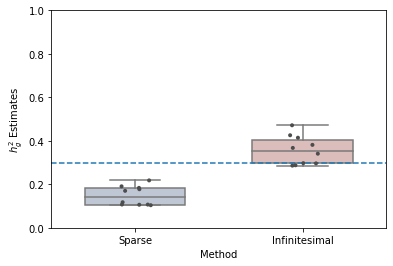

In [10]:
res_p3 = evaluate_heritability_w_simulations_2(0.3)
plot_heritability_boxplot(res_p3, true_h2=0.3)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Warning (Iteration 2): ELBO dropped from -686.635935 to -687.240976!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -627.612760 to -711.061549!
Warning (Iteration 142): ELBO dropped from -675.442041 to -675.442059!
Warning (Iteration 143): ELBO dropped from -675.442059 to -675.442427!
Warning (Iteration 144): ELBO dropped from -675.442427 to -675.443136!
Warning (Iteration 145): ELBO dropped from -675.443136 to -675.444175!
Warning (Iteration 146): ELBO dropped from -675.444175 to -675.445535!
Warning (Iteration 147): ELBO dropped from -675.445535 to -675.447209!
Warning (Iteration 148): ELBO dropped from -675.447209 to -675.449186!
Warning (Iteration 149): ELBO dropped from -675.449186 to -675.451459!


 10%|█         | 1/10 [00:37<05:34, 37.12s/it]

Warning (Iteration 150): ELBO dropped from -675.451459 to -675.454019!
Warning (Iteration 151): ELBO dropped from -675.454019 to -675.456859!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -677.875326 to -679.740481!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -403.130716 to -657.413283!
Warning (Iteration 55): ELBO dropped from -633.824522 to -633.827029!
Warning (Iteration 56): ELBO dropped from -633.827029 to -633.833105!
Warning (Iteration 57): ELBO dropped from -633.833105 to -633.842573!
Warning (Iteration 58): ELBO dropped from -633.842573 to -633.855265!
Warning (Iteration 59): ELBO dropped from -633.855265 to -633.871021!
Warning (Iteration 60): ELBO dropped from -633.871021 to -633.889689!
Warning (Iteration 61): ELBO dropped from -633.889689 to -633.911123!


 20%|██        | 2/10 [01:08<04:42, 35.37s/it]

Warning (Iteration 62): ELBO dropped from -633.911123 to -633.935186!
Warning (Iteration 63): ELBO dropped from -633.935186 to -633.961746!
Warning (Iteration 64): ELBO dropped from -633.961746 to -633.990678!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -687.508287 to -688.062743!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -610.306187 to -709.311245!
Warning (Iteration 132): ELBO dropped from -676.266367 to -676.266568!
Warning (Iteration 133): ELBO dropped from -676.266568 to -676.267173!
Warning (Iteration 134): ELBO dropped from -676.267173 to -676.268168!
Warning (Iteration 135): ELBO dropped from -676.268168 to -676.269543!
Warning (Iteration 136): ELBO dropped from -676.269543 to -676.271286!
Warning (Iteration 137): ELBO dropped from -676.271286 to -676.273387!


 30%|███       | 3/10 [01:44<04:10, 35.72s/it]

Warning (Iteration 138): ELBO dropped from -676.273387 to -676.275835!
Warning (Iteration 139): ELBO dropped from -676.275835 to -676.278620!
Warning (Iteration 140): ELBO dropped from -676.278620 to -676.281732!
Warning (Iteration 141): ELBO dropped from -676.281732 to -676.285161!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -683.527910 to -684.546917!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -588.348427 to -698.252455!
Warning (Iteration 107): ELBO dropped from -664.999219 to -664.999369!
Warning (Iteration 108): ELBO dropped from -664.999369 to -665.000302!
Warning (Iteration 109): ELBO dropped from -665.000302 to -665.001991!
Warning (Iteration 110): ELBO dropped from -665.001991 to -665.004411!
Warning (Iteration 111): ELBO dropped from -665.004411 to -665.007536!
Warning (Iteration 112): ELBO dropped from -665.007536 to -665.011343

 40%|████      | 4/10 [02:19<03:31, 35.33s/it]

Warning (Iteration 115): ELBO dropped from -665.020912 to -665.026630!
Warning (Iteration 116): ELBO dropped from -665.026630 to -665.032941!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -685.402823 to -686.119449!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -610.221108 to -705.047271!
Warning (Iteration 126): ELBO dropped from -671.634131 to -671.634164!
Warning (Iteration 127): ELBO dropped from -671.634164 to -671.634682!
Warning (Iteration 128): ELBO dropped from -671.634682 to -671.635673!
Warning (Iteration 129): ELBO dropped from -671.635673 to -671.637121!
Warning (Iteration 130): ELBO dropped from -671.637121 to -671.639013!
Warning (Iteration 131): ELBO dropped from -671.639013 to -671.641335!
Warning (Iteration 132): ELBO dropped from -671.641335 to -671.644074!
Warning (Iteration 133): ELBO dropped from -671.644074 to -671.647219

 50%|█████     | 5/10 [02:55<02:57, 35.56s/it]

Warning (Iteration 134): ELBO dropped from -671.647219 to -671.650756!
Warning (Iteration 135): ELBO dropped from -671.650756 to -671.654674!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -685.696987 to -686.403618!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -615.771831 to -705.869707!
Warning (Iteration 127): ELBO dropped from -671.952603 to -671.952894!
Warning (Iteration 128): ELBO dropped from -671.952894 to -671.953663!
Warning (Iteration 129): ELBO dropped from -671.953663 to -671.954895!
Warning (Iteration 130): ELBO dropped from -671.954895 to -671.956578!
Warning (Iteration 131): ELBO dropped from -671.956578 to -671.958696!
Warning (Iteration 132): ELBO dropped from -671.958696 to -671.961239!
Warning (Iteration 133): ELBO dropped from -671.961239 to -671.964191!


 60%|██████    | 6/10 [03:31<02:22, 35.72s/it]

Warning (Iteration 134): ELBO dropped from -671.964191 to -671.967542!
Warning (Iteration 135): ELBO dropped from -671.967542 to -671.971279!
Warning (Iteration 136): ELBO dropped from -671.971279 to -671.975390!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -685.179826 to -685.971429!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -609.886726 to -705.733792!
Warning (Iteration 124): ELBO dropped from -670.506037 to -670.506402!
Warning (Iteration 125): ELBO dropped from -670.506402 to -670.507288!
Warning (Iteration 126): ELBO dropped from -670.507288 to -670.508679!
Warning (Iteration 127): ELBO dropped from -670.508679 to -670.510560!
Warning (Iteration 128): ELBO dropped from -670.510560 to -670.512915!
Warning (Iteration 129): ELBO dropped from -670.512915 to -670.515730!
Warning (Iteration 130): ELBO dropped from -670.515730 to -670.518991

 70%|███████   | 7/10 [04:07<01:47, 35.75s/it]

Warning (Iteration 132): ELBO dropped from -670.522685 to -670.526797!
Warning (Iteration 133): ELBO dropped from -670.526797 to -670.531315!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -680.886636 to -682.256017!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -494.664050 to -676.061481!
Warning (Iteration 70): ELBO dropped from -649.577001 to -649.577470!
Warning (Iteration 71): ELBO dropped from -649.577470 to -649.580026!
Warning (Iteration 72): ELBO dropped from -649.580026 to -649.584577!
Warning (Iteration 73): ELBO dropped from -649.584577 to -649.591036!
Warning (Iteration 74): ELBO dropped from -649.591036 to -649.599320!
Warning (Iteration 75): ELBO dropped from -649.599320 to -649.609350!
Warning (Iteration 76): ELBO dropped from -649.609350 to -649.621048!
Warning (Iteration 77): ELBO dropped from -649.621048 to -649.634343!


 80%|████████  | 8/10 [04:40<01:09, 34.83s/it]

Warning (Iteration 78): ELBO dropped from -649.634343 to -649.649163!
Warning (Iteration 79): ELBO dropped from -649.649163 to -649.665443!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -684.460698 to -685.352401!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -591.248800 to -700.071890!
Warning (Iteration 110): ELBO dropped from -667.396898 to -667.397090!
Warning (Iteration 111): ELBO dropped from -667.397090 to -667.397991!
Warning (Iteration 112): ELBO dropped from -667.397991 to -667.399578!
Warning (Iteration 113): ELBO dropped from -667.399578 to -667.401828!
Warning (Iteration 114): ELBO dropped from -667.401828 to -667.404719!
Warning (Iteration 115): ELBO dropped from -667.404719 to -667.408229!
Warning (Iteration 116): ELBO dropped from -667.408229 to -667.412338!


 90%|█████████ | 9/10 [05:15<00:34, 34.87s/it]

Warning (Iteration 117): ELBO dropped from -667.412338 to -667.417027!
Warning (Iteration 118): ELBO dropped from -667.417027 to -667.422275!
Warning (Iteration 119): ELBO dropped from -667.422275 to -667.428064!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -685.012726 to -685.765971!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -587.529678 to -699.795166!
Warning (Iteration 111): ELBO dropped from -668.282009 to -668.282540!
Warning (Iteration 112): ELBO dropped from -668.282540 to -668.283749!
Warning (Iteration 113): ELBO dropped from -668.283749 to -668.285613!
Warning (Iteration 114): ELBO dropped from -668.285613 to -668.288111!
Warning (Iteration 115): ELBO dropped from -668.288111 to -668.291220!
Warning (Iteration 116): ELBO dropped from -668.291220 to -668.294923!
Warning (Iteration 117): ELBO dropped from -668.294923 to -668.299197

100%|██████████| 10/10 [05:50<00:00, 35.03s/it]

Warning (Iteration 118): ELBO dropped from -668.299197 to -668.304025!
Warning (Iteration 119): ELBO dropped from -668.304025 to -668.309389!
Warning (Iteration 120): ELBO dropped from -668.309389 to -668.315270!
The optimization is halted due to numerical instabilities!


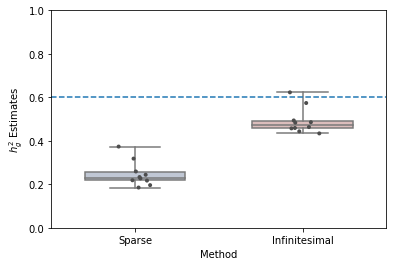

In [9]:
res_p6 = evaluate_heritability_w_simulations_2(0.6)
plot_heritability_boxplot(res_p6, true_h2=0.6)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Warning (Iteration 2): ELBO dropped from -680.757068 to -682.083224!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -555.269738 to -684.533799!
Warning (Iteration 87): ELBO dropped from -655.234793 to -655.235065!
Warning (Iteration 88): ELBO dropped from -655.235065 to -655.236650!
Warning (Iteration 89): ELBO dropped from -655.236650 to -655.239498!
Warning (Iteration 90): ELBO dropped from -655.239498 to -655.243560!
Warning (Iteration 91): ELBO dropped from -655.243560 to -655.248790!
Warning (Iteration 92): ELBO dropped from -655.248790 to -655.255142!
Warning (Iteration 93): ELBO dropped from -655.255142 to -655.262574!
Warning (Iteration 94): ELBO dropped from -655.262574 to -655.271044!


 10%|█         | 1/10 [00:34<05:08, 34.32s/it]

Warning (Iteration 95): ELBO dropped from -655.271044 to -655.280511!
Warning (Iteration 96): ELBO dropped from -655.280511 to -655.290938!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -676.461502 to -678.645844!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from 964770642534.842896 to -625.809388!
Warning (Iteration 29): ELBO dropped from -610.485110 to -610.488747!
Warning (Iteration 30): ELBO dropped from -610.488747 to -610.501702!
Warning (Iteration 31): ELBO dropped from -610.501702 to -610.523391!
Warning (Iteration 32): ELBO dropped from -610.523391 to -610.553264!
Warning (Iteration 33): ELBO dropped from -610.553264 to -610.590806!
Warning (Iteration 34): ELBO dropped from -610.590806 to -610.635534!
Warning (Iteration 35): ELBO dropped from -610.635534 to -610.686993!


 20%|██        | 2/10 [01:04<04:24, 33.09s/it]

Warning (Iteration 36): ELBO dropped from -610.686993 to -610.744753!
Warning (Iteration 37): ELBO dropped from -610.744753 to -610.808414!
Warning (Iteration 38): ELBO dropped from -610.808414 to -610.877595!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -681.743452 to -683.025844!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -415.373965 to -666.816874!
Warning (Iteration 56): ELBO dropped from -645.850800 to -645.853511!
Warning (Iteration 57): ELBO dropped from -645.853511 to -645.859248!
Warning (Iteration 58): ELBO dropped from -645.859248 to -645.867862!
Warning (Iteration 59): ELBO dropped from -645.867862 to -645.879213!
Warning (Iteration 60): ELBO dropped from -645.879213 to -645.893167!
Warning (Iteration 61): ELBO dropped from -645.893167 to -645.909596!
Warning (Iteration 62): ELBO dropped from -645.909596 to -645.928379!
Warning 

 30%|███       | 3/10 [01:36<03:49, 32.77s/it]

Warning (Iteration 64): ELBO dropped from -645.949399 to -645.972547!
Warning (Iteration 65): ELBO dropped from -645.972547 to -645.997716!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -681.390297 to -682.759778!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -439.377012 to -667.106732!
Warning (Iteration 58): ELBO dropped from -645.834526 to -645.835649!
Warning (Iteration 59): ELBO dropped from -645.835649 to -645.839688!
Warning (Iteration 60): ELBO dropped from -645.839688 to -645.846506!
Warning (Iteration 61): ELBO dropped from -645.846506 to -645.855967!
Warning (Iteration 62): ELBO dropped from -645.855967 to -645.867946!
Warning (Iteration 63): ELBO dropped from -645.867946 to -645.882321!
Warning (Iteration 64): ELBO dropped from -645.882321 to -645.898978!
Warning (Iteration 65): ELBO dropped from -645.898978 to -645.917806!


 40%|████      | 4/10 [02:08<03:14, 32.43s/it]

Warning (Iteration 66): ELBO dropped from -645.917806 to -645.938702!
Warning (Iteration 67): ELBO dropped from -645.938702 to -645.961564!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -673.867679 to -676.474231!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from 141.762910 to -621.359245!
Warning (Iteration 31): ELBO dropped from -603.529919 to -603.530406!
Warning (Iteration 32): ELBO dropped from -603.530406 to -603.540224!
Warning (Iteration 33): ELBO dropped from -603.540224 to -603.558802!
Warning (Iteration 34): ELBO dropped from -603.558802 to -603.585600!
Warning (Iteration 35): ELBO dropped from -603.585600 to -603.620112!
Warning (Iteration 36): ELBO dropped from -603.620112 to -603.661860!
Warning (Iteration 37): ELBO dropped from -603.661860 to -603.710397!
Warning (Iteration 38): ELBO dropped from -603.710397 to -603.765299!
Warning (

 50%|█████     | 5/10 [02:40<02:41, 32.33s/it]

Warning (Iteration 2): ELBO dropped from -679.782233 to -681.413220!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -357.943956 to -656.353312!
Warning (Iteration 48): ELBO dropped from -636.838662 to -636.842780!
Warning (Iteration 49): ELBO dropped from -636.842780 to -636.851043!
Warning (Iteration 50): ELBO dropped from -636.851043 to -636.863234!
Warning (Iteration 51): ELBO dropped from -636.863234 to -636.879144!
Warning (Iteration 52): ELBO dropped from -636.879144 to -636.898579!
Warning (Iteration 53): ELBO dropped from -636.898579 to -636.921351!
Warning (Iteration 54): ELBO dropped from -636.921351 to -636.947285!
Warning (Iteration 55): ELBO dropped from -636.947285 to -636.976213!


 60%|██████    | 6/10 [03:11<02:07, 31.89s/it]

Warning (Iteration 56): ELBO dropped from -636.976213 to -637.007974!
Warning (Iteration 57): ELBO dropped from -637.007974 to -637.042419!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -684.685110 to -685.603014!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -560.638426 to -693.804233!
Warning (Iteration 93): ELBO dropped from -664.433982 to -664.434200!
Warning (Iteration 94): ELBO dropped from -664.434200 to -664.435465!
Warning (Iteration 95): ELBO dropped from -664.435465 to -664.437739!
Warning (Iteration 96): ELBO dropped from -664.437739 to -664.440984!
Warning (Iteration 97): ELBO dropped from -664.440984 to -664.445164!
Warning (Iteration 98): ELBO dropped from -664.445164 to -664.450245!
Warning (Iteration 99): ELBO dropped from -664.450245 to -664.456193!
Warning (Iteration 100): ELBO dropped from -664.456193 to -664.462977!


 70%|███████   | 7/10 [03:45<01:37, 32.48s/it]

Warning (Iteration 101): ELBO dropped from -664.462977 to -664.470564!
Warning (Iteration 102): ELBO dropped from -664.470564 to -664.478926!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -672.151134 to -674.981406!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from 880.597091 to -618.341254!
Warning (Iteration 31): ELBO dropped from -600.293633 to -600.299087!
Warning (Iteration 32): ELBO dropped from -600.299087 to -600.313717!
Warning (Iteration 33): ELBO dropped from -600.313717 to -600.336959!
Warning (Iteration 34): ELBO dropped from -600.336959 to -600.368280!
Warning (Iteration 35): ELBO dropped from -600.368280 to -600.407184!
Warning (Iteration 36): ELBO dropped from -600.407184 to -600.453199!
Warning (Iteration 37): ELBO dropped from -600.453199 to -600.505883!
Warning (Iteration 38): ELBO dropped from -600.505883 to -600.564820!


 80%|████████  | 8/10 [04:14<01:03, 31.67s/it]

Warning (Iteration 39): ELBO dropped from -600.564820 to -600.629619!
Warning (Iteration 40): ELBO dropped from -600.629619 to -600.699908!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -677.131335 to -679.189045!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -118.253631 to -637.064331!
Warning (Iteration 35): ELBO dropped from -618.856090 to -618.856484!
Warning (Iteration 36): ELBO dropped from -618.856484 to -618.864155!
Warning (Iteration 37): ELBO dropped from -618.864155 to -618.878675!
Warning (Iteration 38): ELBO dropped from -618.878675 to -618.899641!
Warning (Iteration 39): ELBO dropped from -618.899641 to -618.926672!
Warning (Iteration 40): ELBO dropped from -618.926672 to -618.959409!
Warning (Iteration 41): ELBO dropped from -618.959409 to -618.997513!
Warning (Iteration 42): ELBO dropped from -618.997513 to -619.040665!


 90%|█████████ | 9/10 [04:44<00:31, 31.21s/it]

Warning (Iteration 43): ELBO dropped from -619.040665 to -619.088563!
Warning (Iteration 44): ELBO dropped from -619.088563 to -619.140923!
The optimization is halted due to numerical instabilities!
Warning (Iteration 2): ELBO dropped from -679.847719 to -681.379747!
Max iterations reached without convergence. You may need to run the model for more iterations.
Warning (Iteration 2): ELBO dropped from -394.314520 to -657.355082!
Warning (Iteration 50): ELBO dropped from -637.807046 to -637.810008!
Warning (Iteration 51): ELBO dropped from -637.810008 to -637.816831!
Warning (Iteration 52): ELBO dropped from -637.816831 to -637.827317!
Warning (Iteration 53): ELBO dropped from -637.827317 to -637.841277!
Warning (Iteration 54): ELBO dropped from -637.841277 to -637.858533!
Warning (Iteration 55): ELBO dropped from -637.858533 to -637.878914!
Warning (Iteration 56): ELBO dropped from -637.878914 to -637.902258!
Warning (Iteration 57): ELBO dropped from -637.902258 to -637.928412!
Warning 

100%|██████████| 10/10 [05:16<00:00, 31.62s/it]

Warning (Iteration 59): ELBO dropped from -637.957229 to -637.988571!
The optimization is halted due to numerical instabilities!


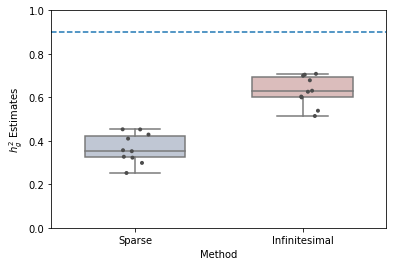

In [8]:
res_p9 = evaluate_heritability_w_simulations_2(0.9)
plot_heritability_boxplot(res_p9, true_h2=0.9)

In [11]:
def h2g_approach2(v):
    
    diag = np.sum([
                np.sum((v.var_gamma[c]*v.var_mu_beta[c])**2)
                for c in v.var_gamma
            ])
    
    off_diag = np.sum([
        np.dot(v.q[c], v.var_gamma[c] * v.var_mu_beta[c])
        for c in v.var_gamma
    ])
    
    sigma_g = diag + off_diag

    return sigma_g / (sigma_g + v.sigma_epsilon)
    
    

def h2g_approach1(v):
    
    diag = np.sum([
            np.sum(v.var_gamma[c] * (v.var_mu_beta[c]**2 + v.var_sigma_beta[c]))
            for c in v.var_gamma
        ])
    
    off_diag = np.sum([
        np.dot(v.q[c], v.var_gamma[c] * v.var_mu_beta[c])
        for c in v.var_gamma
    ])

    sigma_g = diag + off_diag

    return sigma_g / (sigma_g + v.sigma_epsilon)

def h2g_approach1_ld_prod(v):
    
    diag = np.sum([
            np.sum(v.var_gamma[c] * (v.var_mu_beta[c]**2 + v.var_sigma_beta[c]))
            for c in v.var_gamma
        ])
    
    off_diag = v.ld_prod

    sigma_g = diag + off_diag

    return sigma_g / (sigma_g + v.sigma_epsilon)


def h2g_sampling_approach(v, n_samples=100):
    
    h = []
    
    for _ in range(n_samples):
        beta = np.random.normal(v.var_mu_beta[22], np.sqrt(v.var_sigma_beta[22]))
        beta *= np.random.binomial(1, v.var_gamma[22])
        h.append(np.var(da.dot(v.gdl.genotypes[22]['G'], beta), ddof=1).compute())
    
    sigma_g = np.mean(h)
    
    return sigma_g / (sigma_g + v.sigma_epsilon)

    
def evaluate_heritability_w_simulations(h2, n_traits=5, max_iter=200):

    results = []
    
    gs_w.h2g = h2

    print("Evaluating Heritability with Simulations...")
    for _ in tqdm(range(n_traits)):
        gs_w.simulate(reset_beta=True)
        
        res = {}

        vw = vem_prs_sbayes_opt(gs_w)
        vw.fit(max_iter=max_iter)
        res['Approach 0'] = vw.get_heritability()
        #res['Approach 1'] = h2g_approach1(vw)
        #res['Approach 2'] = h2g_approach2(vw)
        #res['Approach 3'] = h2g_sampling_approach(vw)
        
        pgbs_sb = prs_gibbs_sbayes(gs_w, beta_prior=(2., 10.), sigma_epsilon_prior=(100., 200.))
        pgbs_sb.fit(n_samples=10000, burn_in=2000)
        res['Gibbs'] = pgbs_sb.get_heritability()
        
        sb = SBayesR(gs_w, ldm="../external/gctb_2.0_tutorial/ldm/sparse/chr22/1000G_eur_chr22.ldm.sparse")
        sb.fit()
        res['SBayesR'] = sb.get_heritability()
        
        he = HERegression(gs_w)
        he.fit()
        res['HEReg'] = he.get_heritability()
        
        results.append(res)

    return pd.DataFrame(results)

In [234]:
v_sb = vem_prs_sbayes(gs_w)
v_sb.fit(max_iter=300)

v_sb_opt = vem_prs_sbayes_opt(gs_w)
v_sb_opt.fit(max_iter=300)

v_sb.get_heritability(), h2g_approach1_ld_prod(v_sb), v_sb_opt.get_heritability(), h2g_approach1(v_sb_opt), h2g_sampling_approach(v_sb_opt)

Warning (Iteration 4): ELBO dropped from -692.922367 to -692.924578!
Warning (Iteration 5): ELBO dropped from -692.924578 to -692.925621!
Warning (Iteration 6): ELBO dropped from -692.925621 to -692.926696!
Warning (Iteration 7): ELBO dropped from -692.926696 to -692.927776!
Warning (Iteration 8): ELBO dropped from -692.927776 to -692.928860!
Warning (Iteration 9): ELBO dropped from -692.928860 to -692.929948!
Warning (Iteration 10): ELBO dropped from -692.929948 to -692.931040!
Warning (Iteration 11): ELBO dropped from -692.931040 to -692.932134!
Warning (Iteration 12): ELBO dropped from -692.932134 to -692.933232!
Warning (Iteration 13): ELBO dropped from -692.933232 to -692.934333!
Warning (Iteration 14): ELBO dropped from -692.934333 to -692.935436!
The optimization is halted due to numerical instabilities!
Warning (Iteration 4): ELBO dropped from -692.922367 to -692.924578!
Warning (Iteration 5): ELBO dropped from -692.924578 to -692.925621!
Warning (Iteration 6): ELBO dropped fro

(0.10100848408524798,
 0.10100848408524798,
 0.10100848638491579,
 0.10100848638491579,
 0.11101176750993044)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Max iterations reached without convergence. You may need to run the model for more iterations.


 10%|█         | 1/10 [02:02<18:20, 122.31s/it]

Warning (Iteration 89): ELBO dropped from -693.538202 to -693.538202!
Converged at iteration 89 | ELBO: -693.538202


 20%|██        | 2/10 [03:58<16:03, 120.47s/it]

Warning (Iteration 4): ELBO dropped from -691.435508 to -691.439250!
Warning (Iteration 5): ELBO dropped from -691.439250 to -691.441680!
Warning (Iteration 6): ELBO dropped from -691.441680 to -691.444129!
Warning (Iteration 7): ELBO dropped from -691.444129 to -691.446561!
Warning (Iteration 8): ELBO dropped from -691.446561 to -691.448978!
Warning (Iteration 9): ELBO dropped from -691.448978 to -691.451379!
Warning (Iteration 10): ELBO dropped from -691.451379 to -691.453765!
Warning (Iteration 11): ELBO dropped from -691.453765 to -691.456135!
Warning (Iteration 12): ELBO dropped from -691.456135 to -691.458490!
Warning (Iteration 13): ELBO dropped from -691.458490 to -691.460830!
Warning (Iteration 14): ELBO dropped from -691.460830 to -691.463155!
The optimization is halted due to numerical instabilities!


 30%|███       | 3/10 [05:50<13:45, 117.88s/it]

Warning (Iteration 4): ELBO dropped from -693.170043 to -693.171868!
Warning (Iteration 5): ELBO dropped from -693.171868 to -693.173301!
Warning (Iteration 6): ELBO dropped from -693.173301 to -693.174725!
Warning (Iteration 7): ELBO dropped from -693.174725 to -693.176142!
Warning (Iteration 8): ELBO dropped from -693.176142 to -693.177554!
Warning (Iteration 9): ELBO dropped from -693.177554 to -693.178960!
Warning (Iteration 10): ELBO dropped from -693.178960 to -693.180360!
Warning (Iteration 11): ELBO dropped from -693.180360 to -693.181754!
Warning (Iteration 12): ELBO dropped from -693.181754 to -693.183142!
Warning (Iteration 13): ELBO dropped from -693.183142 to -693.184524!
Warning (Iteration 14): ELBO dropped from -693.184524 to -693.185901!
The optimization is halted due to numerical instabilities!


 40%|████      | 4/10 [07:38<11:29, 114.98s/it]

Warning (Iteration 4): ELBO dropped from -692.834964 to -692.837783!
Warning (Iteration 5): ELBO dropped from -692.837783 to -692.839939!
Warning (Iteration 6): ELBO dropped from -692.839939 to -692.842090!
Warning (Iteration 7): ELBO dropped from -692.842090 to -692.844229!
Warning (Iteration 8): ELBO dropped from -692.844229 to -692.846355!
Warning (Iteration 9): ELBO dropped from -692.846355 to -692.848469!
Warning (Iteration 10): ELBO dropped from -692.848469 to -692.850569!
Warning (Iteration 11): ELBO dropped from -692.850569 to -692.852657!
Warning (Iteration 12): ELBO dropped from -692.852657 to -692.854733!
Warning (Iteration 13): ELBO dropped from -692.854733 to -692.856796!
Warning (Iteration 14): ELBO dropped from -692.856796 to -692.858847!
The optimization is halted due to numerical instabilities!


 50%|█████     | 5/10 [09:29<09:29, 113.82s/it]

Warning (Iteration 4): ELBO dropped from -693.134891 to -693.136354!
Warning (Iteration 5): ELBO dropped from -693.136354 to -693.137145!
Warning (Iteration 6): ELBO dropped from -693.137145 to -693.137944!
Warning (Iteration 7): ELBO dropped from -693.137944 to -693.138750!
Warning (Iteration 8): ELBO dropped from -693.138750 to -693.139560!
Warning (Iteration 9): ELBO dropped from -693.139560 to -693.140376!
Warning (Iteration 10): ELBO dropped from -693.140376 to -693.141196!
Warning (Iteration 11): ELBO dropped from -693.141196 to -693.142020!
Warning (Iteration 12): ELBO dropped from -693.142020 to -693.142849!
Warning (Iteration 13): ELBO dropped from -693.142849 to -693.143681!
Warning (Iteration 14): ELBO dropped from -693.143681 to -693.144517!
The optimization is halted due to numerical instabilities!


 60%|██████    | 6/10 [11:22<07:34, 113.59s/it]

Warning (Iteration 2): ELBO dropped from -691.223812 to -691.269051!
Warning (Iteration 4): ELBO dropped from -691.221099 to -691.224560!
Warning (Iteration 5): ELBO dropped from -691.224560 to -691.226558!
Warning (Iteration 6): ELBO dropped from -691.226558 to -691.228591!
Warning (Iteration 7): ELBO dropped from -691.228591 to -691.230610!
Warning (Iteration 8): ELBO dropped from -691.230610 to -691.232616!
Warning (Iteration 9): ELBO dropped from -691.232616 to -691.234609!
Warning (Iteration 10): ELBO dropped from -691.234609 to -691.236590!
Warning (Iteration 11): ELBO dropped from -691.236590 to -691.238558!
Warning (Iteration 12): ELBO dropped from -691.238558 to -691.240514!
Warning (Iteration 13): ELBO dropped from -691.240514 to -691.242458!
The optimization is halted due to numerical instabilities!


 70%|███████   | 7/10 [13:14<05:39, 113.17s/it]

Warning (Iteration 151): ELBO dropped from -693.669320 to -693.669320!
Converged at iteration 151 | ELBO: -693.669320


 80%|████████  | 8/10 [15:14<03:50, 115.24s/it]

Warning (Iteration 4): ELBO dropped from -692.961386 to -692.963302!
Warning (Iteration 5): ELBO dropped from -692.963302 to -692.964165!
Warning (Iteration 6): ELBO dropped from -692.964165 to -692.965059!
Warning (Iteration 7): ELBO dropped from -692.965059 to -692.965960!
Warning (Iteration 8): ELBO dropped from -692.965960 to -692.966868!
Warning (Iteration 9): ELBO dropped from -692.966868 to -692.967783!
Warning (Iteration 10): ELBO dropped from -692.967783 to -692.968704!
Warning (Iteration 11): ELBO dropped from -692.968704 to -692.969631!
Warning (Iteration 12): ELBO dropped from -692.969631 to -692.970563!
Warning (Iteration 13): ELBO dropped from -692.970563 to -692.971501!
Warning (Iteration 14): ELBO dropped from -692.971501 to -692.972444!
The optimization is halted due to numerical instabilities!


 90%|█████████ | 9/10 [17:02<01:52, 112.79s/it]

Warning (Iteration 2): ELBO dropped from -691.817709 to -691.840581!
Warning (Iteration 4): ELBO dropped from -691.802146 to -691.805677!
Warning (Iteration 5): ELBO dropped from -691.805677 to -691.808224!
Warning (Iteration 6): ELBO dropped from -691.808224 to -691.810773!
Warning (Iteration 7): ELBO dropped from -691.810773 to -691.813306!
Warning (Iteration 8): ELBO dropped from -691.813306 to -691.815824!
Warning (Iteration 9): ELBO dropped from -691.815824 to -691.818325!
Warning (Iteration 10): ELBO dropped from -691.818325 to -691.820811!
Warning (Iteration 11): ELBO dropped from -691.820811 to -691.823281!
Warning (Iteration 12): ELBO dropped from -691.823281 to -691.825735!
Warning (Iteration 13): ELBO dropped from -691.825735 to -691.828174!
The optimization is halted due to numerical instabilities!


100%|██████████| 10/10 [18:54<00:00, 113.44s/it]


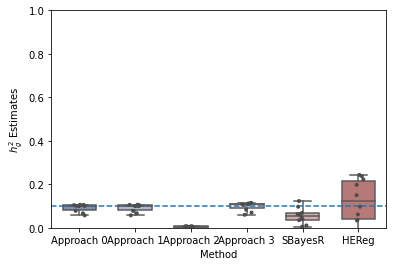

In [253]:
res_p1 = evaluate_heritability_w_simulations(0.1, 10)
plot_heritability_boxplot(res_p1, true_h2=0.1)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Warning (Iteration 4): ELBO dropped from -692.256083 to -692.259178!
Warning (Iteration 5): ELBO dropped from -692.259178 to -692.261759!
Warning (Iteration 6): ELBO dropped from -692.261759 to -692.264316!
Warning (Iteration 7): ELBO dropped from -692.264316 to -692.266857!
Warning (Iteration 8): ELBO dropped from -692.266857 to -692.269382!
Warning (Iteration 9): ELBO dropped from -692.269382 to -692.271891!
Warning (Iteration 10): ELBO dropped from -692.271891 to -692.274384!
Warning (Iteration 11): ELBO dropped from -692.274384 to -692.276862!
Warning (Iteration 12): ELBO dropped from -692.276862 to -692.279325!
Warning (Iteration 13): ELBO dropped from -692.279325 to -692.281772!
Warning (Iteration 14): ELBO dropped from -692.281772 to -692.284204!
The optimization is halted due to numerical instabilities!


 10%|█         | 1/10 [01:50<16:35, 110.66s/it]

Warning (Iteration 2): ELBO dropped from -689.501187 to -689.743374!
Max iterations reached without convergence. You may need to run the model for more iterations.


 20%|██        | 2/10 [03:53<15:14, 114.27s/it]

Warning (Iteration 2): ELBO dropped from -690.586240 to -690.650038!
Warning (Iteration 4): ELBO dropped from -690.586864 to -690.589759!
Warning (Iteration 5): ELBO dropped from -690.589759 to -690.590748!
Warning (Iteration 6): ELBO dropped from -690.590748 to -690.591771!
Warning (Iteration 7): ELBO dropped from -690.591771 to -690.592792!
Warning (Iteration 8): ELBO dropped from -690.592792 to -690.593806!
Warning (Iteration 9): ELBO dropped from -690.593806 to -690.594813!
Warning (Iteration 10): ELBO dropped from -690.594813 to -690.595814!
Warning (Iteration 11): ELBO dropped from -690.595814 to -690.596810!
Warning (Iteration 12): ELBO dropped from -690.596810 to -690.597799!
Warning (Iteration 13): ELBO dropped from -690.597799 to -690.598782!
The optimization is halted due to numerical instabilities!


 30%|███       | 3/10 [05:44<13:13, 113.32s/it]

Warning (Iteration 2): ELBO dropped from -687.771590 to -688.174309!
Max iterations reached without convergence. You may need to run the model for more iterations.


 40%|████      | 4/10 [07:49<11:40, 116.73s/it]

Warning (Iteration 2): ELBO dropped from -689.753211 to -689.964069!
Max iterations reached without convergence. You may need to run the model for more iterations.


 50%|█████     | 5/10 [09:49<09:48, 117.77s/it]

Warning (Iteration 2): ELBO dropped from -689.365173 to -689.574928!
Max iterations reached without convergence. You may need to run the model for more iterations.


 60%|██████    | 6/10 [11:53<07:59, 119.80s/it]

Warning (Iteration 2): ELBO dropped from -688.275712 to -688.659983!
Max iterations reached without convergence. You may need to run the model for more iterations.


 70%|███████   | 7/10 [13:59<06:04, 121.46s/it]

Warning (Iteration 2): ELBO dropped from -688.532978 to -688.890924!
Max iterations reached without convergence. You may need to run the model for more iterations.


 80%|████████  | 8/10 [16:00<04:02, 121.31s/it]

Warning (Iteration 2): ELBO dropped from -688.575337 to -688.961011!
Max iterations reached without convergence. You may need to run the model for more iterations.


 90%|█████████ | 9/10 [18:05<02:02, 122.45s/it]

Warning (Iteration 2): ELBO dropped from -684.764596 to -685.608276!
Max iterations reached without convergence. You may need to run the model for more iterations.


100%|██████████| 10/10 [20:07<00:00, 120.73s/it]


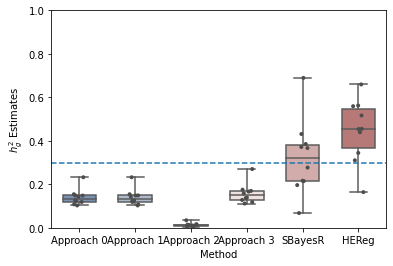

In [252]:
res_p3 = evaluate_heritability_w_simulations(0.3, 10)
plot_heritability_boxplot(res_p3, true_h2=0.3)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Warning (Iteration 2): ELBO dropped from -685.948953 to -686.680548!
Max iterations reached without convergence. You may need to run the model for more iterations.


 10%|█         | 1/10 [02:08<19:19, 128.79s/it]

Warning (Iteration 2): ELBO dropped from -687.479282 to -687.961877!
Max iterations reached without convergence. You may need to run the model for more iterations.


 20%|██        | 2/10 [04:14<17:03, 128.00s/it]

Warning (Iteration 2): ELBO dropped from -686.345565 to -686.982173!
Max iterations reached without convergence. You may need to run the model for more iterations.


 30%|███       | 3/10 [06:22<14:54, 127.75s/it]

Warning (Iteration 2): ELBO dropped from -688.880415 to -689.213447!
Max iterations reached without convergence. You may need to run the model for more iterations.


 40%|████      | 4/10 [08:24<12:37, 126.28s/it]

Warning (Iteration 2): ELBO dropped from -686.966624 to -687.494589!
Max iterations reached without convergence. You may need to run the model for more iterations.


 50%|█████     | 5/10 [10:29<10:28, 125.65s/it]

Warning (Iteration 2): ELBO dropped from -687.608819 to -688.103562!
Max iterations reached without convergence. You may need to run the model for more iterations.


 60%|██████    | 6/10 [12:33<08:20, 125.15s/it]

Warning (Iteration 2): ELBO dropped from -684.371426 to -685.205512!
Max iterations reached without convergence. You may need to run the model for more iterations.


 70%|███████   | 7/10 [14:36<06:13, 124.47s/it]

Warning (Iteration 2): ELBO dropped from -678.214375 to -680.075178!
Max iterations reached without convergence. You may need to run the model for more iterations.


 80%|████████  | 8/10 [16:41<04:09, 124.82s/it]

Warning (Iteration 2): ELBO dropped from -682.654843 to -683.688147!
Max iterations reached without convergence. You may need to run the model for more iterations.


 90%|█████████ | 9/10 [18:42<02:03, 123.59s/it]

Warning (Iteration 2): ELBO dropped from -688.170384 to -688.551859!
Max iterations reached without convergence. You may need to run the model for more iterations.


100%|██████████| 10/10 [20:44<00:00, 124.42s/it]


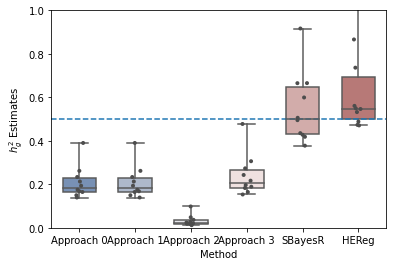

In [251]:
res_p5 = evaluate_heritability_w_simulations(0.5, 10)
plot_heritability_boxplot(res_p5, true_h2=0.5)

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Warning (Iteration 2): ELBO dropped from -685.746135 to -686.497140!
Max iterations reached without convergence. You may need to run the model for more iterations.


 20%|██        | 1/5 [14:32<58:10, 872.70s/it]

Warning (Iteration 2): ELBO dropped from -680.145389 to -681.732560!
Max iterations reached without convergence. You may need to run the model for more iterations.


 40%|████      | 2/5 [29:10<43:42, 874.21s/it]

Warning (Iteration 2): ELBO dropped from -682.992866 to -684.071308!
Max iterations reached without convergence. You may need to run the model for more iterations.


 60%|██████    | 3/5 [43:54<29:14, 877.31s/it]

Warning (Iteration 2): ELBO dropped from -683.445680 to -684.485534!
Max iterations reached without convergence. You may need to run the model for more iterations.


 80%|████████  | 4/5 [58:52<14:43, 883.45s/it]

Warning (Iteration 2): ELBO dropped from -682.012330 to -683.183330!
Max iterations reached without convergence. You may need to run the model for more iterations.


100%|██████████| 5/5 [1:14:10<00:00, 890.04s/it]


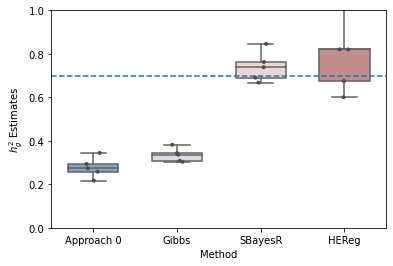

In [12]:
res_p7 = evaluate_heritability_w_simulations(0.7, 5)
plot_heritability_boxplot(res_p7, true_h2=0.7)

Max iterations reached without convergence. You may need to run the model for more iterations.


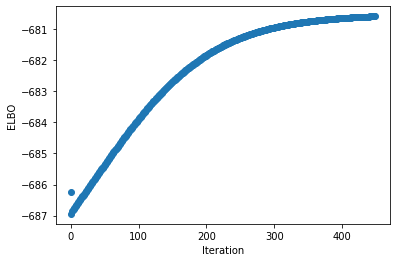

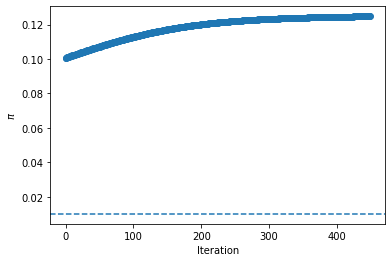

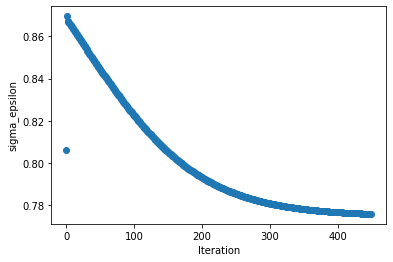

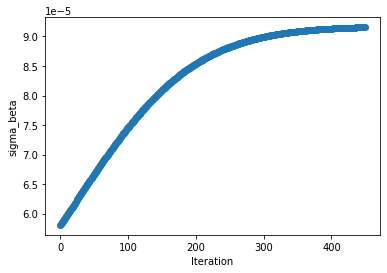

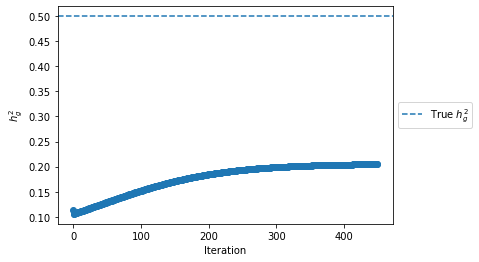

In [6]:
#vs = vem_prs_sbayes(gs)
vs.fit(max_iter=300, continued=True)
plot_history(vs)

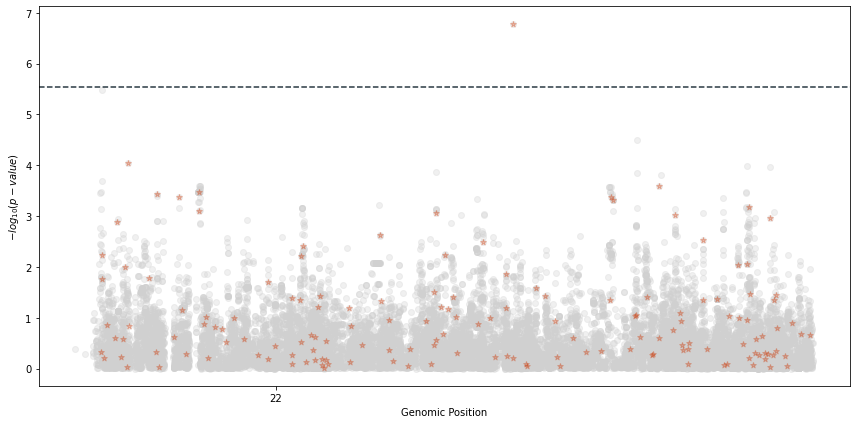

In [31]:
plot_manhattan(gs, hl_snps=gs.get_causal_status())

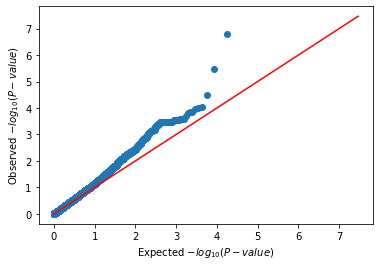

In [32]:
plot_qq(gs, quantity='p_value')

Max iterations reached without convergence. You may need to run the model for more iterations.


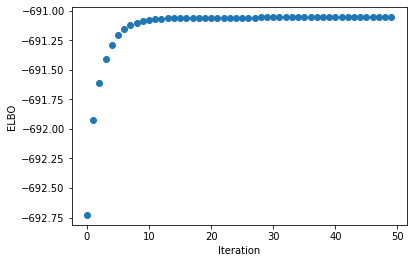

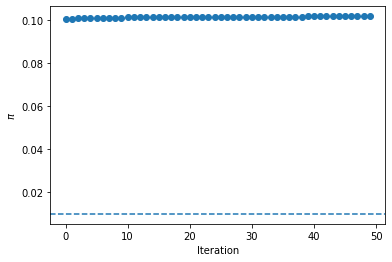

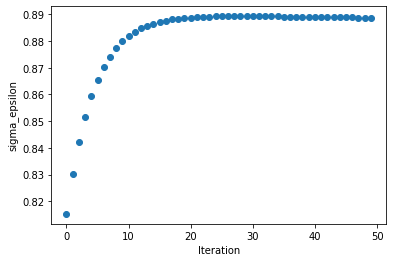

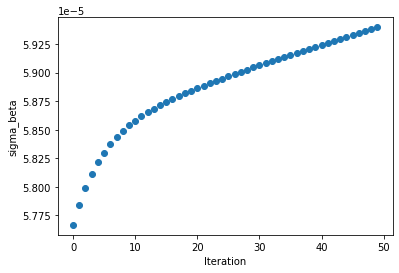

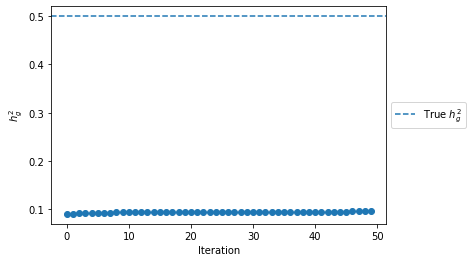

In [3]:
vc = vem_prs_cs(gs)
vc.fit(max_iter=50)
plot_history(vc)

Max iterations reached without convergence. You may need to run the model for more iterations.


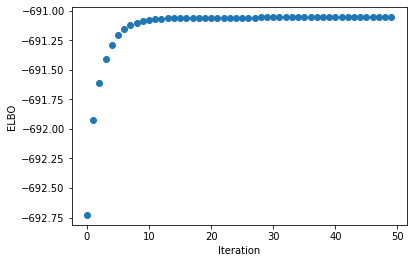

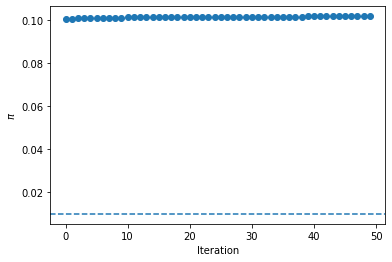

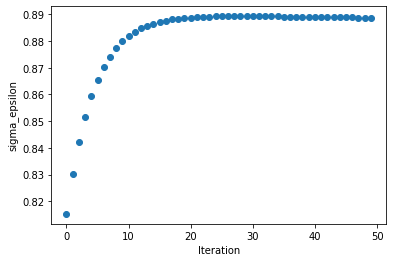

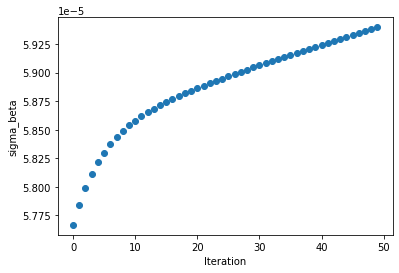

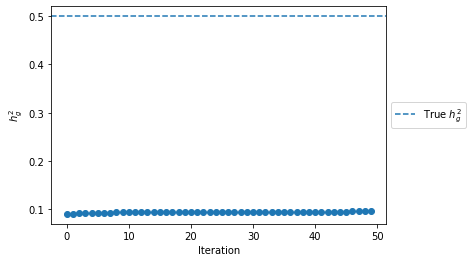

In [4]:
vc2 = vem_prs(gs, scale_prior=True)
vc2.fit(max_iter=50)
plot_history(vc2)

In [10]:
np.allclose(np.array(vc.history['ELBO']), np.array(vc2.history['ELBO']))

True

Max iterations reached without convergence. You may need to run the model for more iterations.


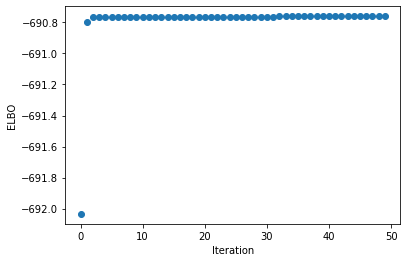

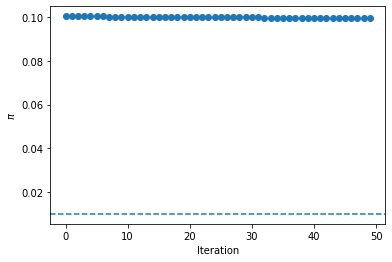

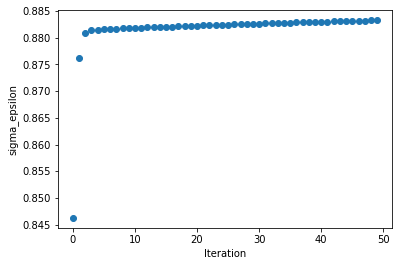

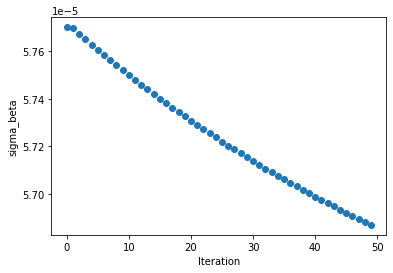

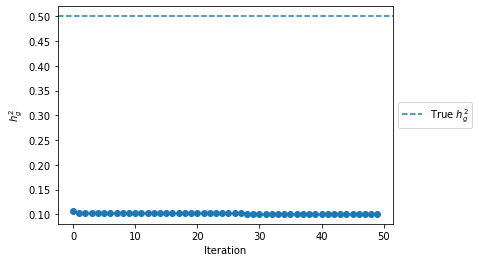

In [5]:
v = vem_prs(gs)
v.fit(max_iter=50)
plot_history(v)

In [19]:
gs.get_ld_matrices()[22]

<zarr.core.Array (17489, 17489) float32>

In [12]:
gs.get_ld_matrices()

Max iterations reached without convergence. You may need to run the model for more iterations.


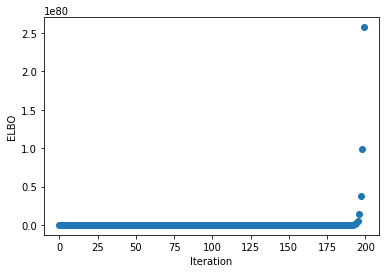

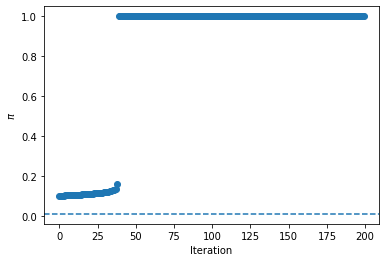

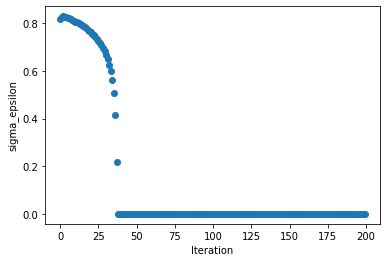

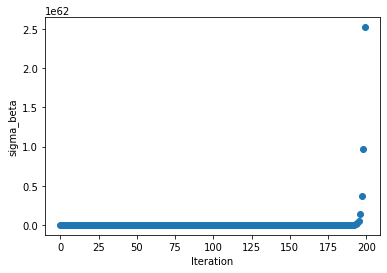

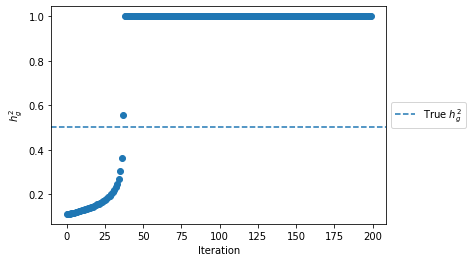

In [28]:
v = vem_prs(gs)
v.fit(max_iter=200)
plot_history(v)

100%|██████████| 400/400 [02:52<00:00,  2.32it/s]


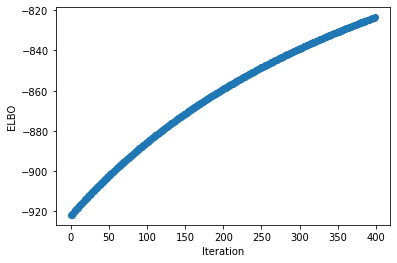

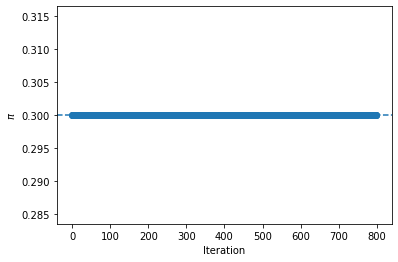

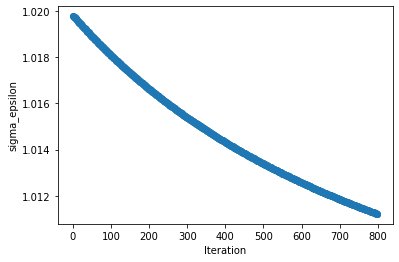

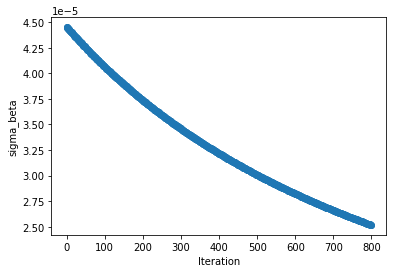

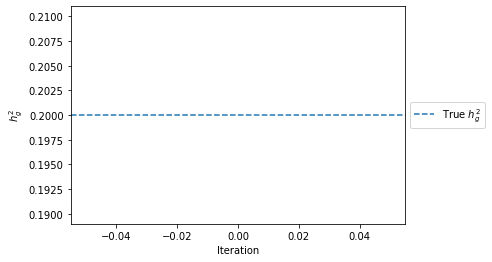

In [6]:
import copy

def fit_vem_prs(v, max_iter=100):
    
    v.initialize()
    elbo = []
    
    for i in tqdm(range(max_iter)):
        
        e_count = 0
        m_count = 0
        
        # E-Step:
        curr_mu_beta = copy.deepcopy(v.var_mu_beta[22])
        curr_gamma = copy.deepcopy(v.var_gamma[22])
        curr_sigma_beta = copy.deepcopy(v.var_sigma_beta[22])
        
        v.e_step()
        e_count += 1
        
        while not all([np.allclose(v.var_mu_beta[22], curr_mu_beta),
                       np.allclose(curr_gamma, v.var_gamma[22]),
                       np.allclose(curr_sigma_beta, v.var_sigma_beta[22])]):
            curr_mu_beta = copy.deepcopy(v.var_mu_beta[22])
            curr_gamma = copy.deepcopy(v.var_gamma[22])
            curr_sigma_beta = copy.deepcopy(v.var_sigma_beta[22])

            v.e_step()
            e_count += 1
        
        curr_pi = copy.deepcopy(v.pi)
        curr_sig_beta = copy.deepcopy(v.sigma_beta)
        curr_sig_epsilon = copy.deepcopy(v.sigma_epsilon)
        
        v.m_step()
        m_count += 1
        
        while not all([np.allclose(curr_pi, v.pi),
                       np.allclose(curr_sig_beta, v.sigma_beta),
                       np.allclose(curr_sig_epsilon, v.sigma_epsilon)]):
            curr_pi = copy.deepcopy(v.pi)
            curr_sig_beta = copy.deepcopy(v.sigma_beta)
            curr_sig_epsilon = copy.deepcopy(v.sigma_epsilon)

            v.m_step()
            m_count += 1
        
        elbo.append(v.objective())
        if len(elbo) > 1:
            if np.allclose(elbo[-1], elbo[-2], atol=1e-6):
                print("Converged!")
                break
        

v = vem_prs_cs(gs, fix_params={'pi': 0.3})
fit_vem_prs(v, max_iter=400)
plot_history(v)


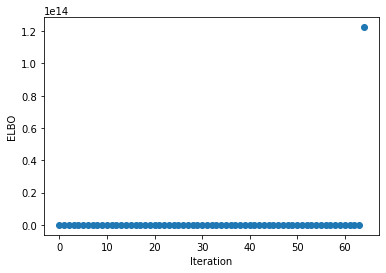

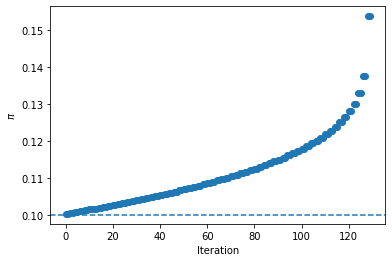

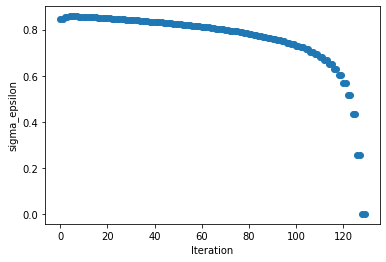

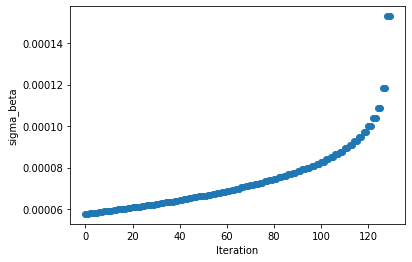

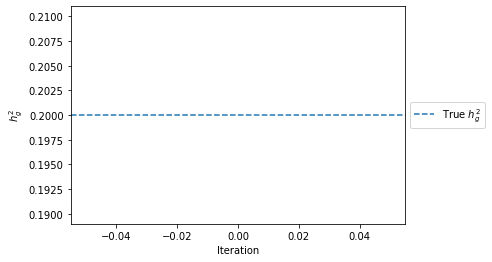

In [21]:
plot_history(v)

In [16]:
v.var_gamma[22]

array([0.09850298, 0.1079332 , 0.0991311 , ..., 0.09855312, 0.10002068,
       0.09977797])

In [7]:
v.var_gamma[22]

array([0.999999, 0.999999, 0.999999, ..., 0.999999, 0.999999, 0.999999])

In [5]:
gs2 = GWASSimulator("../data/1000G_EUR_Phase3_plink/1000G.EUR.QC.22.bed",
                   ld_store_files="temp/ld/chr_22/",
                   keep_snps="../data/w_snplist_no_MHC.snplist.bz2", #"../data/w_snplist_no_MHC.snplist.bz2", 
                   h2g=0.2)
gs2.simulate()
gs2.get_ld_matrices()

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:03,  3.54s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...


100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


> Reading LD matrices...


{22: <zarr.core.Array (17489,) object>}

In [6]:
import zarr
gs2.ld[22] = zarr.open('temp/ld/chr_22/')

Max iterations reached without convergence. You may need to run the model for more iterations.


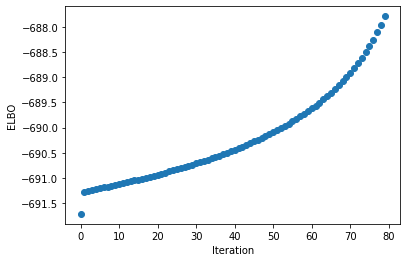

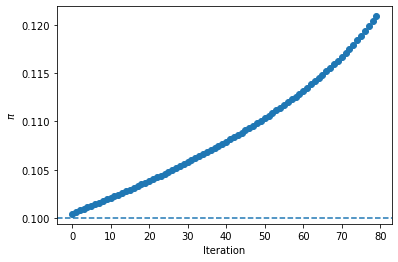

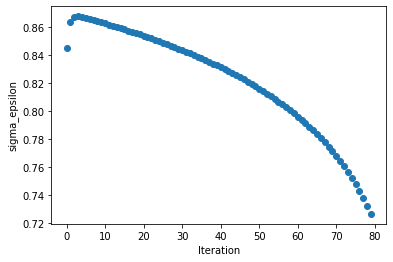

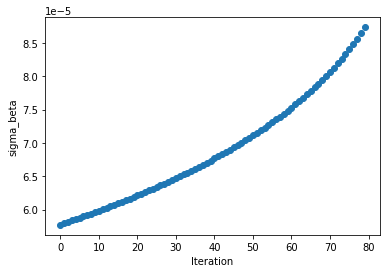

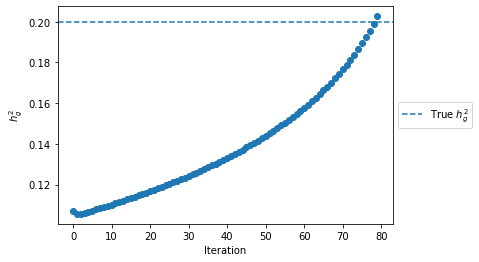

In [7]:
vss = vem_prs_ss(gs2)
vss.fit(max_iter=80)
plot_history(vss)

Max iterations reached without convergence. You may need to run the model for more iterations.


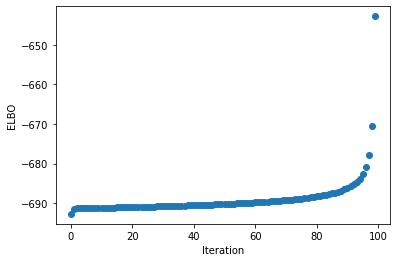

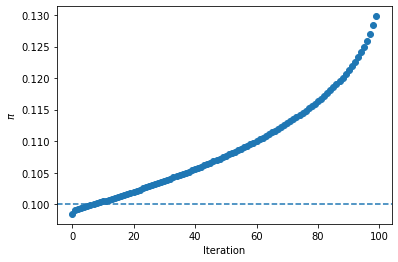

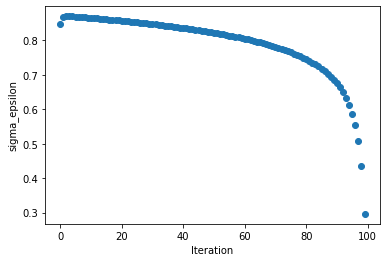

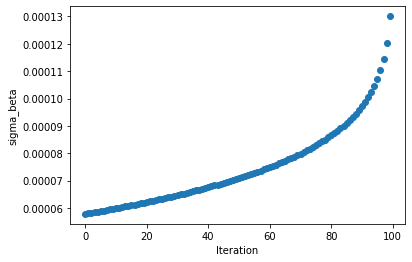

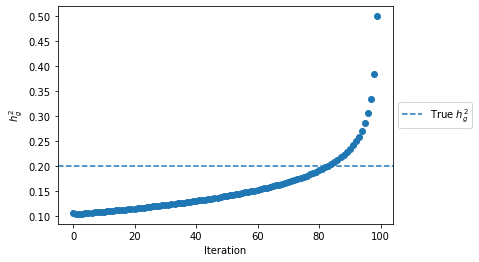

In [13]:
vss.fit(max_iter=100, vectorize=True)
plot_history(vss)

# Testing Models:

In [376]:
models = [TrueBetaPRS(gs), 
          PLINK_PT(gs), 
          MarginalBetaPRS(gs), 
          vem_prs_ss(gs), 
          SBayesR(gs,ldm="gctb_2.0_tutorial/ldm/sparse/chr22/1000G_eur_chr22.ldm.sparse"), 
          LASSOSum(gs)]
h2_models = [LDSCHeritability(gs, ref_ld_scores="data/1000G_EUR_Phase3_baseline/baseline",
                              w_ld_scores="data/1000G_Phase3_weights_hm3_no_MHC/weights.hm3_noMHC"), 
             HERegression(gs), 
             vem_prs_ss(gs), 
             SBayesR(gs, ldm="gctb_2.0_tutorial/ldm/sparse/chr22/1000G_eur_chr22.ldm.sparse")]

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Max iterations reached without convergence. You may need to run the model for more iterations.


 20%|██        | 1/5 [00:33<02:13, 33.32s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.


 40%|████      | 2/5 [01:06<01:39, 33.33s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.


 60%|██████    | 3/5 [01:41<01:07, 33.85s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.


 80%|████████  | 4/5 [02:16<00:34, 34.23s/it]

Max iterations reached without convergence. You may need to run the model for more iterations.


100%|██████████| 5/5 [02:50<00:00, 34.06s/it]


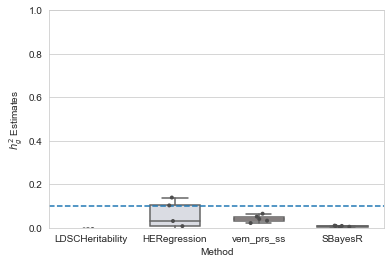

In [377]:
gs.h2g = 0.1
res = evaluate_heritability_w_simulations(h2_models, gs, n_traits=5)
plot_heritability_boxplot(res, true_h2=0.1)

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 63 | ELBO: -657.0247006981389


 20%|██        | 1/5 [00:05<00:22,  5.72s/it]

Converged at iteration 26 | ELBO: -652.8106120246434


 40%|████      | 2/5 [00:09<00:15,  5.08s/it]

Converged at iteration 38 | ELBO: -673.8990295830297


 60%|██████    | 3/5 [00:13<00:09,  4.93s/it]

Converged at iteration 43 | ELBO: -646.6368282401116


 80%|████████  | 4/5 [00:18<00:04,  4.82s/it]

Converged at iteration 134 | ELBO: -654.2816754082332


100%|██████████| 5/5 [00:28<00:00,  5.79s/it]


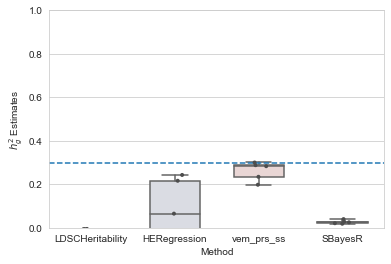

In [378]:
gs.h2g = 0.3
res = evaluate_heritability_w_simulations(h2_models, gs, n_traits=5)
plot_heritability_boxplot(res, true_h2=0.3)

In [379]:
gs.h2g = 0.5
res = evaluate_heritability_w_simulations(h2_models, gs, n_traits=5)
plot_heritability_boxplot(res, true_h2=0.5)

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 94 | ELBO: -586.5806637227972


  0%|          | 0/5 [00:07<?, ?it/s]


CalledProcessError: Command '
            gctb_2.0/gctb --sbayes R                  --ldm gctb_2.0_tutorial/ldm/sparse/chr22/1000G_eur_chr22.ldm.sparse                  --pi 0.95,0.02,0.02,0.01                  --gamma 0.0,0.01,0.1,1                  --gwas-summary temp/sbayesr/Simulated_102.ma                  --chain-length 10000                  --burn-in 2000                  --out-freq 100                  --out temp/sbayesr/Simulated_102
        ' returned non-zero exit status 0.

# LDPred Simulated Datasets

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:01,  1.16s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


Converged at iteration 30 | ELBO: -10873.210167


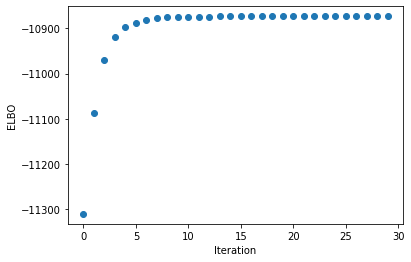

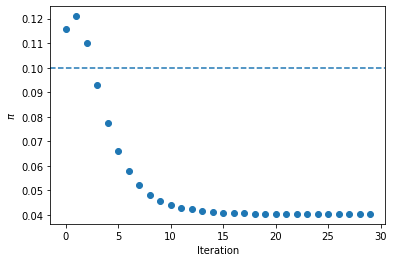

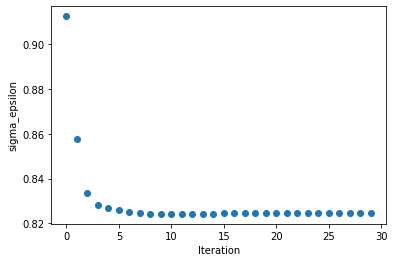

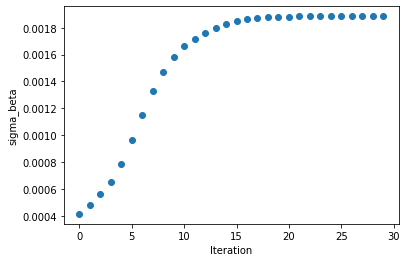

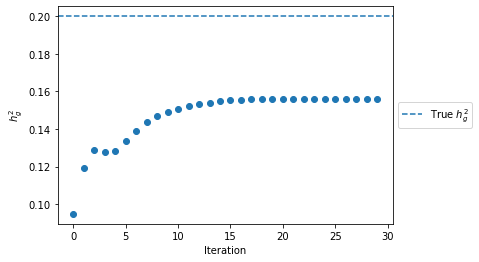

In [59]:
ldp_gs1 = GWASSimulator("ldpred/tests/test_data/sim1_0_train",
                        shrink_ld=False, temp_dir='temp/LDPredData/sim_1/')
ldp_gs1.simulate()
vc = vem_prs(ldp_gs1)
vc.fit(max_iter=200)
plot_history(vc)

Max iterations reached without convergence. You may need to run the model for more iterations.


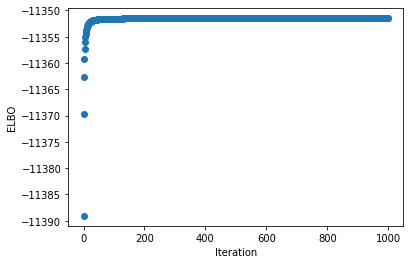

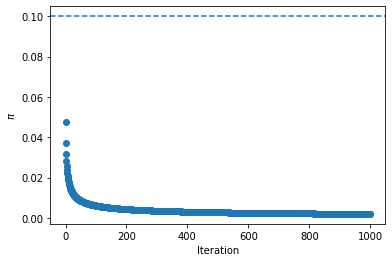

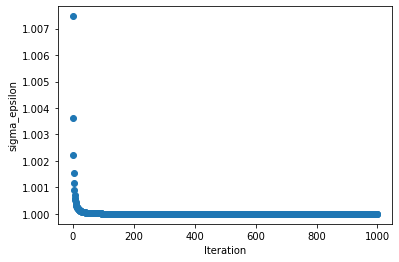

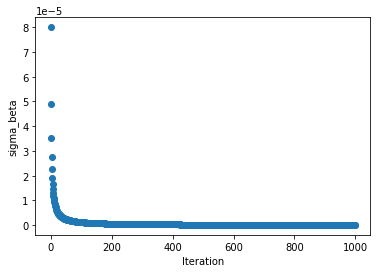

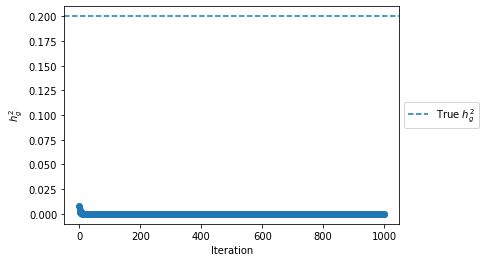

In [3]:
v = vem_prs_cs(ldp_gs1)
v.fit(max_iter=1000)
plot_history(v)

In [4]:
v.history['ELBO']

[-11389.075285204228,
 -11369.765433659744,
 -11362.724705500668,
 -11359.274085951332,
 -11357.288752207009,
 -11356.025102450578,
 -11355.162835867286,
 -11354.54372034829,
 -11354.08155511706,
 -11353.72579571585,
 -11353.445052918754,
 -11353.218912693432,
 -11353.033585697705,
 -11352.879457238003,
 -11352.749640339844,
 -11352.639086232759,
 -11352.544018388944,
 -11352.461561541122,
 -11352.389492087454,
 -11352.32606625808,
 -11352.269899371964,
 -11352.21987942556,
 -11352.175104223144,
 -11352.134834946966,
 -11352.098461399355,
 -11352.065475657582,
 -11352.03545187652,
 -11352.008030641304,
 -11351.98290672701,
 -11351.959819437132,
 -11351.938544913794,
 -11351.918889969462,
 -11351.900687103145,
 -11351.88379044616,
 -11351.868072443005,
 -11351.853421117718,
 -11351.83973780972,
 -11351.82693528851,
 -11351.814936175877,
 -11351.803671619225,
 -11351.793080170926,
 -11351.783106837753,
 -11351.773702271146,
 -11351.764822074922,
 -11351.756426211101,
 -11351.748478488174

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:01,  1.32s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Max iterations reached without convergence. You may need to run the model for more iterations.


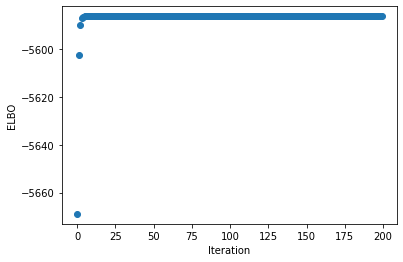

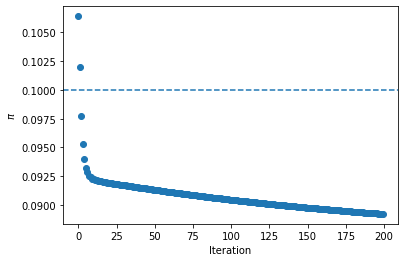

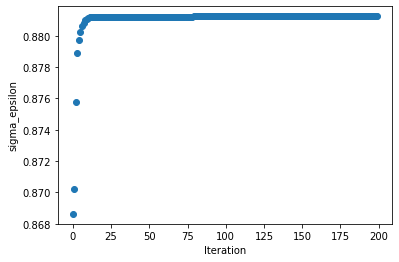

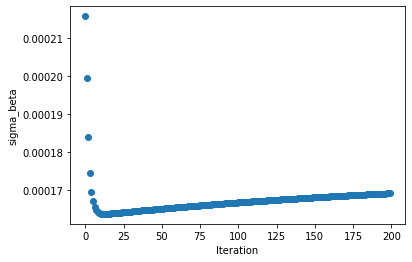

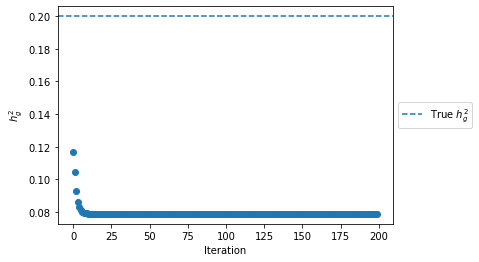

In [27]:
ldp_gs2 = GWASSimulator("ldpred/tests/test_data/sim2_0_train",
                        shrink_ld=False, temp_dir='temp/LDPredData/sim_2/')
ldp_gs2.simulate()
vc = vem_prs(ldp_gs2)
vc.fit(max_iter=200)
plot_history(vc)

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:03,  3.24s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:18<00:00, 18.84s/it]


Converged at iteration 85 | ELBO: -11073.203577


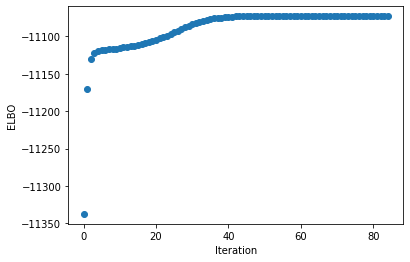

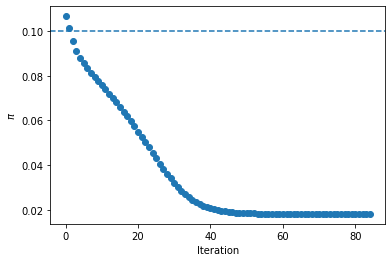

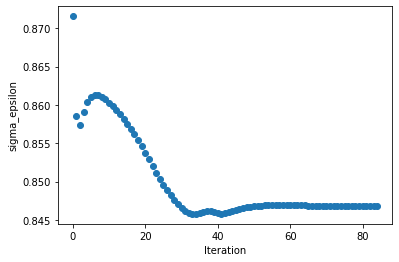

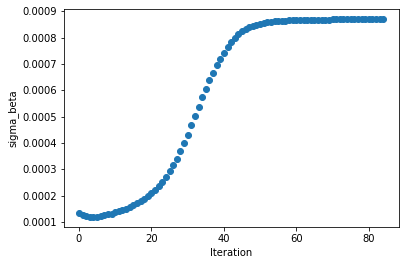

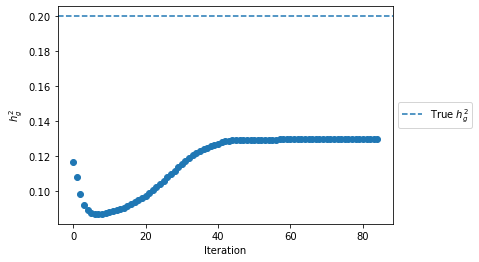

In [28]:
ldp_gs3 = GWASSimulator("ldpred/tests/test_data/sim3_0_train",
                        shrink_ld=False, temp_dir='temp/LDPredData/sim_3/')
ldp_gs3.simulate()
vc = vem_prs(ldp_gs3)
vc.fit(max_iter=200)
plot_history(vc)

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:02,  2.96s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:19<00:00, 19.89s/it]


Converged at iteration 195 | ELBO: -11160.136841


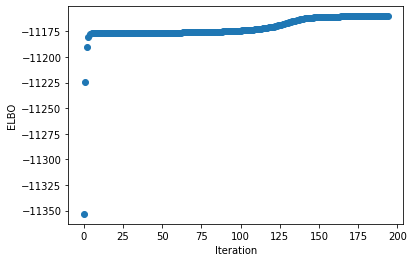

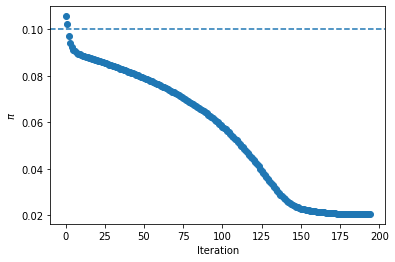

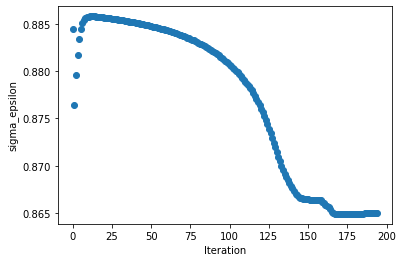

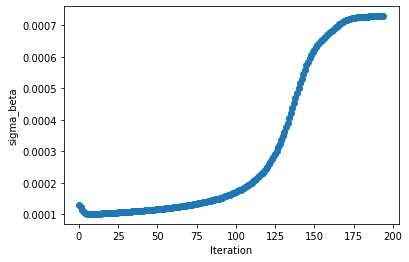

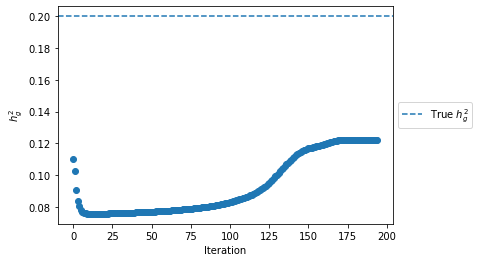

In [29]:
ldp_gs4 = GWASSimulator("ldpred/tests/test_data/sim4_0_train",
                        shrink_ld=False, temp_dir='temp/LDPredData/sim_4/')
ldp_gs4.simulate()
vc = vem_prs(ldp_gs4)
vc.fit(max_iter=200)
plot_history(vc)

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:02,  2.95s/it]
  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:16<00:00, 16.85s/it]


Max iterations reached without convergence. You may need to run the model for more iterations.


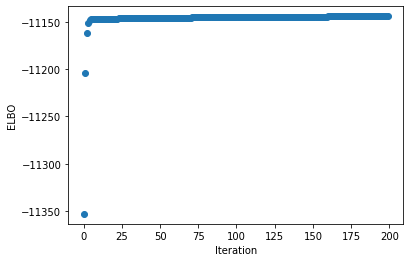

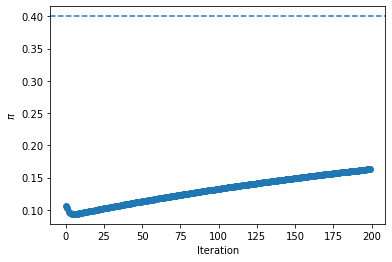

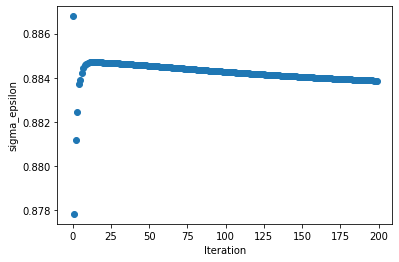

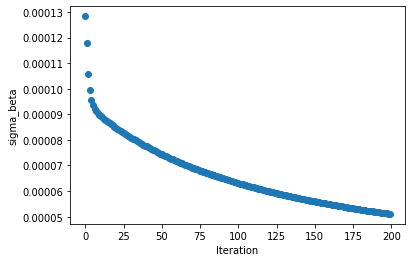

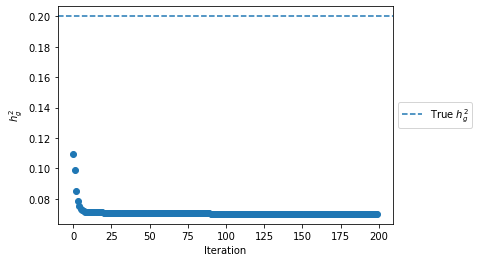

In [32]:
ldp_gs5 = GWASSimulator("ldpred/tests/test_data/sim5_0_train",
                        shrink_ld=False, temp_dir='temp/LDPredData/sim_5/')
ldp_gs5.pis = (0.6, 0.4)
ldp_gs5.simulate(reset_beta=True)
vc = vem_prs(ldp_gs5)
vc.fit(max_iter=200)
plot_history(vc)

# Testing Heritability Estimation

In [2]:
ldp_gs = GWASSimulator("ldpred/tests/test_data/sim1_0_train",
                        shrink_ld=False, temp_dir='temp/LDPredData/sim_1/')
ldp_gs.simulate()

0it [00:00, ?it/s]

> Reading genotype files...


1it [00:00,  1.42it/s]


In [3]:
vc = vem_prs(ldp_gs)
vc.beta_hat, ldp_gs.beta_hats

  0%|          | 0/1 [00:00<?, ?it/s]

> Computing LD boundaries...
> Computing LD matrices...


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


({1: SNP_ID_1_1       0.016715
  SNP_ID_1_2       0.013809
  SNP_ID_1_3       0.014118
  SNP_ID_1_4       0.017505
  SNP_ID_1_5       0.007523
                     ...   
  SNP_ID_1_1996   -0.071663
  SNP_ID_1_1997   -0.080252
  SNP_ID_1_1998   -0.072806
  SNP_ID_1_1999   -0.059991
  SNP_ID_1_2000   -0.067868
  Length: 2000, dtype: float64},
 {1: SNP_ID_1_1       0.016715
  SNP_ID_1_2       0.013809
  SNP_ID_1_3       0.014118
  SNP_ID_1_4       0.017505
  SNP_ID_1_5       0.007523
                     ...   
  SNP_ID_1_1996   -0.071663
  SNP_ID_1_1997   -0.080252
  SNP_ID_1_1998   -0.072806
  SNP_ID_1_1999   -0.059991
  SNP_ID_1_2000   -0.067868
  Length: 2000, dtype: float64})

In [4]:
ldp_gs.simulate()
vc.beta_hat, ldp_gs.beta_hats

({1: SNP_ID_1_1       0.016715
  SNP_ID_1_2       0.013809
  SNP_ID_1_3       0.014118
  SNP_ID_1_4       0.017505
  SNP_ID_1_5       0.007523
                     ...   
  SNP_ID_1_1996   -0.071663
  SNP_ID_1_1997   -0.080252
  SNP_ID_1_1998   -0.072806
  SNP_ID_1_1999   -0.059991
  SNP_ID_1_2000   -0.067868
  Length: 2000, dtype: float64},
 {1: SNP_ID_1_1       0.004712
  SNP_ID_1_2      -0.000175
  SNP_ID_1_3       0.000316
  SNP_ID_1_4       0.017160
  SNP_ID_1_5       0.008190
                     ...   
  SNP_ID_1_1996   -0.050744
  SNP_ID_1_1997   -0.054398
  SNP_ID_1_1998   -0.051026
  SNP_ID_1_1999   -0.045764
  SNP_ID_1_2000   -0.059546
  Length: 2000, dtype: float64})

In [5]:
vc.initialize()
vc.beta_hat, ldp_gs.beta_hats

({1: SNP_ID_1_1       0.004712
  SNP_ID_1_2      -0.000175
  SNP_ID_1_3       0.000316
  SNP_ID_1_4       0.017160
  SNP_ID_1_5       0.008190
                     ...   
  SNP_ID_1_1996   -0.050744
  SNP_ID_1_1997   -0.054398
  SNP_ID_1_1998   -0.051026
  SNP_ID_1_1999   -0.045764
  SNP_ID_1_2000   -0.059546
  Length: 2000, dtype: float64},
 {1: SNP_ID_1_1       0.004712
  SNP_ID_1_2      -0.000175
  SNP_ID_1_3       0.000316
  SNP_ID_1_4       0.017160
  SNP_ID_1_5       0.008190
                     ...   
  SNP_ID_1_1996   -0.050744
  SNP_ID_1_1997   -0.054398
  SNP_ID_1_1998   -0.051026
  SNP_ID_1_1999   -0.045764
  SNP_ID_1_2000   -0.059546
  Length: 2000, dtype: float64})

Converged at iteration 126 | ELBO: -10823.815556829304


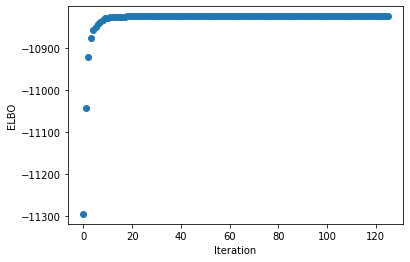

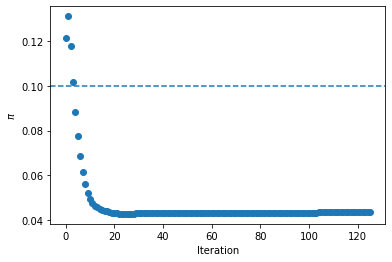

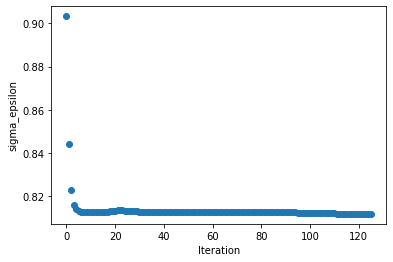

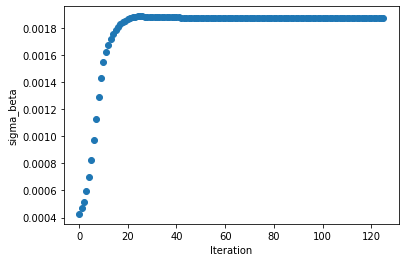

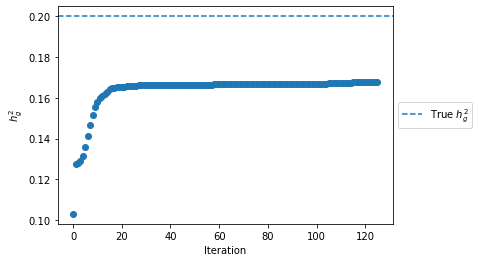

In [5]:
vp.fit()
plot_history(vp)

Converged at iteration 126 | ELBO: -10823.815557


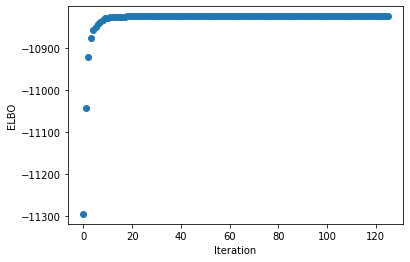

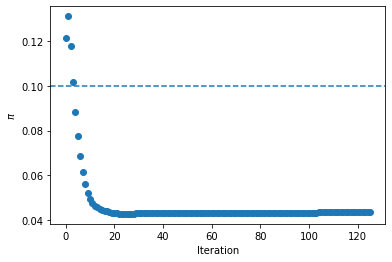

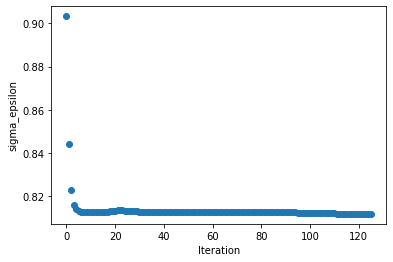

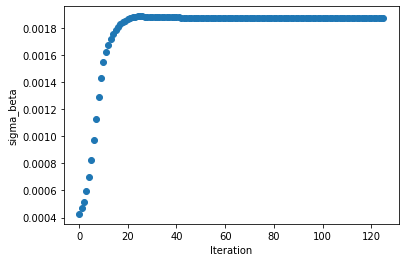

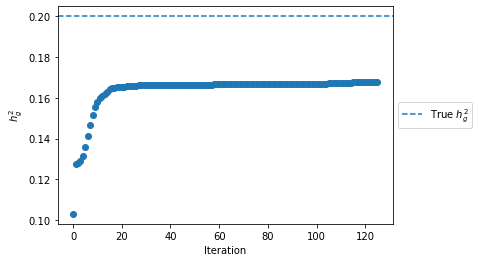

In [6]:
vc.fit()
plot_history(vc)

In [10]:
import copy
mu_beta = np.random.normal(size=len(vp.var_mu_beta[1]))
sig_beta = np.random.uniform(size=len(vp.var_mu_beta[1]))
gamma = np.random.uniform(size=len(vp.var_mu_beta[1]))

vp.var_mu_beta[1] = copy.deepcopy(mu_beta)
vc.var_mu_beta[1] = copy.deepcopy(mu_beta)
vp.var_sigma_beta[1] = copy.deepcopy(sig_beta)
vc.var_sigma_beta[1] = copy.deepcopy(sig_beta)
vp.var_gamma[1] = copy.deepcopy(gamma)
vc.var_gamma[1] = copy.deepcopy(gamma)

vp.pi = 0.1
vc.pi = 0.1
vp.sigma_beta = 0.001
vc.sigma_beta = 0.001
vp.sigma_epsilon = 0.8
vc.sigma_epsilon = 0.8

In [13]:
vp.m_step(), vc.m_step()

(None, None)

In [6]:
vp.get_heritability(), vc.get_heritability()

(0.9994827841752008, 0.9994827841752008)

In [14]:
vp.objective(), vc.objective()

(-44899.401010024456, -44899.394090727226)

In [14]:
vc.m_step()
vc.ld_prod

78.07601937674485

In [15]:
gamma_mu = vp.var_gamma[1]*vp.var_mu_beta[1]
2.*np.dot(gamma_mu, vp.R_triu[1].dot(gamma_mu))

78.07601937674531

In [21]:
check_allclose_e(), check_allclose_m()

((True, True, True), (False, False, False))

In [7]:
(vp.pi, vc.pi), (vp.sigma_beta, vc.sigma_beta), (vp.sigma_epsilon, vc.sigma_epsilon)

((0.1, 0.1), (0.001, 0.001), (0.8, 0.8))

In [12]:
vc.var_mu_beta[1], vp.var_mu_beta[1]

(array([ 0.92037795,  0.56528039, -0.07319743, ...,  0.73272568,
        -0.87389891, -0.22158422]),
 array([-1.4139931 ,  0.08069414, -0.20305094, ...,  0.64237114,
        -0.52489908, -0.2380028 ]))

In [11]:
print(check_allclose_e(), check_allclose_m())
vc.e_step()
vp.e_step_loop()
vc.m_step()
vp.m_step()
check_allclose_e(), check_allclose_m(), vp.objective(), vc.objective()

(True, True, True) (True, True, True)


((False, True, False),
 (False, False, False),
 -41440.03758213648,
 -43617.686495064525)

In [10]:
def check_allclose_e():
    return np.allclose(vp.var_mu_beta[1], vc.var_mu_beta[1]), np.allclose(vp.var_sigma_beta[1], vc.var_sigma_beta[1]), np.allclose(vp.var_gamma[1], vc.var_gamma[1])

def check_allclose_m():
    return np.allclose(vp.pi, vc.pi), np.allclose(vp.sigma_beta, vc.sigma_beta), np.allclose(vp.sigma_epsilon, vc.sigma_epsilon)

In [25]:
print(check_allclose_e(), check_allclose_m())
vp.e_step_loop(), vc.e_step()
print(check_allclose_e(), check_allclose_m())

(False, True, True) (True, True, True)
(False, True, True) (True, True, True)


In [26]:
print(check_allclose_e(), check_allclose_m())
vp.m_step(), vc.m_step()
print(check_allclose_e(), check_allclose_m())

(False, True, True) (True, True, True)
(False, True, True) (True, True, True)


In [28]:
vp.var_mu_beta[1], vc.var_mu_beta[1]

(array([-0.1673912 , -0.12924021, -0.08966061, ..., -0.01969038,
         0.02635708,  0.03157538]),
 array([-0.16739094, -0.12923999, -0.08966045, ..., -0.01969061,
         0.02635672,  0.03157535]))

In [12]:
np.allclose(vp.R_zero_diag[1][200], vc.ld[1][200])

False

In [29]:
var_prod = np.multiply(vc.var_gamma[1], vc.var_mu_beta[1])
ld_bound = vc.ld_bounds[1]
Di = vc.ld[1][200]
np.dot(Di, var_prod[ld_bound[0, 200]: ld_bound[1, 200]]) - Di[200 - ld_bound[0, 200]]*var_prod[200]

0.7512932934606795

In [24]:
var_prod[200], (vp.var_gamma[1]*vp.var_mu_beta[1])[200]

(1.2004102550380358, 1.2004102550380358)

In [19]:
vp.R_zero_diag[1][200, :].dot(vp.var_gamma[1]*vp.var_mu_beta[1])

0.7512932934607771

In [20]:
ldp_gs.ld[1][200, :].dot(vp.var_gamma[1]*vp.var_mu_beta[1])

1.9517035484988132

In [35]:
vp.fit(), vc.fit()

Converged at iteration 31 | ELBO: -9271.320519561268
Converged at iteration 40 | ELBO: -9285.741304


(<vem.vem_prs_ss at 0x7f846c6b1fa0>, <vem_c.vem_prs at 0x7f8435fa5650>)

In [36]:
vp.get_heritability(), vc.get_heritability()

(0.46110688421821217, 0.4504841722625601)

In [37]:
vp.var_mu_beta[1], vc.var_mu_beta[1]

(array([-0.00825681, -0.01193223, -0.00280466, ...,  0.00221281,
         0.00634235,  0.01302149]),
 array([-0.00769133, -0.01302343, -0.00280742, ...,  0.00246413,
         0.00743471,  0.01503045]))

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 42 | ELBO: -11188.865886142288
Converged at iteration 42 | ELBO: -11188.865886


 10%|█         | 1/10 [00:12<01:52, 12.55s/it]

Converged at iteration 40 | ELBO: -11224.671398889792
Converged at iteration 40 | ELBO: -11224.671399


 20%|██        | 2/10 [00:25<01:40, 12.57s/it]

Converged at iteration 36 | ELBO: -11193.20228692918
Converged at iteration 36 | ELBO: -11193.202287


 30%|███       | 3/10 [00:36<01:25, 12.16s/it]

Converged at iteration 92 | ELBO: -11208.348117506343
Converged at iteration 92 | ELBO: -11208.348118


 40%|████      | 4/10 [00:54<01:23, 13.94s/it]

Converged at iteration 40 | ELBO: -11224.638635172632
Converged at iteration 40 | ELBO: -11224.638635


 50%|█████     | 5/10 [01:06<01:06, 13.31s/it]

Converged at iteration 47 | ELBO: -11204.365669765139
Converged at iteration 47 | ELBO: -11204.365670


 60%|██████    | 6/10 [01:18<00:51, 13.00s/it]

Converged at iteration 35 | ELBO: -11183.534933580268
Converged at iteration 35 | ELBO: -11183.534934


 70%|███████   | 7/10 [01:29<00:37, 12.40s/it]

Converged at iteration 33 | ELBO: -11176.125319468654
Converged at iteration 33 | ELBO: -11176.125319


 80%|████████  | 8/10 [01:40<00:23, 11.89s/it]

Converged at iteration 41 | ELBO: -11222.721712577397
Converged at iteration 41 | ELBO: -11222.721713


 90%|█████████ | 9/10 [01:52<00:11, 11.86s/it]

Converged at iteration 43 | ELBO: -11201.725556845431
Converged at iteration 43 | ELBO: -11201.725557


100%|██████████| 10/10 [02:03<00:00, 12.37s/it]


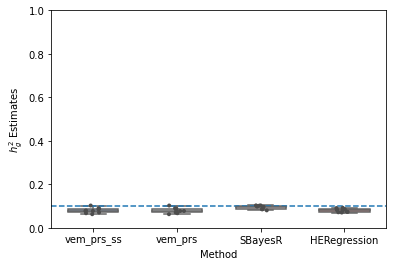

In [7]:
ldp_gs.h2g = 0.1
res = evaluate_heritability_w_simulations([vem_prs_ss(ldp_gs), vem_prs(ldp_gs), SBayesR(ldp_gs), HERegression(ldp_gs)], ldp_gs, n_traits=10)
plot_heritability_boxplot(res, true_h2=0.1)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 48 | ELBO: -10502.16041554322
Converged at iteration 48 | ELBO: -10502.160416


 10%|█         | 1/10 [00:13<02:02, 13.59s/it]

Converged at iteration 60 | ELBO: -10586.158366469506
Converged at iteration 60 | ELBO: -10586.158366


 20%|██        | 2/10 [00:29<01:53, 14.19s/it]

Converged at iteration 35 | ELBO: -10550.217809032336
Converged at iteration 35 | ELBO: -10550.217809


 30%|███       | 3/10 [00:40<01:34, 13.45s/it]

Converged at iteration 32 | ELBO: -10573.92014216944
Converged at iteration 32 | ELBO: -10573.920142


 40%|████      | 4/10 [00:51<01:16, 12.73s/it]

Converged at iteration 56 | ELBO: -10429.598184898314
Converged at iteration 56 | ELBO: -10429.598185


 50%|█████     | 5/10 [01:06<01:06, 13.34s/it]

Converged at iteration 53 | ELBO: -10549.728819147402
Converged at iteration 53 | ELBO: -10549.728819


 60%|██████    | 6/10 [01:20<00:53, 13.39s/it]

Converged at iteration 41 | ELBO: -10449.1545433561
Converged at iteration 41 | ELBO: -10449.154543


 70%|███████   | 7/10 [01:32<00:38, 12.92s/it]

Converged at iteration 57 | ELBO: -10507.70019655567
Converged at iteration 57 | ELBO: -10507.700197


 80%|████████  | 8/10 [01:46<00:26, 13.32s/it]

Converged at iteration 140 | ELBO: -10485.379096152628
Converged at iteration 140 | ELBO: -10485.379096


 90%|█████████ | 9/10 [02:11<00:16, 16.81s/it]

Converged at iteration 54 | ELBO: -10517.593577978208
Converged at iteration 54 | ELBO: -10517.593578


100%|██████████| 10/10 [02:25<00:00, 14.54s/it]


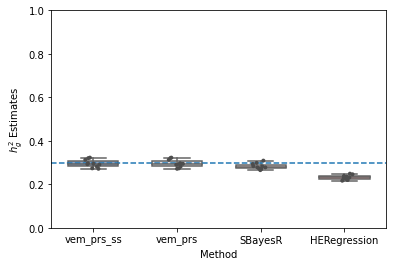

In [8]:
ldp_gs.h2g = 0.3
res = evaluate_heritability_w_simulations([vem_prs_ss(ldp_gs), vem_prs(ldp_gs), SBayesR(ldp_gs), HERegression(ldp_gs)], ldp_gs, n_traits=10)
plot_heritability_boxplot(res, true_h2=0.3)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 71 | ELBO: -9263.970882840453
Converged at iteration 71 | ELBO: -9263.970883


 10%|█         | 1/10 [00:15<02:23, 15.98s/it]

Converged at iteration 55 | ELBO: -9339.967285742357
Converged at iteration 55 | ELBO: -9339.967286


 20%|██        | 2/10 [00:29<02:01, 15.16s/it]

Converged at iteration 48 | ELBO: -9307.53543552558
Converged at iteration 48 | ELBO: -9307.535436


 30%|███       | 3/10 [00:41<01:40, 14.39s/it]

Converged at iteration 135 | ELBO: -9289.560369178716
Converged at iteration 135 | ELBO: -9289.560369


 40%|████      | 4/10 [01:05<01:43, 17.22s/it]

Converged at iteration 62 | ELBO: -9287.456946625705
Converged at iteration 62 | ELBO: -9287.456947


 50%|█████     | 5/10 [01:20<01:22, 16.50s/it]

Converged at iteration 64 | ELBO: -9322.844937375772
Converged at iteration 64 | ELBO: -9322.844937


 60%|██████    | 6/10 [01:35<01:03, 15.98s/it]

Converged at iteration 36 | ELBO: -9223.889860645733
Converged at iteration 36 | ELBO: -9223.889861


 70%|███████   | 7/10 [01:46<00:43, 14.51s/it]

Converged at iteration 24 | ELBO: -9268.461720180818
Converged at iteration 24 | ELBO: -9268.461720


 80%|████████  | 8/10 [01:55<00:25, 12.96s/it]

Converged at iteration 77 | ELBO: -9241.931633477529
Converged at iteration 77 | ELBO: -9241.931633


 90%|█████████ | 9/10 [02:11<00:13, 13.92s/it]

Converged at iteration 24 | ELBO: -9285.661590458822
Converged at iteration 24 | ELBO: -9285.661590


100%|██████████| 10/10 [02:21<00:00, 14.16s/it]


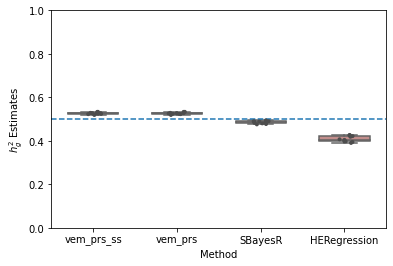

In [9]:
ldp_gs.h2g = 0.5
res = evaluate_heritability_w_simulations([vem_prs_ss(ldp_gs), vem_prs(ldp_gs), SBayesR(ldp_gs), HERegression(ldp_gs)], ldp_gs, n_traits=10)
plot_heritability_boxplot(res, true_h2=0.5)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 58 | ELBO: -7426.228402601264
Converged at iteration 58 | ELBO: -7426.228403


 10%|█         | 1/10 [00:13<02:00, 13.43s/it]

Converged at iteration 36 | ELBO: -7459.9419665969535
Converged at iteration 36 | ELBO: -7459.941967


 20%|██        | 2/10 [00:24<01:41, 12.67s/it]

Converged at iteration 42 | ELBO: -7388.632000796412
Converged at iteration 42 | ELBO: -7388.632001


 30%|███       | 3/10 [00:36<01:27, 12.46s/it]

Converged at iteration 58 | ELBO: -7492.216820397685
Converged at iteration 58 | ELBO: -7492.216820


 40%|████      | 4/10 [00:49<01:16, 12.72s/it]

Converged at iteration 89 | ELBO: -7501.660337722814
Converged at iteration 89 | ELBO: -7501.660338


 50%|█████     | 5/10 [01:07<01:11, 14.24s/it]

Converged at iteration 63 | ELBO: -7440.311278629059
Converged at iteration 63 | ELBO: -7440.311279


 60%|██████    | 6/10 [01:21<00:57, 14.33s/it]

Converged at iteration 55 | ELBO: -7472.382052356446
Converged at iteration 55 | ELBO: -7472.382052


 70%|███████   | 7/10 [01:36<00:42, 14.31s/it]

Converged at iteration 40 | ELBO: -7469.792356828117
Converged at iteration 40 | ELBO: -7469.792357


 80%|████████  | 8/10 [01:48<00:27, 13.60s/it]

Converged at iteration 33 | ELBO: -7469.995344700725
Converged at iteration 33 | ELBO: -7469.995345


 90%|█████████ | 9/10 [01:59<00:12, 12.80s/it]

Converged at iteration 35 | ELBO: -7440.196514372257
Converged at iteration 35 | ELBO: -7440.196514


100%|██████████| 10/10 [02:09<00:00, 12.95s/it]


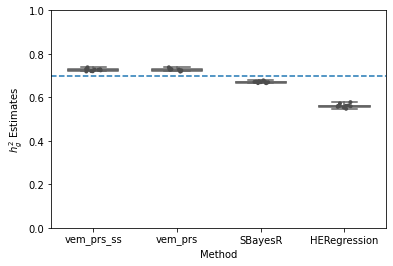

In [10]:
ldp_gs.h2g = 0.7
res = evaluate_heritability_w_simulations([vem_prs_ss(ldp_gs), vem_prs(ldp_gs), SBayesR(ldp_gs), HERegression(ldp_gs)], ldp_gs, n_traits=10)
plot_heritability_boxplot(res, true_h2=0.7)

  0%|          | 0/10 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...
Converged at iteration 79 | ELBO: -3195.646805222238
Converged at iteration 79 | ELBO: -3195.646805


 10%|█         | 1/10 [00:17<02:34, 17.15s/it]

Converged at iteration 35 | ELBO: -3295.024883093609
Converged at iteration 35 | ELBO: -3295.024883


 20%|██        | 2/10 [00:28<02:02, 15.35s/it]

Converged at iteration 42 | ELBO: -3304.00987116768
Converged at iteration 42 | ELBO: -3304.009871


 30%|███       | 3/10 [00:40<01:40, 14.34s/it]

Converged at iteration 57 | ELBO: -3229.498078390965
Converged at iteration 57 | ELBO: -3229.498078


 40%|████      | 4/10 [00:54<01:25, 14.17s/it]

Converged at iteration 33 | ELBO: -3240.3146452610777
Converged at iteration 33 | ELBO: -3240.314645


 50%|█████     | 5/10 [01:04<01:05, 13.06s/it]

Converged at iteration 33 | ELBO: -3319.188394532789
Converged at iteration 33 | ELBO: -3319.188395


 60%|██████    | 6/10 [01:14<00:49, 12.26s/it]

Converged at iteration 38 | ELBO: -3240.1449925589654
Converged at iteration 38 | ELBO: -3240.144993


 70%|███████   | 7/10 [01:26<00:35, 11.99s/it]

Converged at iteration 39 | ELBO: -3236.7789250049454
Converged at iteration 39 | ELBO: -3236.778925


 80%|████████  | 8/10 [01:37<00:23, 11.80s/it]

Converged at iteration 35 | ELBO: -3255.1832290192524
Converged at iteration 35 | ELBO: -3255.183229


 90%|█████████ | 9/10 [01:47<00:11, 11.32s/it]

Converged at iteration 36 | ELBO: -3278.264444748792
Converged at iteration 36 | ELBO: -3278.264445


100%|██████████| 10/10 [01:58<00:00, 11.80s/it]


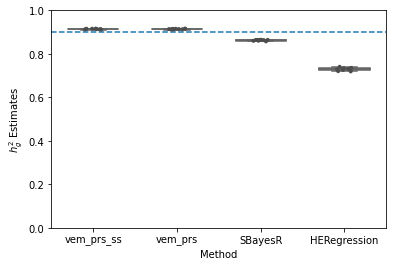

In [11]:
ldp_gs.h2g = 0.9
res = evaluate_heritability_w_simulations([vem_prs_ss(ldp_gs), vem_prs(ldp_gs), SBayesR(ldp_gs), HERegression(ldp_gs)], ldp_gs, n_traits=10)
plot_heritability_boxplot(res, true_h2=0.9)

In [344]:
ldp_gs.pis, ldp_gs.gammas, ldp_gs.mixture_assignment

((0.95, 0.02, 0.02, 0.01),
 array([0.  , 0.01, 0.1 , 1.  ]),
 {0: array([[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         ...,
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0]])})

In [241]:
res

vem_prs_ss   SBayesR  HERegression
0    0.895623  0.376363       1.06202
1    0.896063  0.376514       1.06194
2    0.899666  0.377368       1.06123
3    0.895269  0.378647       1.05992
4    0.900735  0.377541       1.05207

Converged at iteration 30 | ELBO: -8741.294753051205


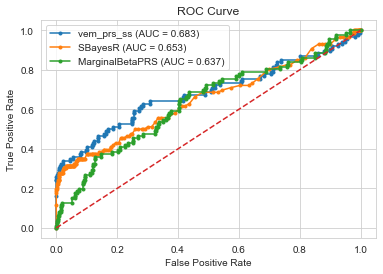

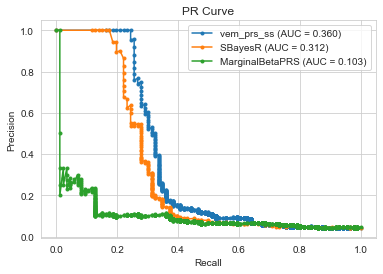

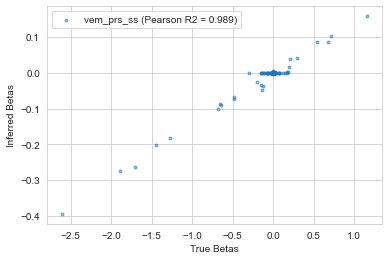

In [425]:
ldp_gs.h2g = .5
ldp_gs.pi = 0.1
ldp_gs.simulate(reset_beta=True)
m_beta = MarginalBetaPRS(ldp_gs)
m_beta.fit()
vx_ind = vem_prs_ss(ldp_gs)
vx_ind.fit(vectorize=False)
sbayesr = SBayesR(ldp_gs)
sbayesr.fit()
plot_roc_curves([vx_ind, sbayesr, m_beta], ldp_gs)
plot_pr_curves([vx_ind, sbayesr, m_beta], ldp_gs)
plot_beta_correlation([vx_ind], ldp_gs)

In [131]:
ldp_gs.h2g = 0.3
ldp_gs.pis = (0.95, 0.02, 0.02, 0.01)
ldp_gs.simulate(reset_beta = True)

models = [TrueBetaPRS(ldp_gs), vem_prs_ss(ldp_gs), SBayesR(ldp_gs), LDPred(ldp_gs), MarginalBetaPRS(ldp_gs)]

res = evaluate_prediction_w_simulations(models, ldp_gs, n_traits=5, k=5)

> Processing Trait 0
Cross validation iteration 0
Converged at iteration 30 | ELBO: -8151.022883275806
Cross validation iteration 1
Converged at iteration 16 | ELBO: -8563.863706006909
Cross validation iteration 2
Converged at iteration 14 | ELBO: -8557.636890355998
Cross validation iteration 3
Converged at iteration 13 | ELBO: -8546.766324594433
Cross validation iteration 4
Converged at iteration 14 | ELBO: -8595.225156325838
> Processing Trait 1
Cross validation iteration 0
Converged at iteration 26 | ELBO: -8115.843154475237
Cross validation iteration 1
Converged at iteration 16 | ELBO: -8569.772728905871
Cross validation iteration 2
Converged at iteration 16 | ELBO: -8535.210924478039
Cross validation iteration 3
Converged at iteration 14 | ELBO: -8538.533193442727
Cross validation iteration 4
Converged at iteration 16 | ELBO: -8572.381020468385
> Processing Trait 2
Cross validation iteration 0
Converged at iteration 48 | ELBO: -8122.04260459013
Cross validation iteration 1
Converg

  0%|          | 0/5 [00:00<?, ?it/s]

> Processing Trait 0
Cross validation iteration 0
Converged at iteration 33 | ELBO: -8833.967675561658
Converged at iteration 33 | ELBO: -8833.967676
Cross validation iteration 1
Converged at iteration 50 | ELBO: -8818.957376107453
Converged at iteration 50 | ELBO: -8818.957376
Cross validation iteration 2
Converged at iteration 29 | ELBO: -8791.295820941348
Converged at iteration 29 | ELBO: -8791.295821
Cross validation iteration 3
Converged at iteration 35 | ELBO: -8809.11197458915
Converged at iteration 35 | ELBO: -8809.111975
Cross validation iteration 4
Converged at iteration 33 | ELBO: -8806.963014700548
Converged at iteration 33 | ELBO: -8806.963015


 20%|██        | 1/5 [00:48<03:12, 48.02s/it]

> Processing Trait 1
Cross validation iteration 0
Converged at iteration 76 | ELBO: -8815.874306141122
Converged at iteration 76 | ELBO: -8815.874306
Cross validation iteration 1
Converged at iteration 37 | ELBO: -8824.58529113371
Converged at iteration 37 | ELBO: -8824.585291
Cross validation iteration 2
Converged at iteration 52 | ELBO: -8803.828608585114
Converged at iteration 52 | ELBO: -8803.828609
Cross validation iteration 3
Converged at iteration 40 | ELBO: -8830.717910424322
Converged at iteration 40 | ELBO: -8830.717910
Cross validation iteration 4
Converged at iteration 59 | ELBO: -8793.240453186105
Converged at iteration 59 | ELBO: -8793.240453


 40%|████      | 2/5 [01:48<02:35, 51.85s/it]

> Processing Trait 2
Cross validation iteration 0
Converged at iteration 42 | ELBO: -8826.417495327396
Converged at iteration 42 | ELBO: -8826.417495
Cross validation iteration 1
Converged at iteration 36 | ELBO: -8842.745958619902
Converged at iteration 36 | ELBO: -8842.745959
Cross validation iteration 2
Converged at iteration 45 | ELBO: -8812.97977742126
Converged at iteration 45 | ELBO: -8812.979777
Cross validation iteration 3
Converged at iteration 44 | ELBO: -8838.400259719505
Converged at iteration 44 | ELBO: -8838.400260
Cross validation iteration 4
Converged at iteration 53 | ELBO: -8824.246836792707
Converged at iteration 53 | ELBO: -8824.246837


 60%|██████    | 3/5 [02:44<01:46, 53.06s/it]

> Processing Trait 3
Cross validation iteration 0
Converged at iteration 50 | ELBO: -8856.480157277234
Converged at iteration 50 | ELBO: -8856.480157
Cross validation iteration 1
Converged at iteration 36 | ELBO: -8858.228133719334
Converged at iteration 36 | ELBO: -8858.228134
Cross validation iteration 2
Converged at iteration 46 | ELBO: -8826.532245211914
Converged at iteration 46 | ELBO: -8826.532245
Cross validation iteration 3
Converged at iteration 48 | ELBO: -8842.161651210572
Converged at iteration 48 | ELBO: -8842.161651
Cross validation iteration 4
Converged at iteration 34 | ELBO: -8837.149388811236
Converged at iteration 34 | ELBO: -8837.149389


 80%|████████  | 4/5 [03:38<00:53, 53.36s/it]

> Processing Trait 4
Cross validation iteration 0
Converged at iteration 43 | ELBO: -8832.004973335173
Converged at iteration 43 | ELBO: -8832.004973
Cross validation iteration 1
Converged at iteration 33 | ELBO: -8817.373279578882
Converged at iteration 33 | ELBO: -8817.373280
Cross validation iteration 2
Converged at iteration 40 | ELBO: -8823.508813132417
Converged at iteration 40 | ELBO: -8823.508813
Cross validation iteration 3
Converged at iteration 43 | ELBO: -8820.066827393228
Converged at iteration 43 | ELBO: -8820.066827
Cross validation iteration 4
Converged at iteration 59 | ELBO: -8818.578921916947
Converged at iteration 59 | ELBO: -8818.578922


100%|██████████| 5/5 [04:33<00:00, 54.79s/it]


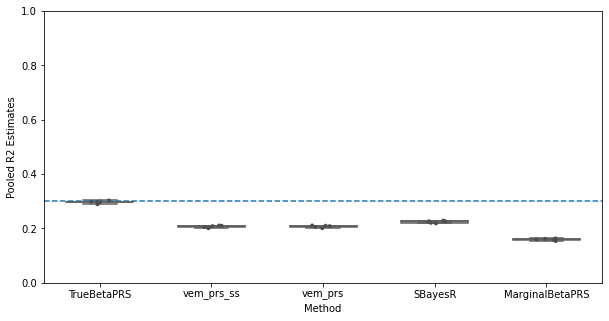

In [17]:
ldp_gs.h2g = 0.3
ldp_gs.pis = (0.9, 0.0, 0.0, 0.1)
ldp_gs.gammas = np.array((0., 0., 0., 1.))
ldp_gs.simulate(reset_beta = True)

# LDPred(ldp_gs),

models = [TrueBetaPRS(ldp_gs), vem_prs_ss(ldp_gs), vem_prs(ldp_gs), SBayesR(ldp_gs), MarginalBetaPRS(ldp_gs)]

res = evaluate_prediction_w_simulations(models, ldp_gs, n_traits=5, k=5)
plot_prediction_results(res, ldp_gs.h2g)

In [261]:
res = []
n_traits = 10

for h2 in (.1, .3, .5, .7):
    for p in (.01, .1, .5, 1.):
        ldp_gs.h2g = h2
        ldp_gs.pi = p
        ldp_gs.simulate(reset_beta=True)
        for _ in range(n_traits):
            ldp_gs.simulate()
            v = vem_prs_ss(ldp_gs)
            v.fit()
            res.append({
                'True pi': p,
                'True h2g': h2,
                'Inferred pi': v.pi,
                'Inferred h2g': v.get_heritability()
            })
        
res
        

Converged at iteration 19 | ELBO: -11010.18069816684
Converged at iteration 19 | ELBO: -11031.503286347475
Converged at iteration 22 | ELBO: -11066.958988828272
Converged at iteration 21 | ELBO: -11047.691126559384
Converged at iteration 17 | ELBO: -11032.339698104513
Converged at iteration 39 | ELBO: -11040.857050773411
Converged at iteration 22 | ELBO: -11037.946242767028
Converged at iteration 116 | ELBO: -11015.930750176889
Converged at iteration 21 | ELBO: -11015.366033936427
Converged at iteration 34 | ELBO: -11036.969576746755
Converged at iteration 36 | ELBO: -11224.108730294753
Converged at iteration 32 | ELBO: -11165.789260965776
Converged at iteration 54 | ELBO: -11174.544253486487
Converged at iteration 34 | ELBO: -11163.786987245361
Converged at iteration 41 | ELBO: -11192.762182167104
Converged at iteration 63 | ELBO: -11192.899313165279
Converged at iteration 35 | ELBO: -11193.649723321567
Converged at iteration 47 | ELBO: -11185.158309691513
Converged at iteration 36 | 

Converged at iteration 169 | ELBO: -8375.808132214977
Converged at iteration 152 | ELBO: -8582.281234233757
Converged at iteration 109 | ELBO: -8546.780717435082
Converged at iteration 142 | ELBO: -8592.79840524193
Converged at iteration 133 | ELBO: -8552.410780112565
Converged at iteration 95 | ELBO: -8579.458686094771
Converged at iteration 175 | ELBO: -8620.995245373984
Converged at iteration 97 | ELBO: -8554.167134628971
Converged at iteration 150 | ELBO: -8595.092814681333
Converged at iteration 111 | ELBO: -8591.757678281712
Converged at iteration 99 | ELBO: -8531.979836421739


[{'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.005996734577096448,
  'Inferred h2g': 0.10791357245944416},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.008462124647404742,
  'Inferred h2g': 0.10772049414334461},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.006986448770117525,
  'Inferred h2g': 0.09322488055180399},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.0059751360087864774,
  'Inferred h2g': 0.09742219815146615},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.006565770242287057,
  'Inferred h2g': 0.10934086755624148},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.007462949829486049,
  'Inferred h2g': 0.11008256704951282},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.006861194549619503,
  'Inferred h2g': 0.09851860734798076},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.007042739162035145,
  'Inferred h2g': 0.10672643856194092},
 {'True pi': 0.01,
  'True h2g': 0.1,
  'Inferred pi': 0.009462

In [264]:
df = pd.DataFrame(res).sort_values(['True pi', 'True h2g'])
df

True pi  True h2g  Inferred pi  Inferred h2g
0       0.01       0.1     0.005997      0.107914
1       0.01       0.1     0.008462      0.107720
2       0.01       0.1     0.006986      0.093225
3       0.01       0.1     0.005975      0.097422
4       0.01       0.1     0.006566      0.109341
..       ...       ...          ...           ...
155     1.00       0.7     0.232972      0.594281
156     1.00       0.7     0.236034      0.582226
157     1.00       0.7     0.239209      0.598242
158     1.00       0.7     0.218046      0.592563
159     1.00       0.7     0.244741      0.608042

[160 rows x 4 columns]

/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


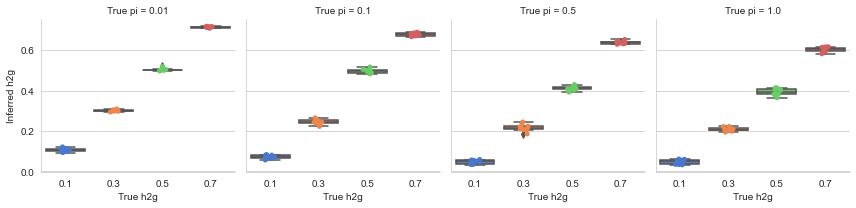

In [278]:
facet_by = 'pi'
plot_inf = 'h2g'

sns.set_style('whitegrid')
g = sns.FacetGrid(df, col=f'True {facet_by}', col_order=np.unique(df[f'True {facet_by}']))
g.map(sns.boxplot, f'True {plot_inf}', f'Inferred {plot_inf}', palette='muted')
g.map(sns.stripplot, f'True {plot_inf}', f'Inferred {plot_inf}', palette='muted')
sns.set_style()

In [295]:
ldp_gs.h2g = 0.1
v = vem_prs_ss(ldp_gs)
v.fit()
plot_beta_correlation([v], ldp_gs)

Converged at iteration 75 | ELBO: -7323.747514777666


TypeError: unsupported format string passed to numpy.ndarray.__format__

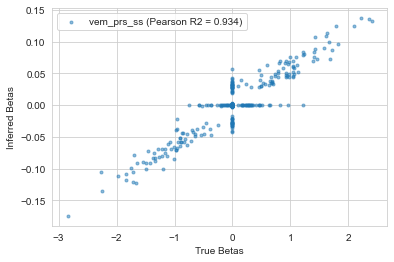

In [297]:
plot_beta_correlation([v], ldp_gs)

In [1]:
ldp_gs = GWASSimulator("ldpred/tests/test_data/sim1_0_train",
                       compute_ld=True,
                       pis=(0.9, 0.1),
                       gammas=(0.0, 1))
ldp_gs.simulate()

NameError: name 'GWASSimulator' is not defined

Converged at iteration 32 | ELBO: -3280.712520934153


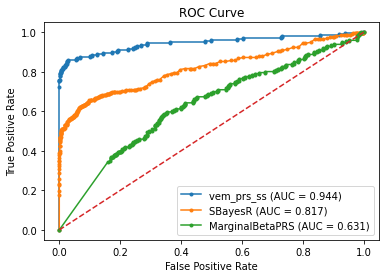

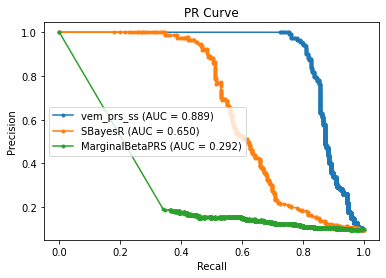

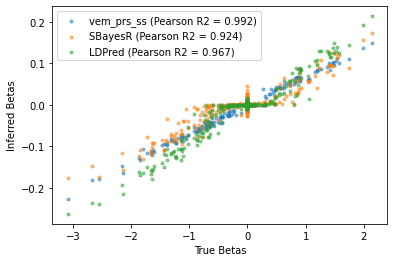

In [13]:
ldp_gs.h2g = .9
ldp_gs.simulate(reset_beta=True)
m_beta = MarginalBetaPRS(ldp_gs)
m_beta.fit()
vx_ind = vem_prs_ss(ldp_gs)
vx_ind.fit(vectorize=False)
sbayesr = SBayesR(ldp_gs)
sbayesr.fit()
ldp = LDPred(ldp_gs)
ldp.fit()
plot_roc_curves([vx_ind, sbayesr, m_beta], ldp_gs)
plot_pr_curves([vx_ind, sbayesr, m_beta], ldp_gs)
plot_beta_correlation([vx_ind, sbayesr, ldp], ldp_gs)

# SBayesR Data 

In [93]:
sbr_gs = GWASSimulator("gctb_2.0_tutorial/data/1000G_eur_chr22",
                       pis=(0.95, 0.02, 0.02, 0.01),
                       gammas=(0.0, 0.01, 0.1, 1),
                       compute_ld=True)
sbr_gs.simulate()

[autoreload of gwasimulator.GWASDataLoader failed: Traceback (most recent call last):
  File "/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/szabad/opt/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/szabad/opt/miniconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/szabad/opt/miniconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames

> Reading genotype files...
> Computing LD matrices...


In [420]:
sbr = SBayesR(sbr_gs, ldm="gctb_2.0_tutorial/ldm/sparse/chr22/1000G_eur_chr22.ldm.sparse")
sbr.fit()

In [421]:
sbr.get_heritability()

0.502283

In [17]:
v_prs = vem_prs_ss(sbr_gs)
%timeit v_prs.fit(max_iter=1)

Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
Max iterations reached without convergence. You may need to run the model for more iterations.
10.4 s ± 381 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


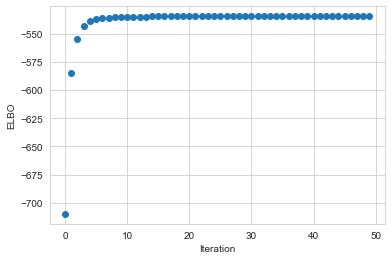

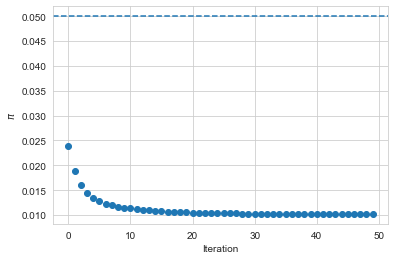

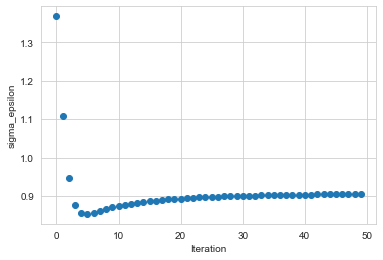

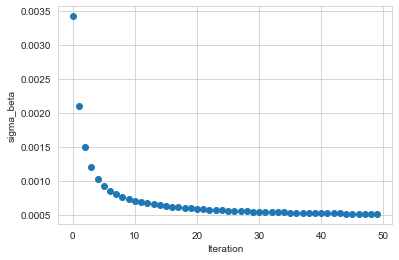

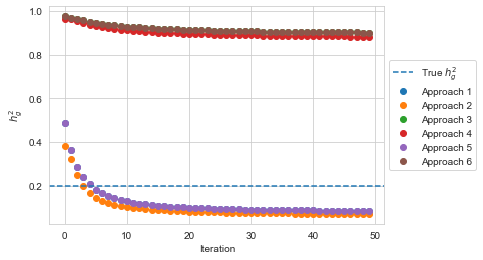

In [423]:
plot_history(v_prs)

In [112]:
gctb_gs = GWASDataLoader("gctb_2.0_tutorial/data/1000G_eur_chr22",
                         phenotype_file="gctb_2.0_tutorial/pheno/phenos_ga1.txt",
                         standardize_genotype=True,
                         standardize_phenotype=True)

gctb_gs.to_sumstats_table()

> Reading genotype files...
> Reading phenotype files...


CHR       POS         SNP      BETA         Z        SE      PVAL  \
rs131538    22  16871137    rs131538 -0.072691 -1.413270  0.051434  0.157576   
rs9605903   22  17054720   rs9605903  0.061524  1.196163  0.051434  0.231633   
rs5746647   22  17057138   rs5746647 -0.013351 -0.259564  0.051434  0.795200   
rs16980739  22  17058616  rs16980739 -0.014042 -0.273008  0.051434  0.784847   
rs9605923   22  17065079   rs9605923  0.068205  1.326059  0.051434  0.184820   
...         ..       ...         ...       ...       ...       ...       ...   
rs8137951   22  51165664   rs8137951 -0.044963 -0.874184  0.051434  0.382018   
rs2301584   22  51171497   rs2301584 -0.049476 -0.961922  0.051434  0.336089   
rs3810648   22  51175626   rs3810648  0.035936  0.698683  0.051434  0.484750   
rs2285395   22  51178090   rs2285395  0.041033  0.797768  0.051434  0.425005   
rs28729663  22  51219006  rs28729663 -0.004094 -0.079598  0.051434  0.936557   

                 MAF A1 A2    N  
rs131538    0.066138  A  G  378  
rs9605903   0.264550  C  T  378  
rs5746647   0.052910  G  T  378  
rs16980739  0.148148  T  C  378  
rs9605923   0.263228  A  T  378  
...              ... .. ..  ...  
rs8137951   0.296296  A  G  378  
rs2301584   0.193122  A  G  378  
rs3810648   0.062169  G  A  378  
rs2285395   0.059524  A  G  378  
rs28729663  0.160053  A  G  378  

[15938 rows x 11 columns]

In [113]:
pd.read_csv("sim_1.assoc.linear", sep="\s+")

CHR         SNP        BP A1 TEST  NMISS      BETA     STAT       P
0       22    rs131538  16871137  A  ADD    378 -0.072690 -1.41300  0.1584
1       22   rs9605903  17054720  C  ADD    378  0.061520  1.19500  0.2327
2       22   rs5746647  17057138  G  ADD    378 -0.013350 -0.25890  0.7959
3       22  rs16980739  17058616  T  ADD    378 -0.014040 -0.27230  0.7855
4       22   rs9605923  17065079  A  ADD    378  0.068210  1.32600  0.1858
...    ...         ...       ... ..  ...    ...       ...      ...     ...
15933   22   rs8137951  51165664  A  ADD    378 -0.044960 -0.87280  0.3834
15934   22   rs2301584  51171497  A  ADD    378 -0.049480 -0.96060  0.3374
15935   22   rs3810648  51175626  G  ADD    378  0.035940  0.69730  0.4861
15936   22   rs2285395  51178090  A  ADD    378  0.041030  0.79630  0.4263
15937   22  rs28729663  51219006  A  ADD    378 -0.004094 -0.07939  0.9368

[15938 rows x 9 columns]

In [145]:
prse = PRSEvaluator([vem_prs_ss(ldp_gs), SBayesR(ldp_gs), LDPred(ldp_gs)], ldp_gs)
prse.fit_models()

0.0
None
None
0.2846004901928462
0.28567
None


In [154]:
evaluate_heritability_w_simulations([vem_prs_ss(ldp_gs), SBayesR(ldp_gs), HERegression(ldp_gs)], ldp_gs, n_traits=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Evaluating Heritability with Simulations...


100%|██████████| 5/5 [00:49<00:00,  9.90s/it]


vem_prs_ss   SBayesR  HERegression
0    0.271939  0.279842      0.347772
1    0.271598  0.279842      0.347772
2    0.272166  0.279842      0.347772
3    0.272166  0.279842      0.347772
4    0.266703  0.279842      0.347772

In [158]:
ldp_gs.h2g = 0.3
ldp_gs.pis = (0.95, 0.02, 0.02, 0.01)
ldp_gs.simulate(reset_beta = True)

models = [TrueBetaPRS(ldp_gs), vem_prs_ss(ldp_gs), SBayesR(ldp_gs), LDPred(ldp_gs), MarginalBetaPRS(ldp_gs)]

res = evaluate_prediction_w_simulations(models, ldp_gs, n_traits=5, k=5)
plot_prediction_results(res, ldp_gs.h2g)

> Processing Trait 0
Cross validation iteration 0
Converged at iteration 14 | ELBO: -8551.954852848727
Cross validation iteration 1
Converged at iteration 17 | ELBO: -8551.954852845123


KeyboardInterrupt: 